# **Analyzing the gradient leakage problem on a variety of vehicles**

In [1]:
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULTS_ROOT = "./04_distr_gradient_leakage/results/"

## **1. Statistical evaluation**

### 1.1 Averages

In [3]:
#reading the data:
vehicle_data = {}
for i in range(5):
    with open(RESULTS_ROOT+f"vehicle_results_{i}.json") as f:
        data = json.load(f)
        
    for veh in data:
        
        if veh.startswith("h"):
            veh_type = "household"
        elif veh.startswith("c"):
            veh_type = "commute"
        elif veh.startswith("r"):
            veh_type = "random"
            
        #if i == 0:
        if not(veh in vehicle_data):
            vehicle_data[veh] = {
                "position_rate": len(data[veh]["positions"]),
                "time_offset": np.abs(data[veh]["time_offset"]),
                "type": veh_type,
                "occurence": 1
            }
        else:
            vehicle_data[veh]["position_rate"] += len(data[veh]["positions"])
            vehicle_data[veh]["time_offset"] += np.abs(data[veh]["time_offset"])
            vehicle_data[veh]["occurence"] += 1
            
gl_df = pd.DataFrame.from_dict(vehicle_data, orient="index")
gl_df["position_rate"] = gl_df["position_rate"]/gl_df["occurence"]
gl_df["time_offset"] = gl_df["time_offset"]/gl_df["occurence"]

In [4]:
gl_df

position_rate  time_offset       type  occurence
carIn343                6.0          0.0    commute          1
randUni277:6            9.0         27.0     random          1
randUni94:4             3.5         20.0     random          2
randUni417:6            5.5         23.5     random          2
randUni860:4            7.0          2.0     random          1
...                     ...          ...        ...        ...
h620c1:0                3.0         21.0  household          1
h3077c1:0               9.0          0.0  household          1
randUni394:7            4.0         17.0     random          1
h3193c1:0               8.0          1.0  household          1
h611c1:0                6.0          0.0  household          1

[1324 rows x 4 columns]

array([[<Axes: title={'center': 'position_rate'}>,
        <Axes: title={'center': 'time_offset'}>],
       [<Axes: title={'center': 'occurence'}>, <Axes: >]], dtype=object)

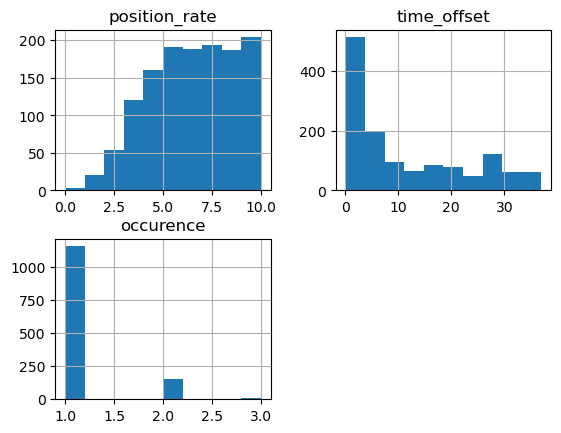

In [5]:
gl_df.hist()

In [6]:
gl_df.groupby("type").mean()

position_rate  time_offset  occurence
type                                            
commute         5.982206     1.825623   1.085409
household       7.409924     6.264833   1.148867
random          5.517030    16.777475   1.144414

In [7]:
gl_df.groupby("type").std()

position_rate  time_offset  occurence
type                                            
commute         2.017257     2.209117   0.279988
household       2.071302     9.393431   0.382881
random          2.149796    10.737366   0.377924

### 1.2 Extremal cases

In [8]:
gl_df["abs_time_offset"] = np.abs(gl_df["time_offset"])

In [9]:
gl_df[gl_df["position_rate"] == max(gl_df["position_rate"])]

position_rate  time_offset       type  occurence  \
h3055c1:0              10.0          0.0  household          1   
h920c1:0               10.0          0.0  household          1   
h197c1:0               10.0          4.0  household          1   
h3037c2:0              10.0          4.0  household          1   
h2548c1:0              10.0          7.5  household          2   
...                     ...          ...        ...        ...   
h3460c1:0              10.0          3.0  household          1   
randUni18:4            10.0         26.0     random          1   
carIn179               10.0          0.0    commute          1   
randUni620:8           10.0         34.0     random          1   
randUni712:4           10.0         25.0     random          1   

              abs_time_offset  
h3055c1:0                 0.0  
h920c1:0                  0.0  
h197c1:0                  4.0  
h3037c2:0                 4.0  
h2548c1:0                 7.5  
...                       ...  
h3460c1:0                 3.0  
randUni18:4              26.0  
carIn179                  0.0  
randUni620:8             34.0  
randUni712:4             25.0  

[70 rows x 5 columns]

In [10]:
gl_df[gl_df["position_rate"] == min(gl_df["position_rate"])]

position_rate  time_offset    type  occurence  abs_time_offset
randUni401:5            0.0         34.0  random          1             34.0
randUni812:4            0.0          5.0  random          1              5.0

In [11]:
gl_df[gl_df["abs_time_offset"] == max(gl_df["abs_time_offset"])]

position_rate  time_offset       type  occurence  abs_time_offset
h1751c1:0            7.0         37.0  household          1             37.0

In [12]:
gl_df[gl_df["abs_time_offset"] == min(gl_df["abs_time_offset"])]

position_rate  time_offset       type  occurence  abs_time_offset
carIn343             6.0          0.0    commute          1              0.0
carIn386             5.0          0.0    commute          1              0.0
h3055c1:0           10.0          0.0  household          1              0.0
h920c1:0            10.0          0.0  household          1              0.0
carIn744             5.0          0.0    commute          1              0.0
...                  ...          ...        ...        ...              ...
carIn616             8.0          0.0    commute          1              0.0
carIn569             3.0          0.0    commute          1              0.0
carIn715             7.0          0.0    commute          1              0.0
h3077c1:0            9.0          0.0  household          1              0.0
h611c1:0             6.0          0.0  household          1              0.0

[253 rows x 5 columns]

### 1.3 Distributions by vehicle type

Text(0, 0.5, 'positional success rate')

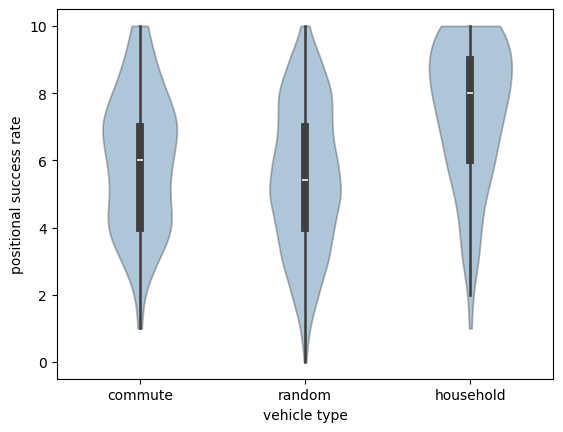

In [13]:
sns.violinplot(data = gl_df, x = "type", y = "position_rate",
               cut = 0, #fixing to the data's scale
               width=0.5, alpha=0.4)
plt.xlabel("vehicle type")
plt.ylabel("positional success rate")
#plt.title("Success rate distribution of matched parking lots\nby vehicle type category")

Text(0, 0.5, 'abs. time offset [15 min]')

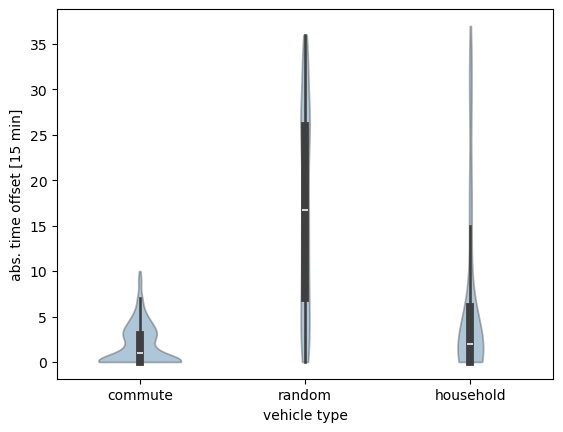

In [14]:
sns.violinplot(data = gl_df, x = "type", y = "time_offset",
               cut = 0, #fixing to the data's scale
               width=0.5, alpha=0.4)
plt.xlabel("vehicle type")
plt.ylabel("abs. time offset [15 min]")
#plt.title("Success rate distribution of identified moving time\nby vehicle type category")

## **2. Checking the Household traffic**

### 2.1 Clustering

The `household` vehicle type seems to produce a Gaussian mixture distribution (with means around 0, and 15) in terms of time offset. To check this out, we try to create 2 clusters, corresponding to these Gaussian distributions. Later on, we will compare this two clusters.

In [15]:
import copy
from sklearn.cluster import KMeans

household_gl_df = copy.deepcopy(gl_df[gl_df["type"] == "household"])
X = np.array(household_gl_df["time_offset"]).reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X) #fix seed to always have the same clusters
household_gl_df["cluster"] = kmeans.predict(X)

In [16]:
household_gl_df

position_rate  time_offset       type  occurence  abs_time_offset  \
h1881c1:0            9.0          1.0  household          1              1.0   
h2327c1:0            3.0          4.0  household          1              4.0   
h3055c1:0           10.0          0.0  household          1              0.0   
h920c1:0            10.0          0.0  household          1              0.0   
h2057c1:0            7.0         30.0  household          2             30.0   
...                  ...          ...        ...        ...              ...   
h139c1:0             7.0          6.0  household          1              6.0   
h620c1:0             3.0         21.0  household          1             21.0   
h3077c1:0            9.0          0.0  household          1              0.0   
h3193c1:0            8.0          1.0  household          1              1.0   
h611c1:0             6.0          0.0  household          1              0.0   

           cluster  
h1881c1:0        0  
h2327c1:0        0  
h3055c1:0        0  
h920c1:0         0  
h2057c1:0        1  
...            ...  
h139c1:0         0  
h620c1:0         1  
h3077c1:0        0  
h3193c1:0        0  
h611c1:0         0  

[309 rows x 6 columns]

Text(0, 0.5, 'positional success rate')

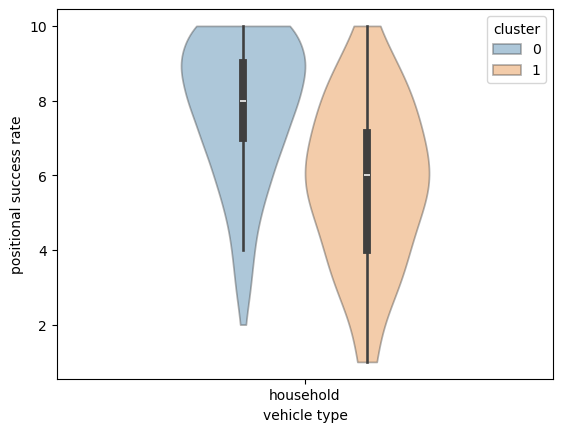

In [17]:
sns.violinplot(data = household_gl_df, x = "type", y = "position_rate", hue = "cluster",
               cut = 0, #fixing to the data's scale
               width=0.5, alpha=0.4)
plt.xlabel("vehicle type")
plt.ylabel("positional success rate")
#plt.title("Success rate distribution of matched parking lots\nin household category")

Text(0, 0.5, 'abs. time offset [15 min]')

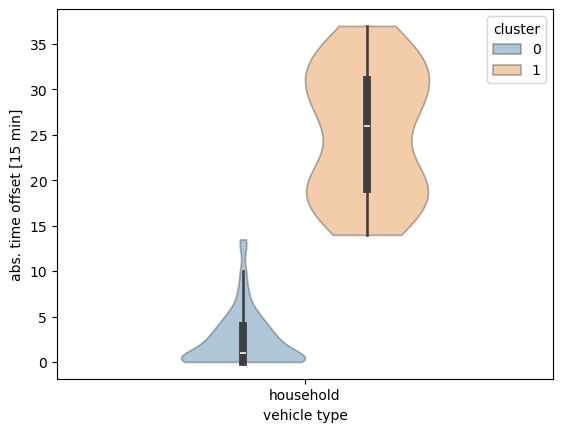

In [18]:
sns.violinplot(data = household_gl_df, x = "type", y = "time_offset", hue = "cluster",
               cut = 0,
               width=0.5, alpha=0.4)
plt.xlabel("vehicle type")
plt.ylabel("abs. time offset [15 min]")
#plt.title("Success rate distribution of identified moving time\nin household category")

### 2.2 Visualizing movings

In [19]:
SIM_RESULTS_ROOT = "../01_simulation/04_results/"
SEEDS = ['42', '1234', '1867', '613', '1001']
PARKING_DEFINITION_FILE = "../01_simulation/02_scenario/parking_areas.add.xml"
NET_FILE = "../01_simulation/02_scenario/rand_grid.net.xml"

In [20]:
def combine_commuters(veh_id):
    if veh_id.startswith("carIn"):
        return veh_id.split(":")[0]
    return veh_id

In [21]:
p_data = pd.DataFrame()
#READING DATA:
for s in SEEDS:
    filename = SIM_RESULTS_ROOT+f'poccup_by_vehs_{s}.csv'
    pf = pd.read_csv(filename)
    pf["seed"] = [s]*len(pf)
    p_data = pd.concat([p_data, pf])
    
p_data["veh_id"] = p_data["veh_id"].apply(combine_commuters)
    
p_data["time"] = p_data["time"] - 4*24*60*60
p_data["time"] = p_data["time"].astype(int)
p_data["time_of_day"] = (p_data["time"] - (p_data["time"] // (24*60*60))*24*60*60) / (24*60*60) #converting to 0.0-1.0 and removing periodicity

In [22]:
parking_df = pd.read_xml(PARKING_DEFINITION_FILE)

In [23]:
edges = []
for i,r in parking_df.iterrows():
    edges.append(r.lane.split("_")[0])
parking_df["edge"] = edges

parking_positions = {}
for i,r in parking_df.iterrows():
    parking_positions[r.id] = r.edge

In [24]:
from importlib import reload
import visualization

reload(visualization);

#### Cluster1

8495 / 33
6985 / 28
4551 / 21
6090 / 15
5694 / 31
4975 / 21
9279 / 37
5836 / 23
4942 / 30
9117 / 40
4577 / 13
7216 / 18
7802 / 35
5651 / 31
6458 / 23
9560 / 40
8467 / 31
6120 / 21
6078 / 18
5564 / 29
5226 / 17


/home/madbiker/egyetem/kutatas/inverse-parking/02_da/visualization.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(22, 20))


9133 / 26
6106 / 21
7896 / 24
9579 / 26
10038 / 28
5256 / 29
8209 / 33
465 / 3
9110 / 40
5567 / 17
294 / 2
6408 / 23
7356 / 26
4433 / 16
8958 / 26
8123 / 26
6426 / 23
4466 / 25
5144 / 15
4753 / 25
6320 / 25
6230 / 31
6036 / 22
3653 / 20
8508 / 28
5844 / 25
4904 / 15
4053 / 21
5196 / 25
9246 / 42
4772 / 11


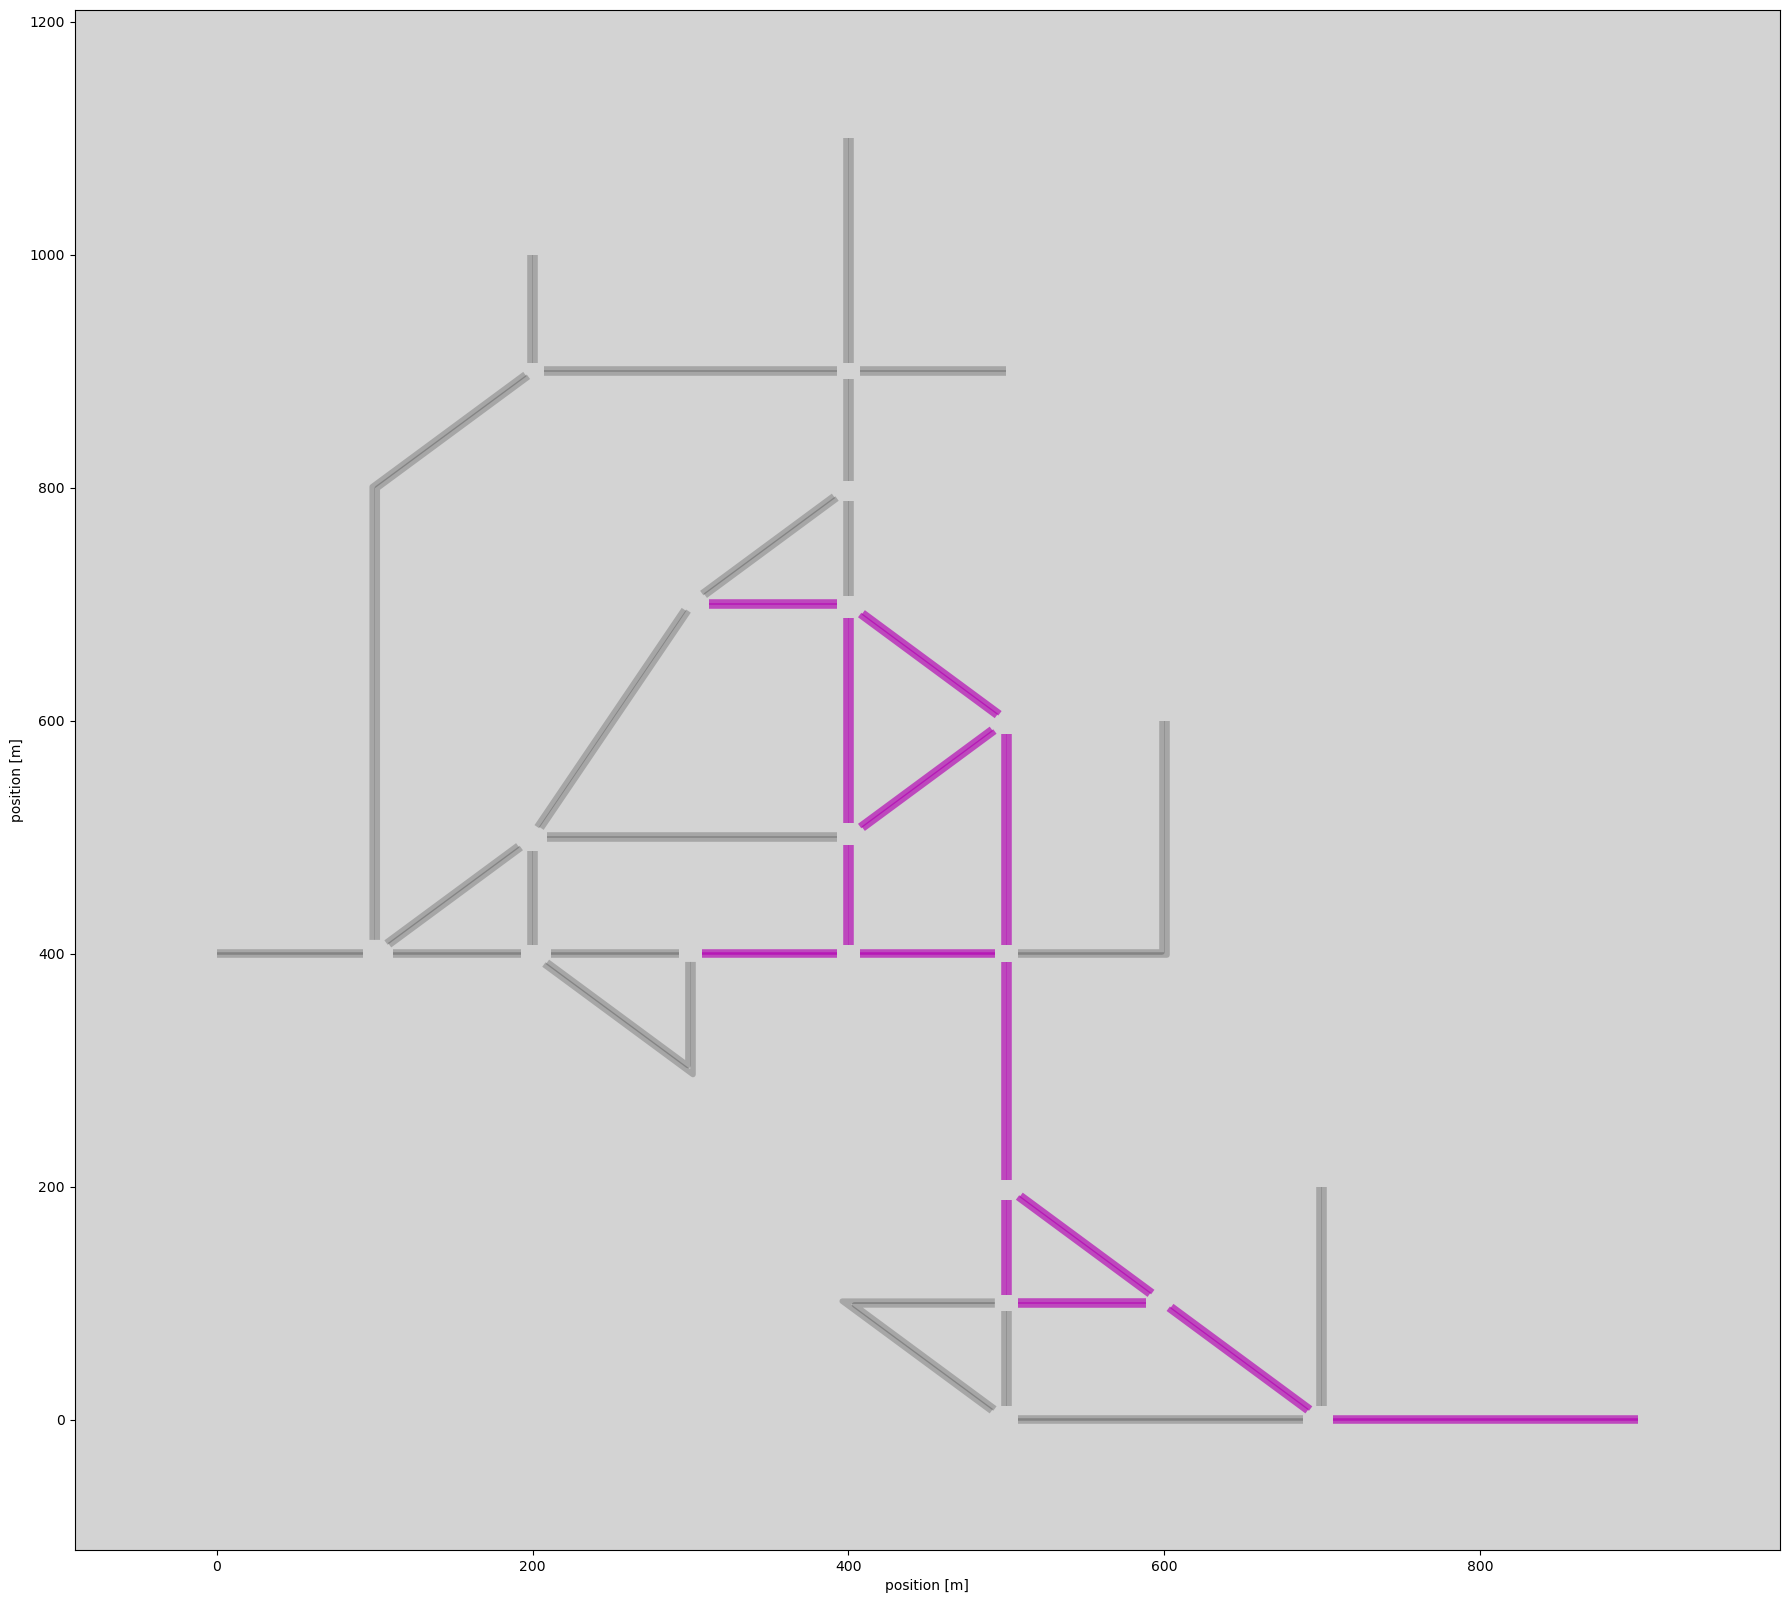

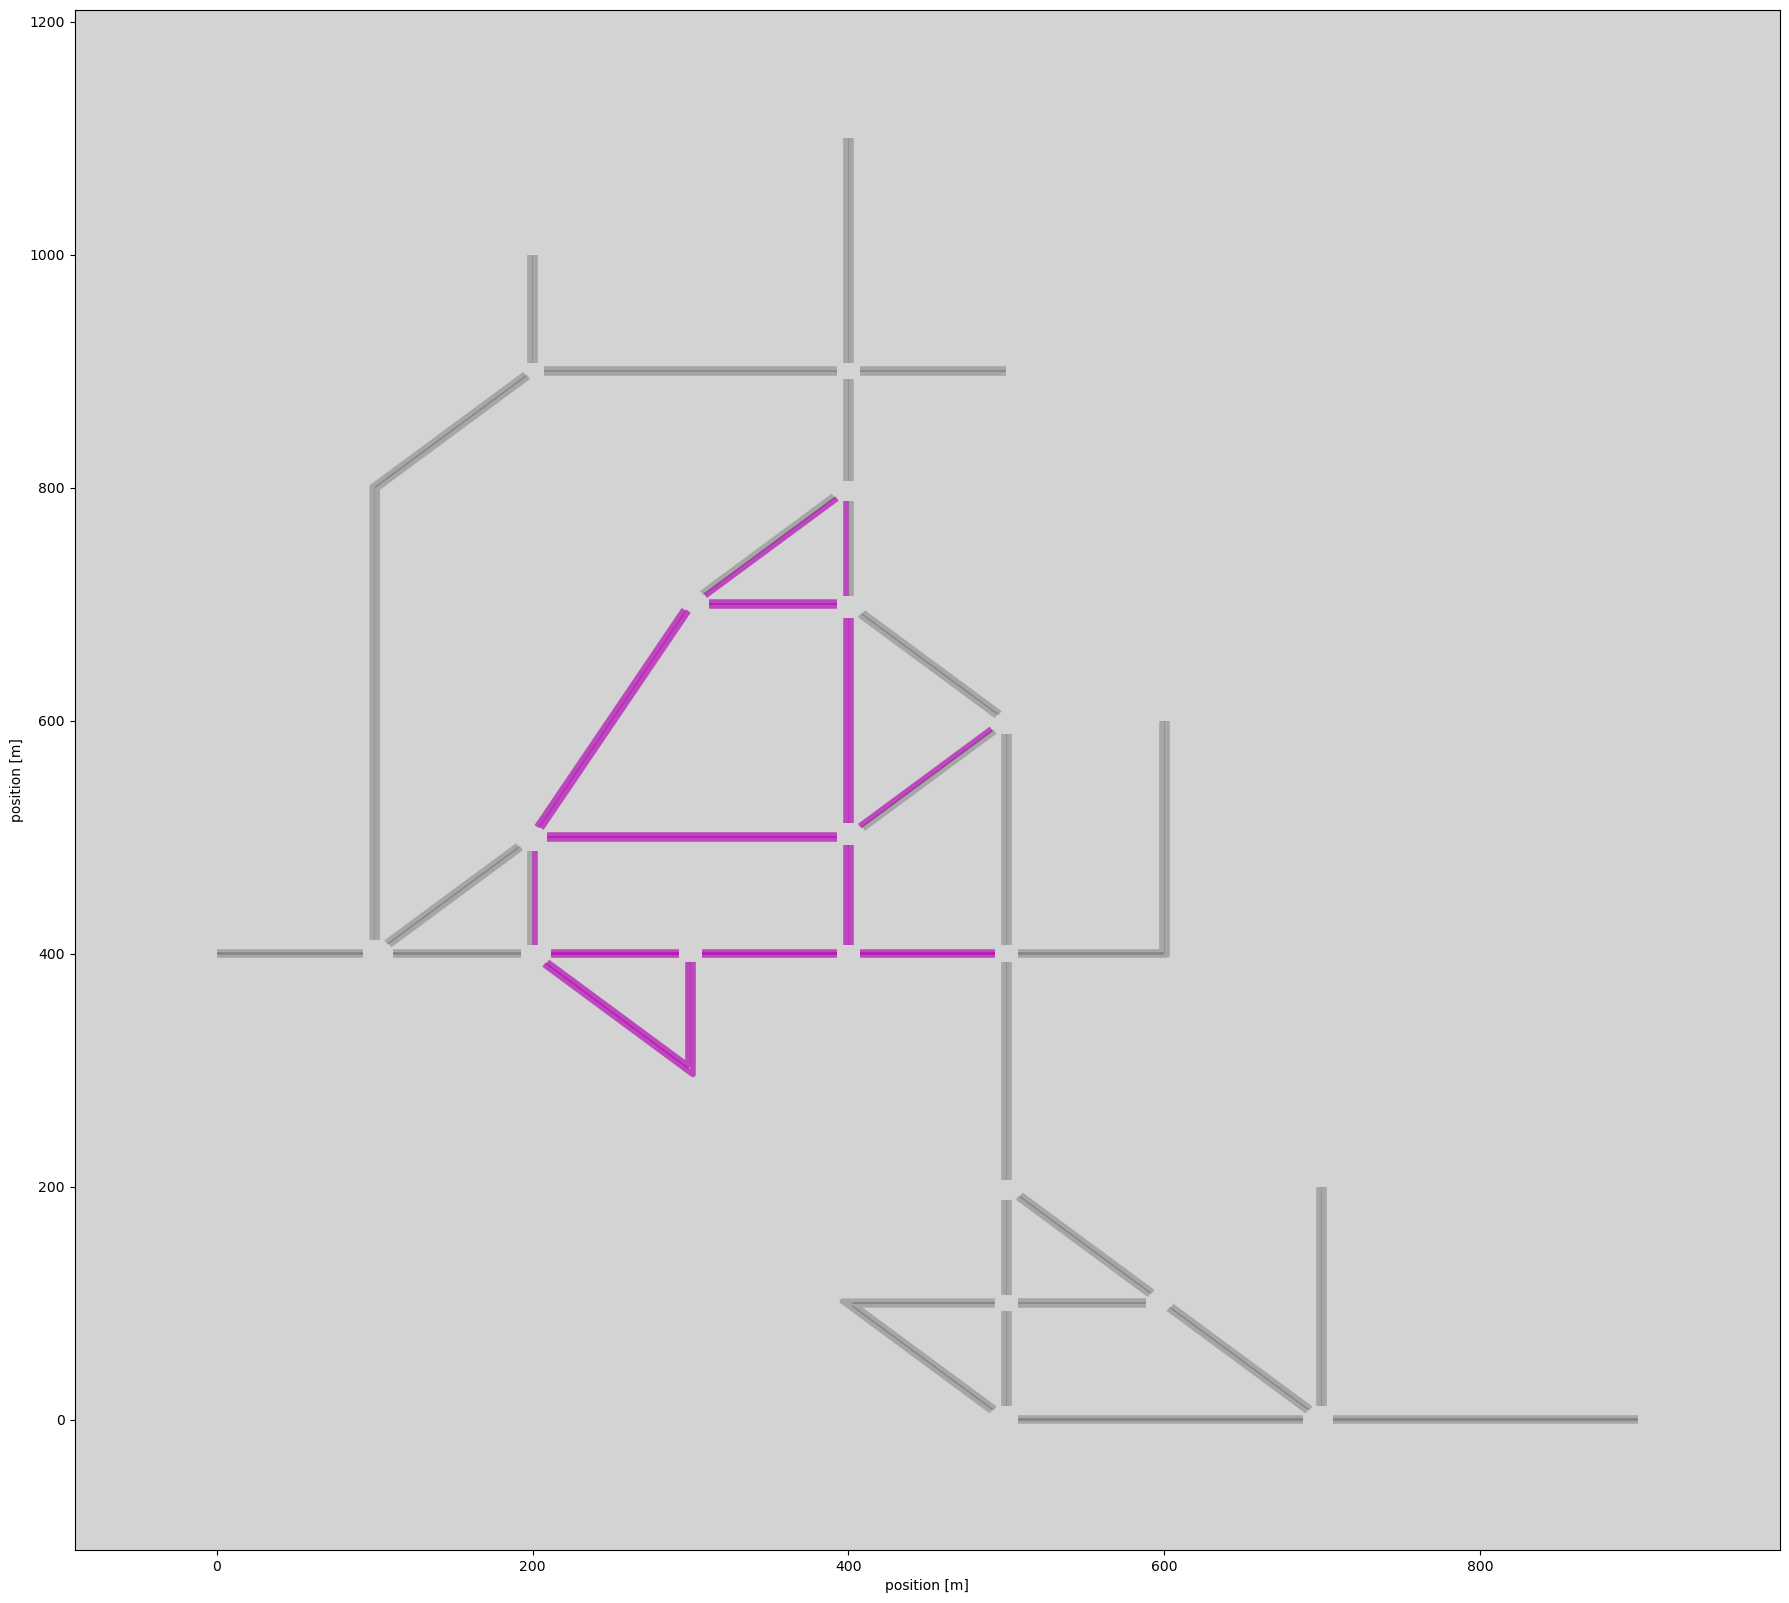

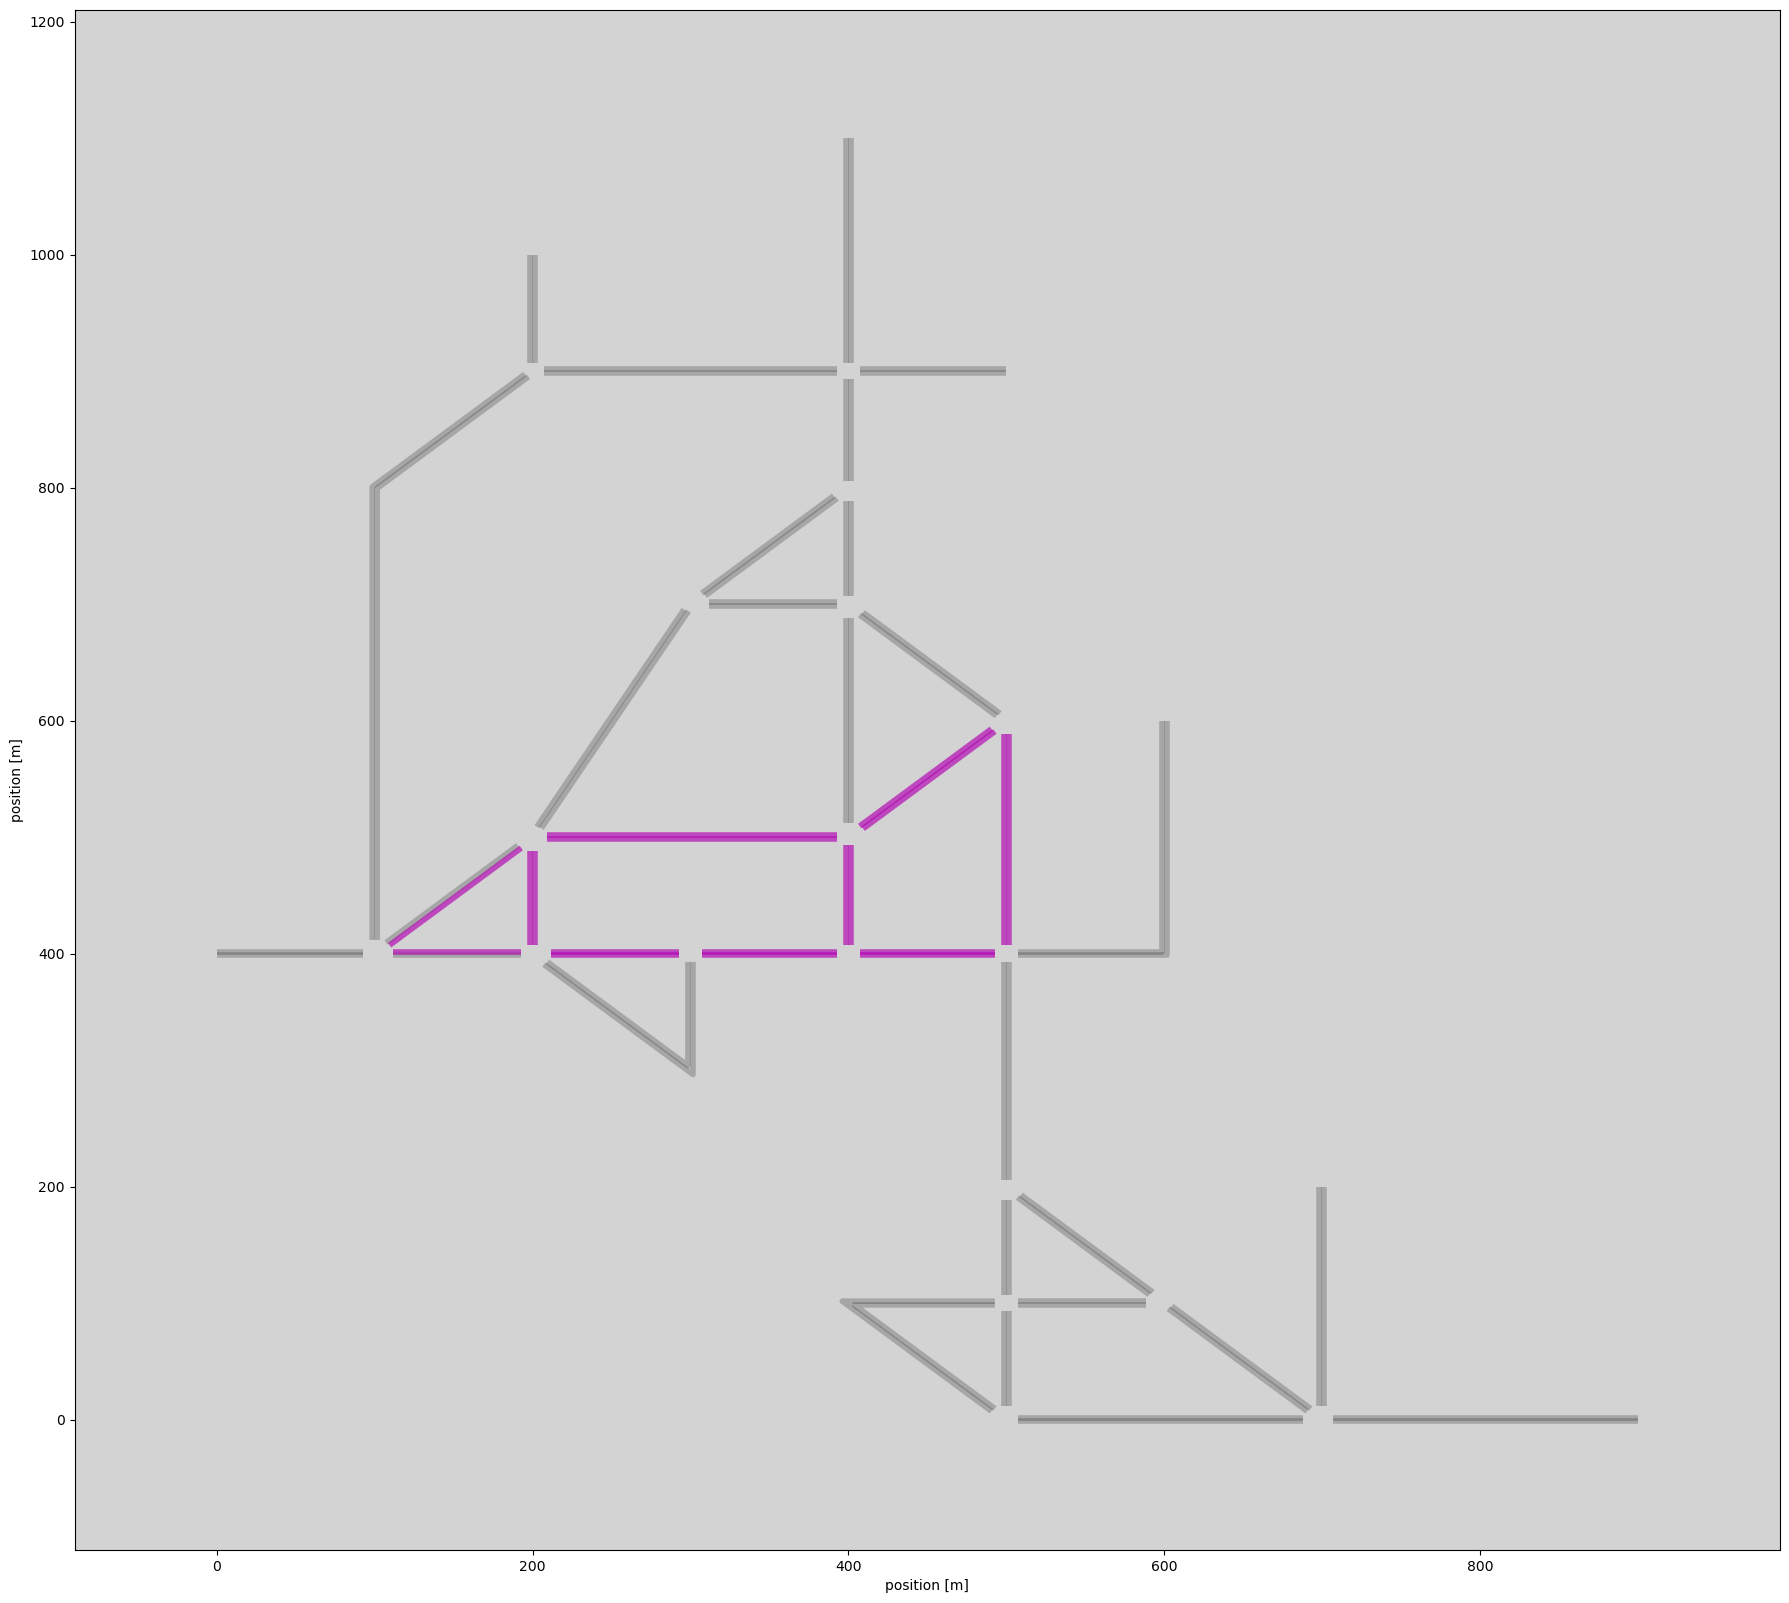

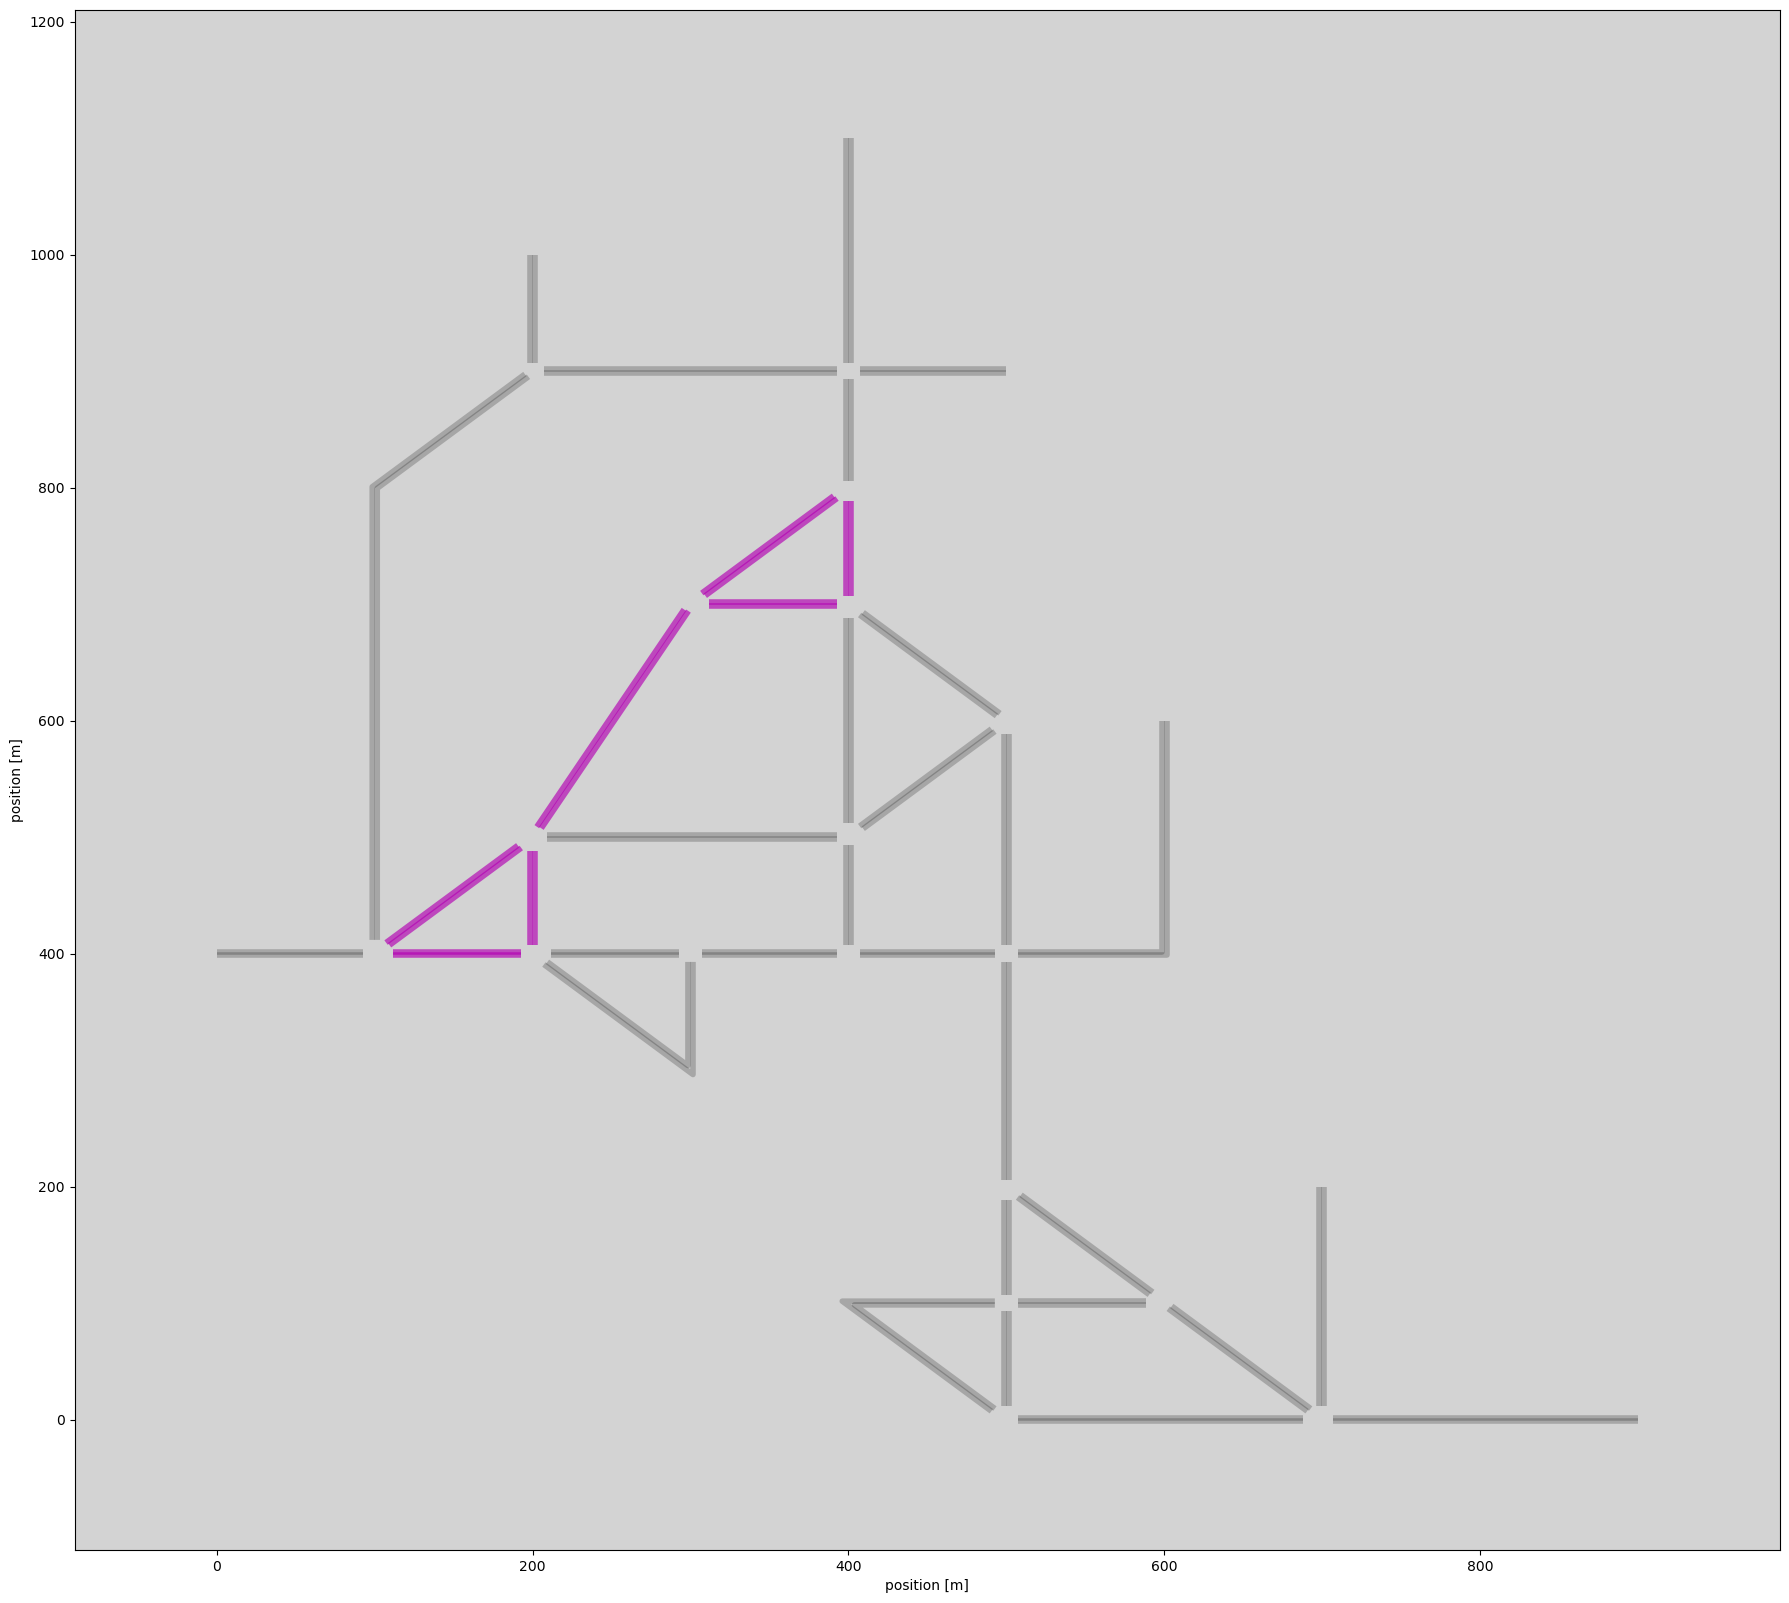

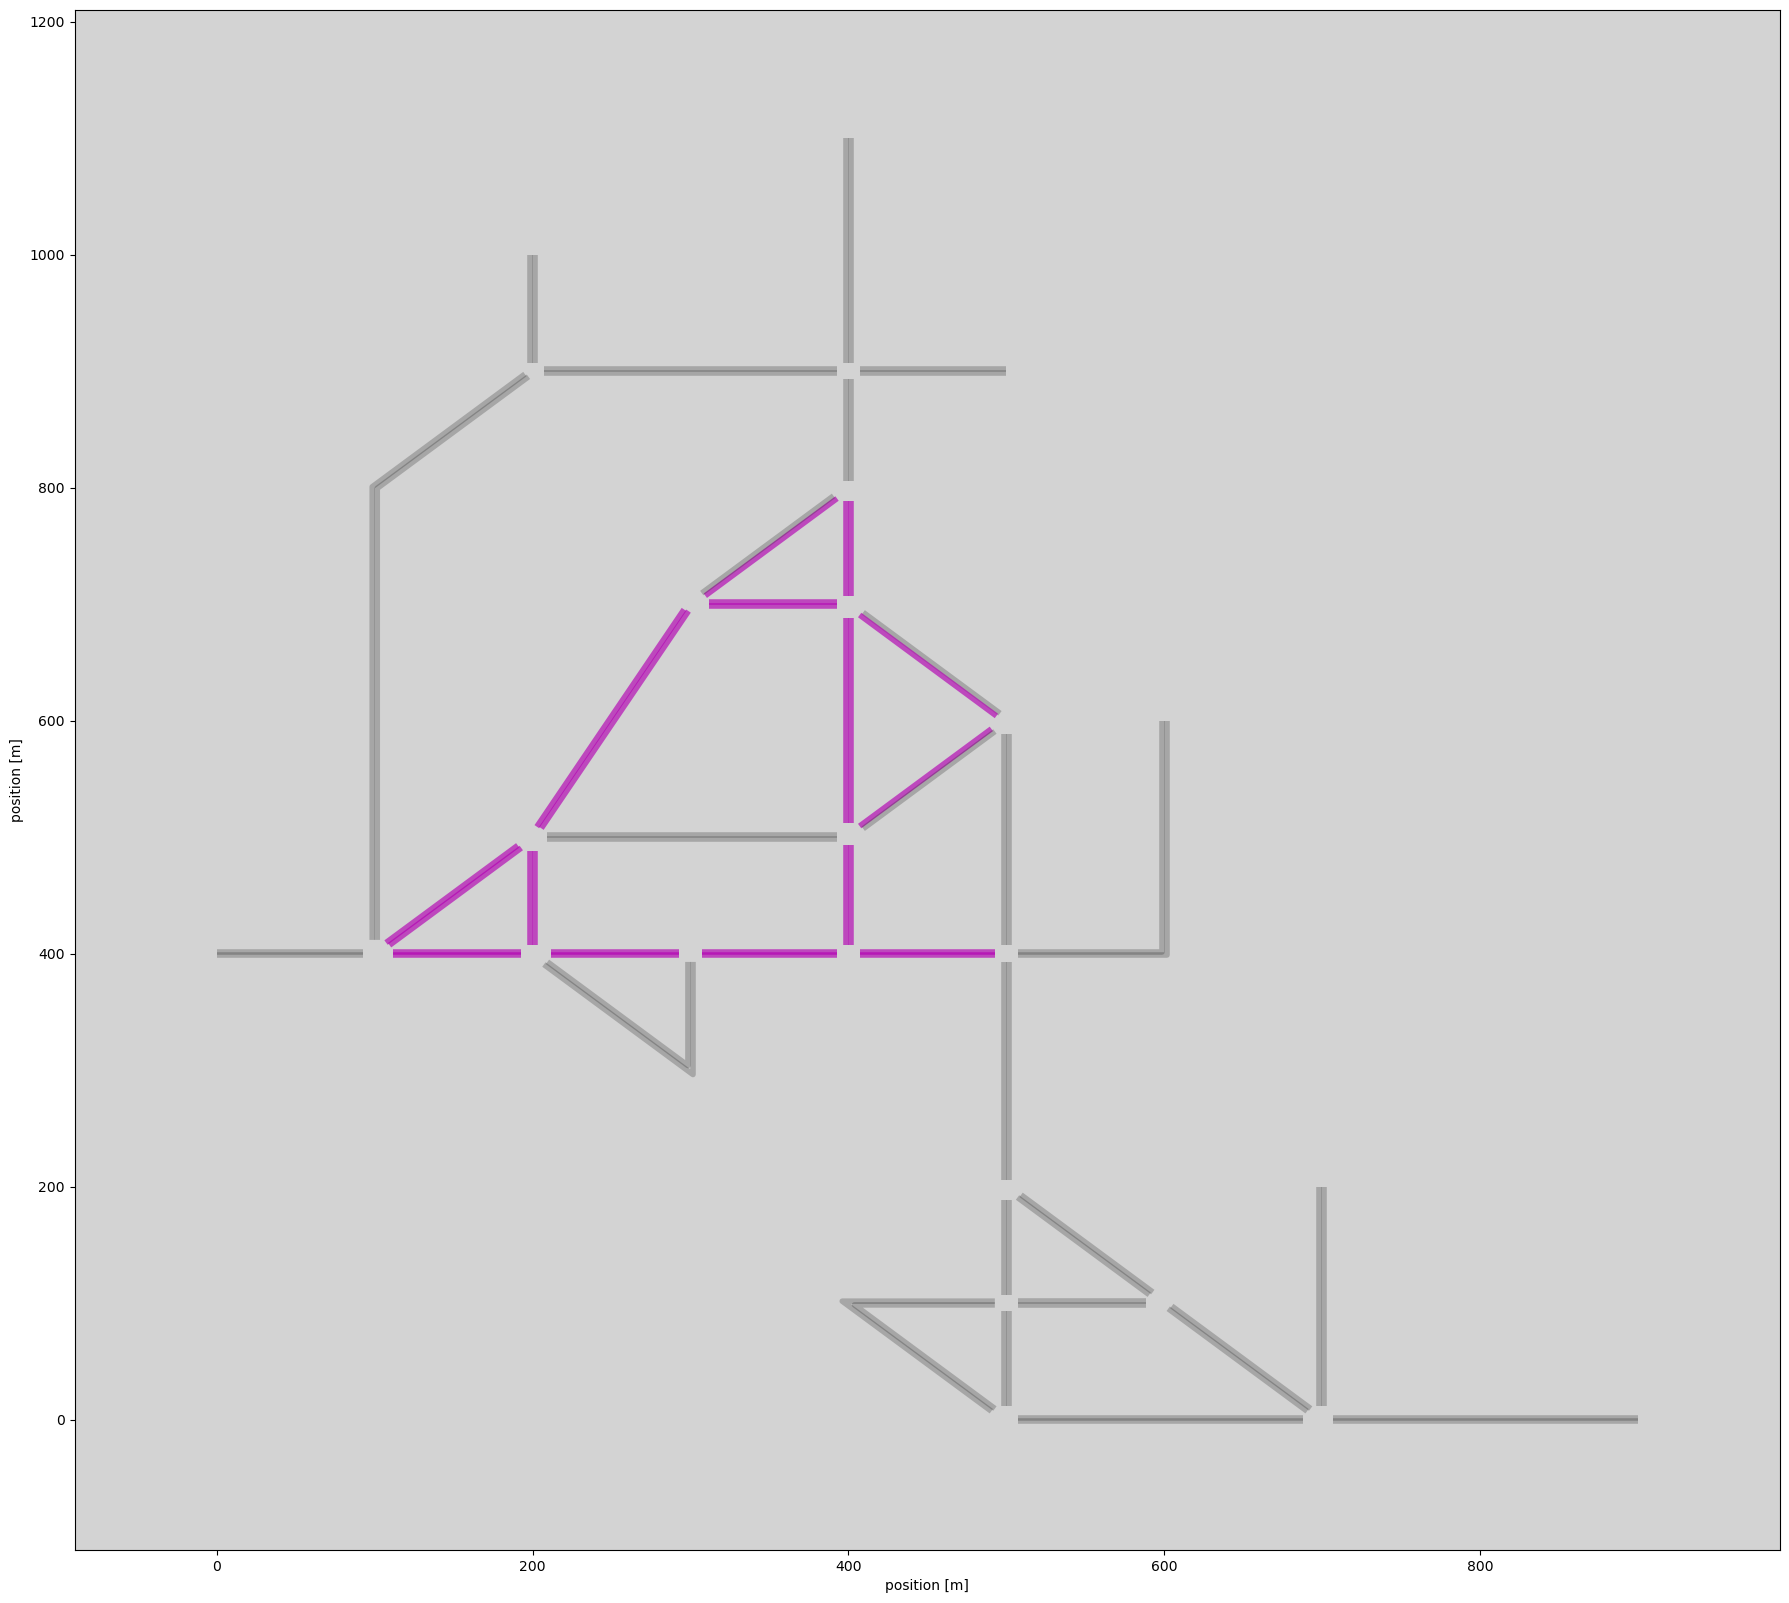

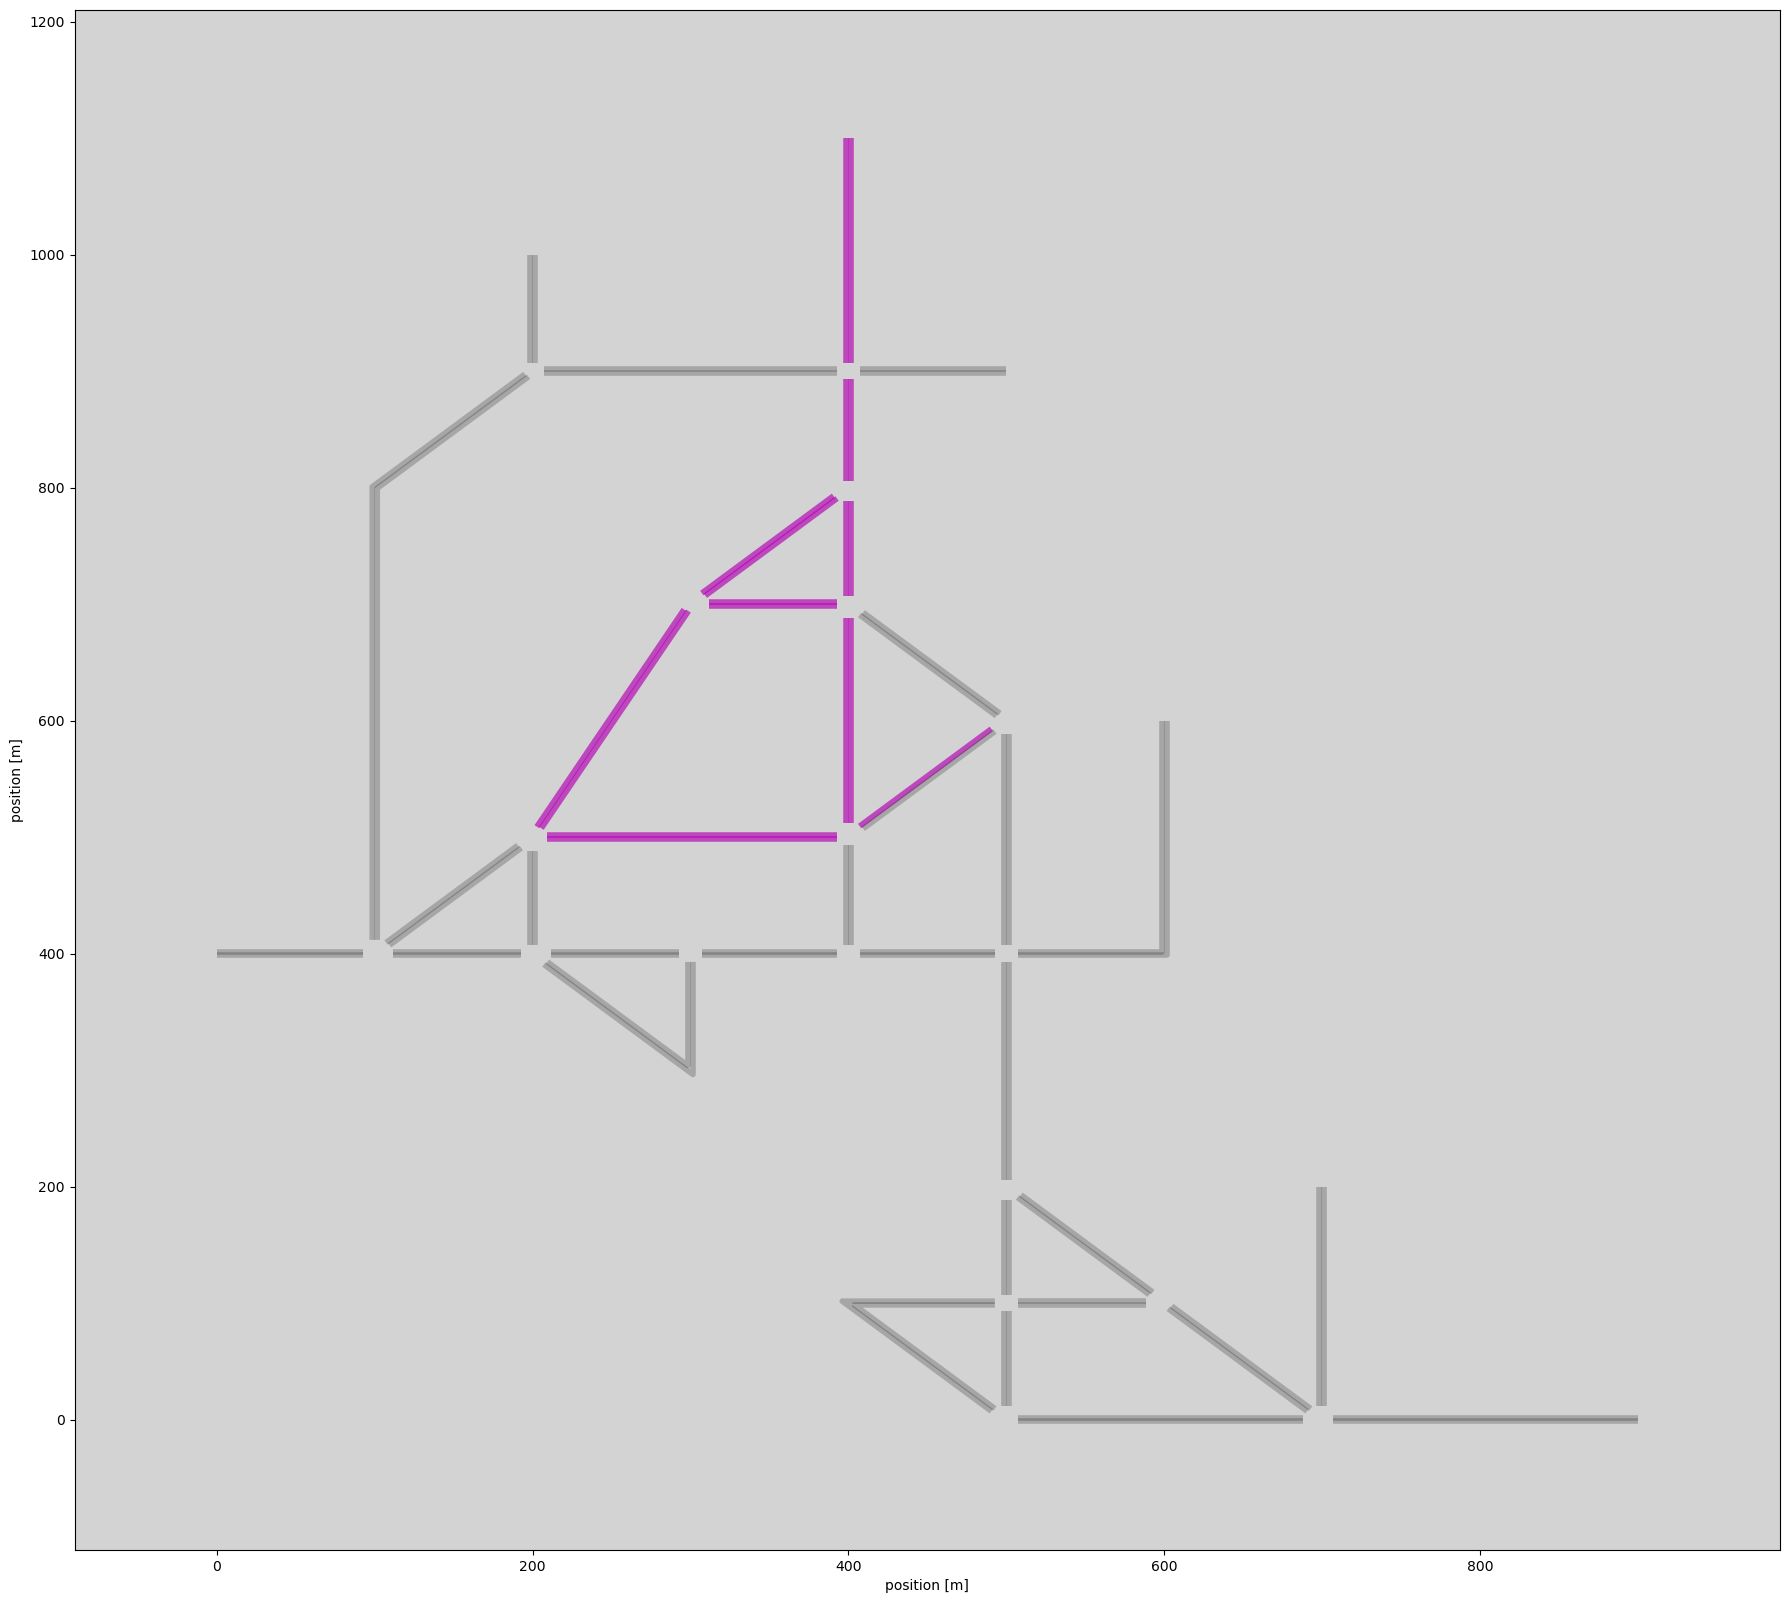

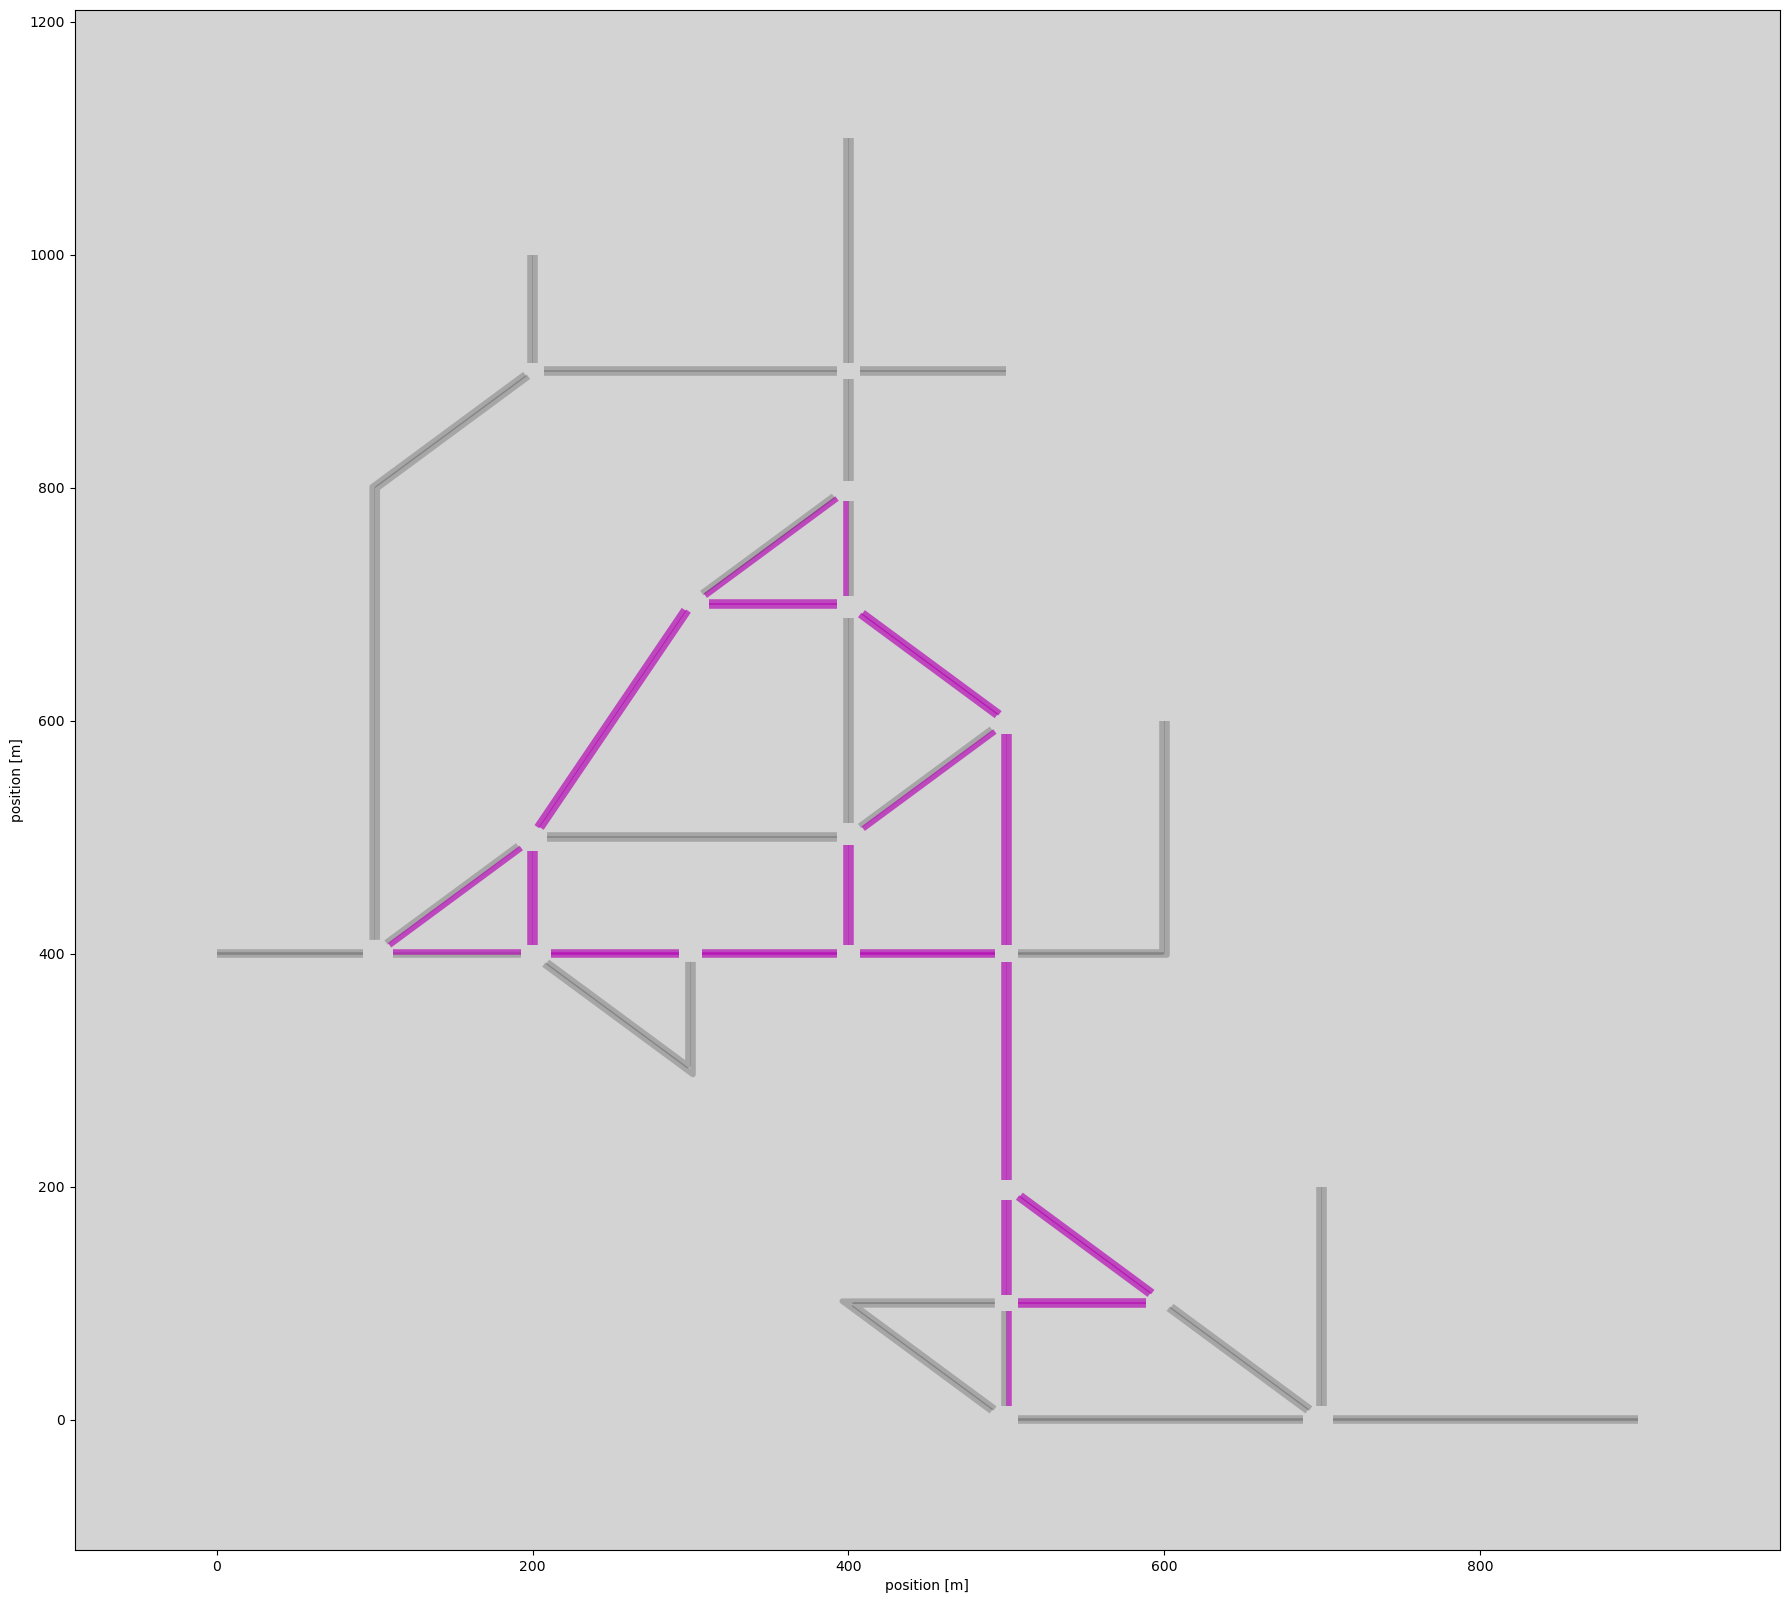

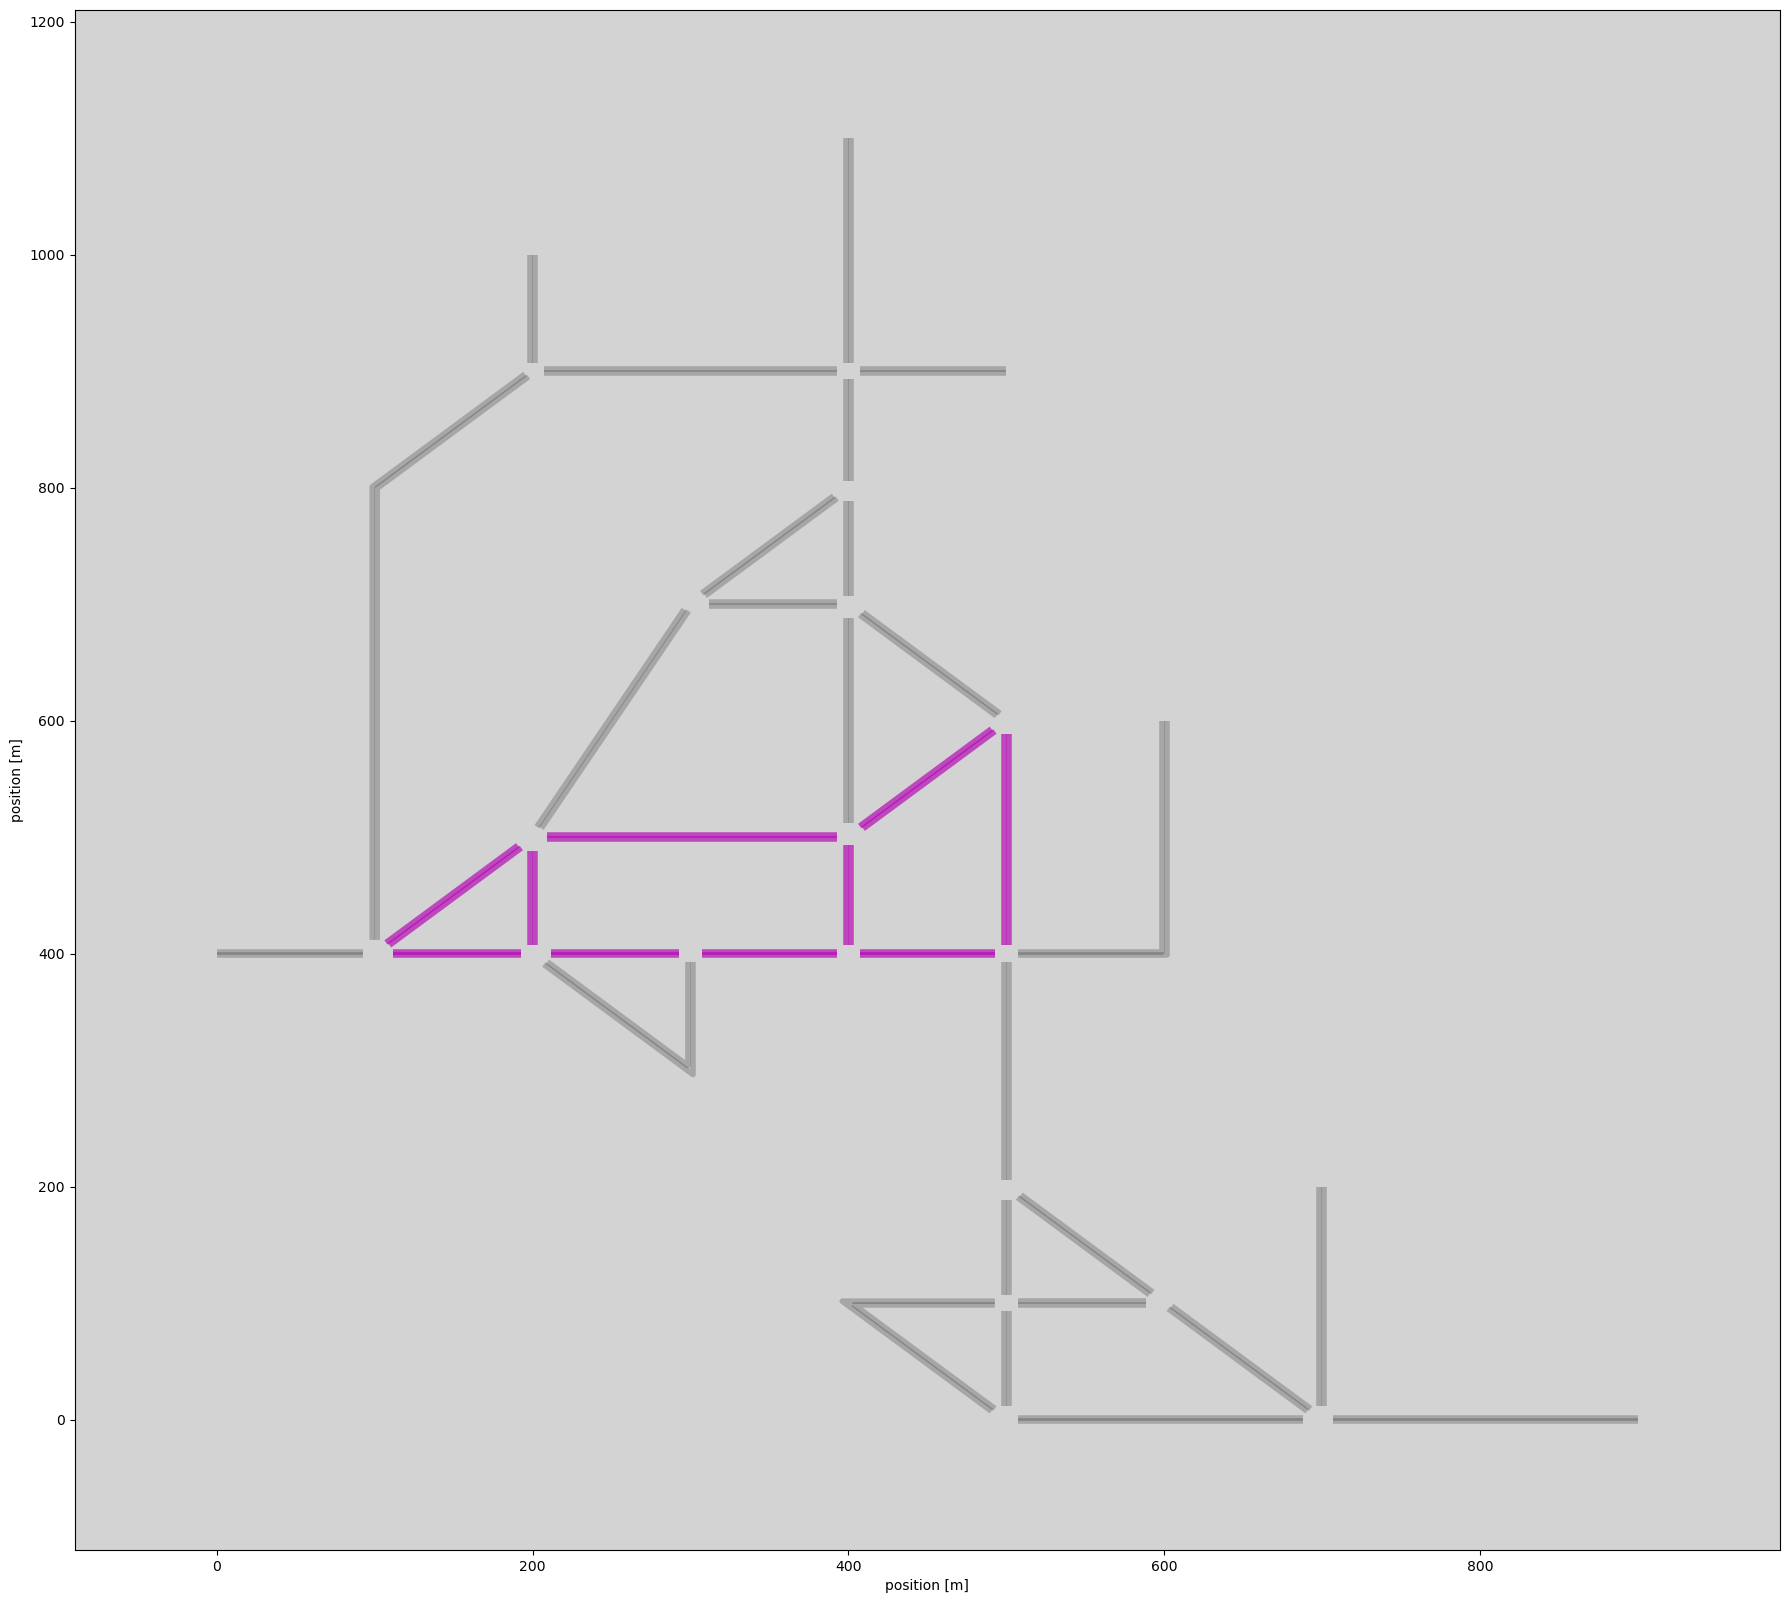

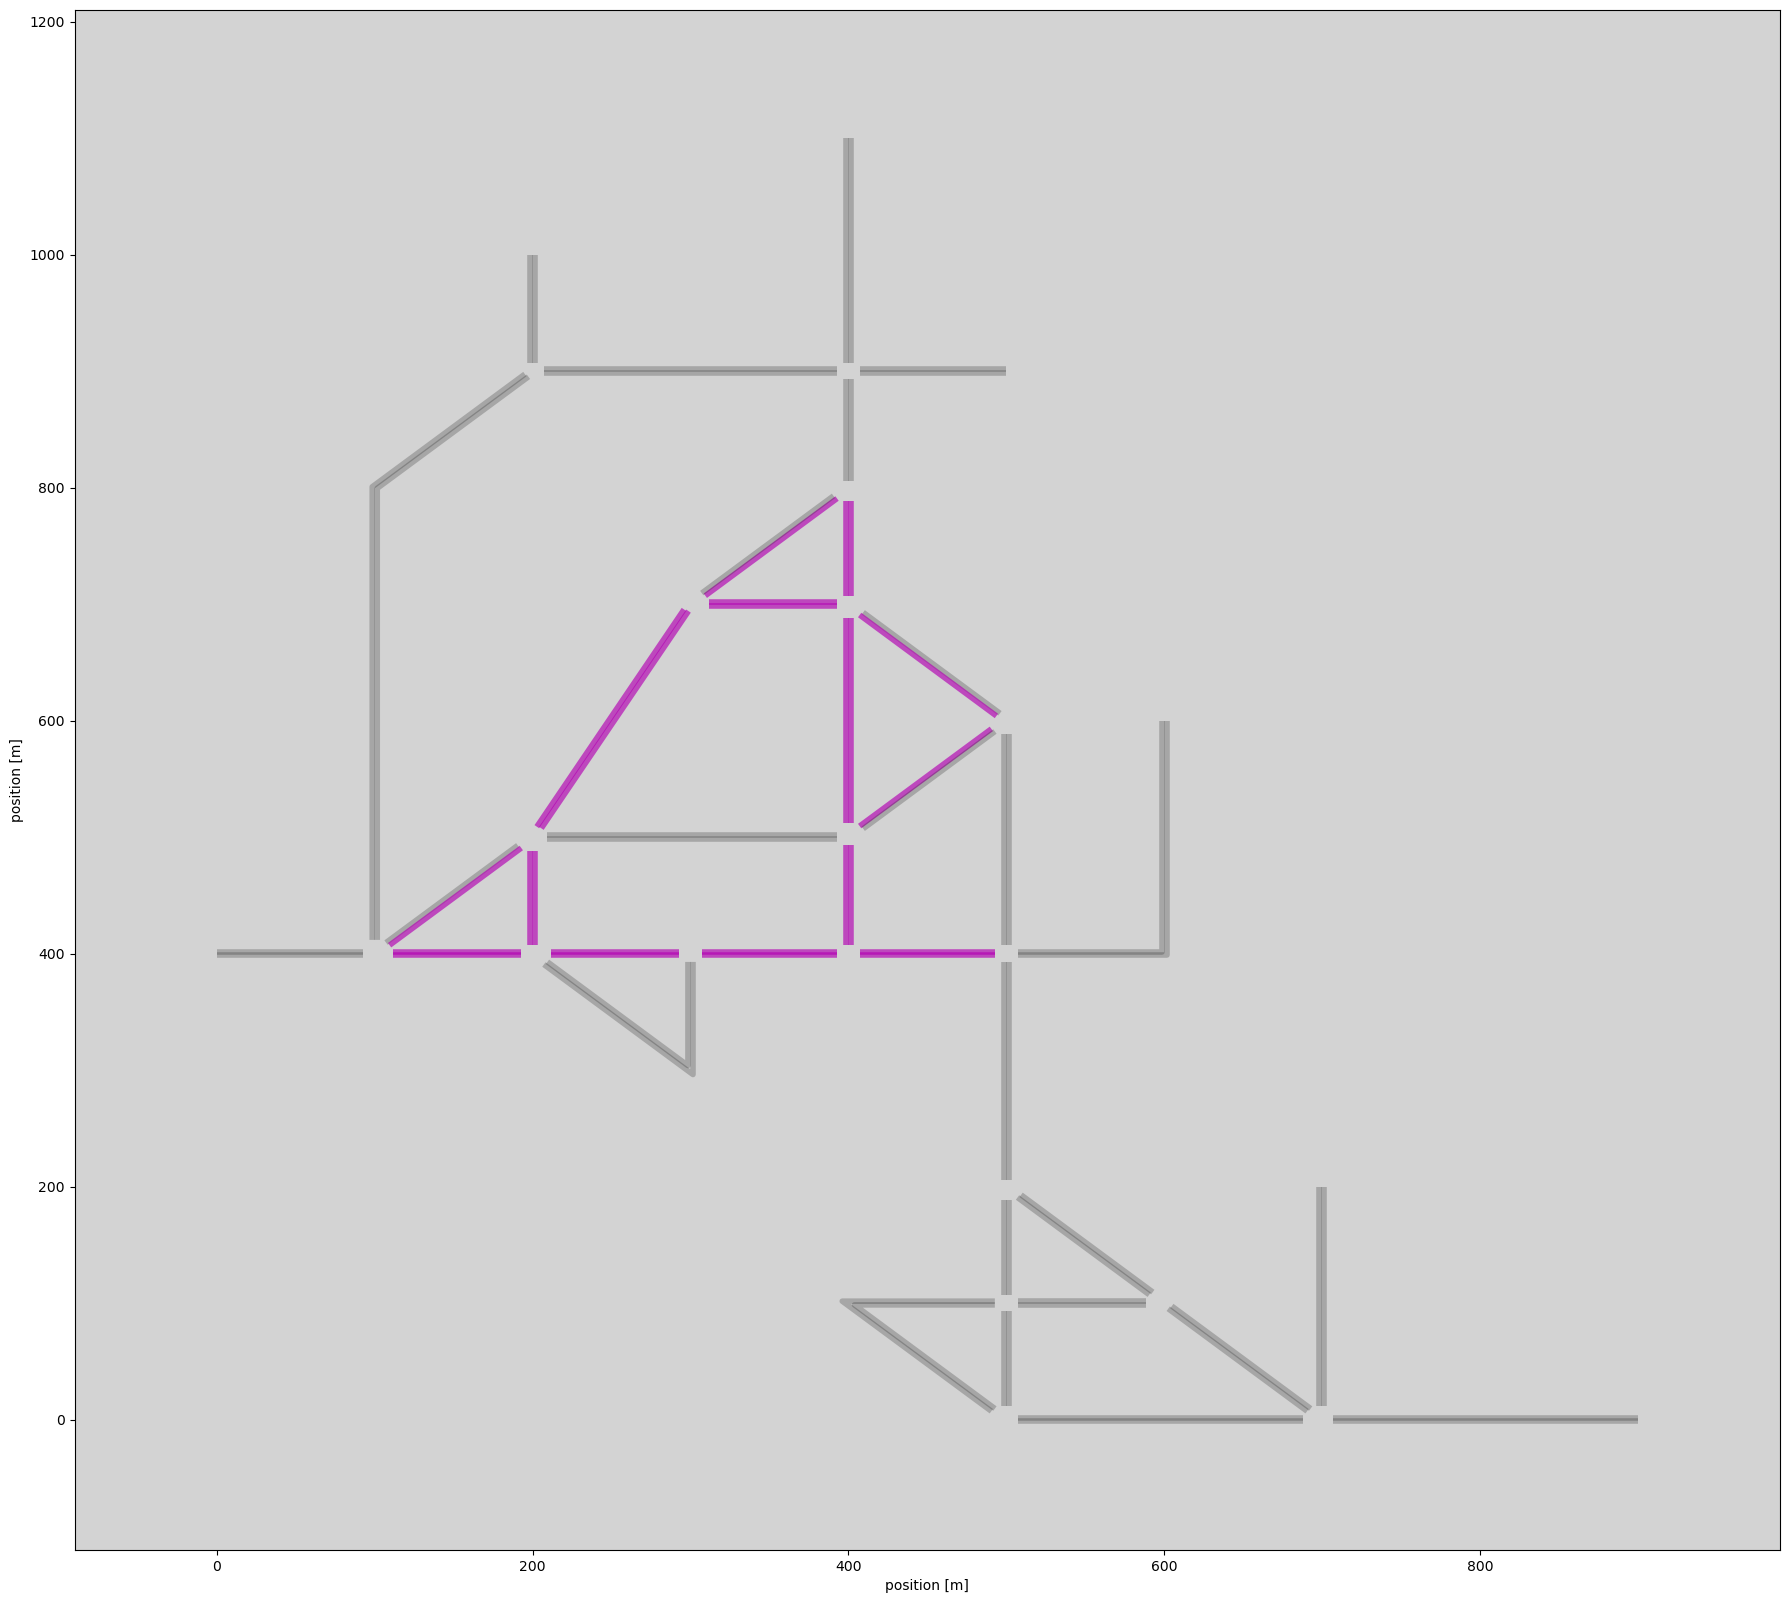

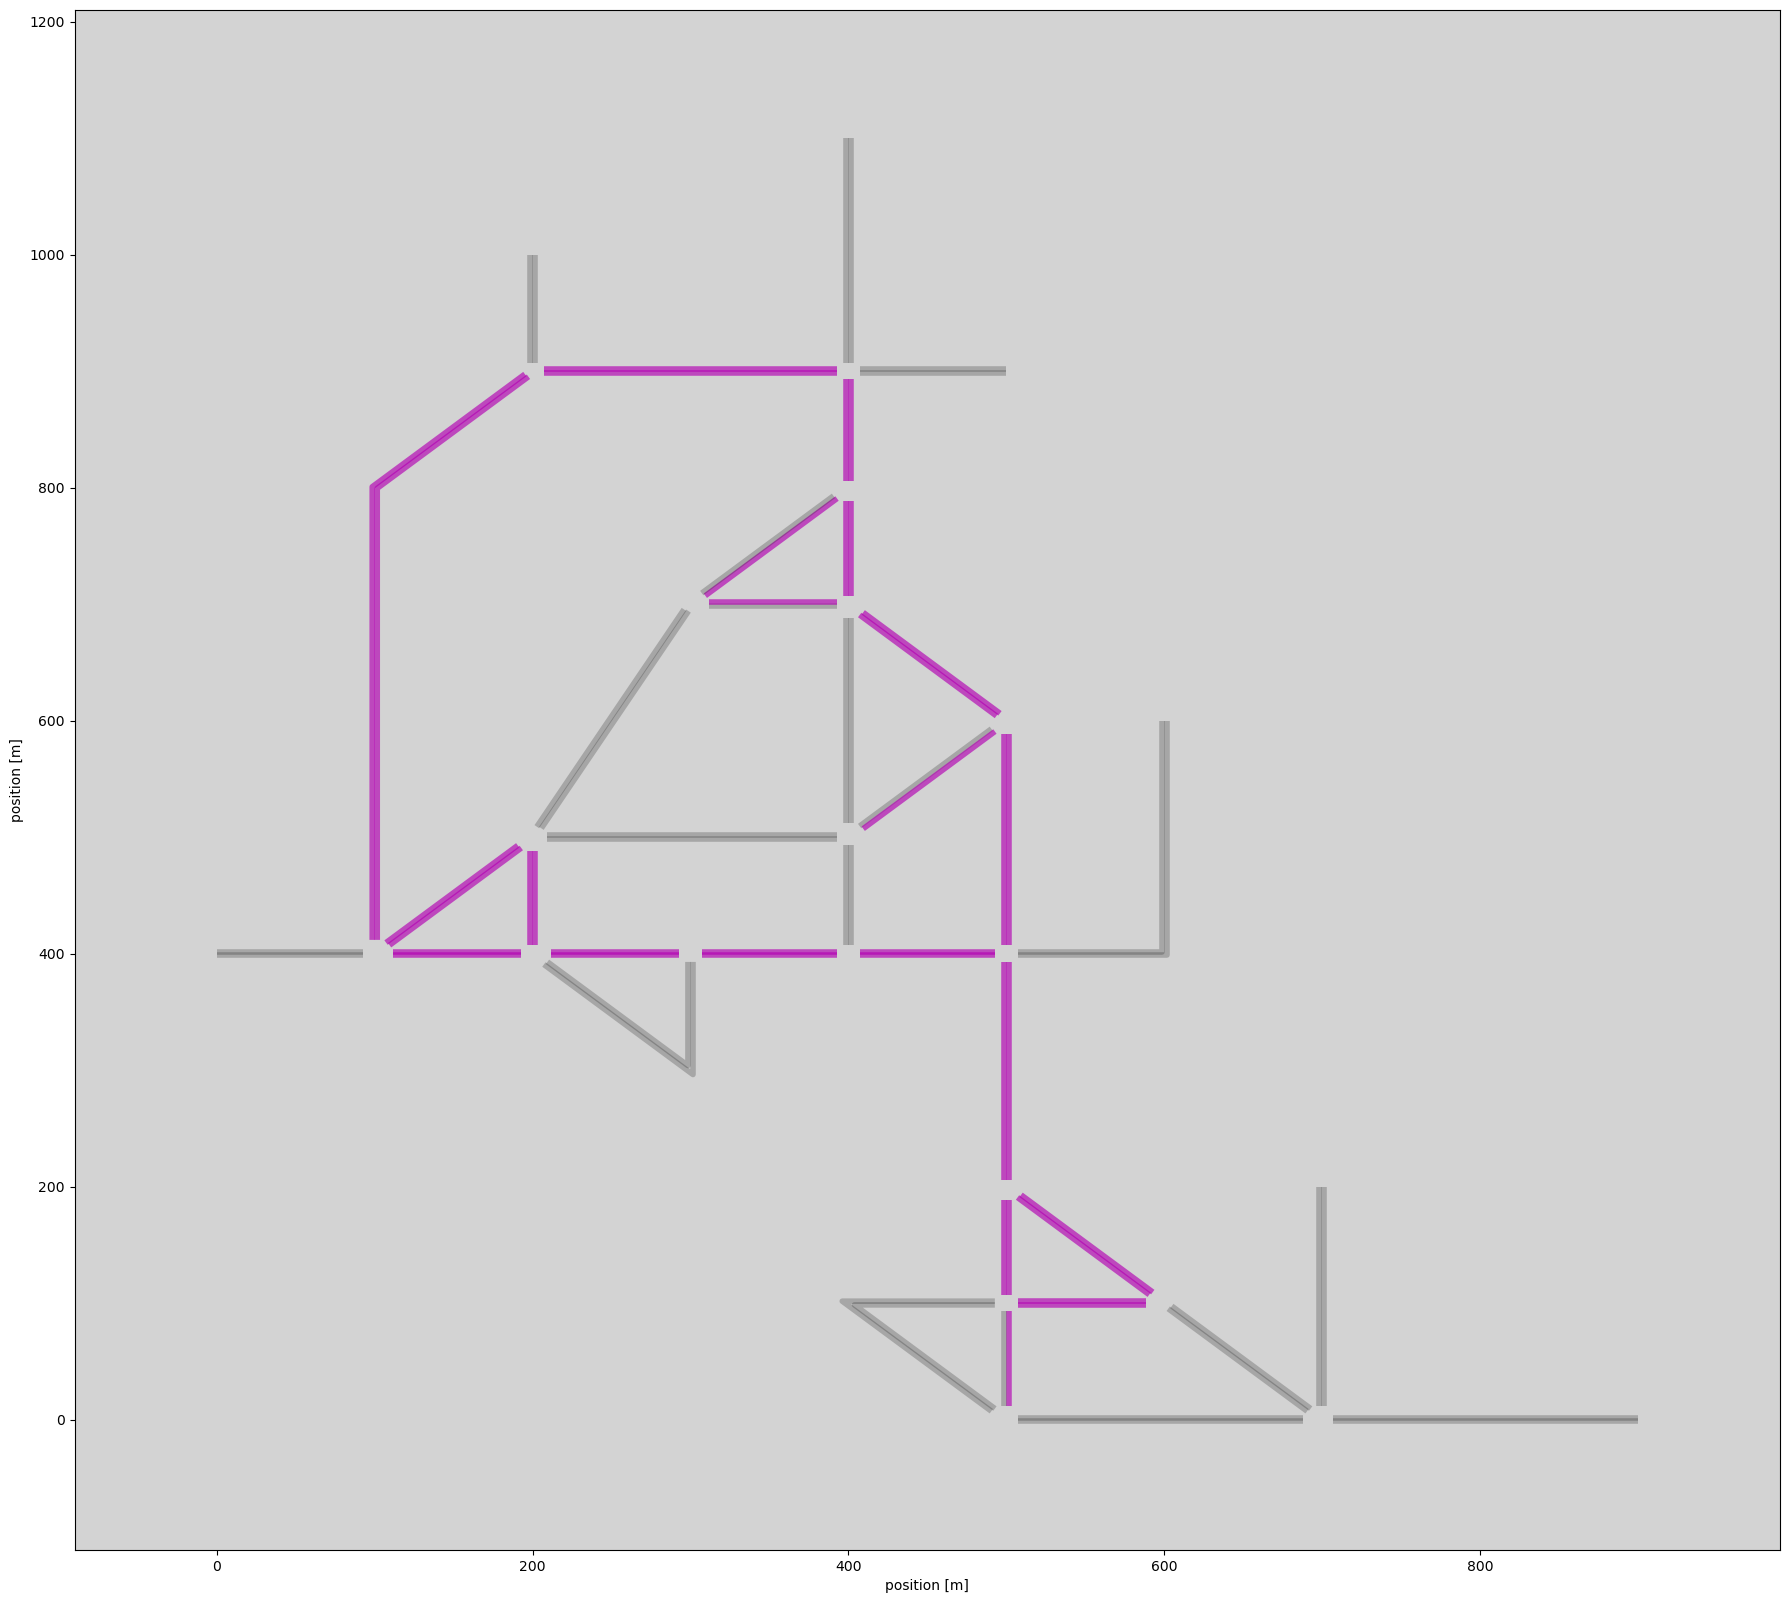

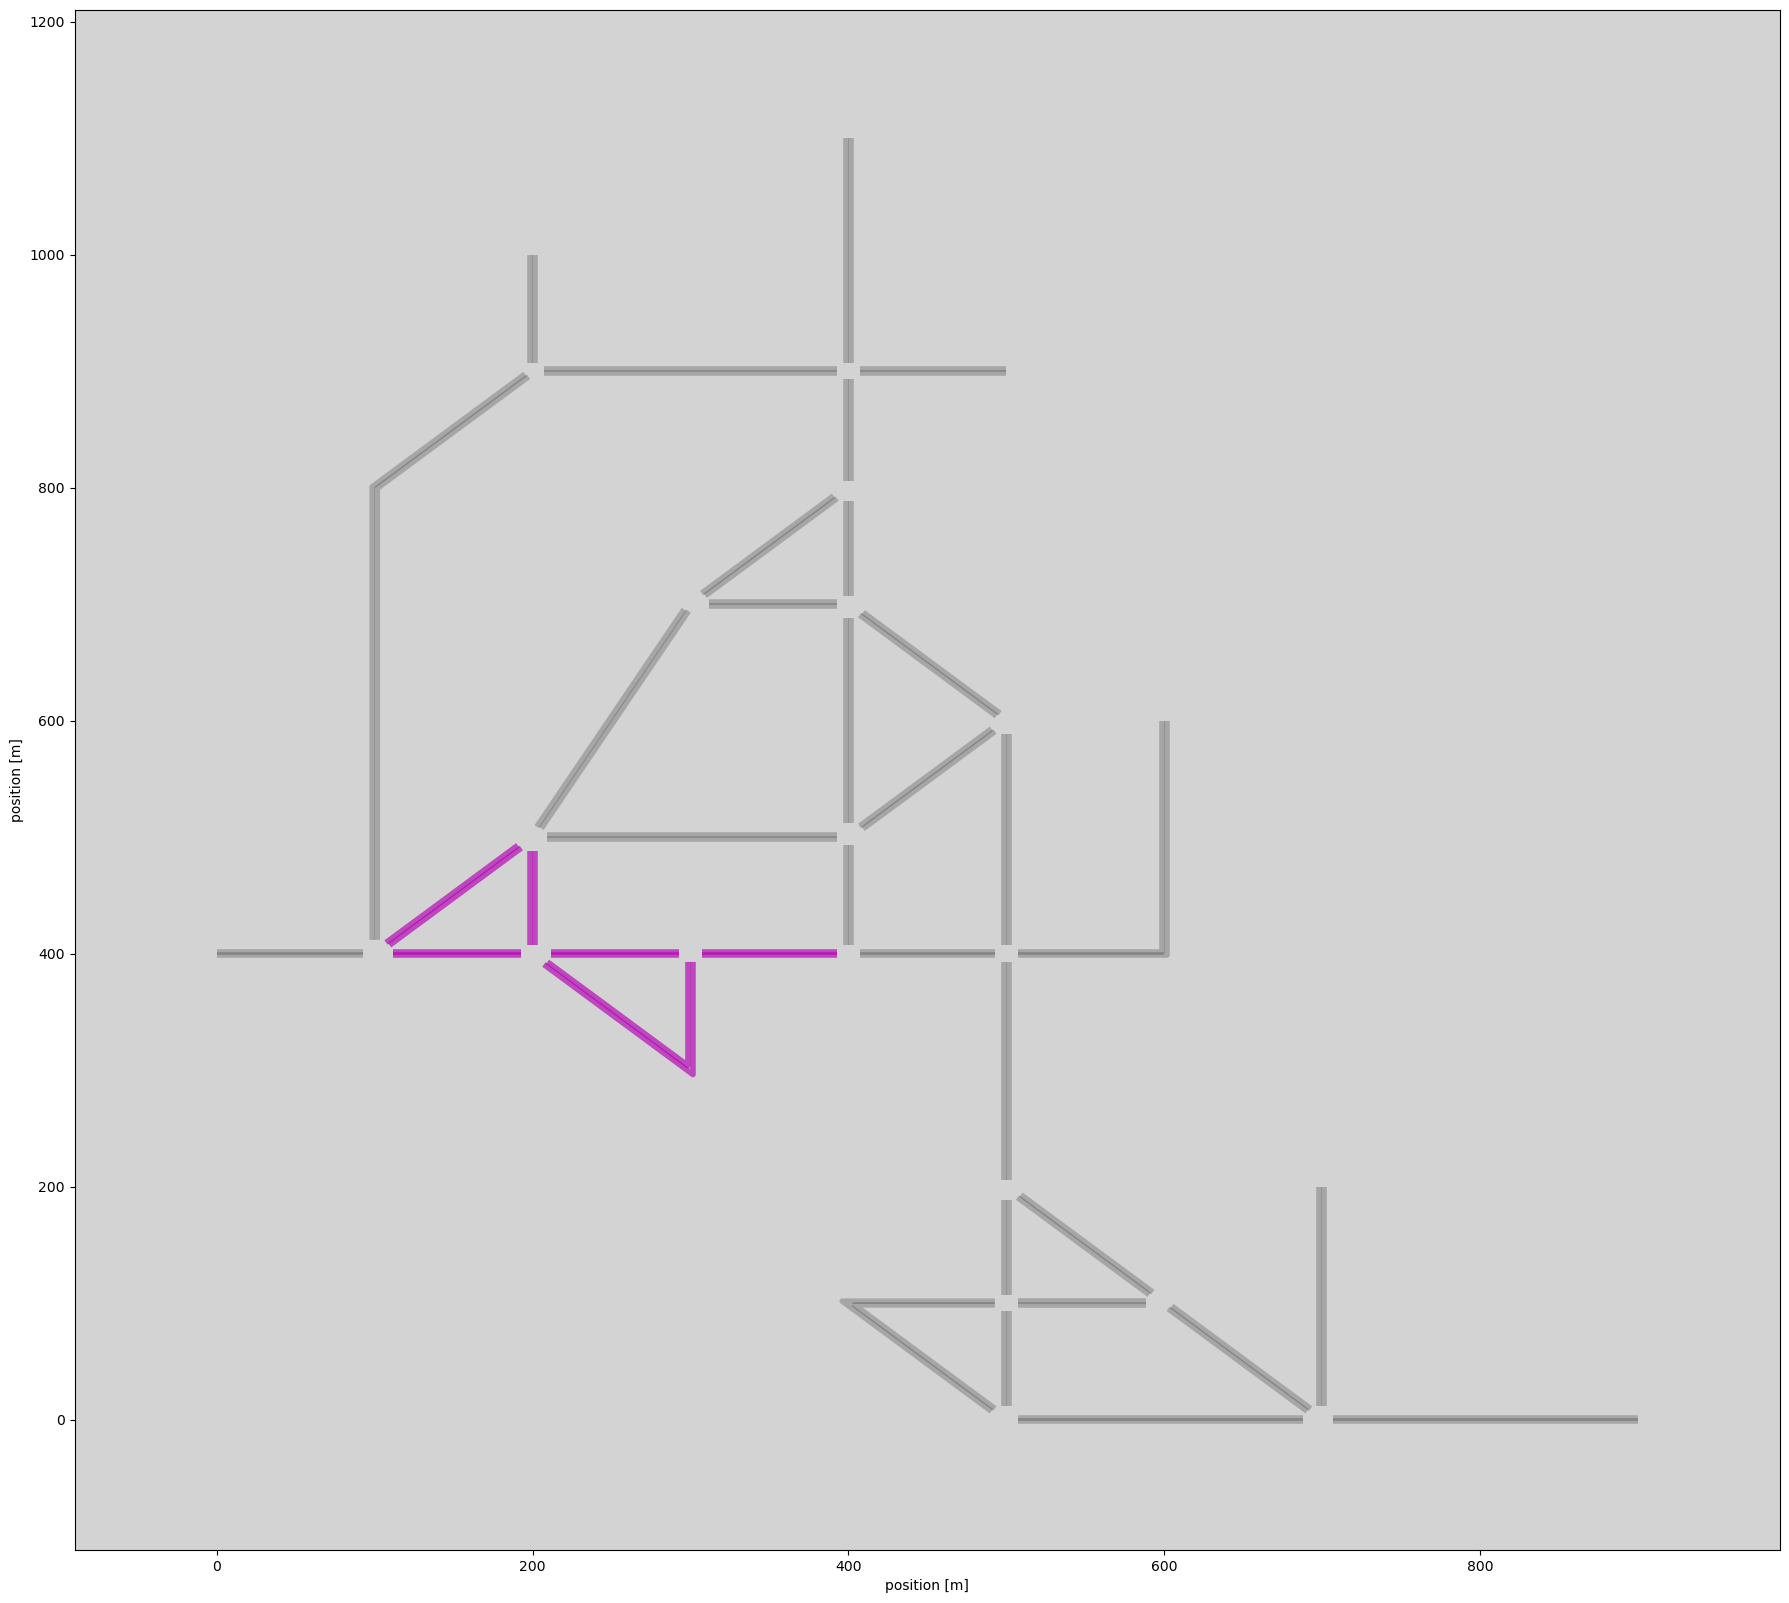

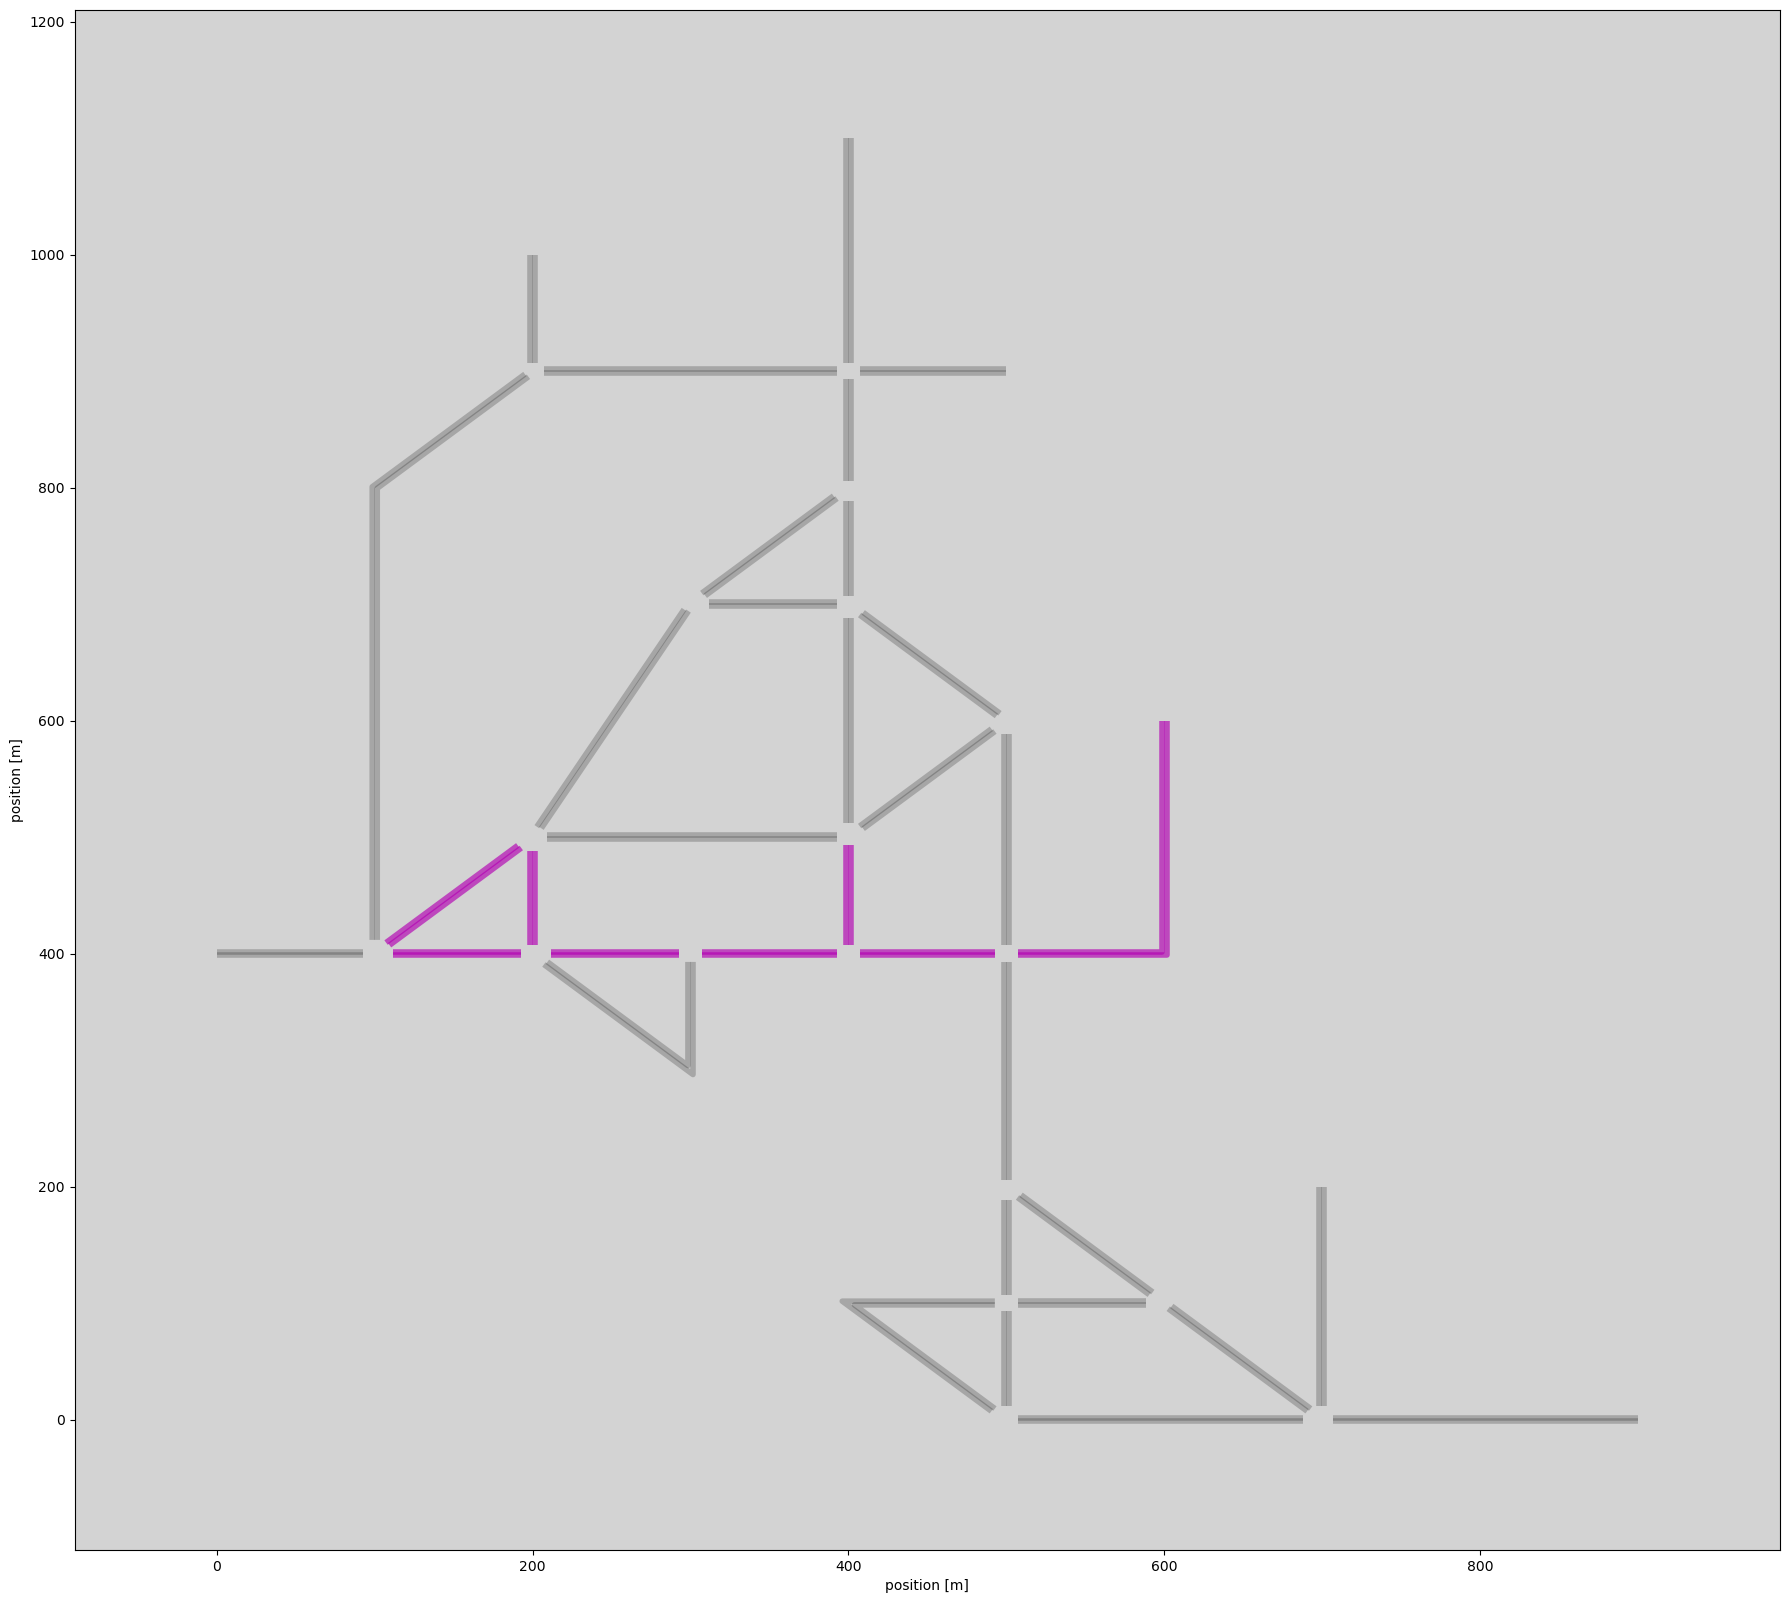

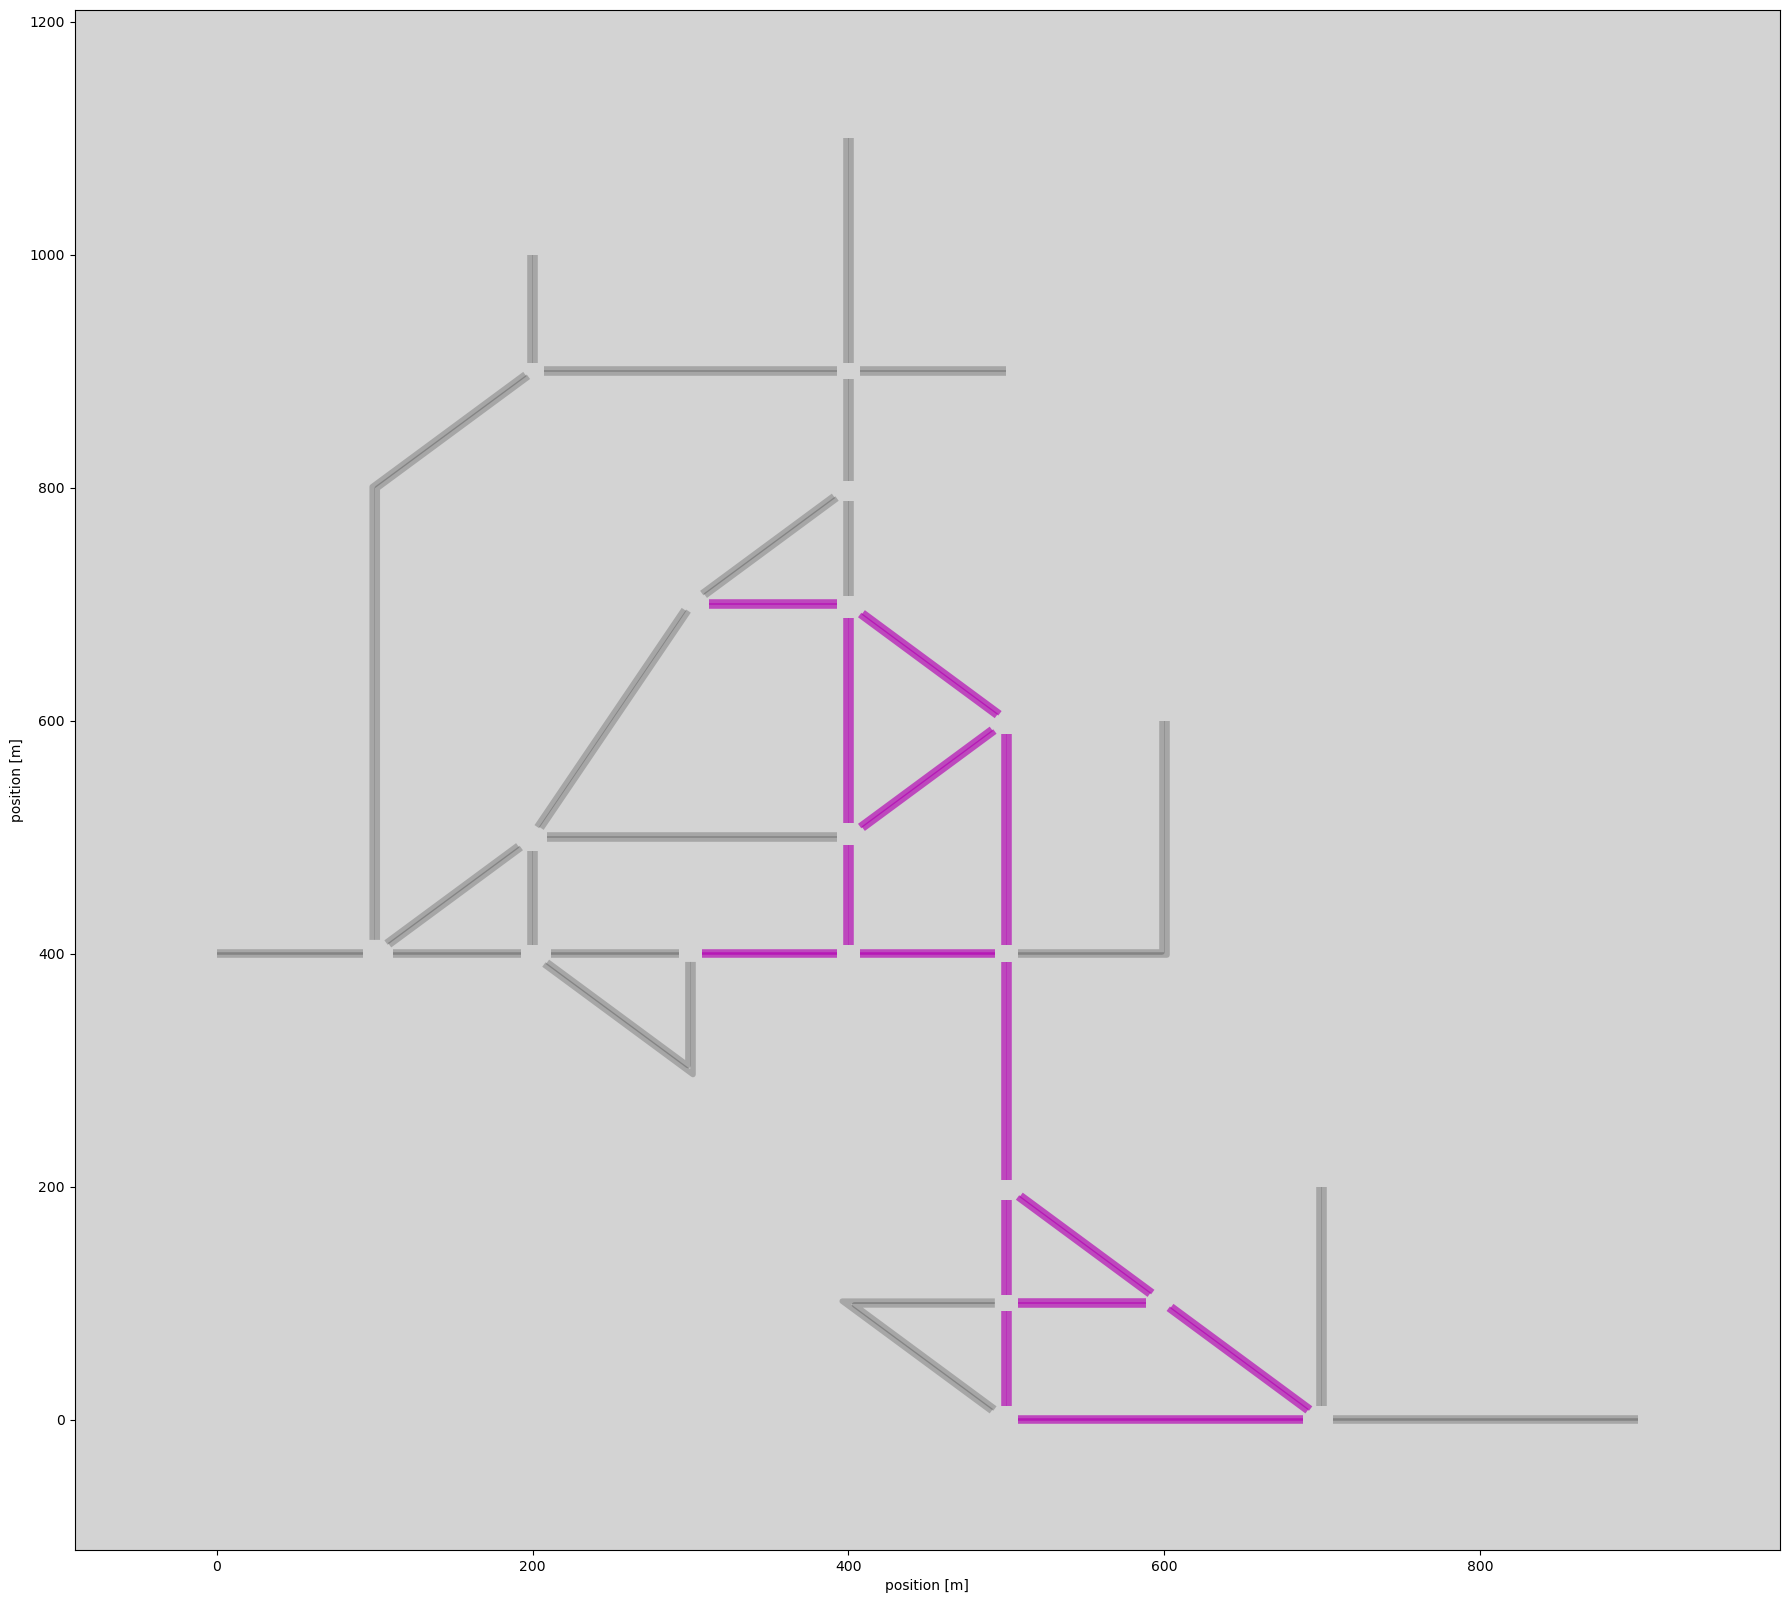

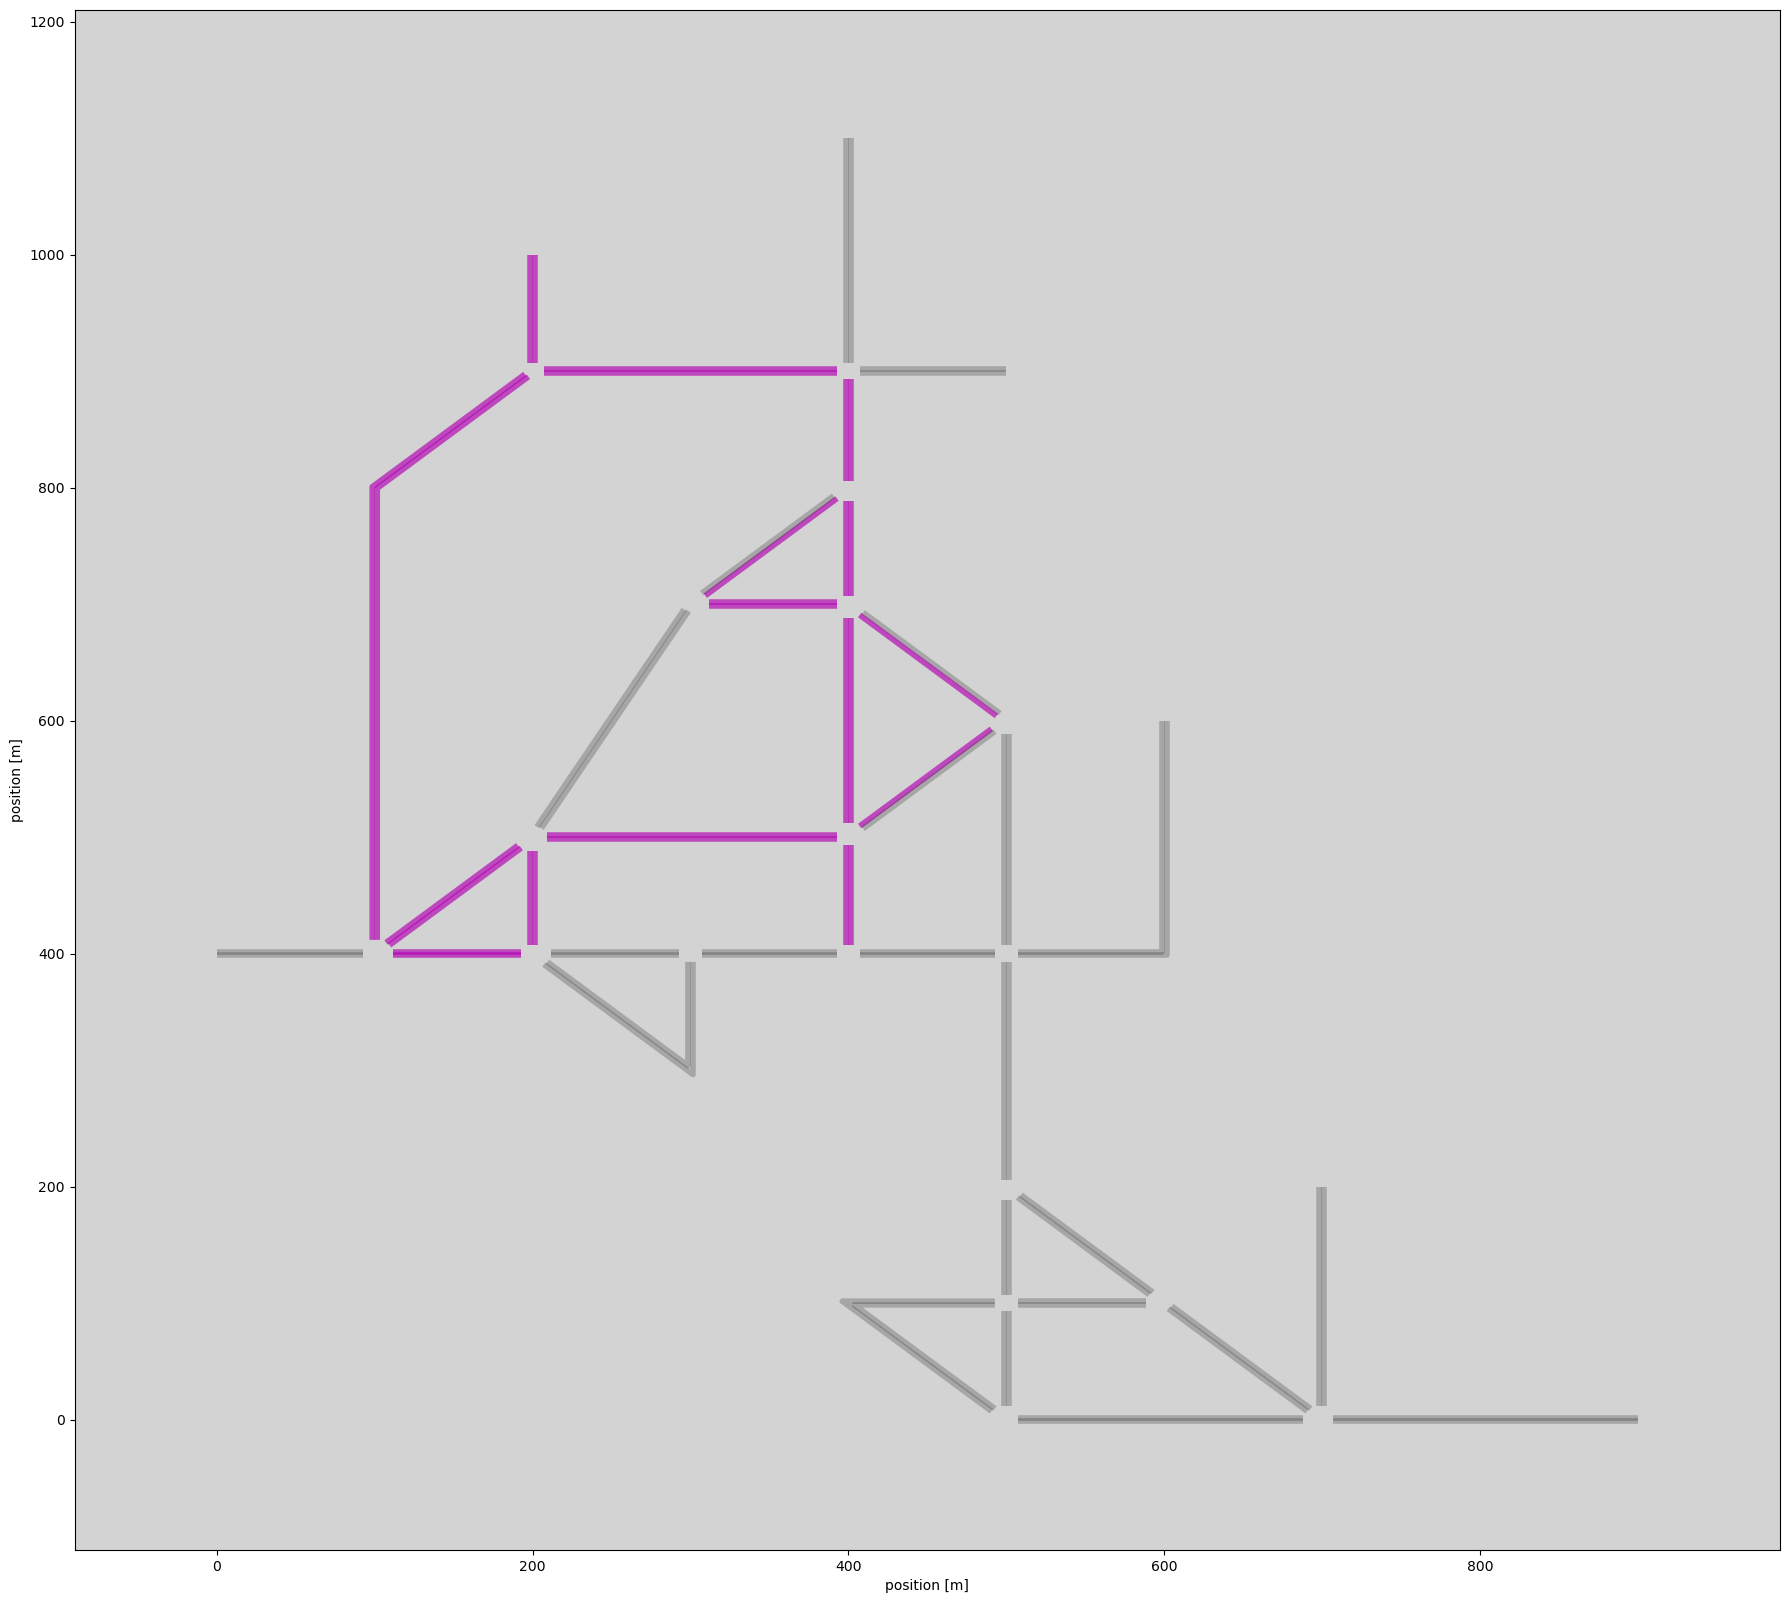

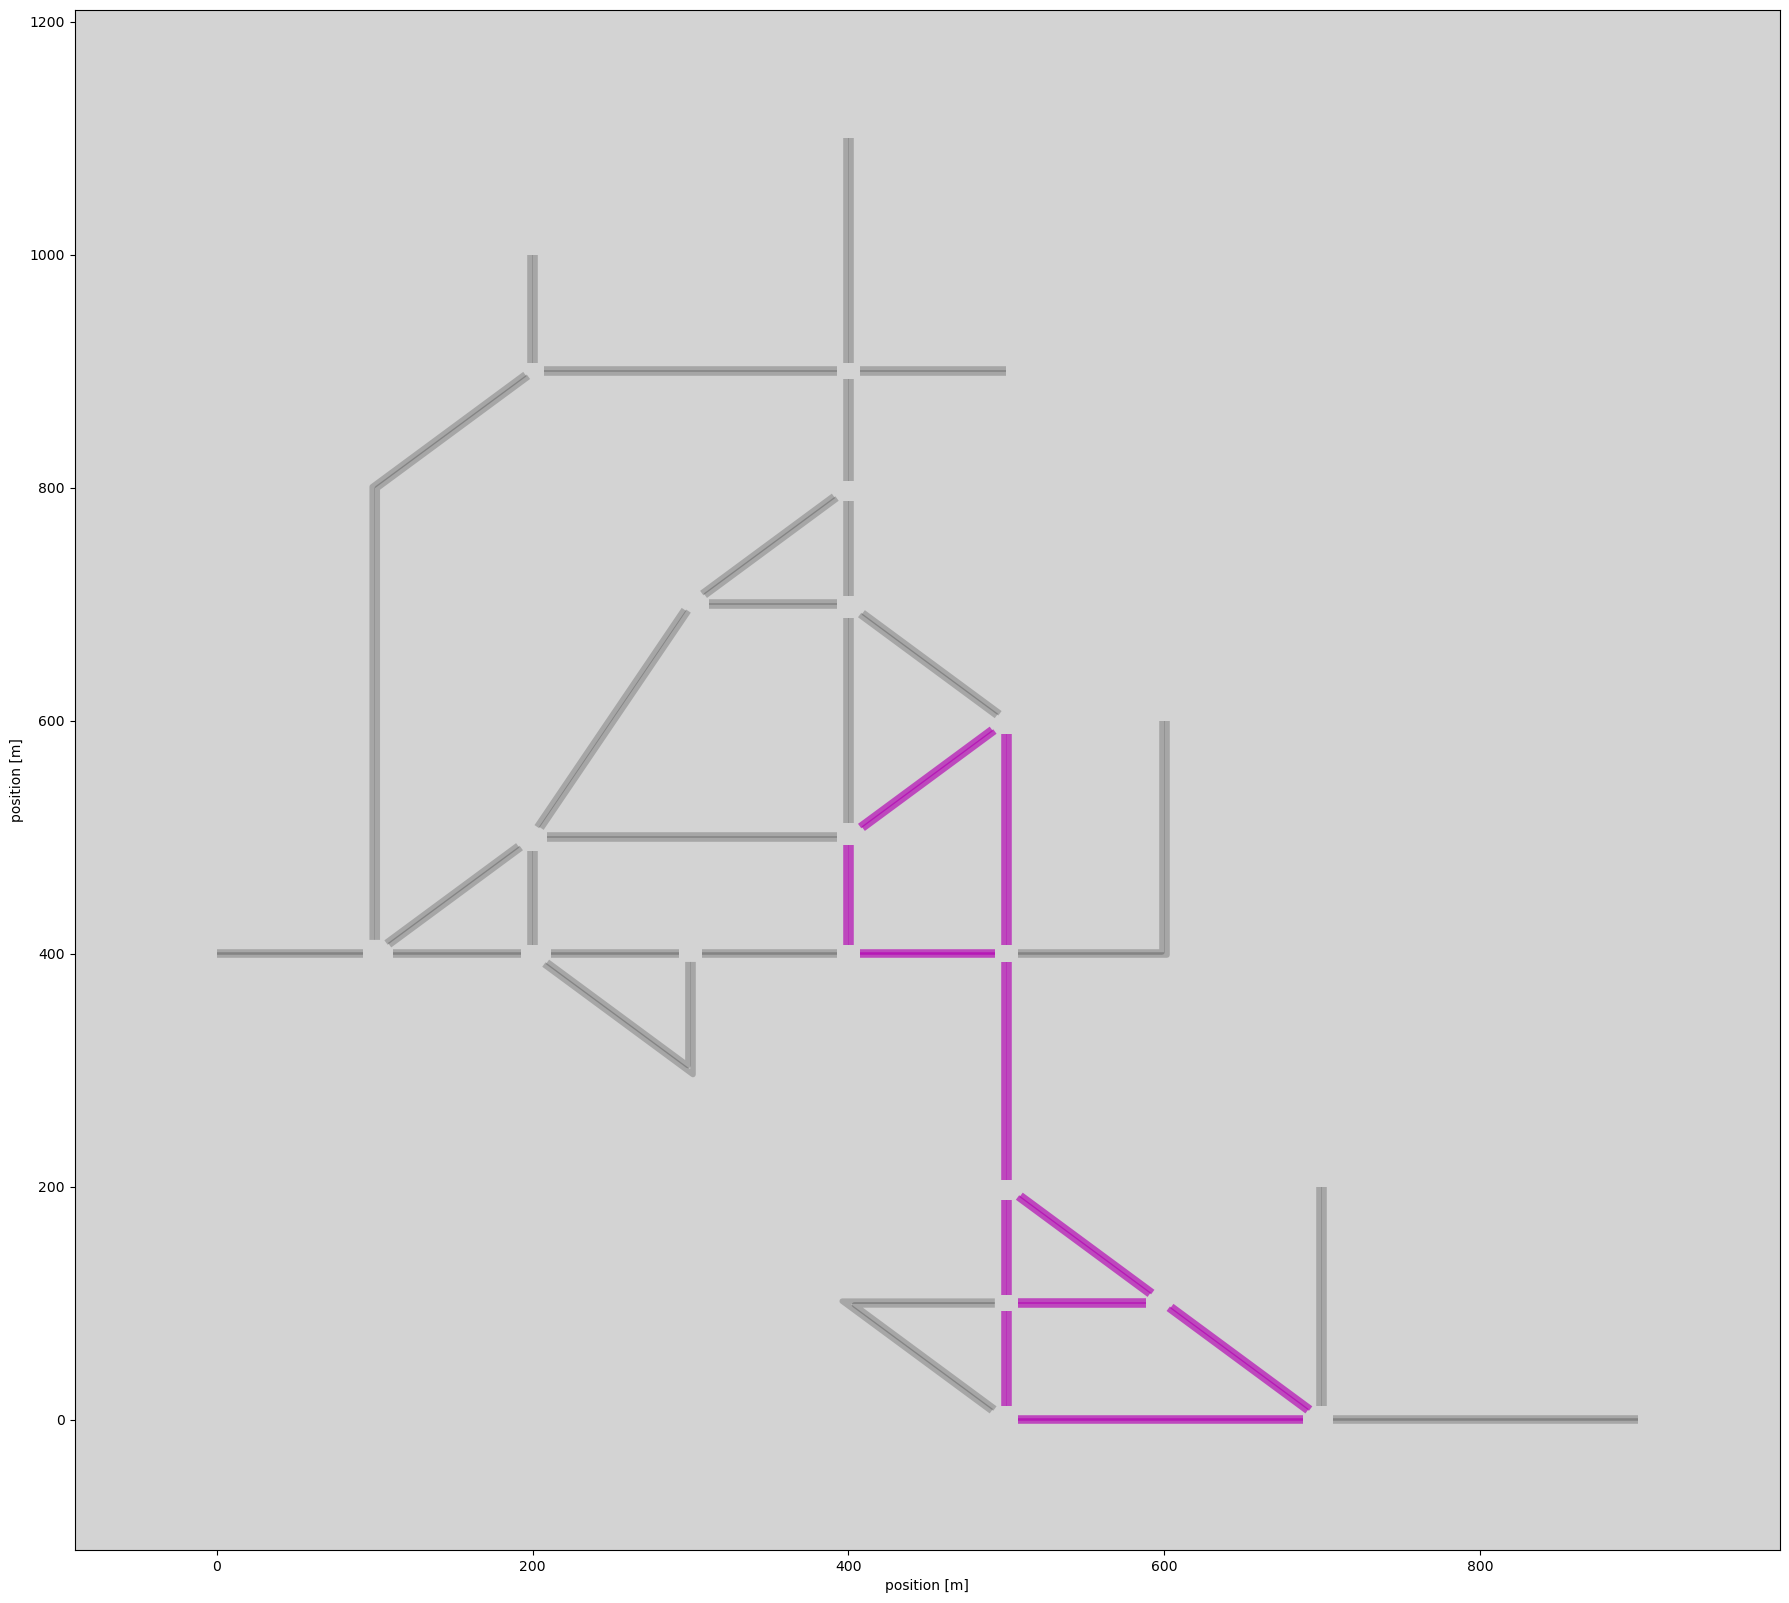

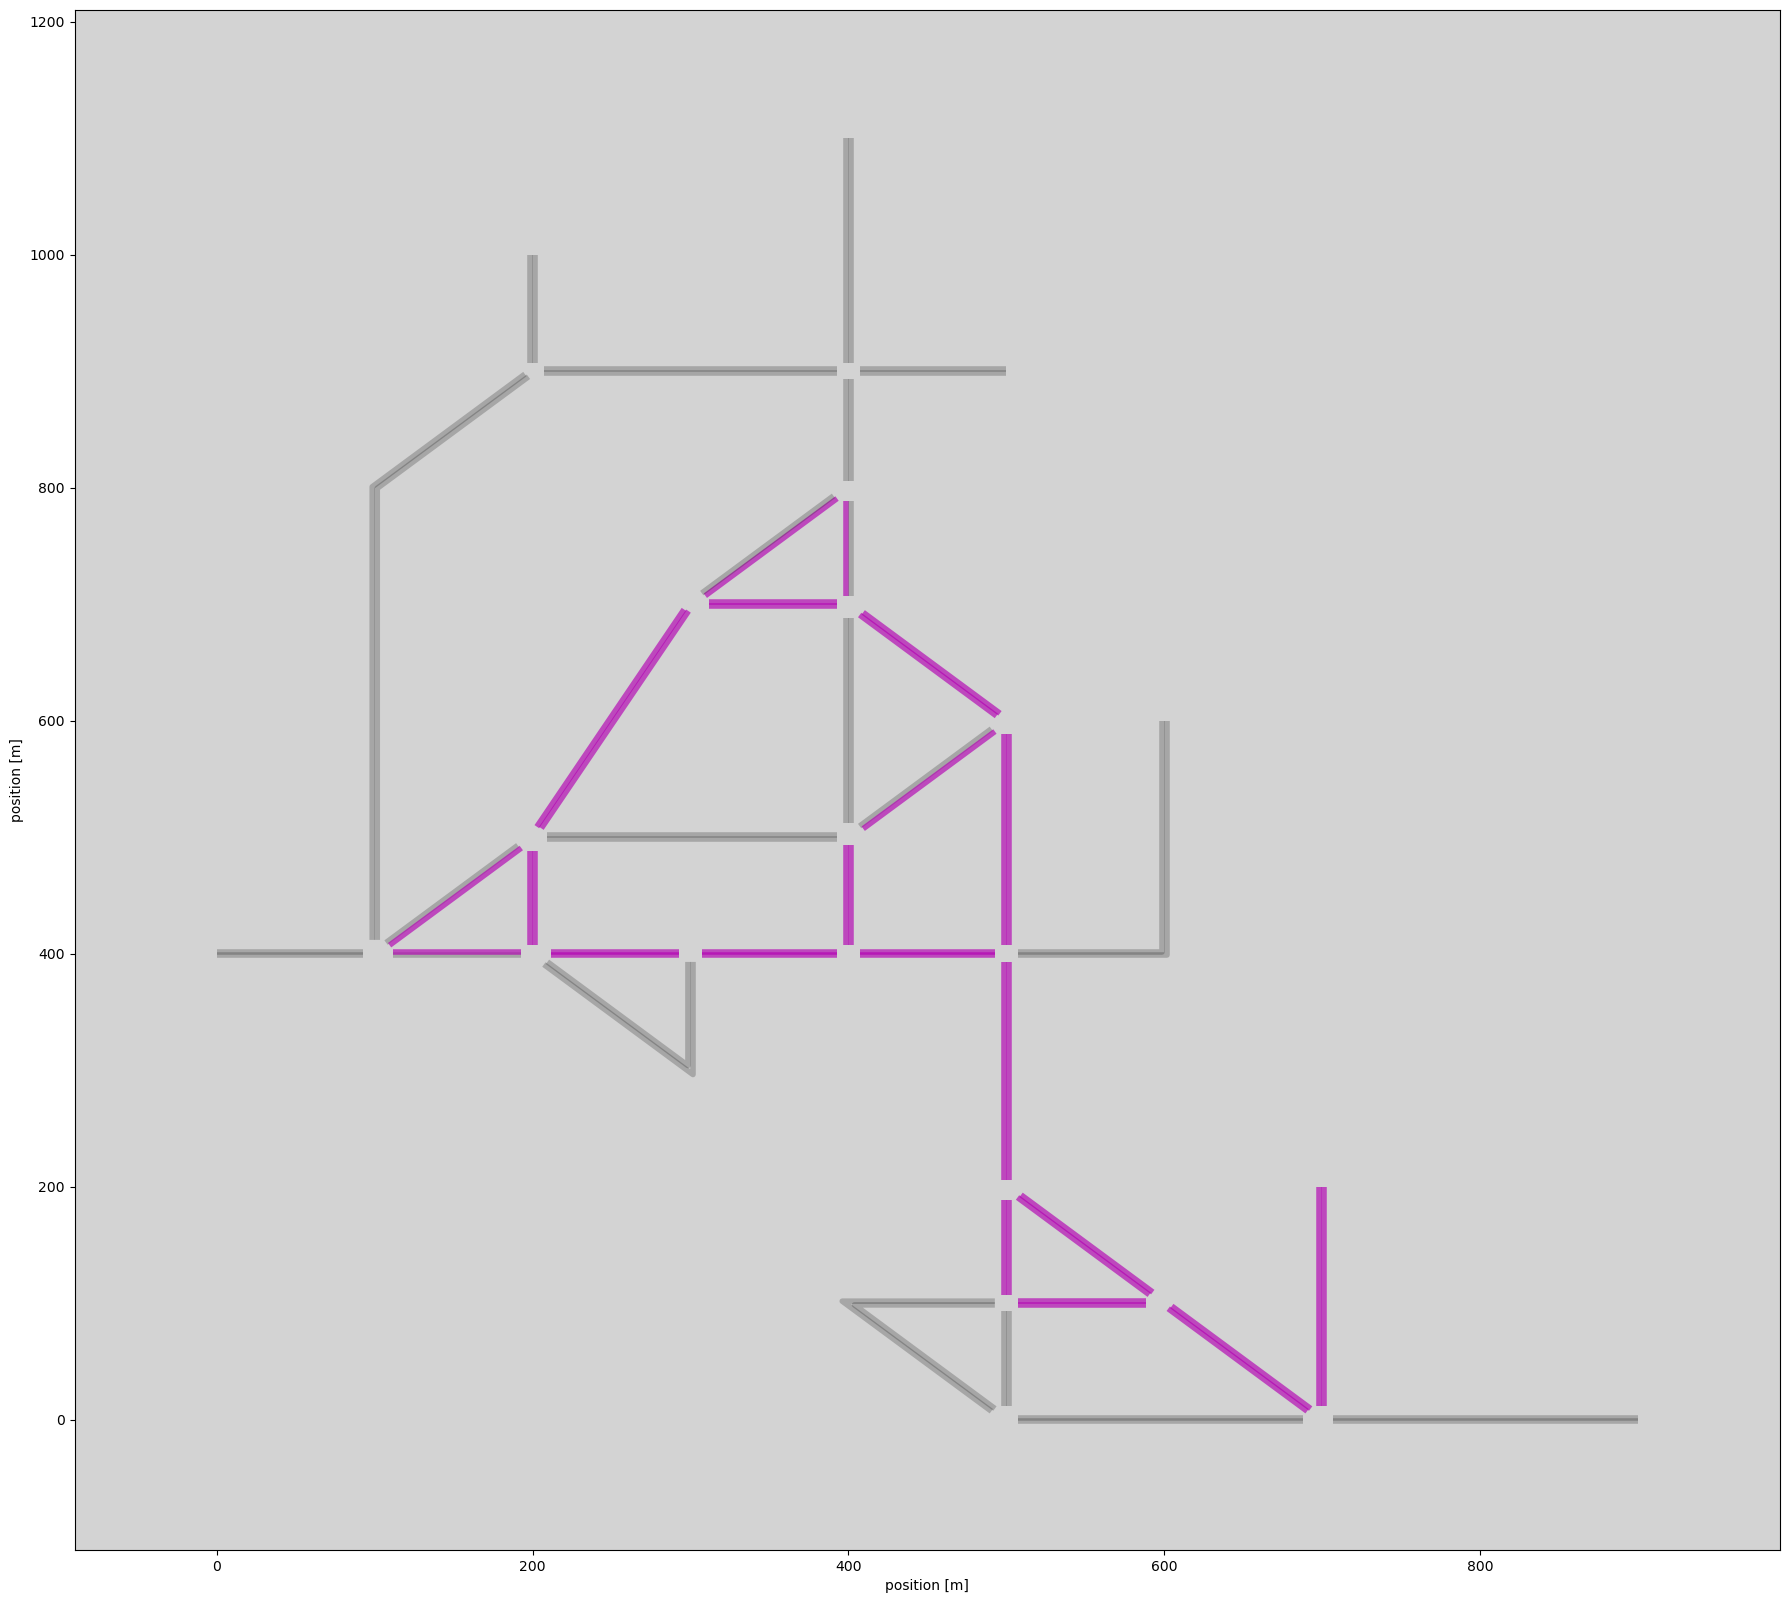

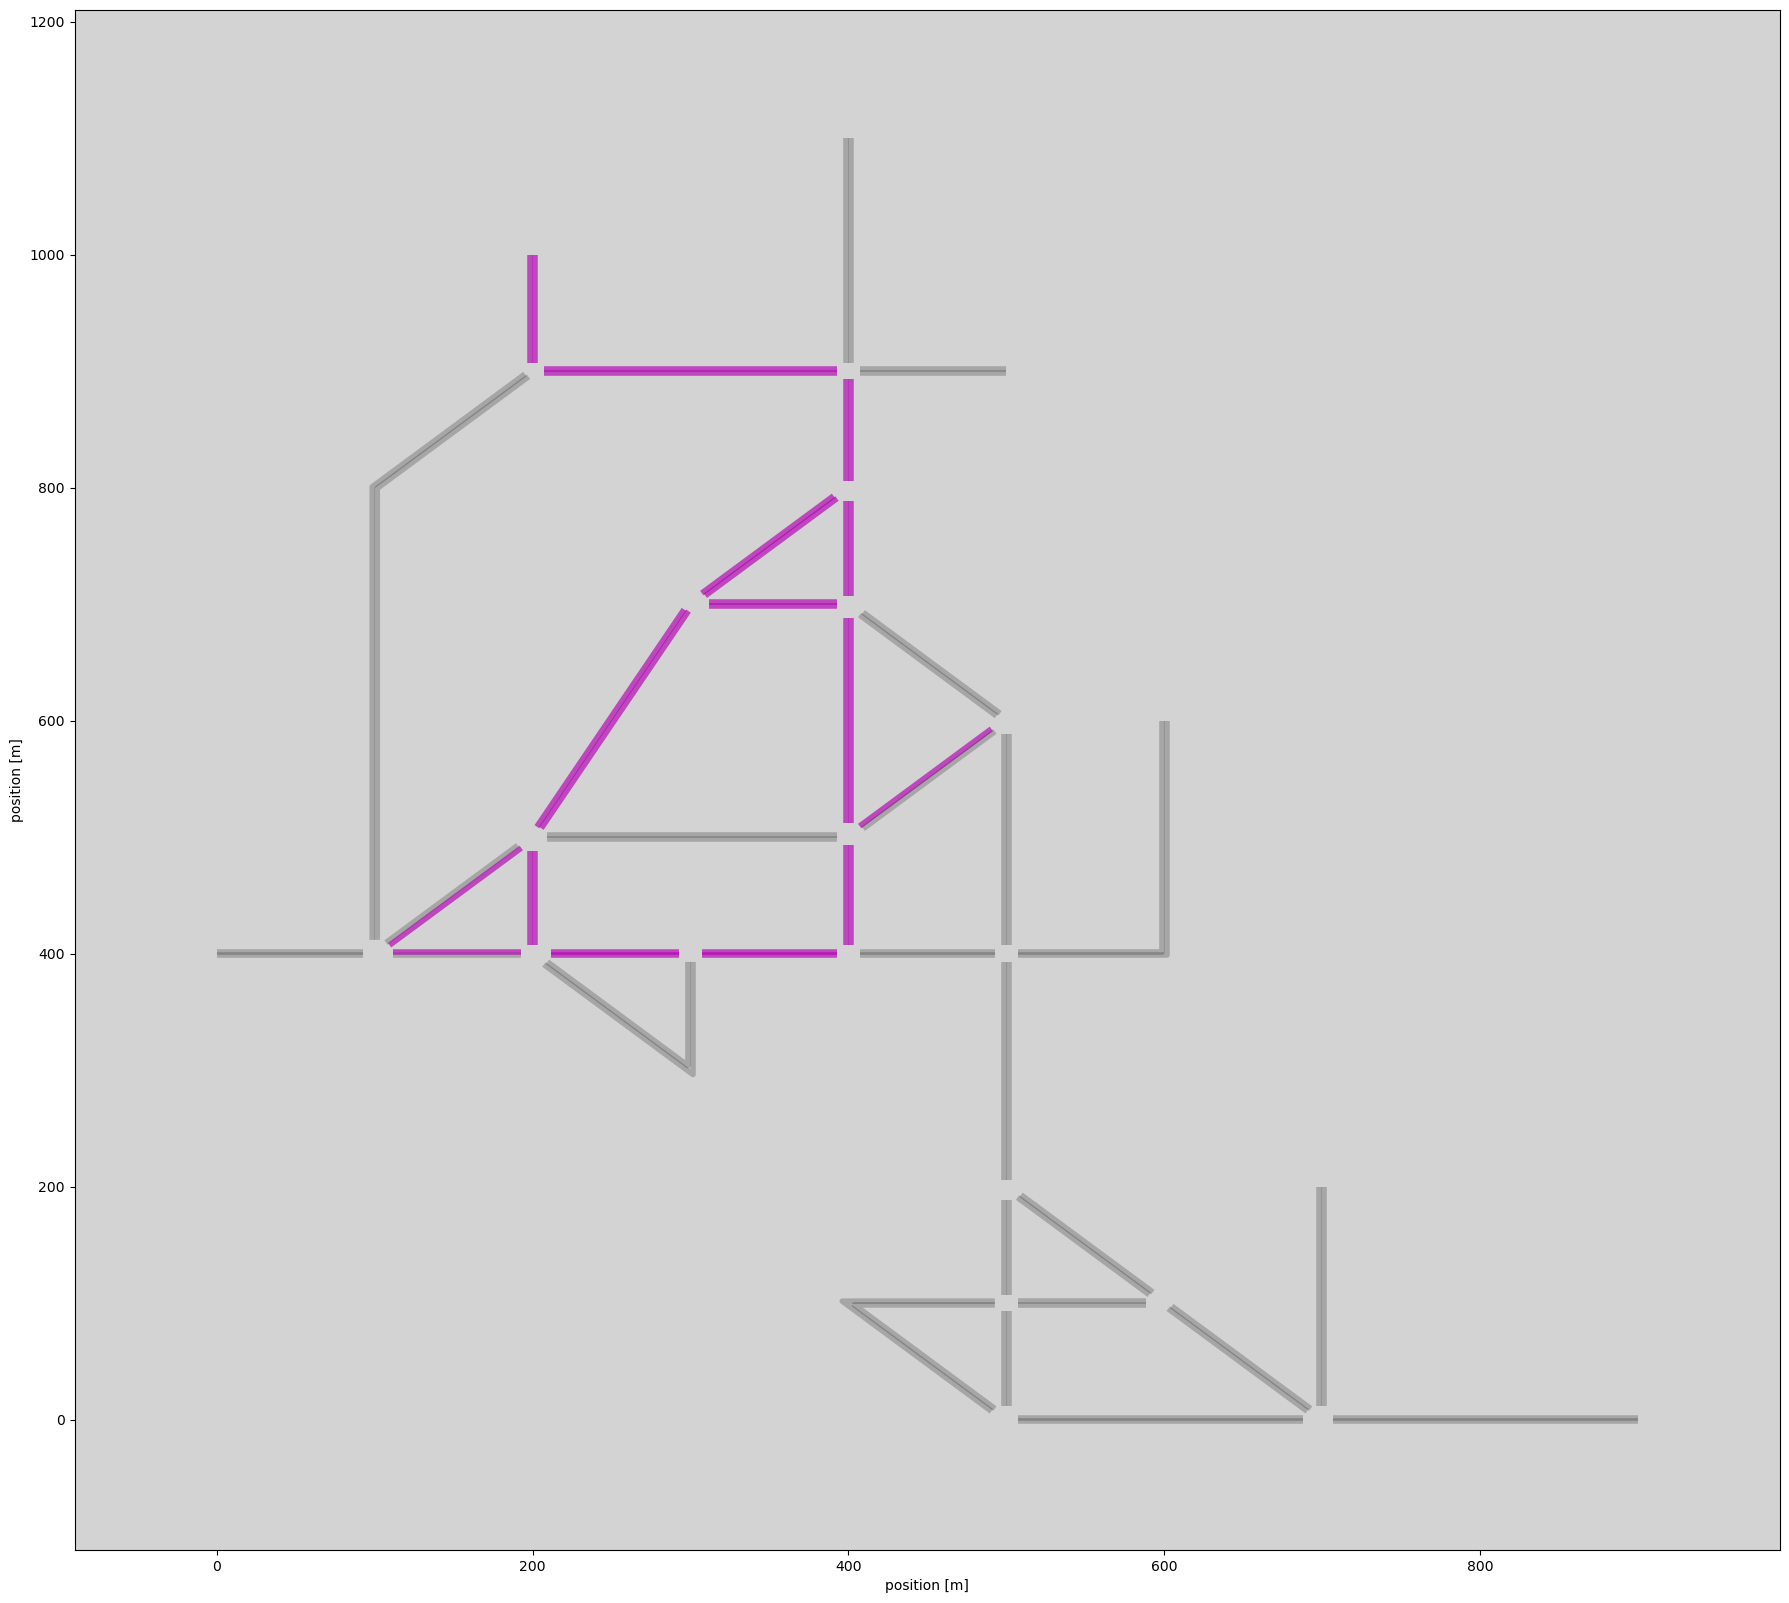

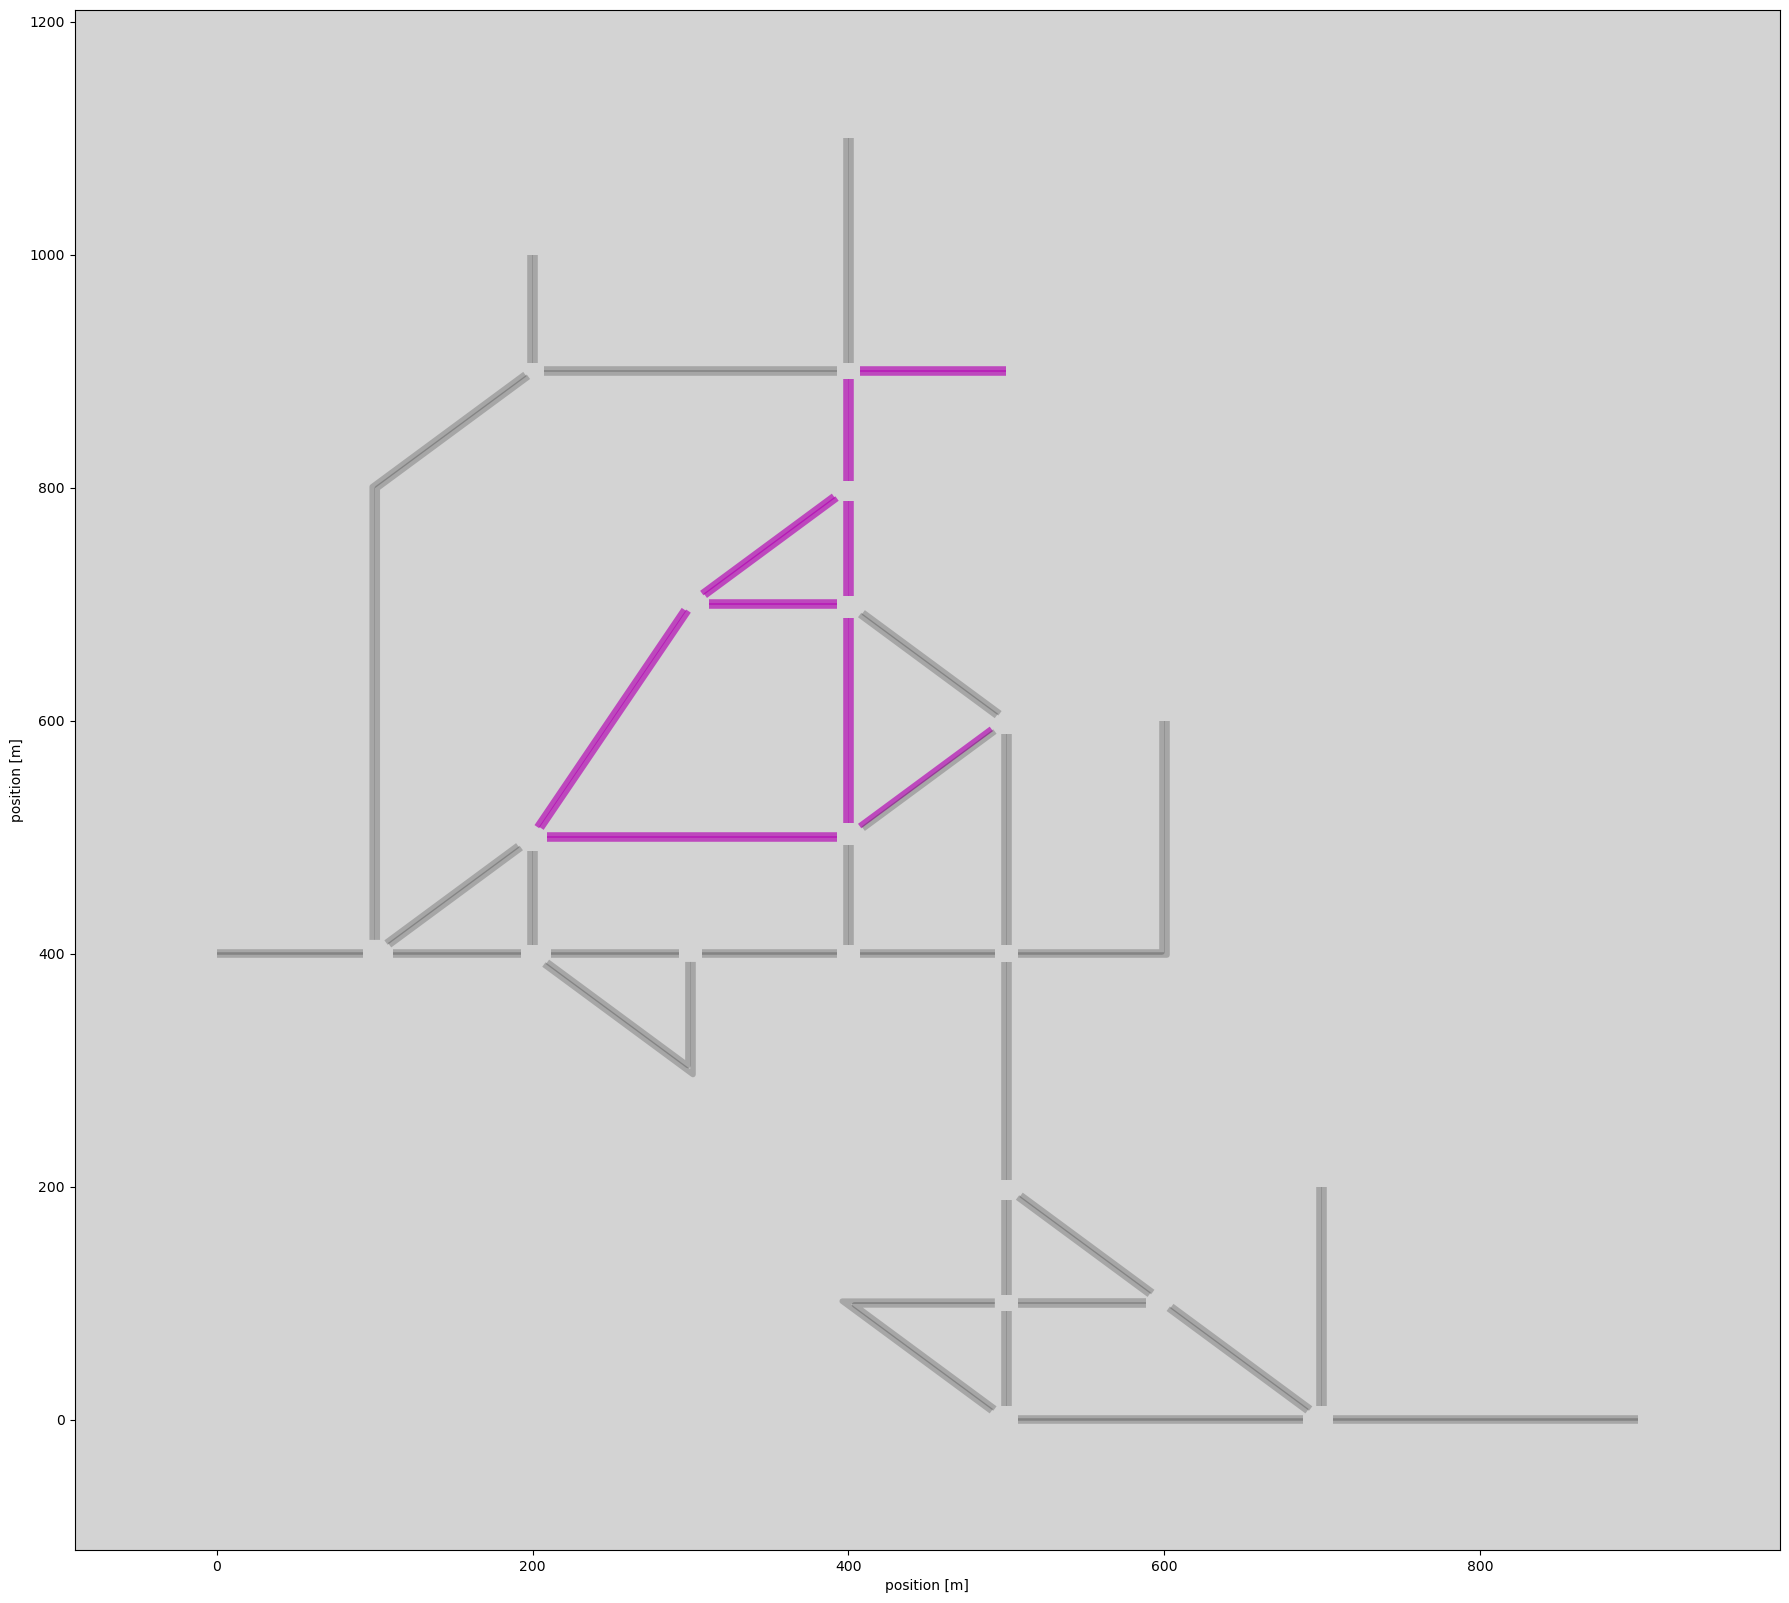

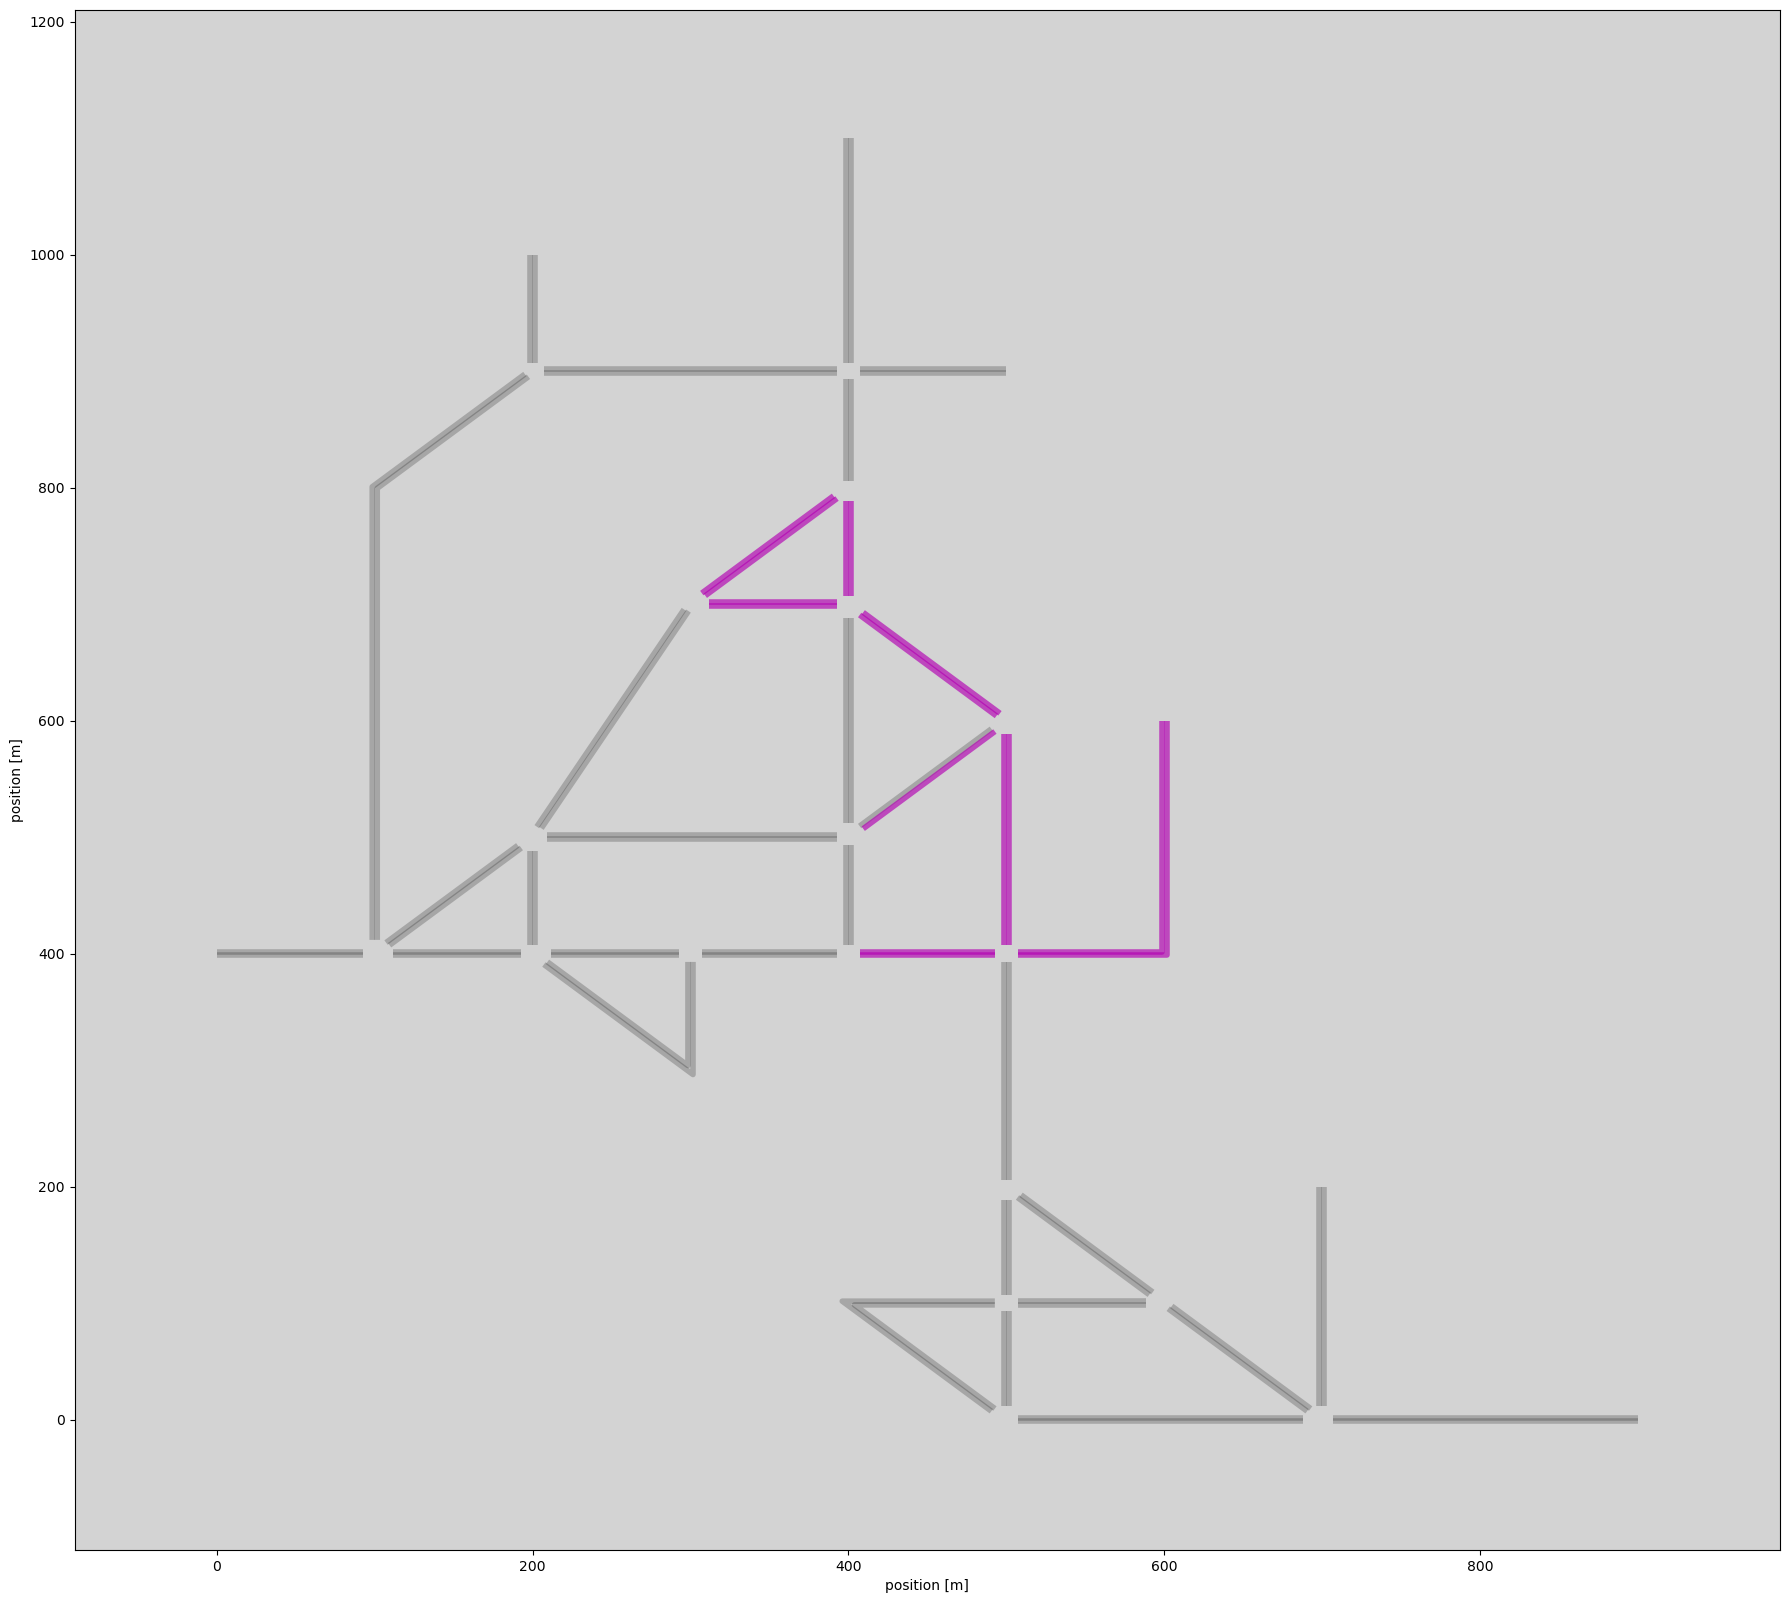

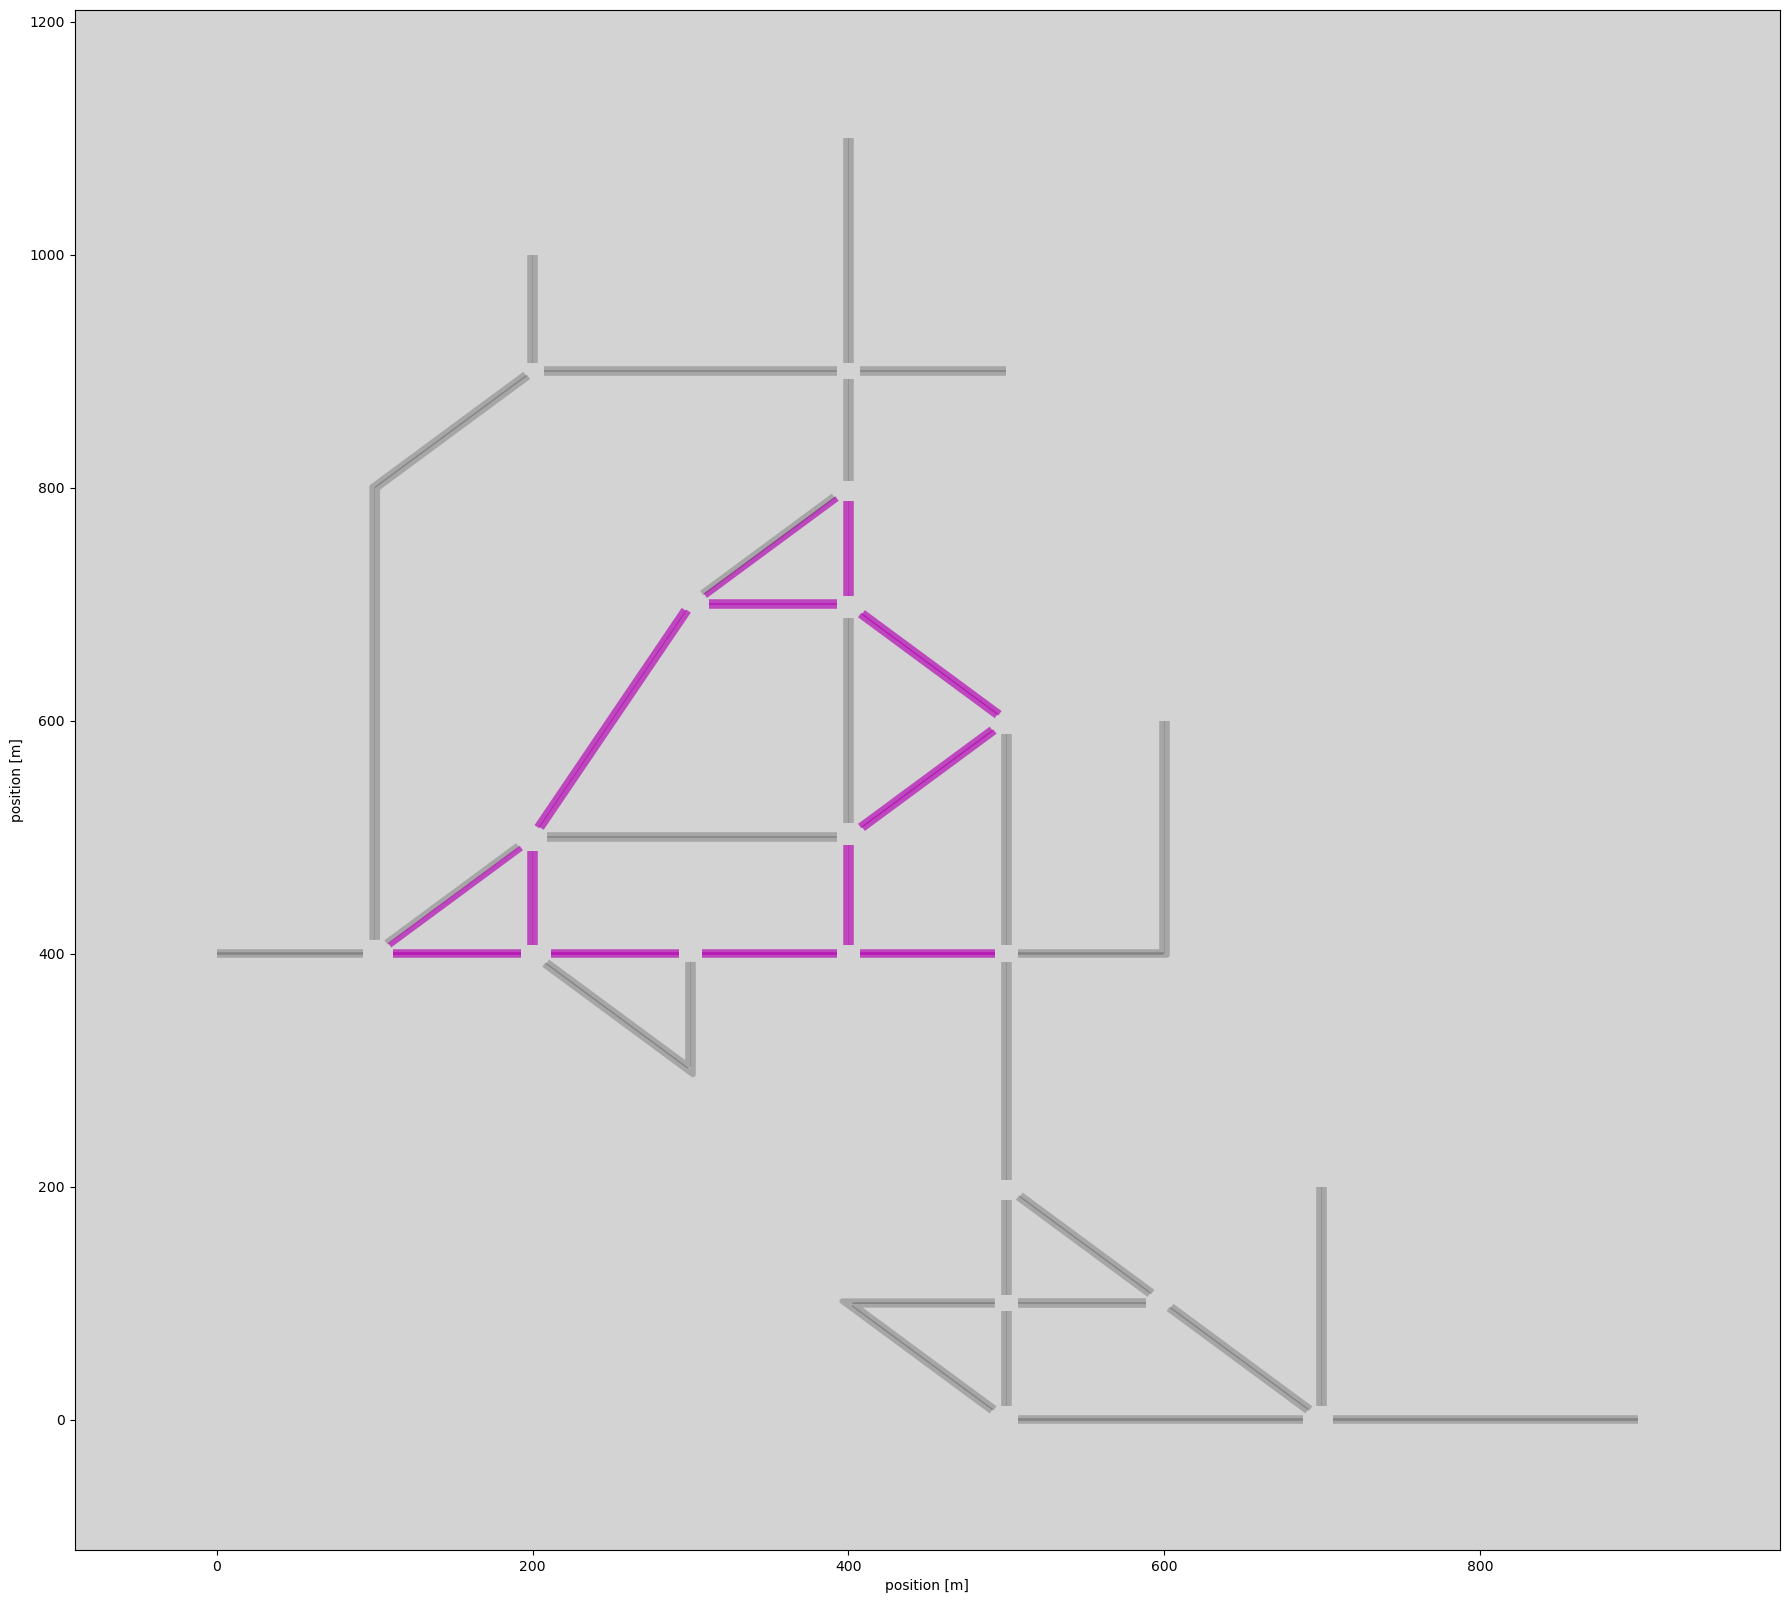

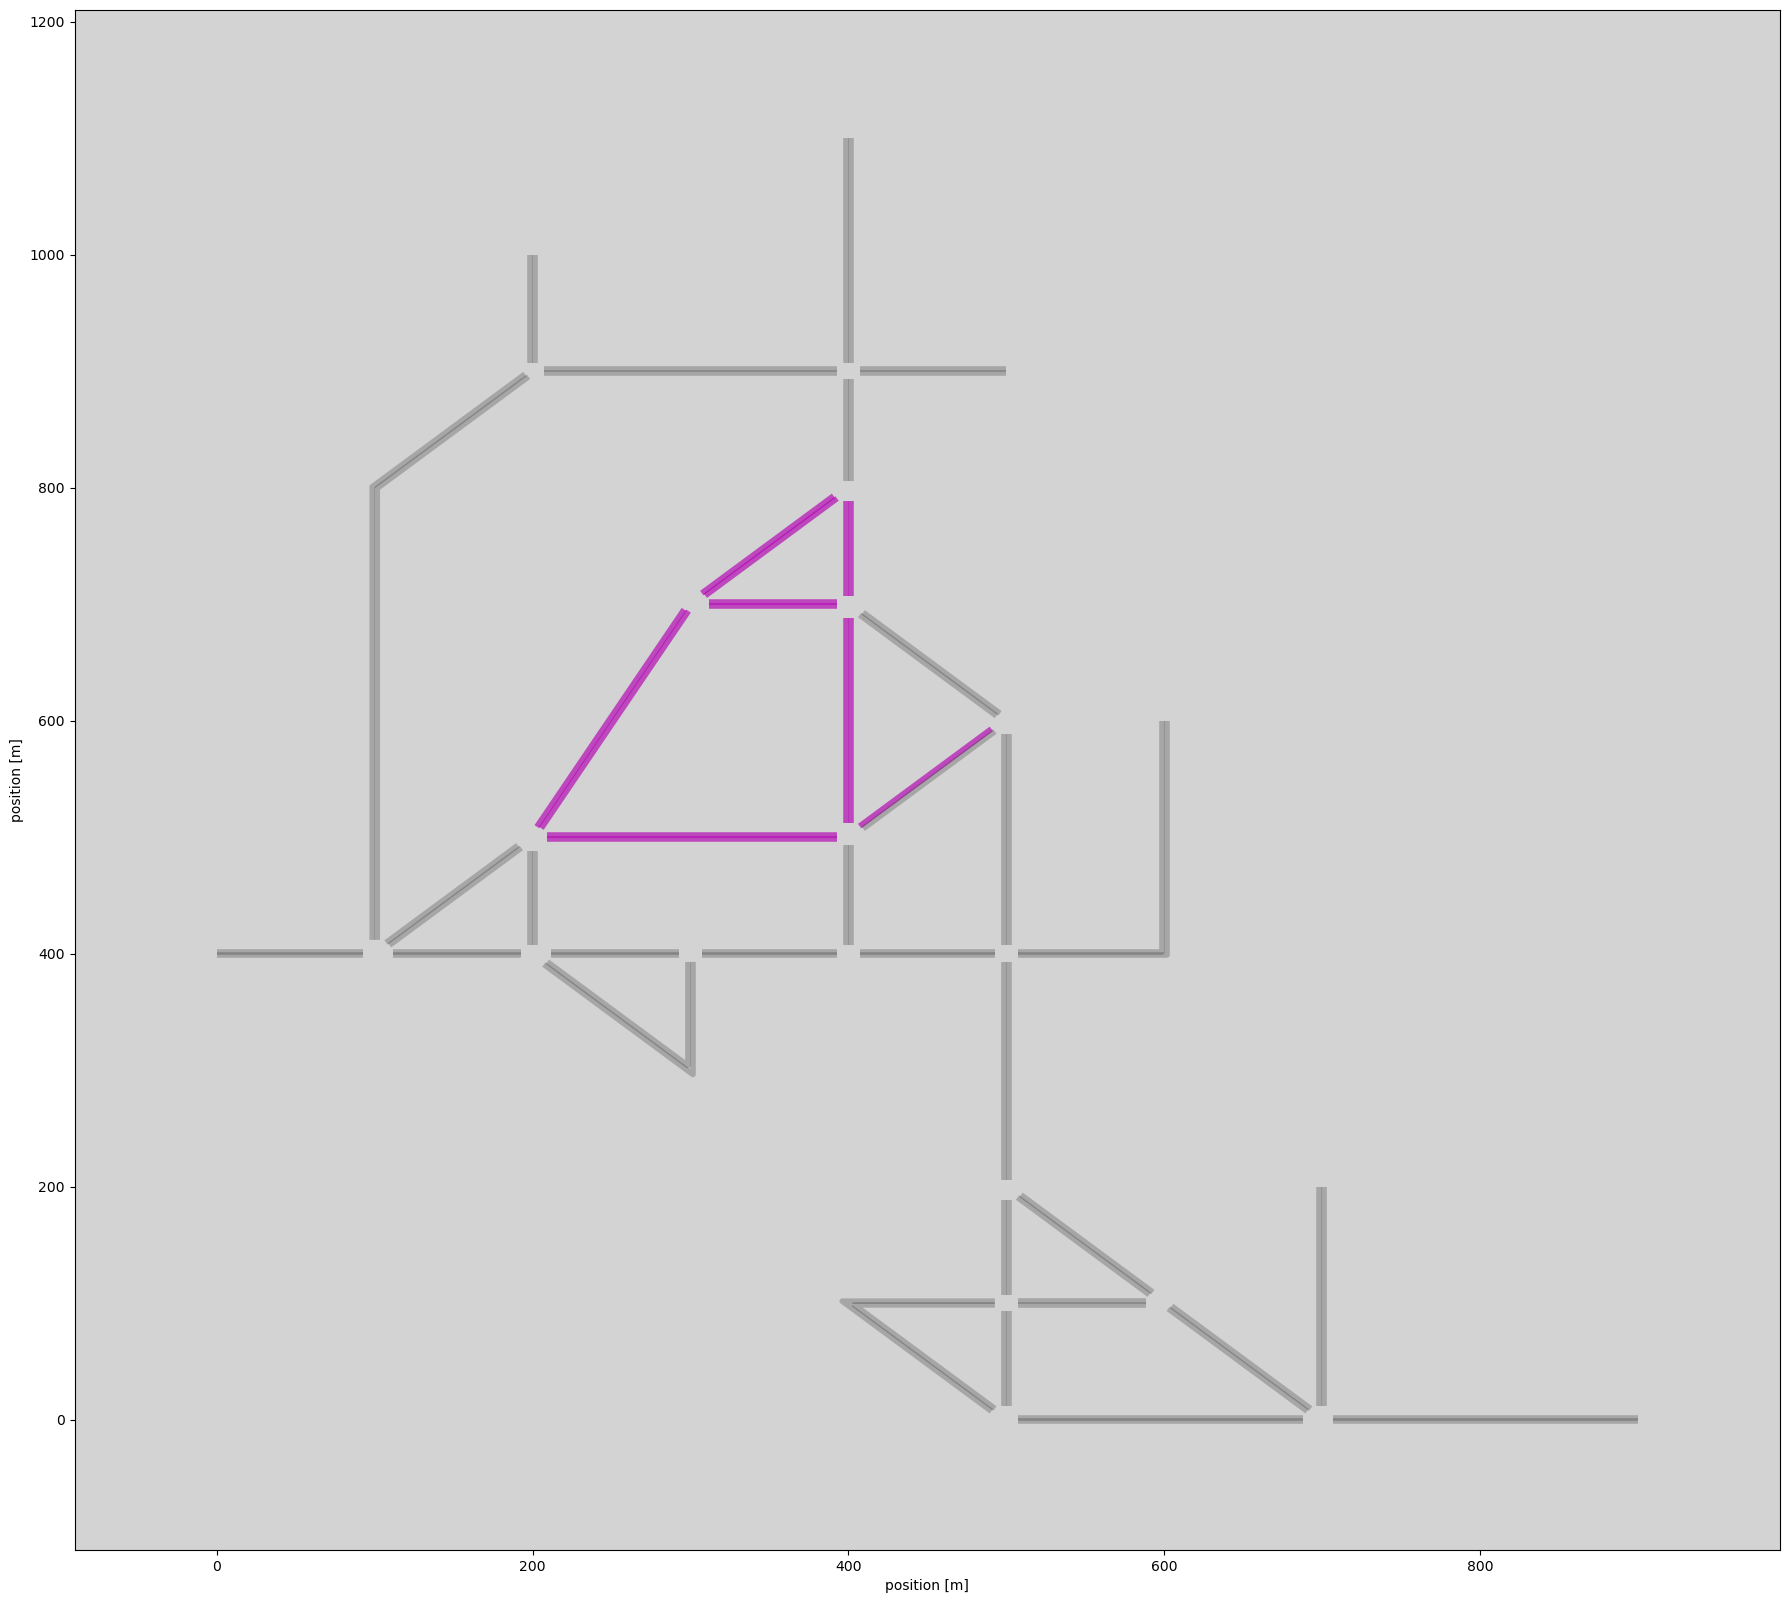

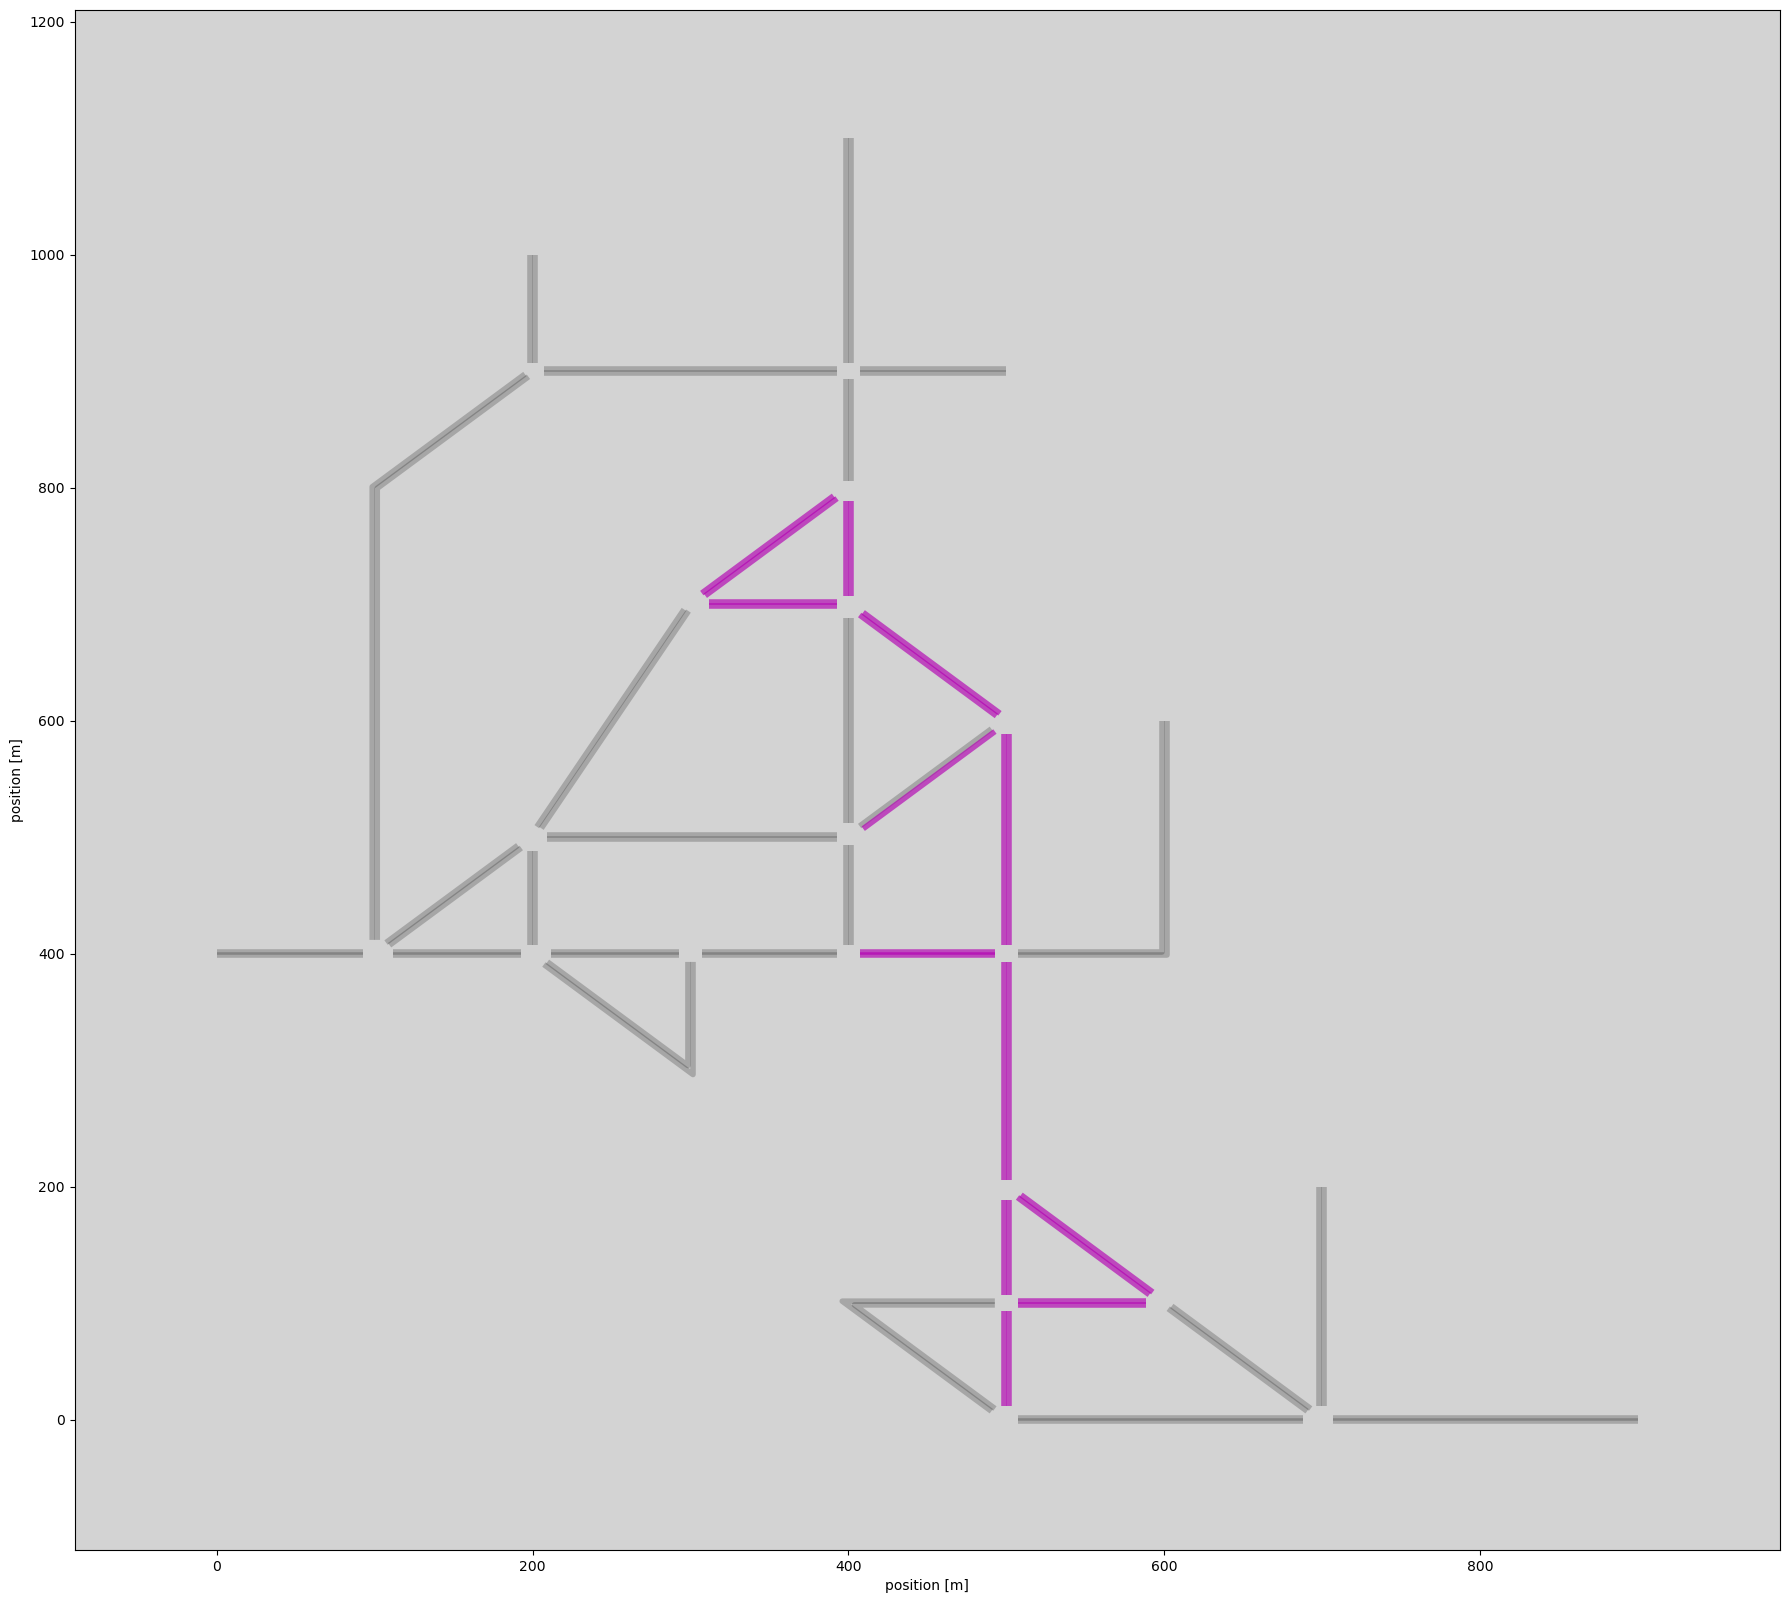

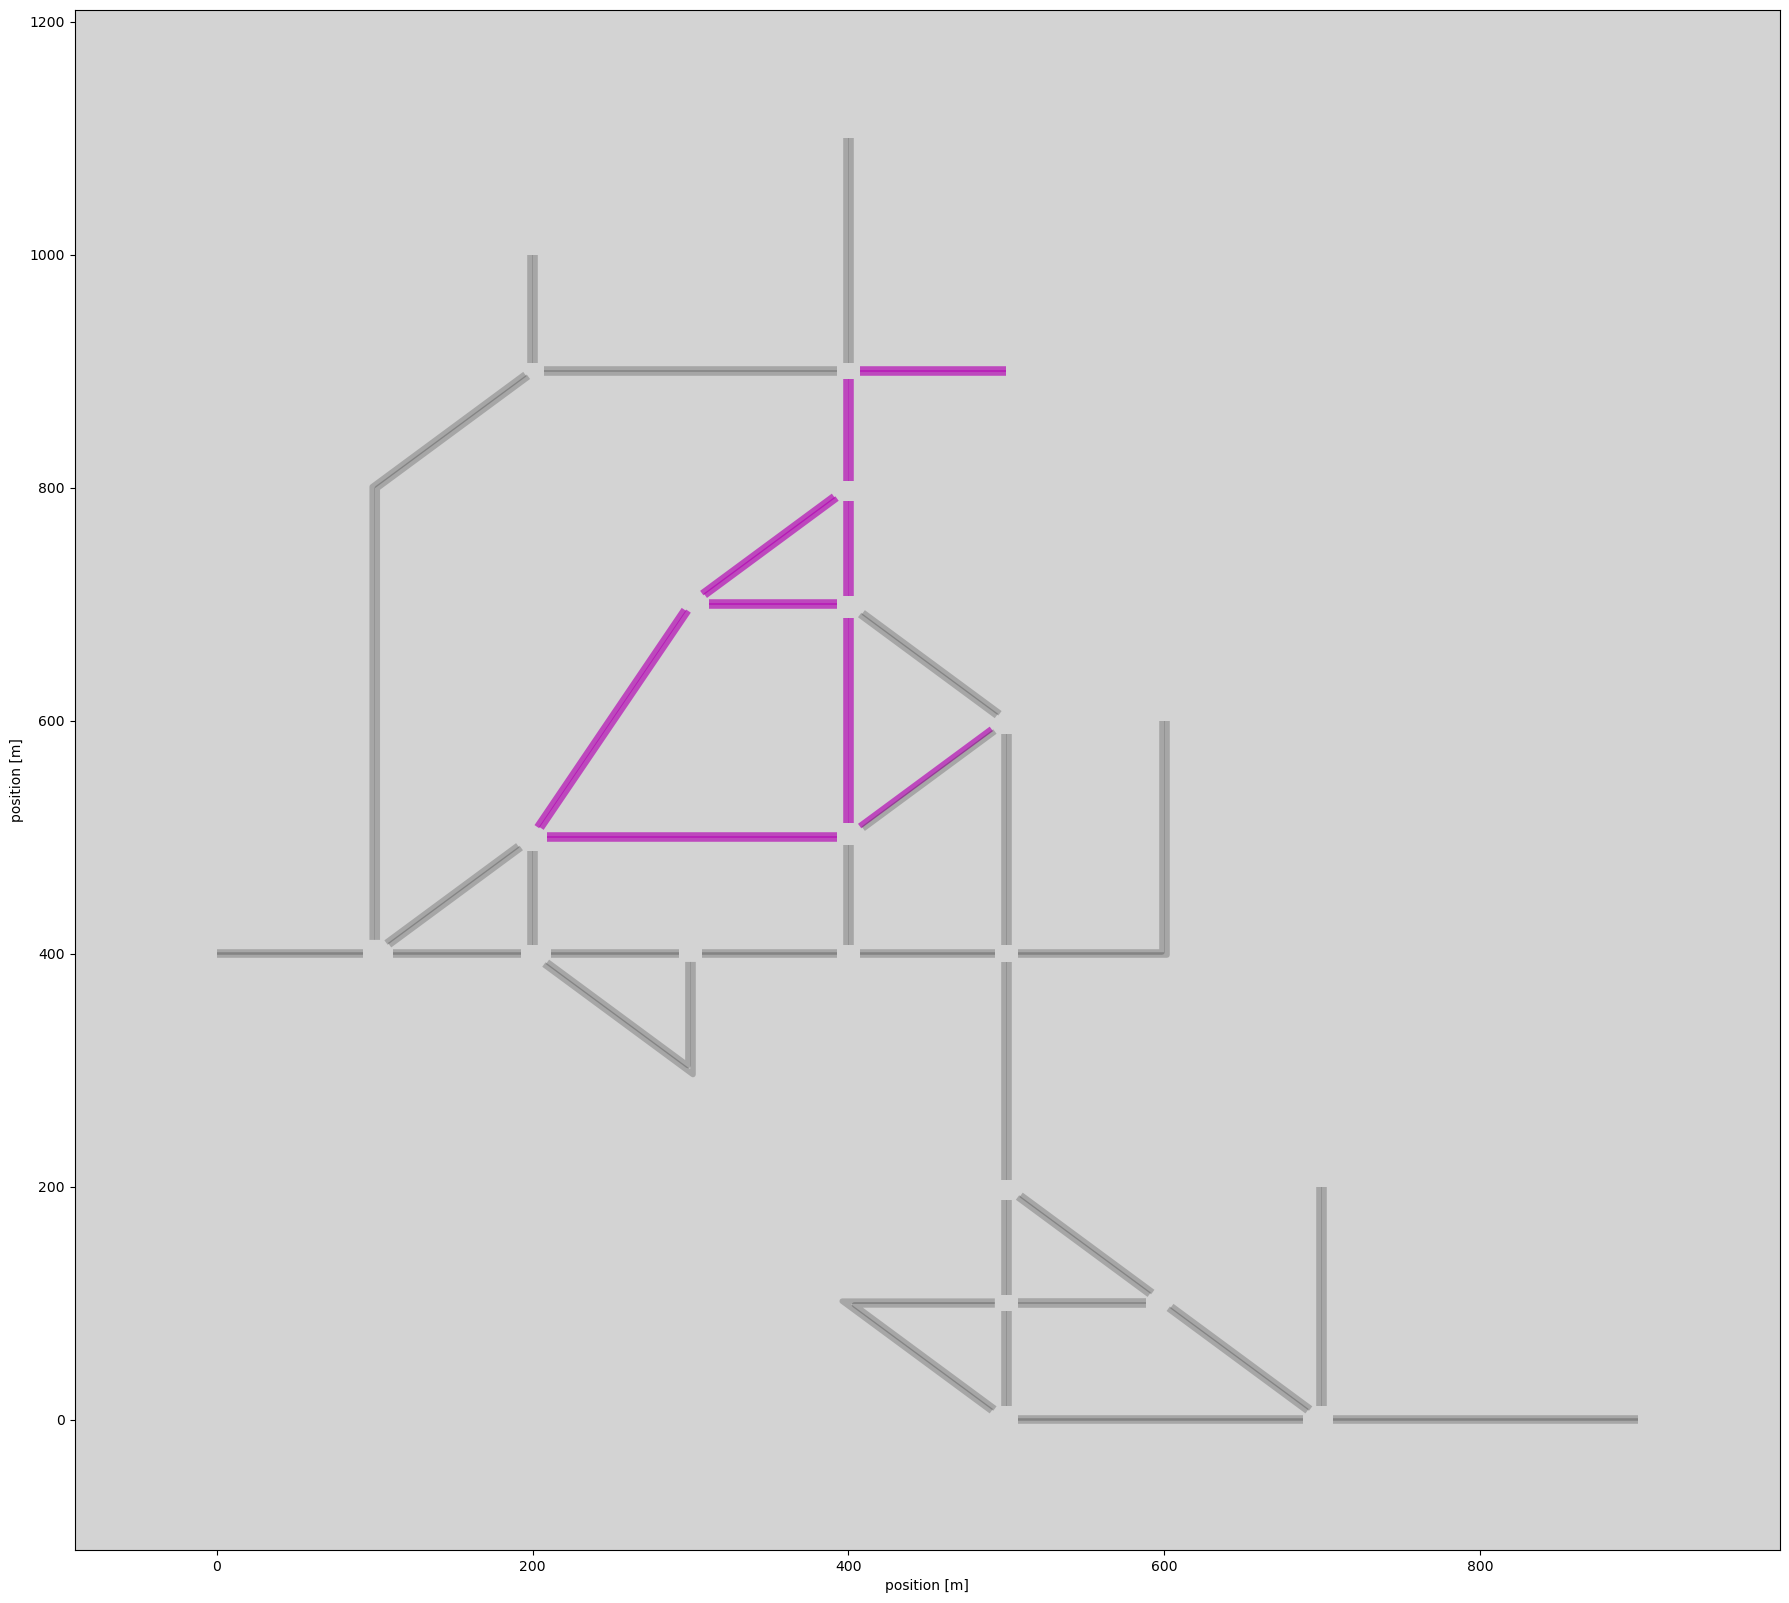

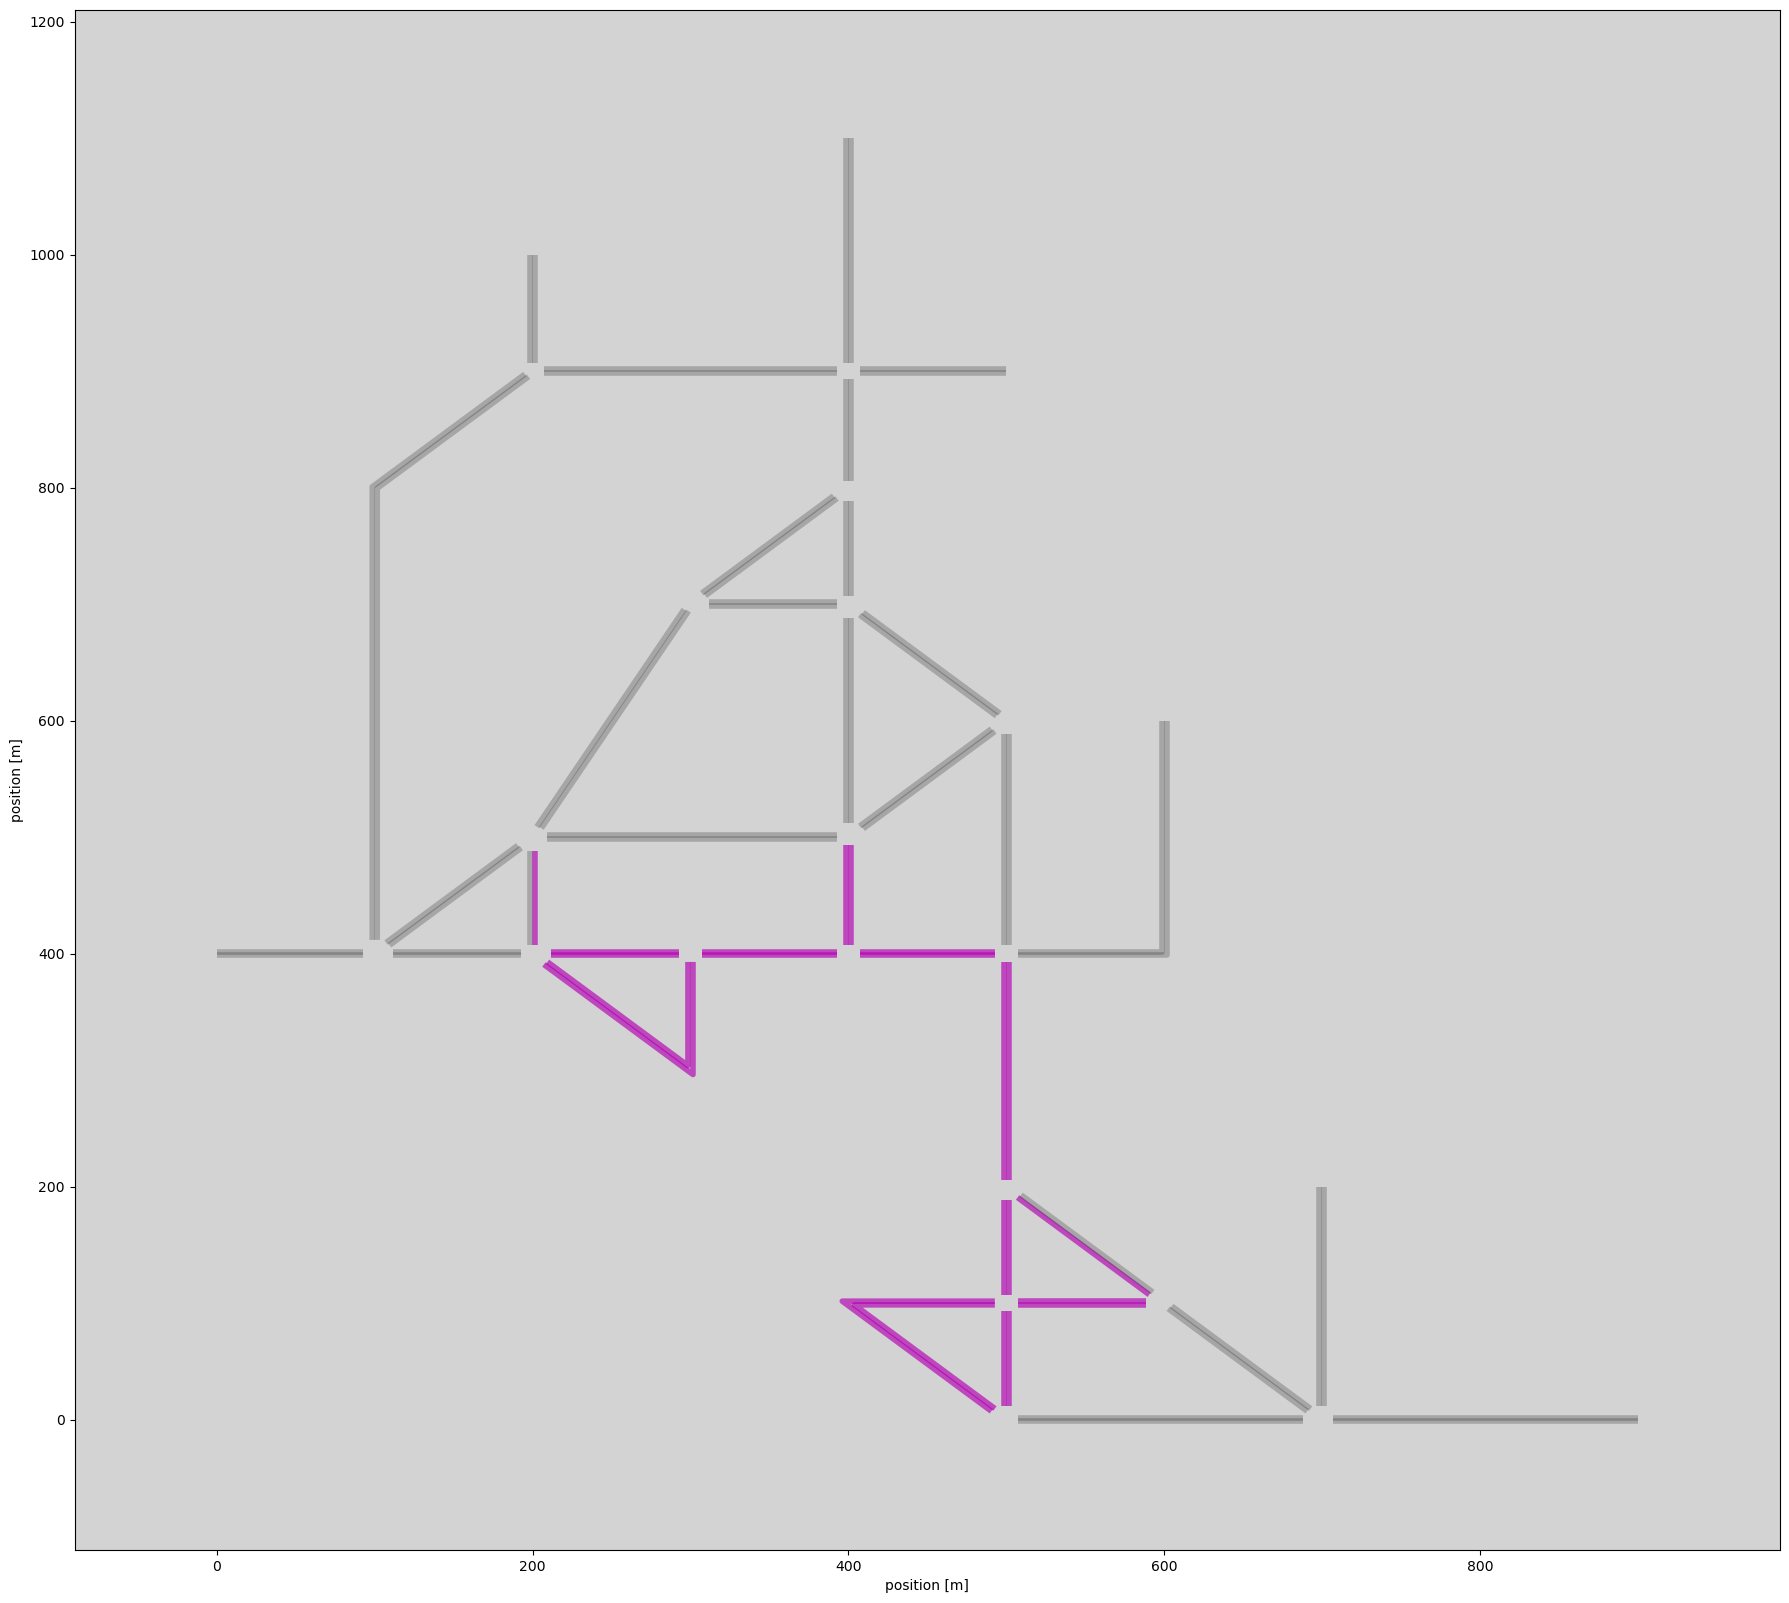

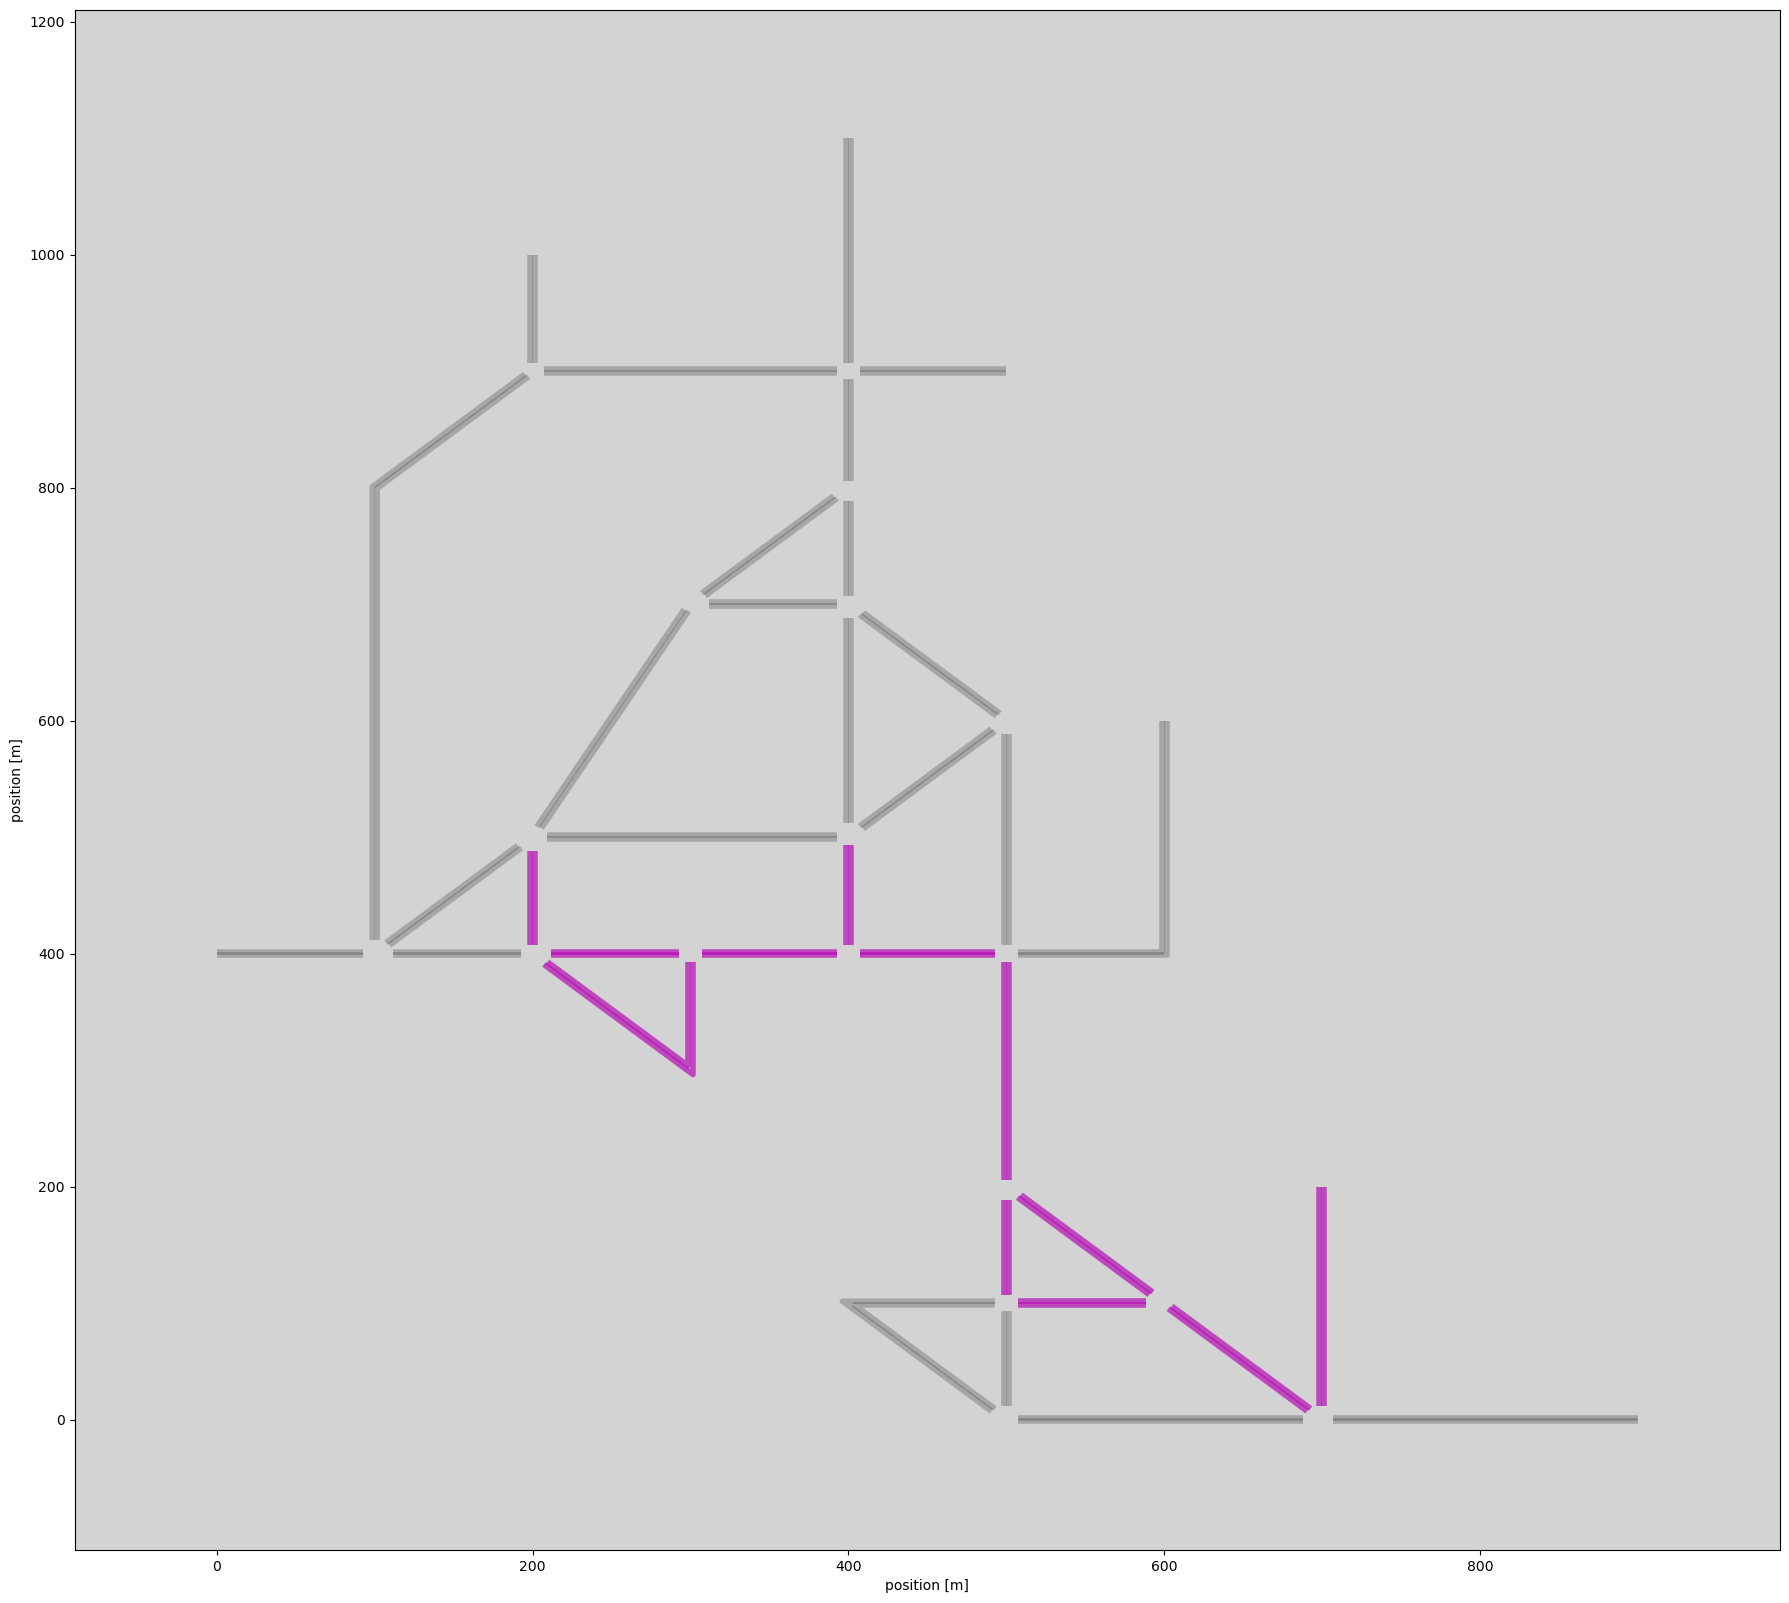

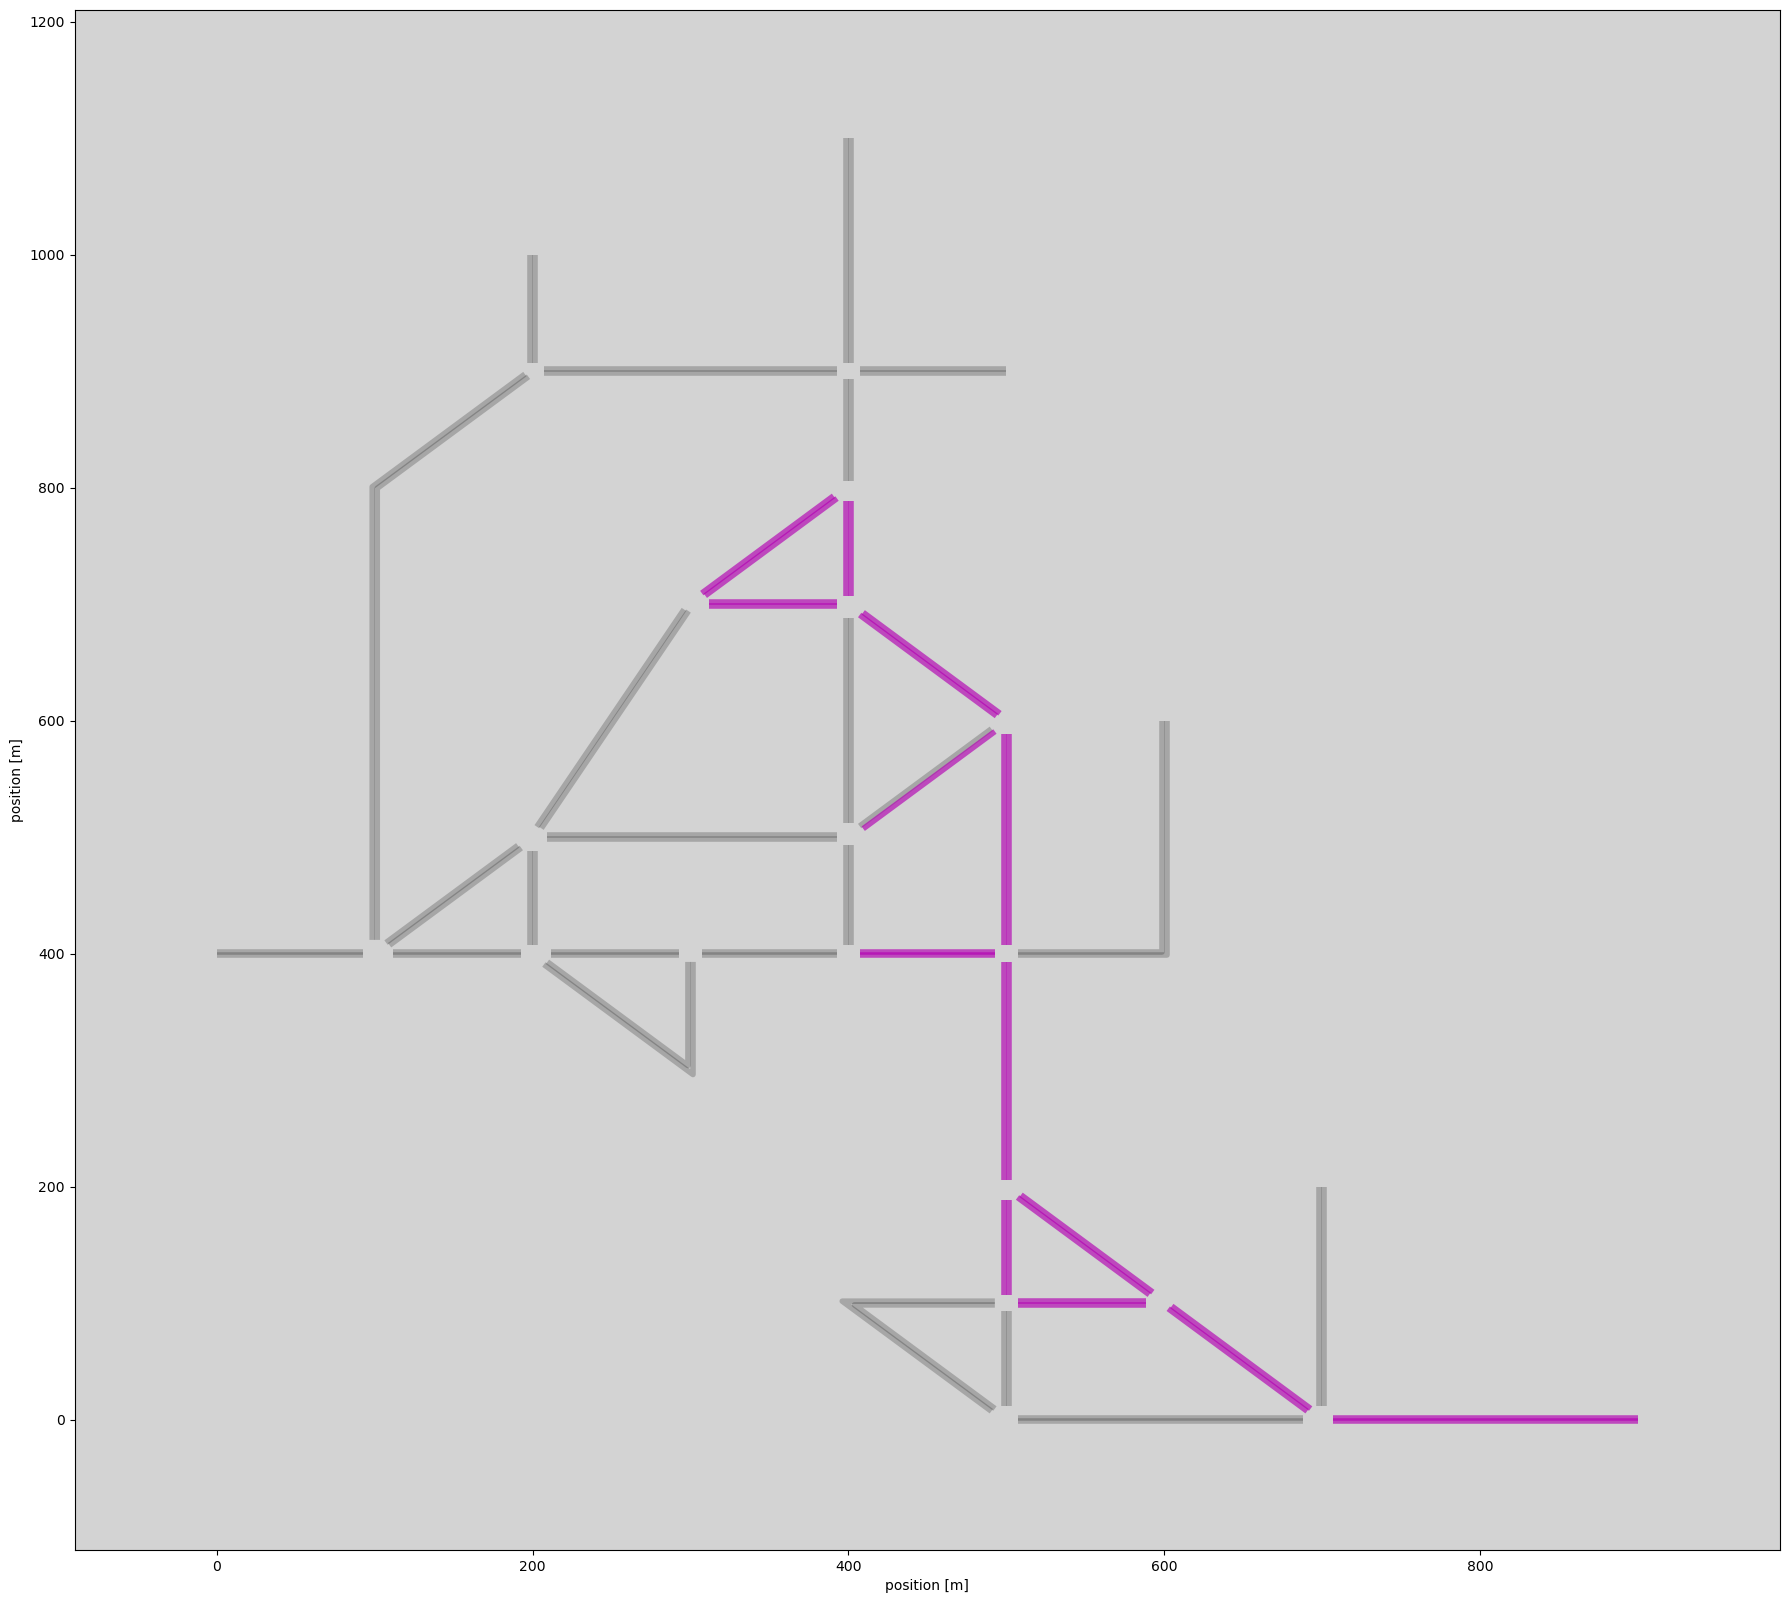

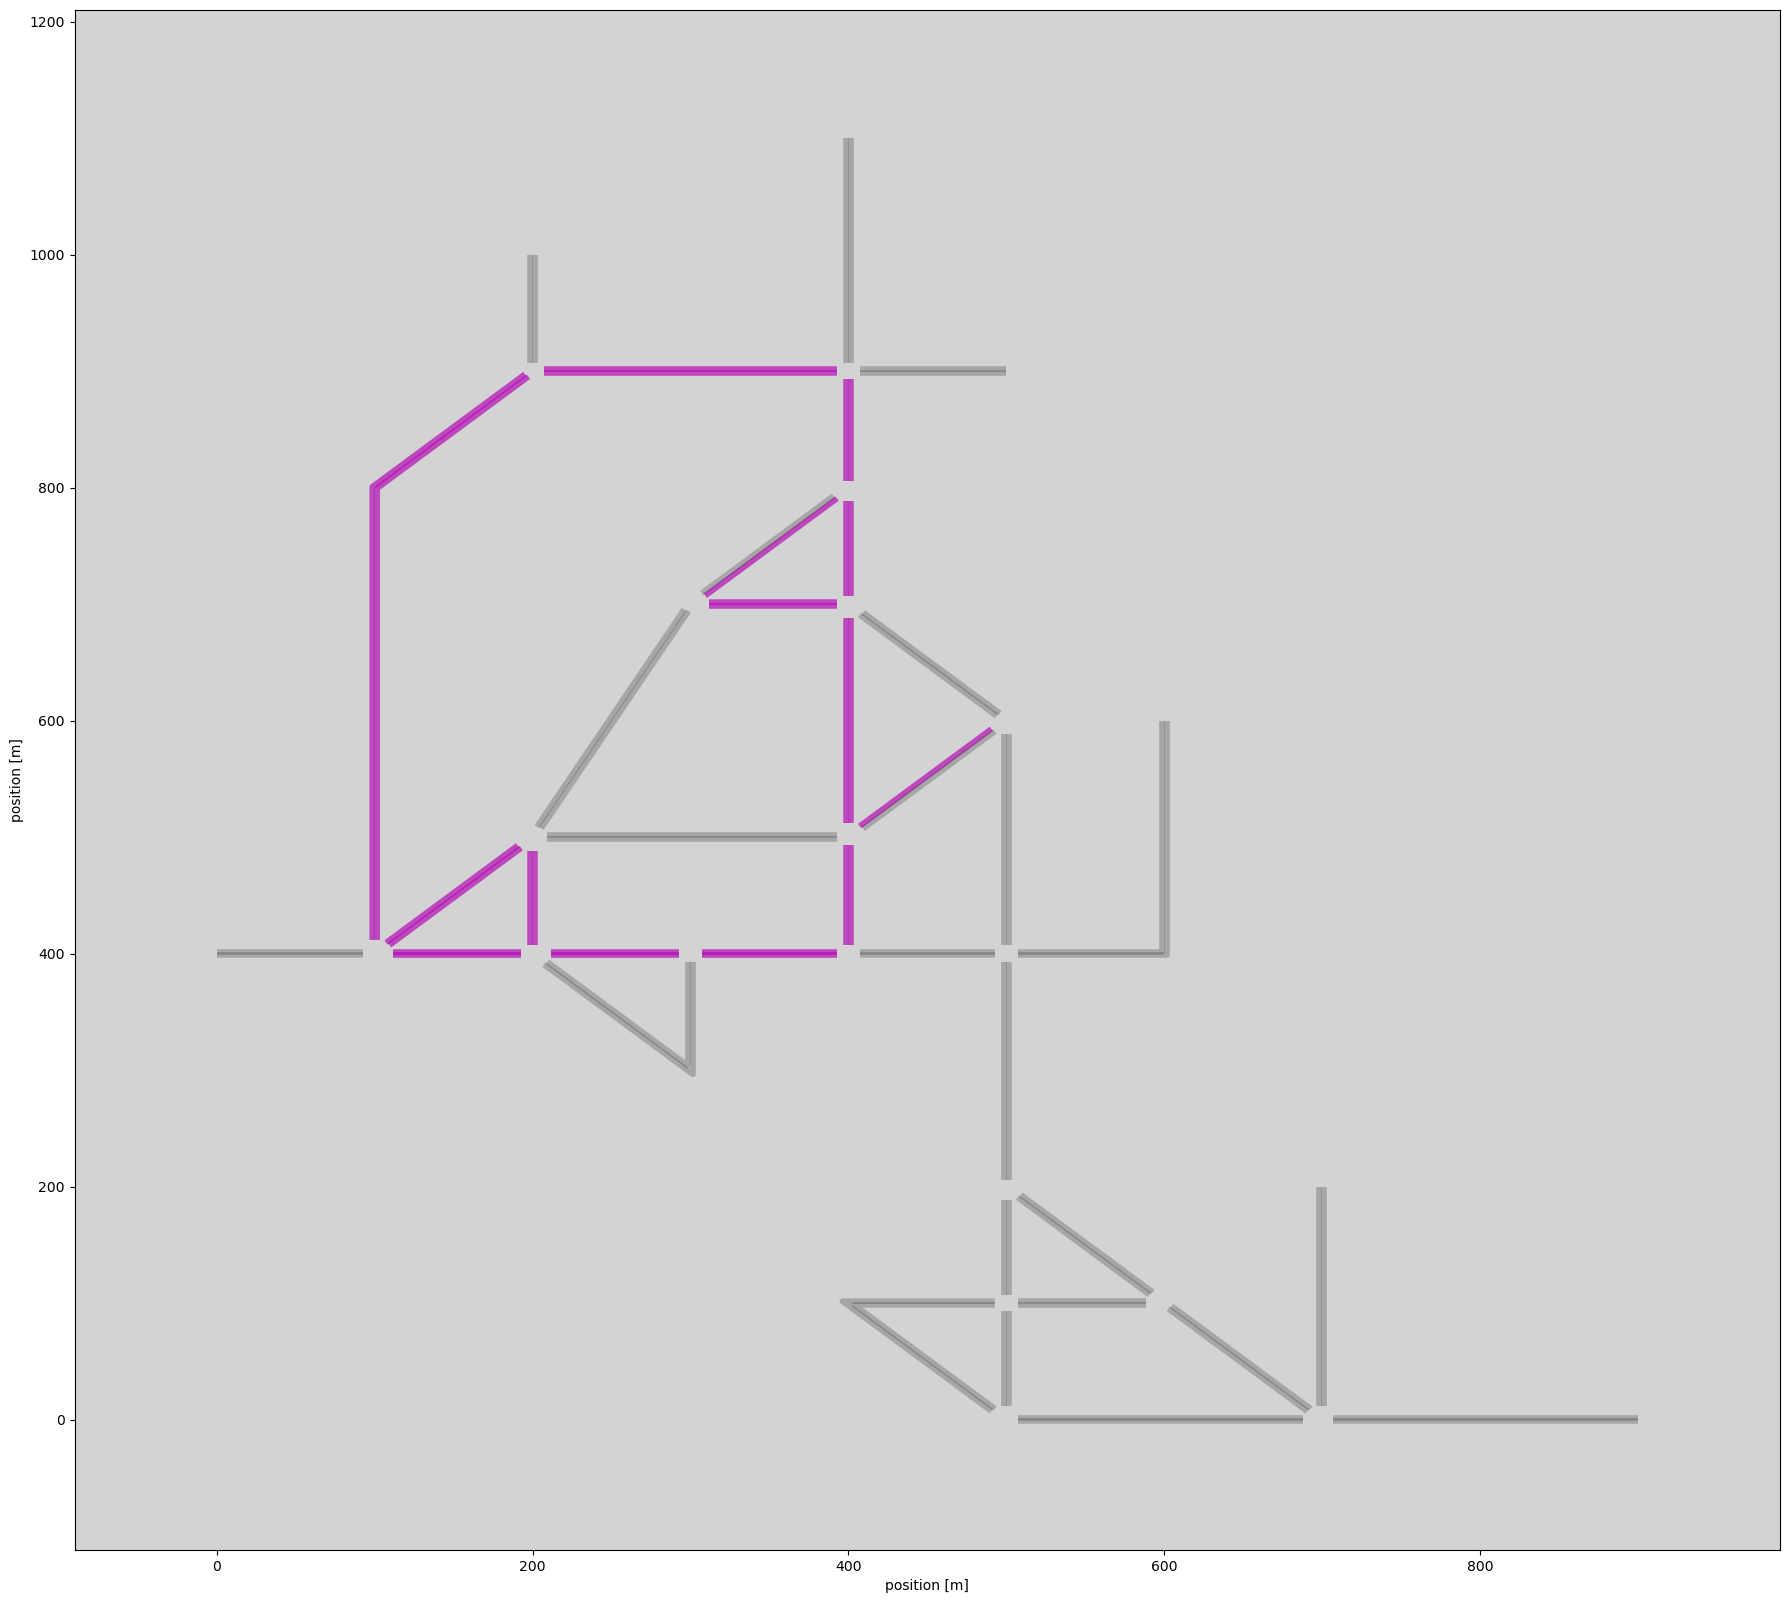

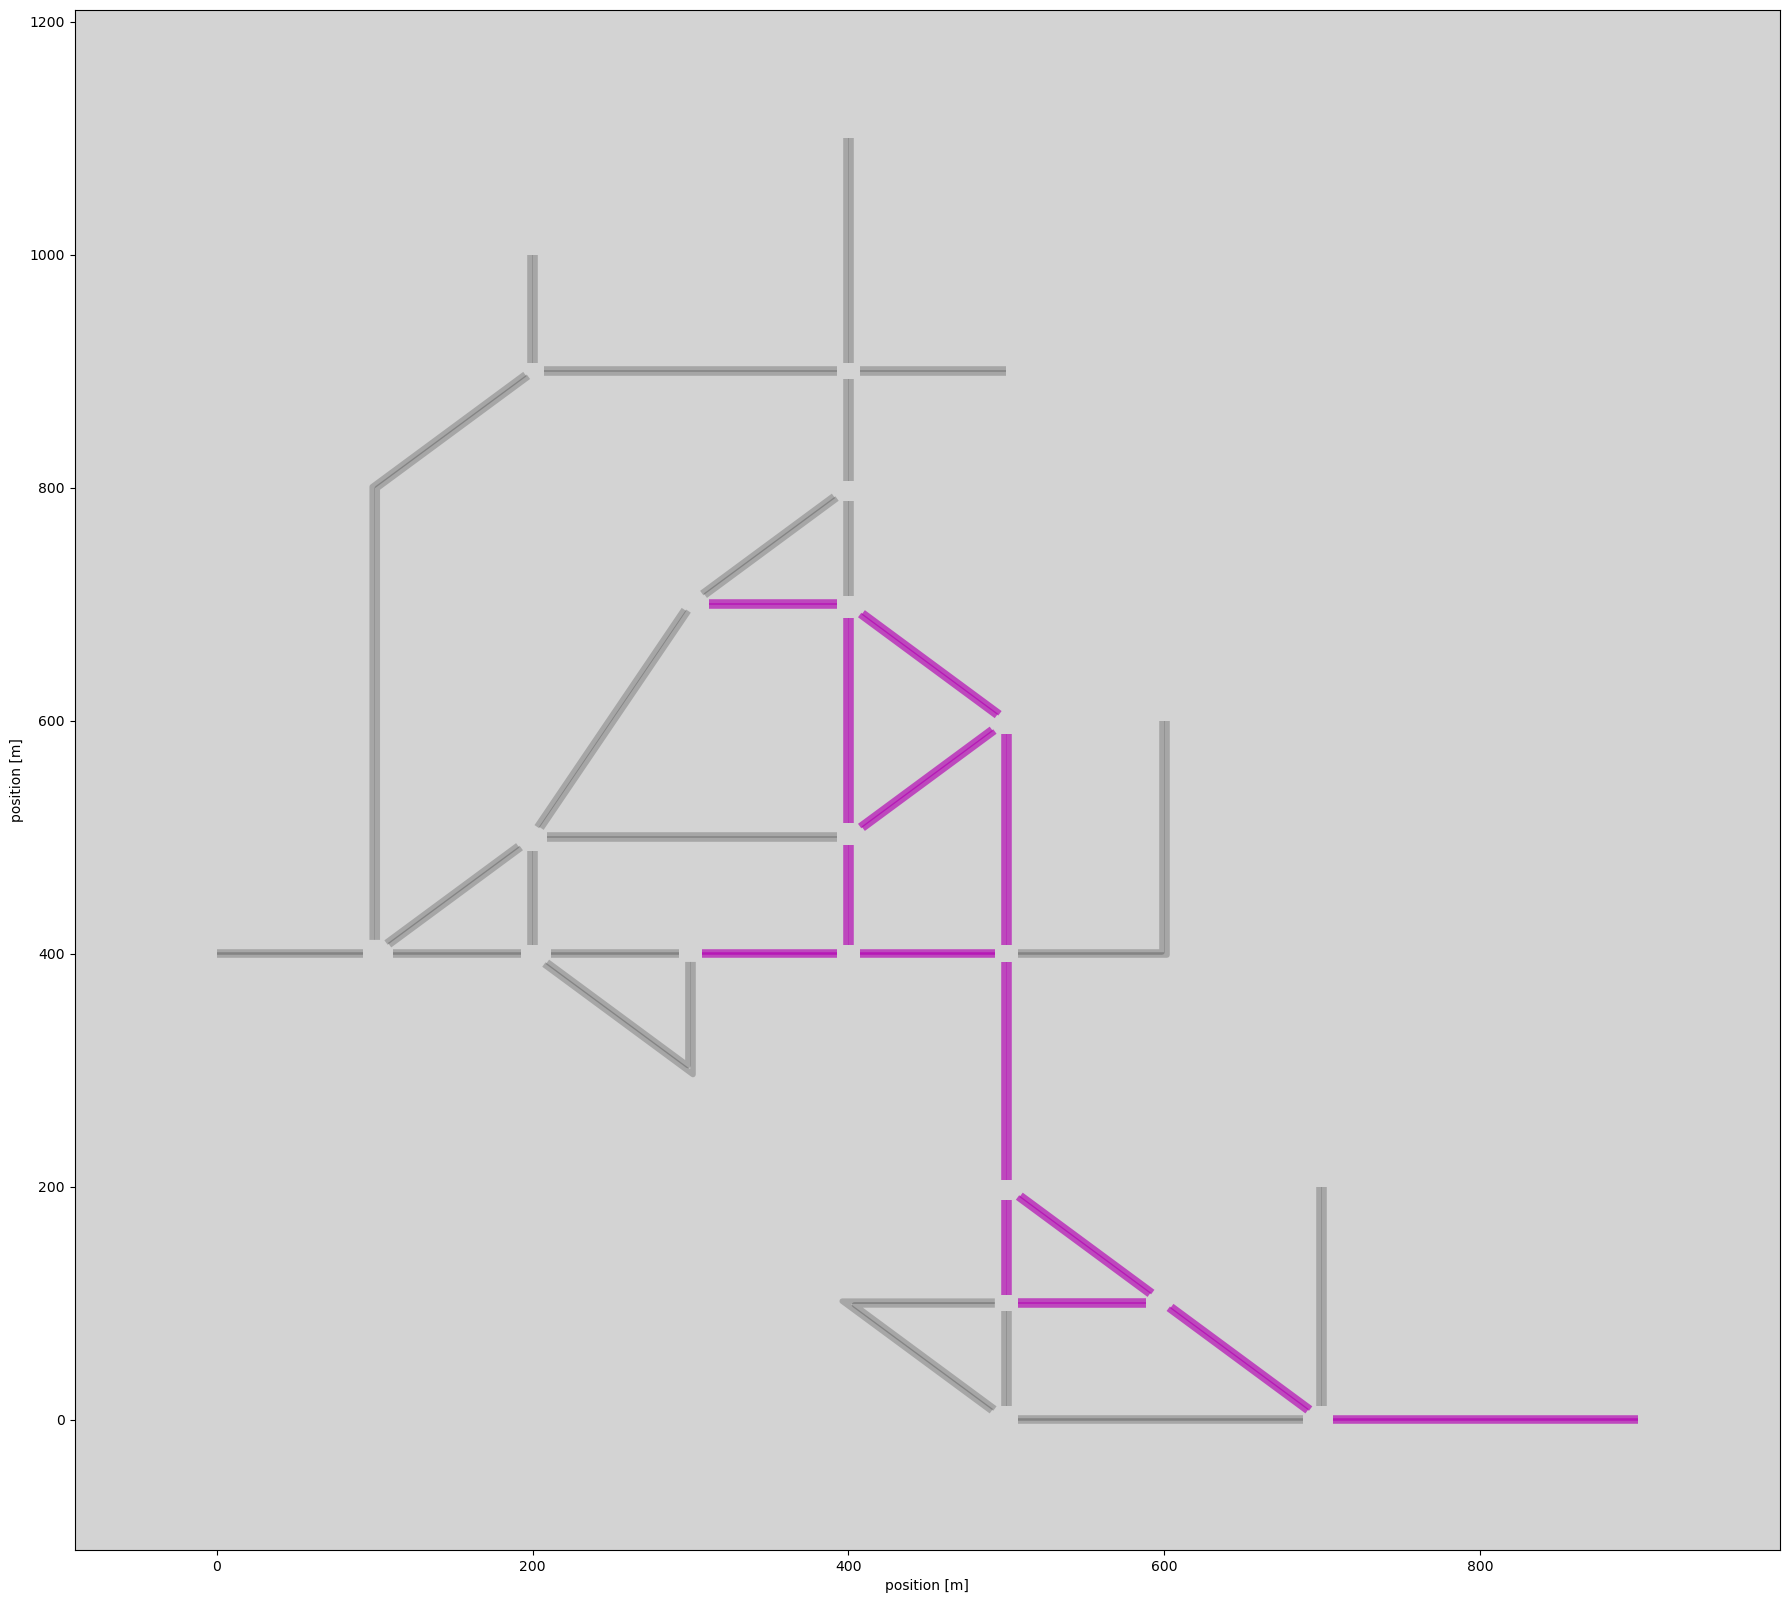

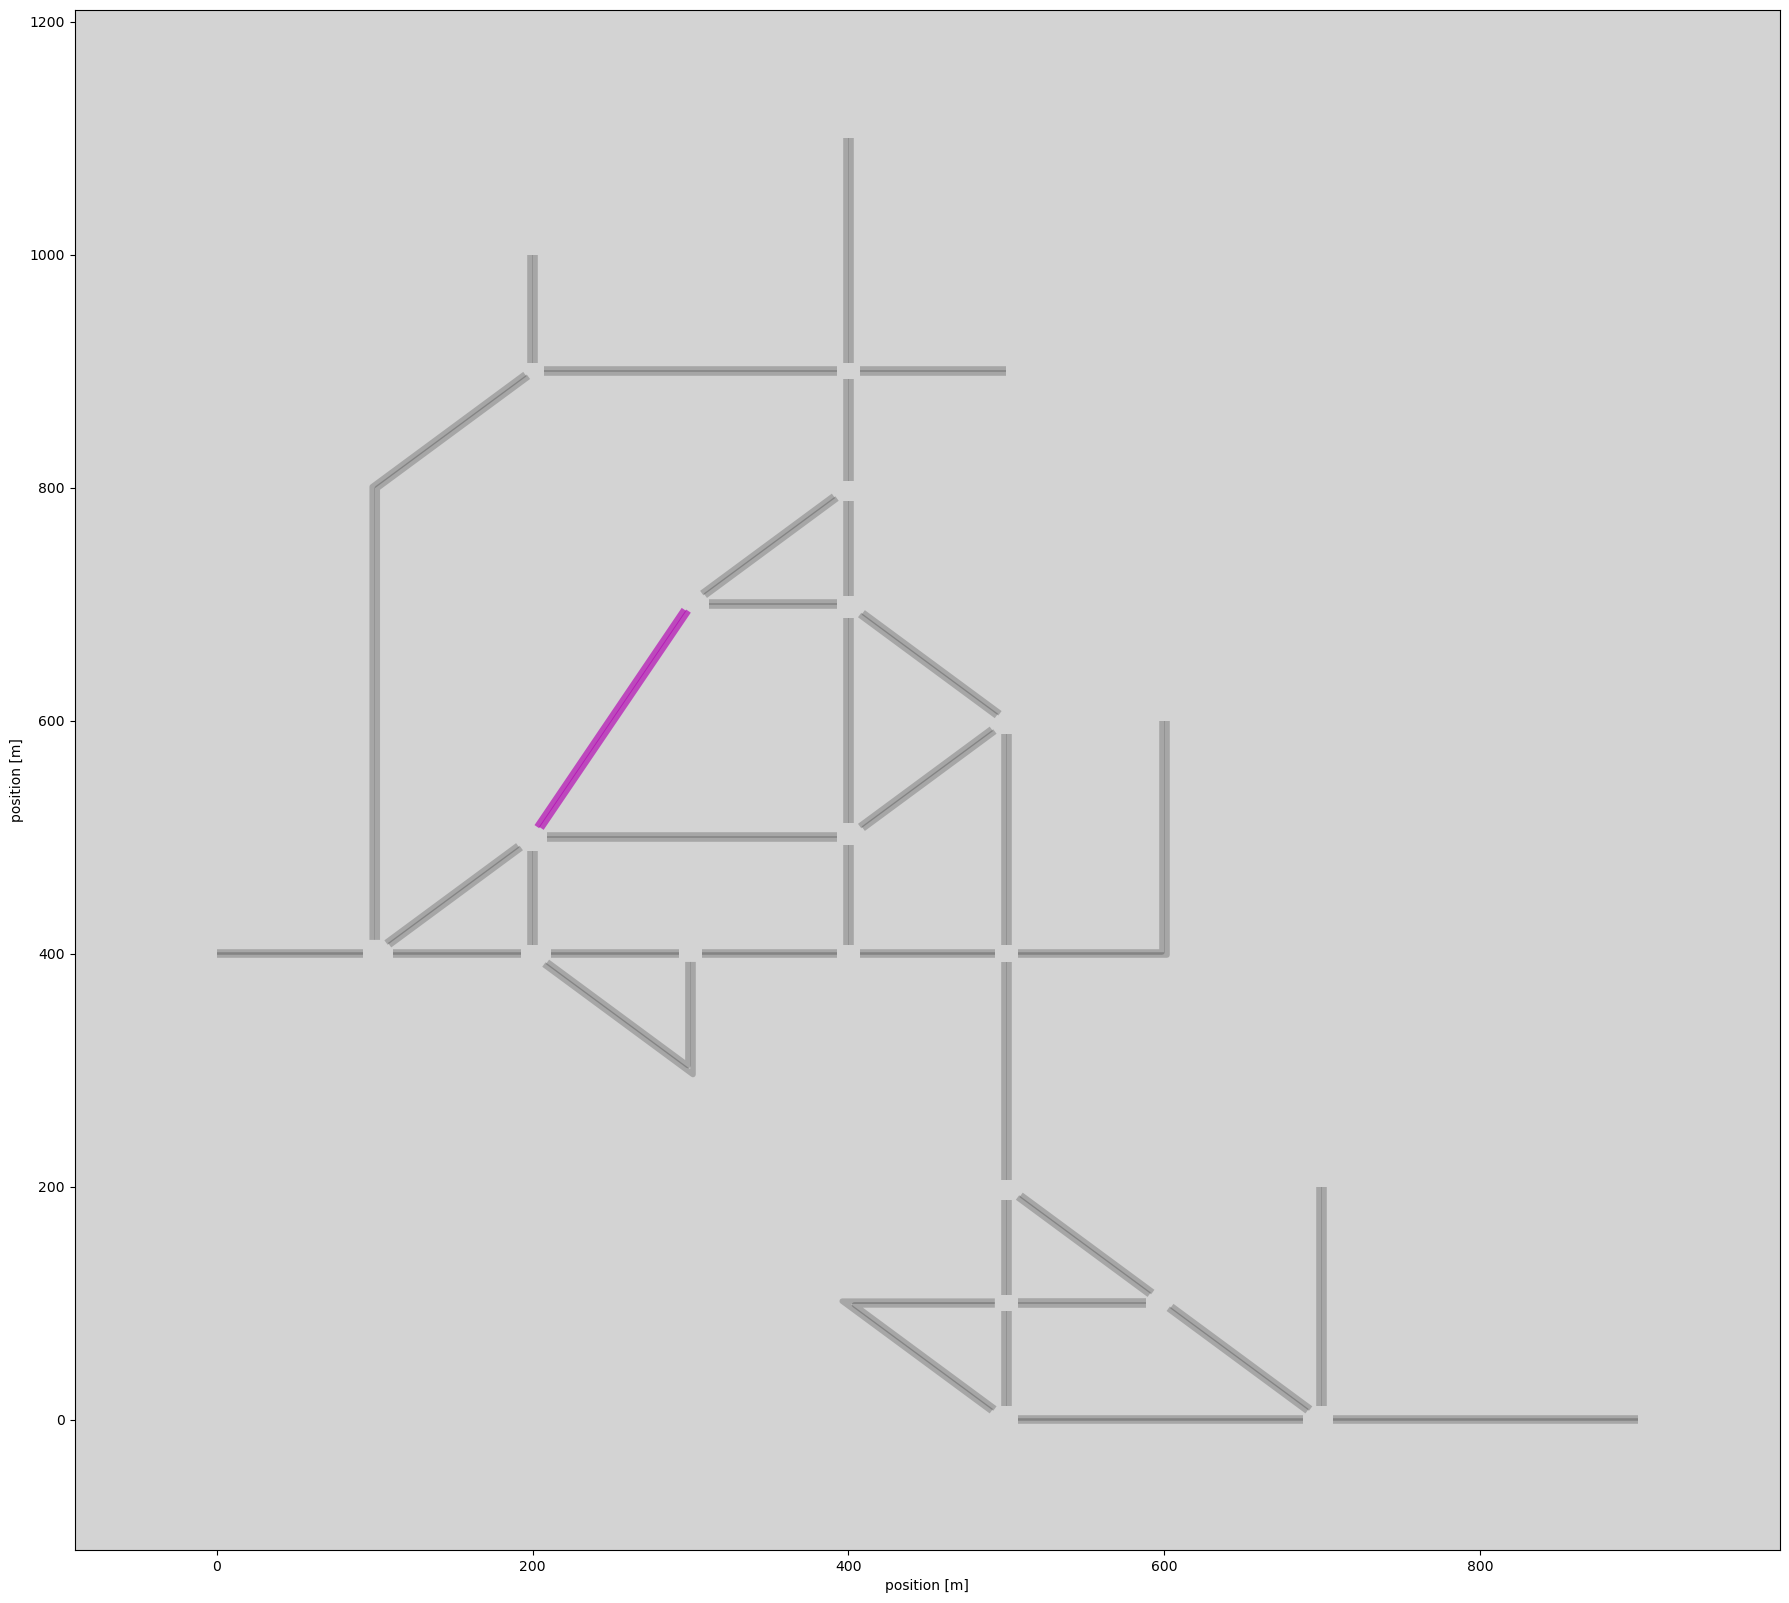

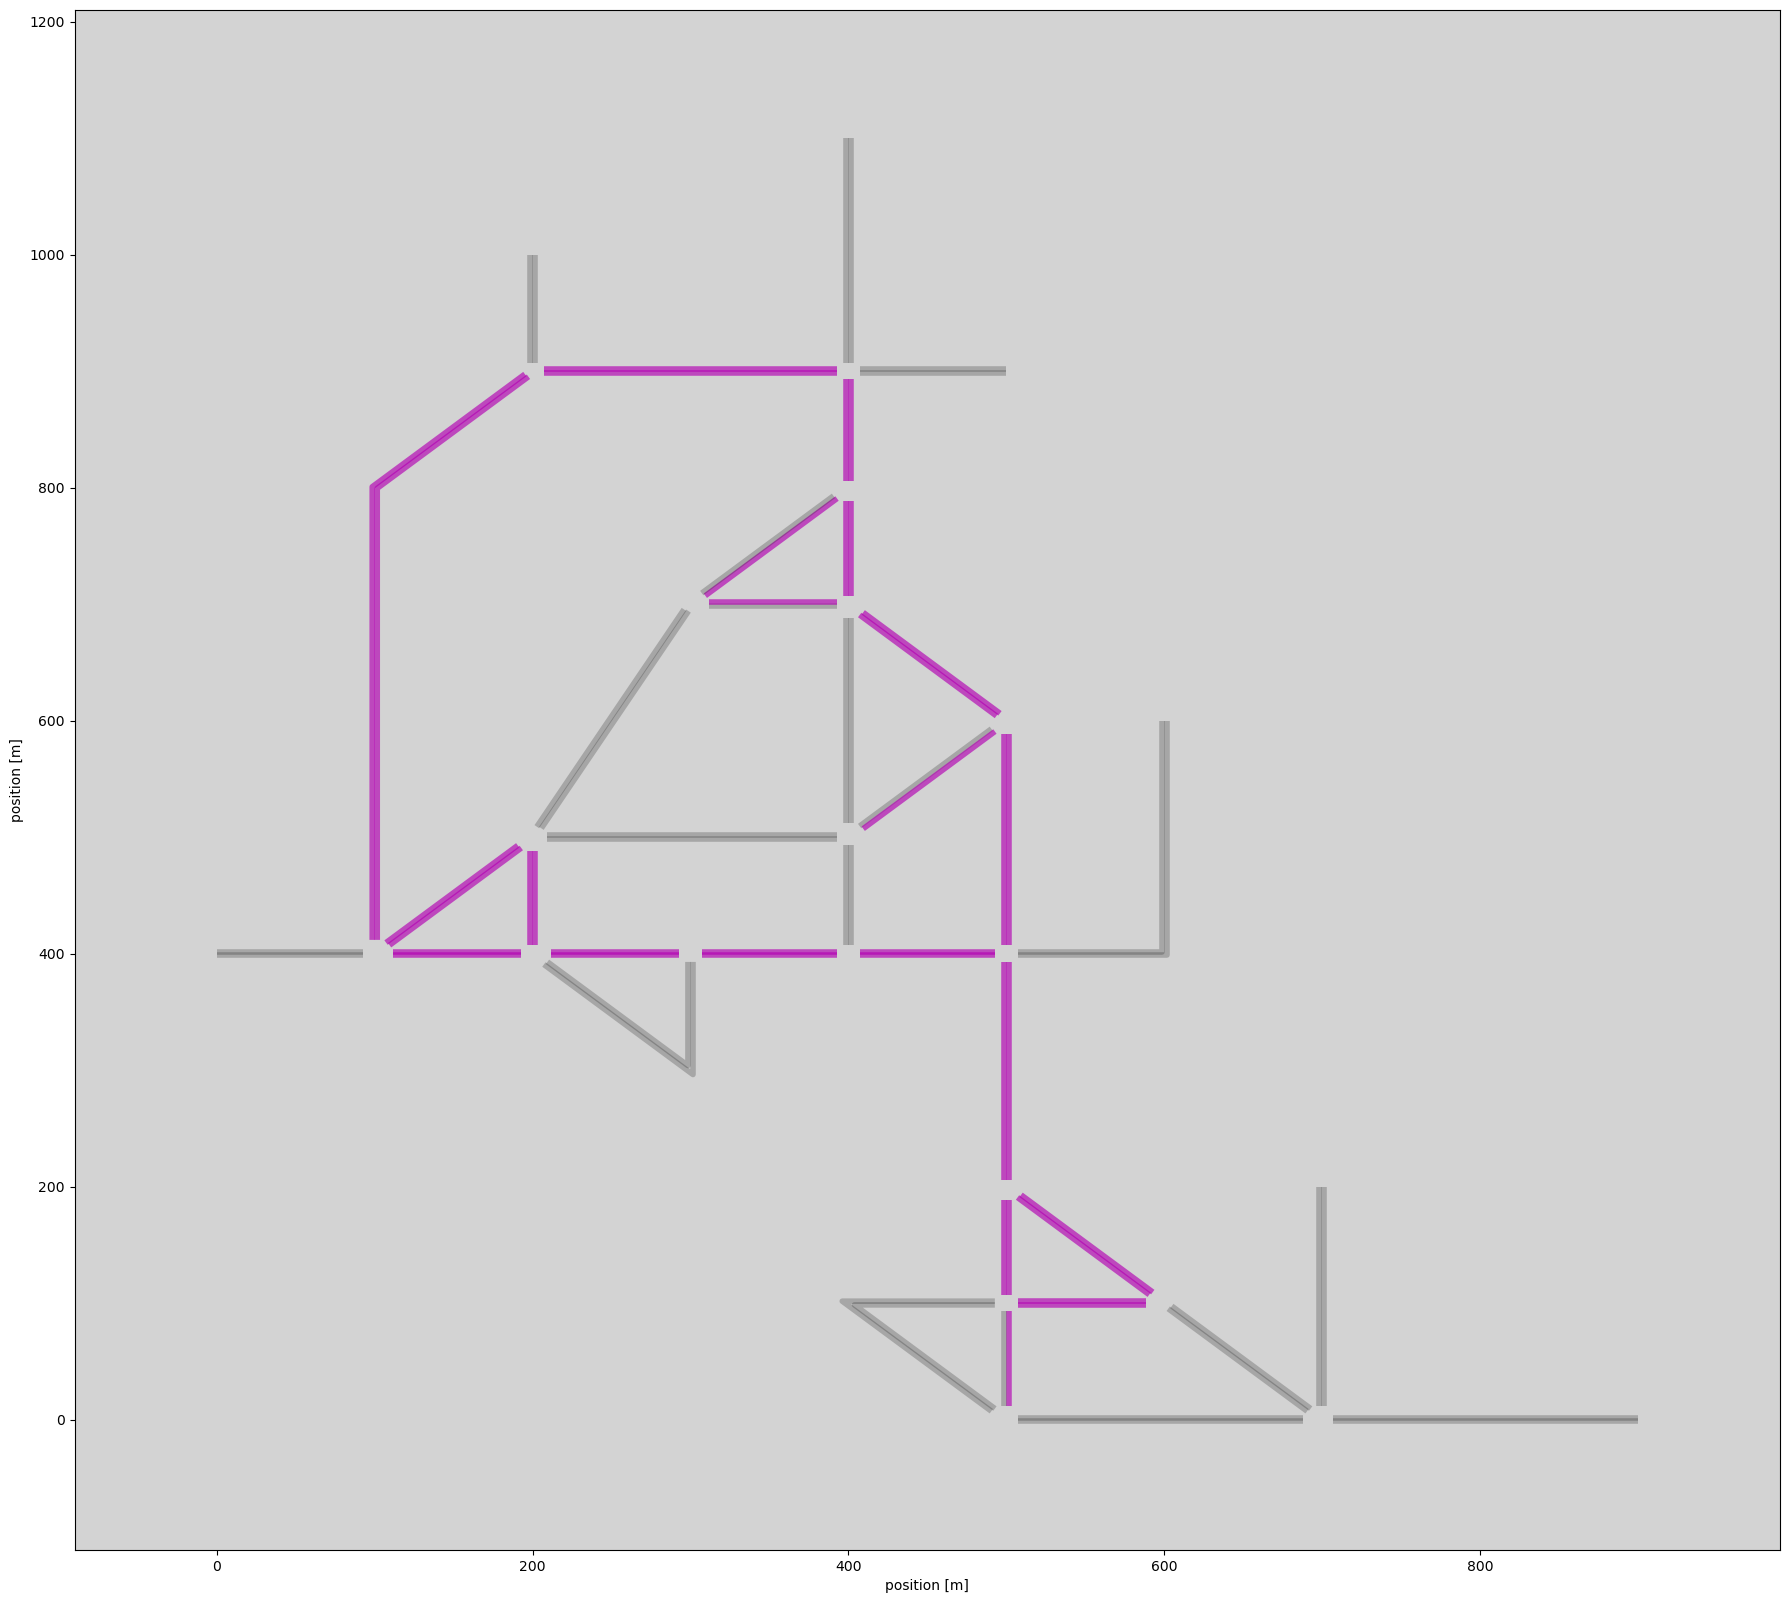

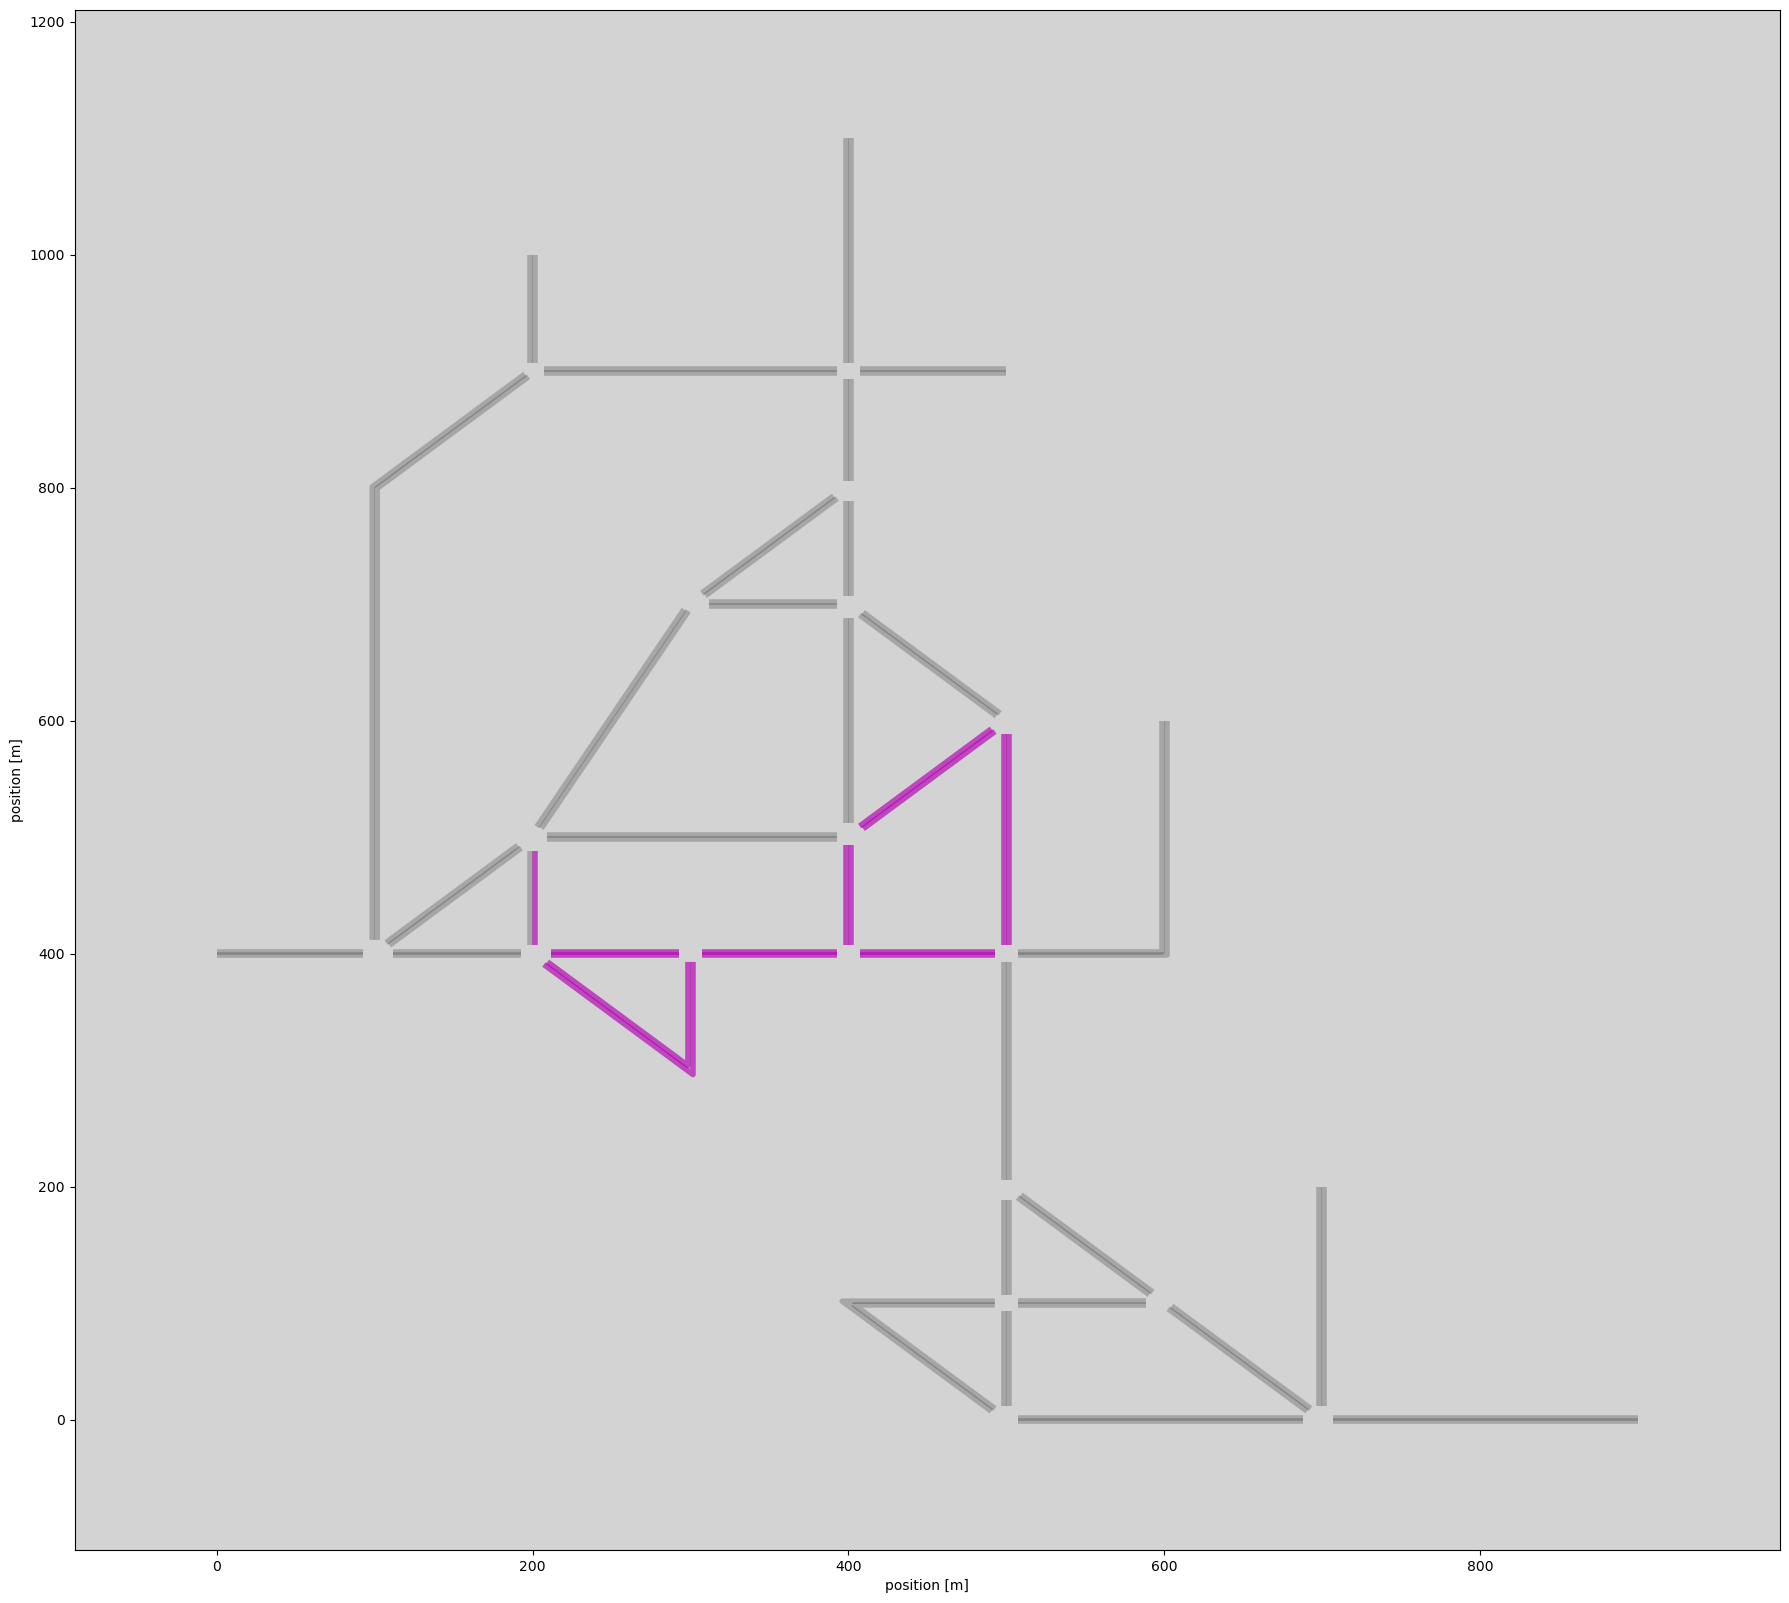

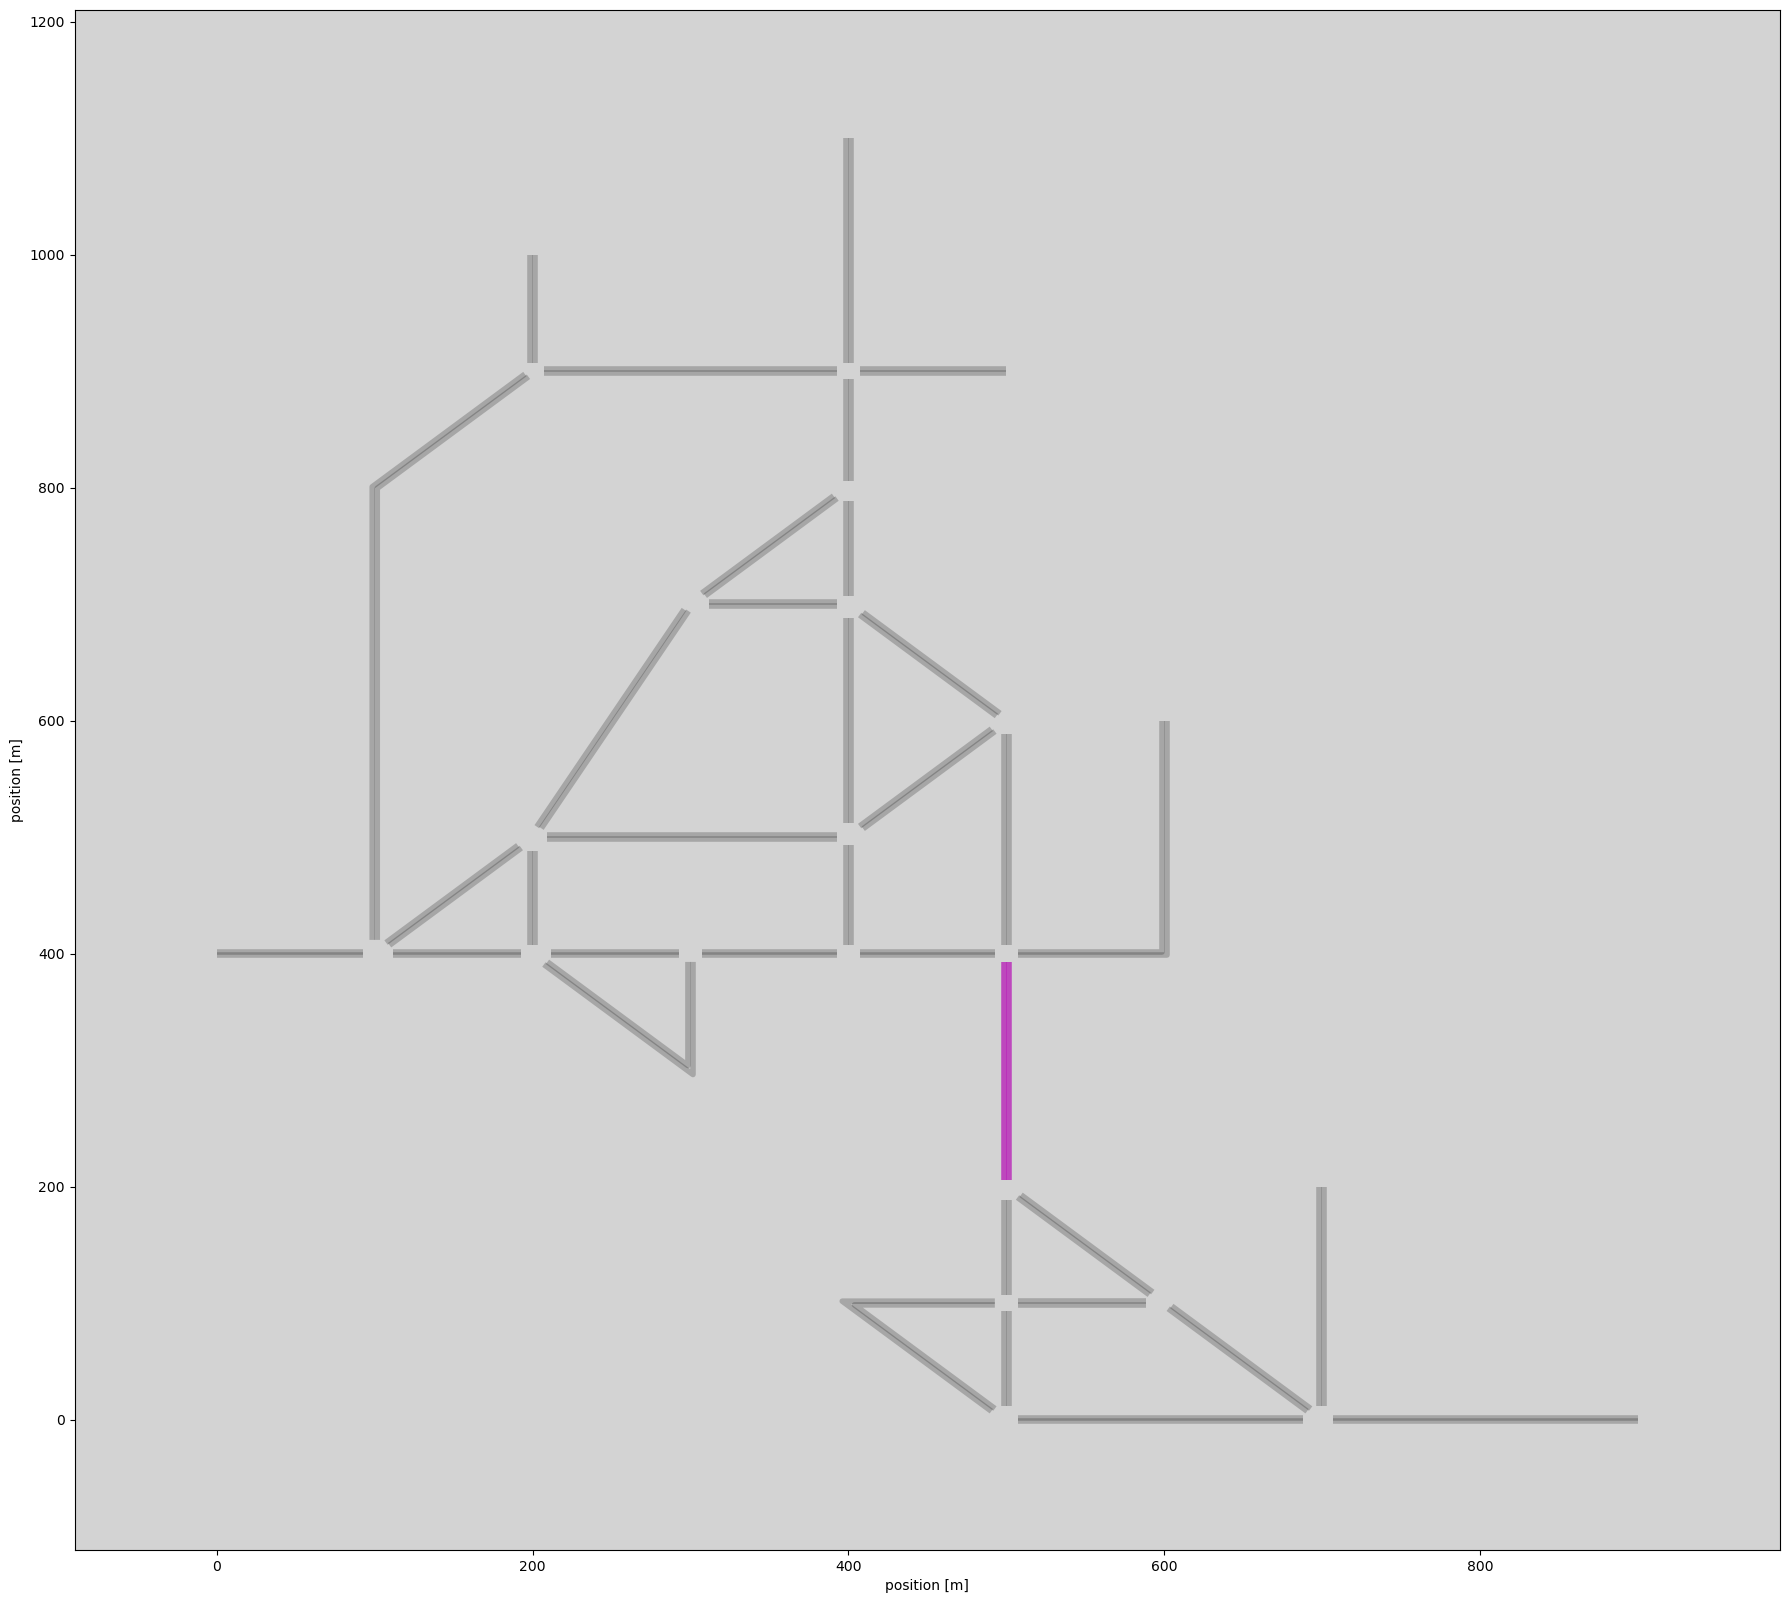

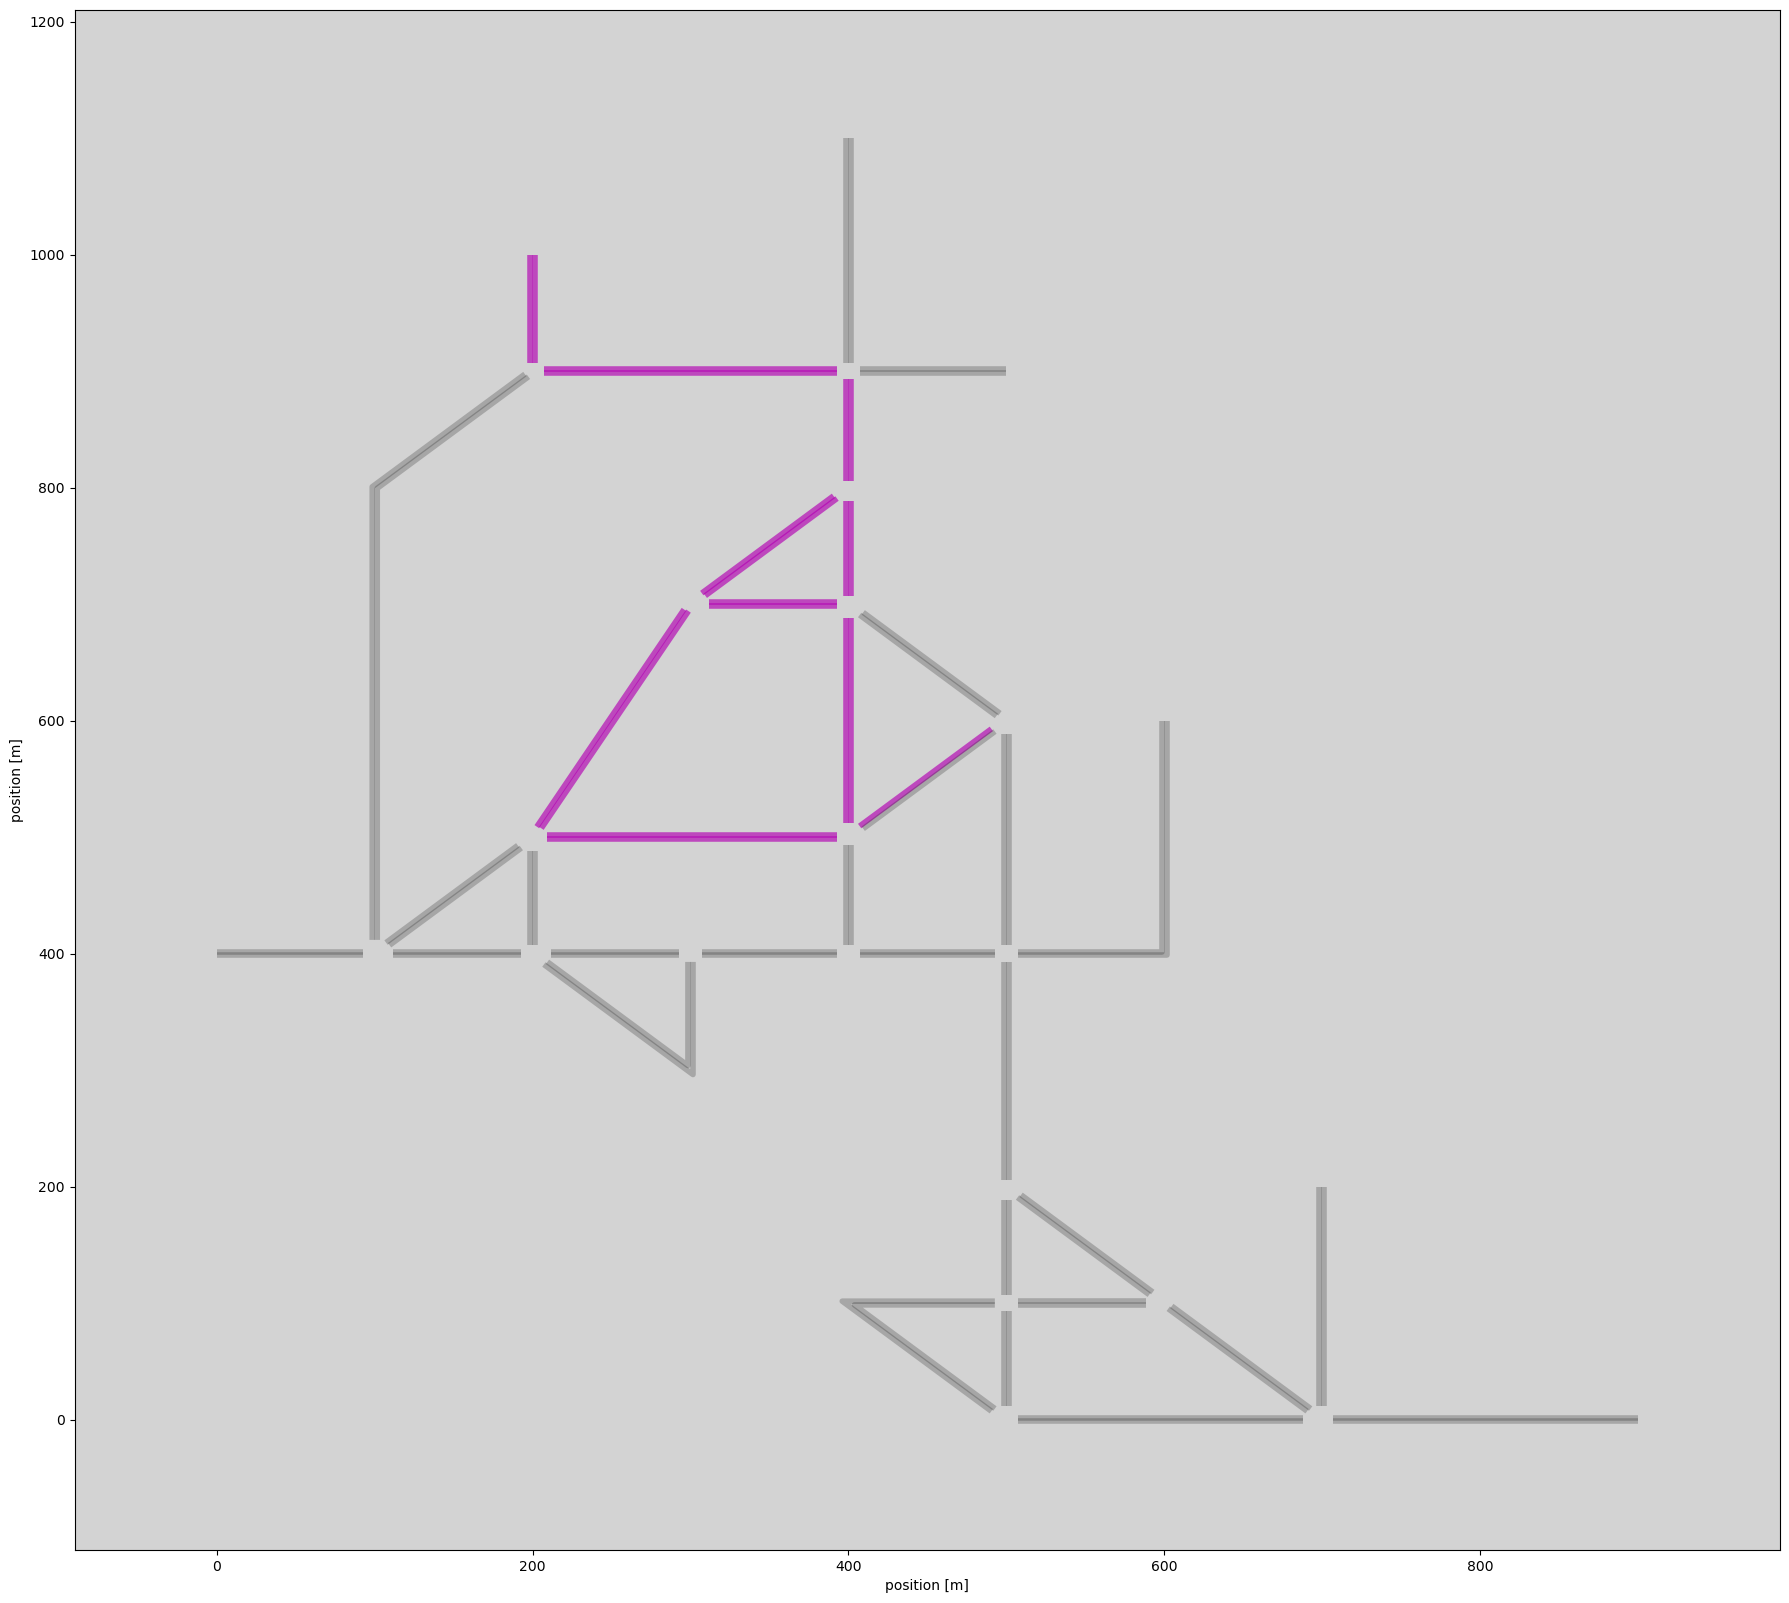

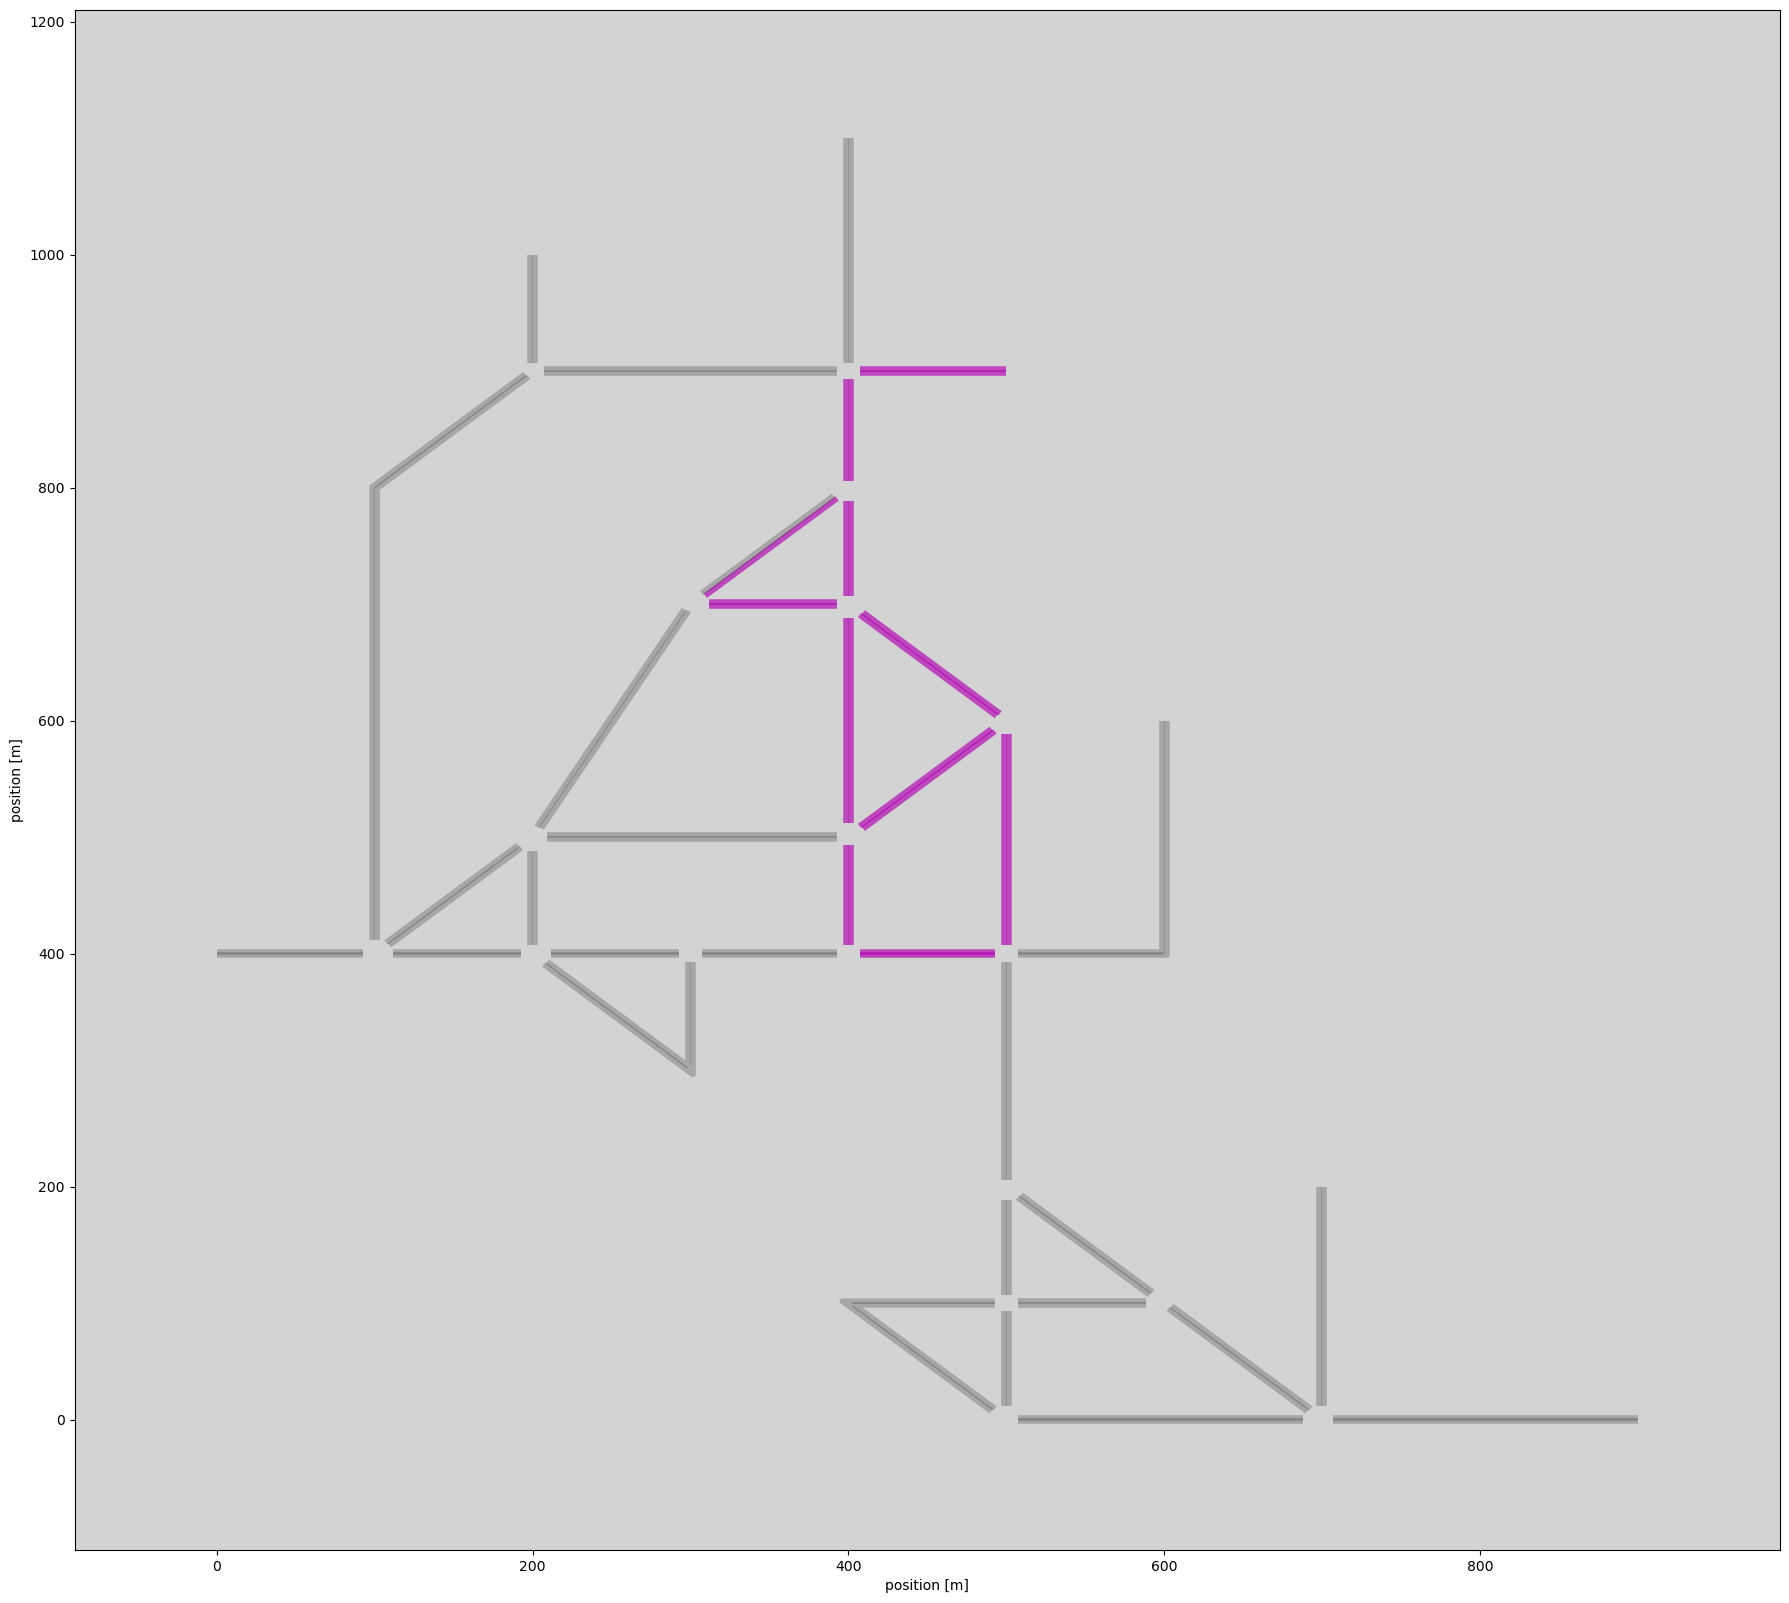

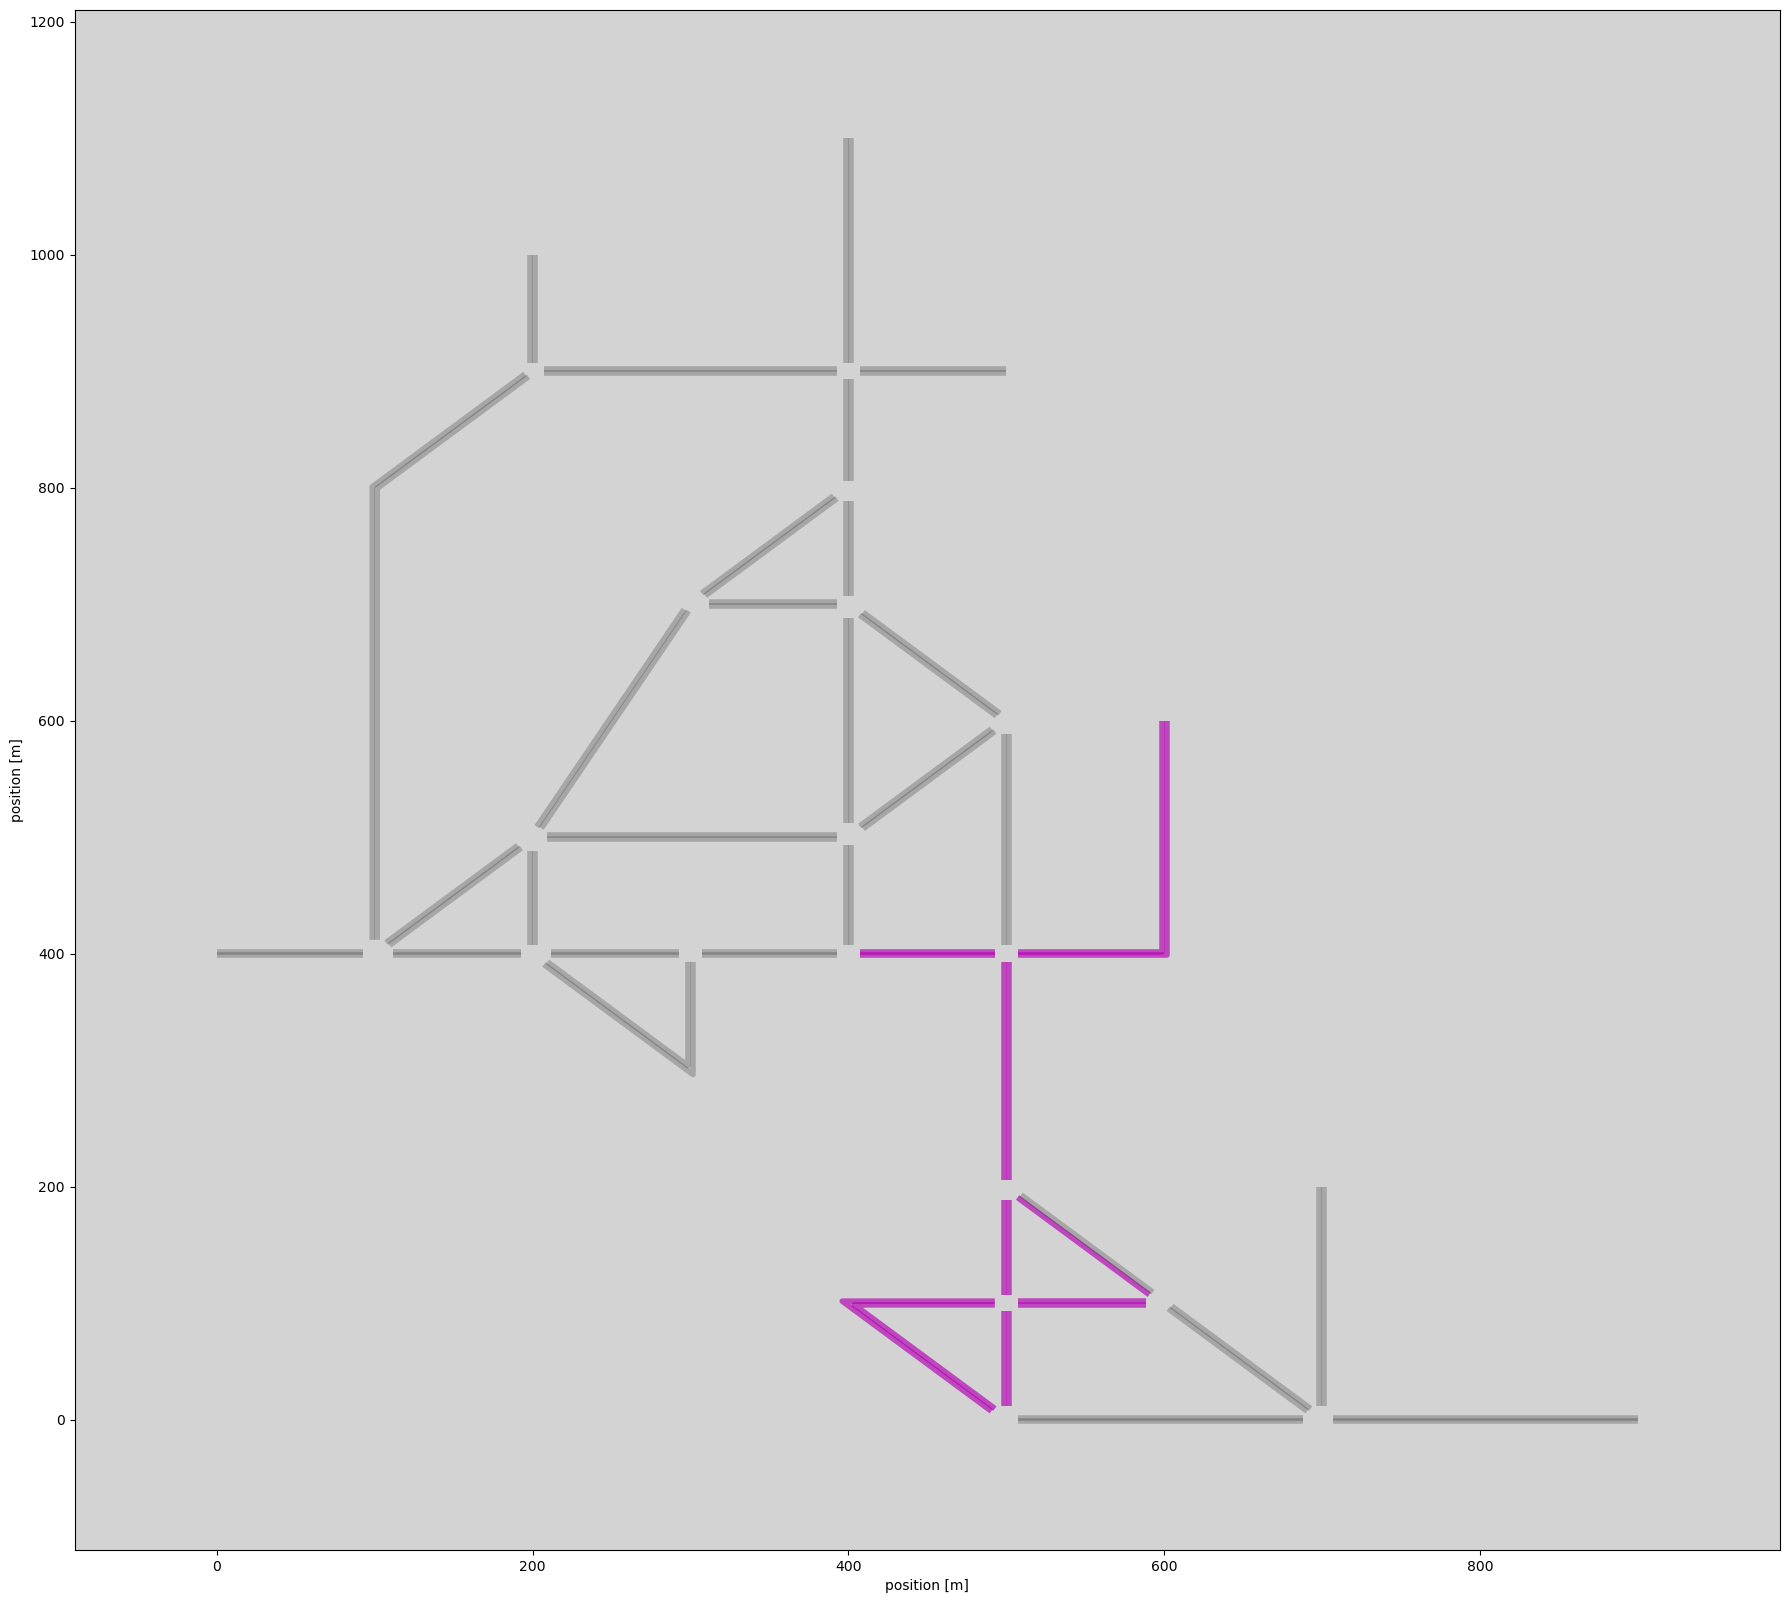

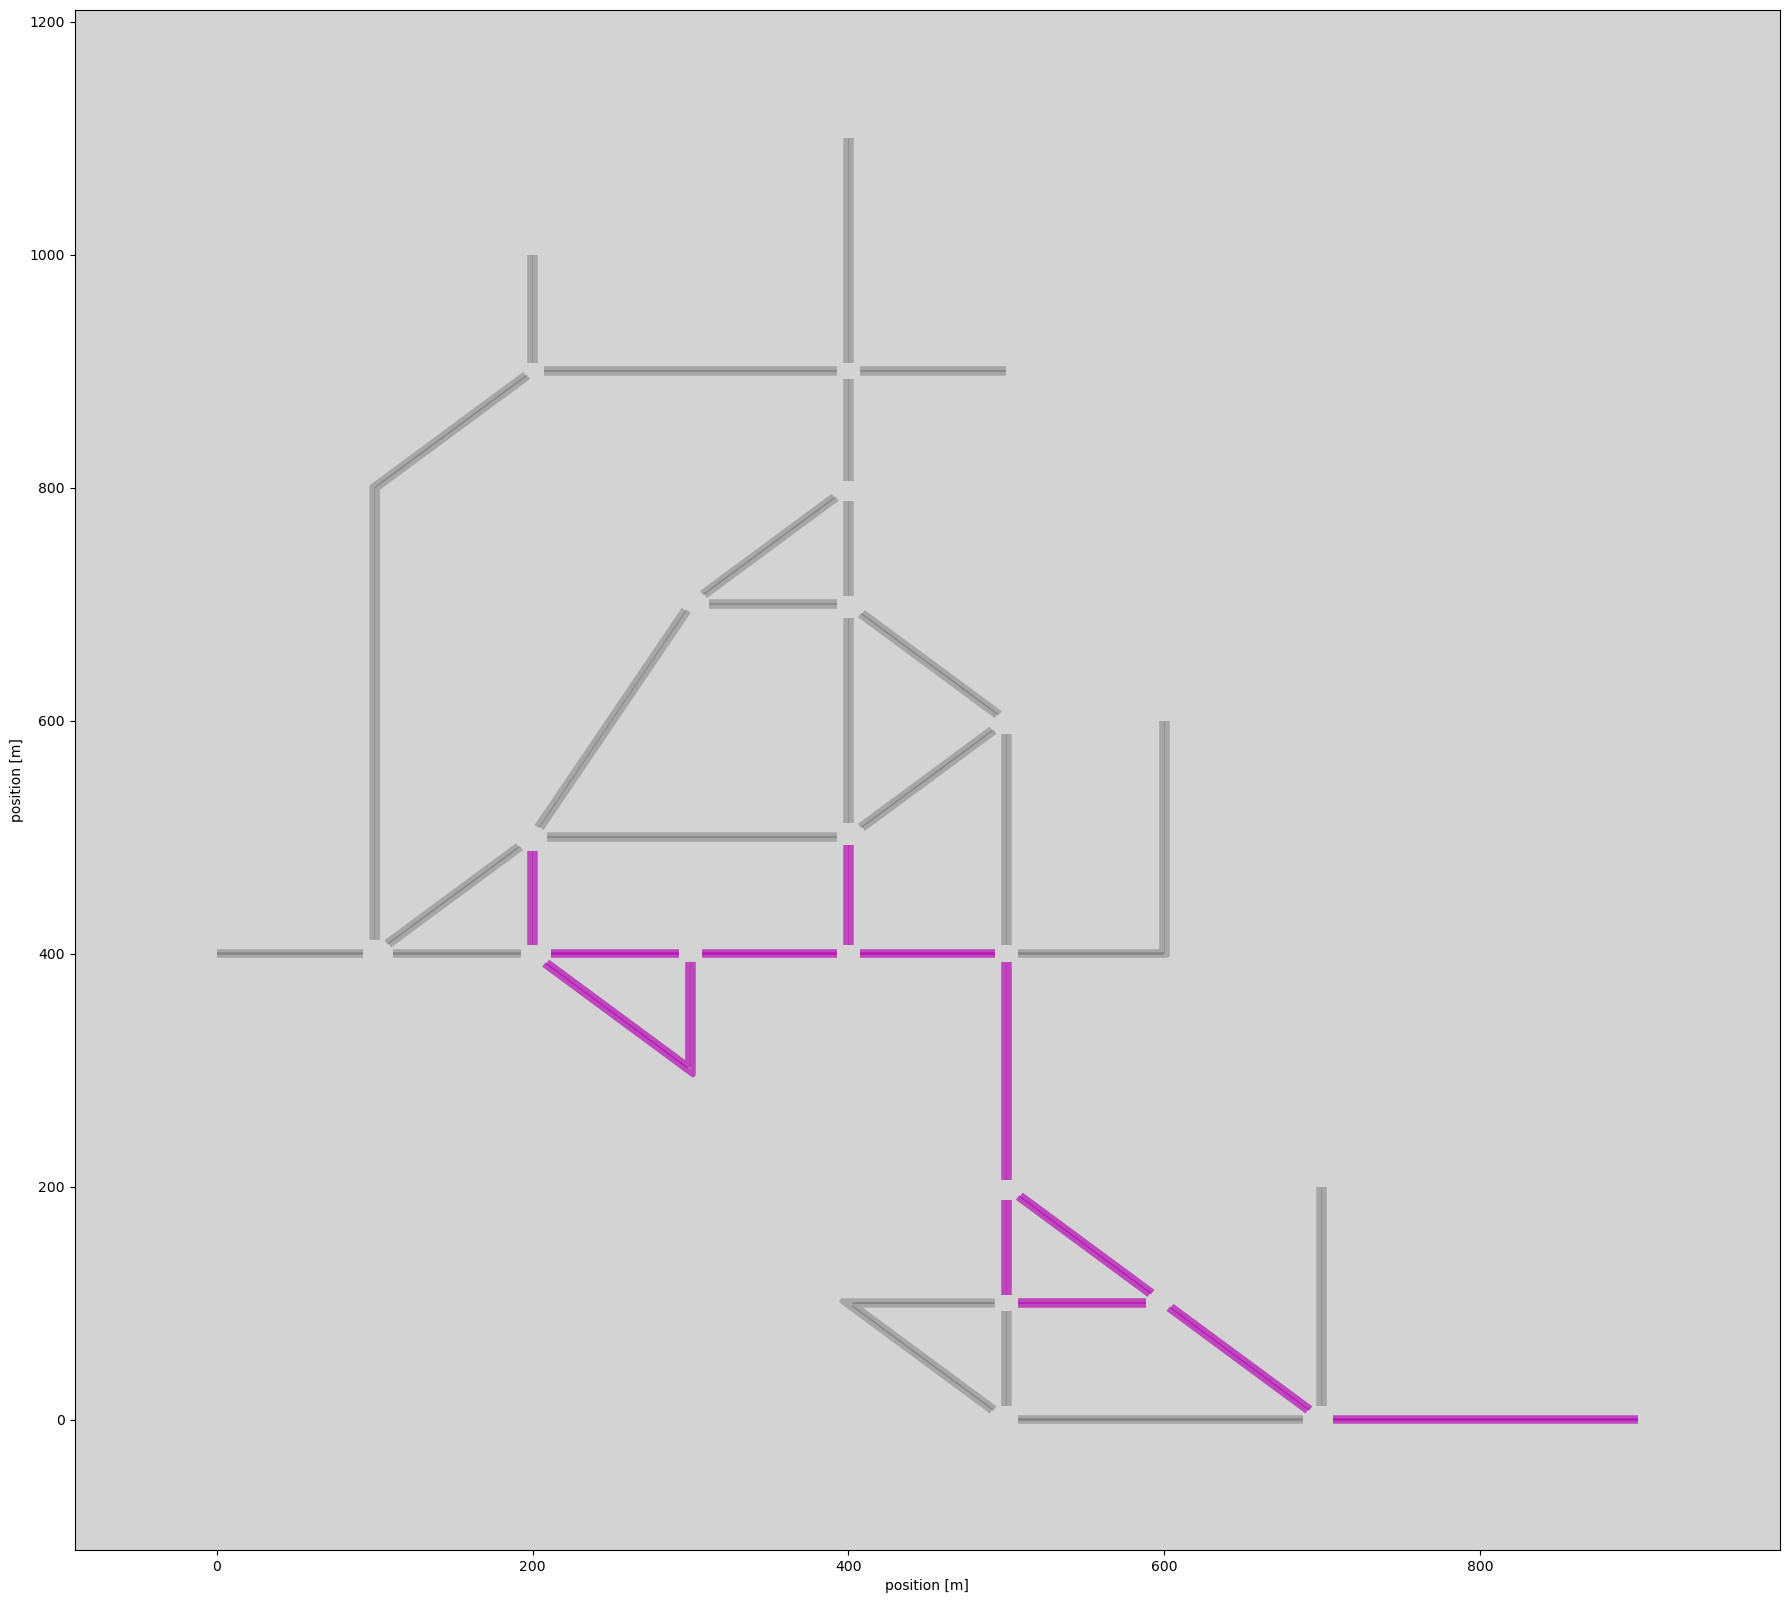

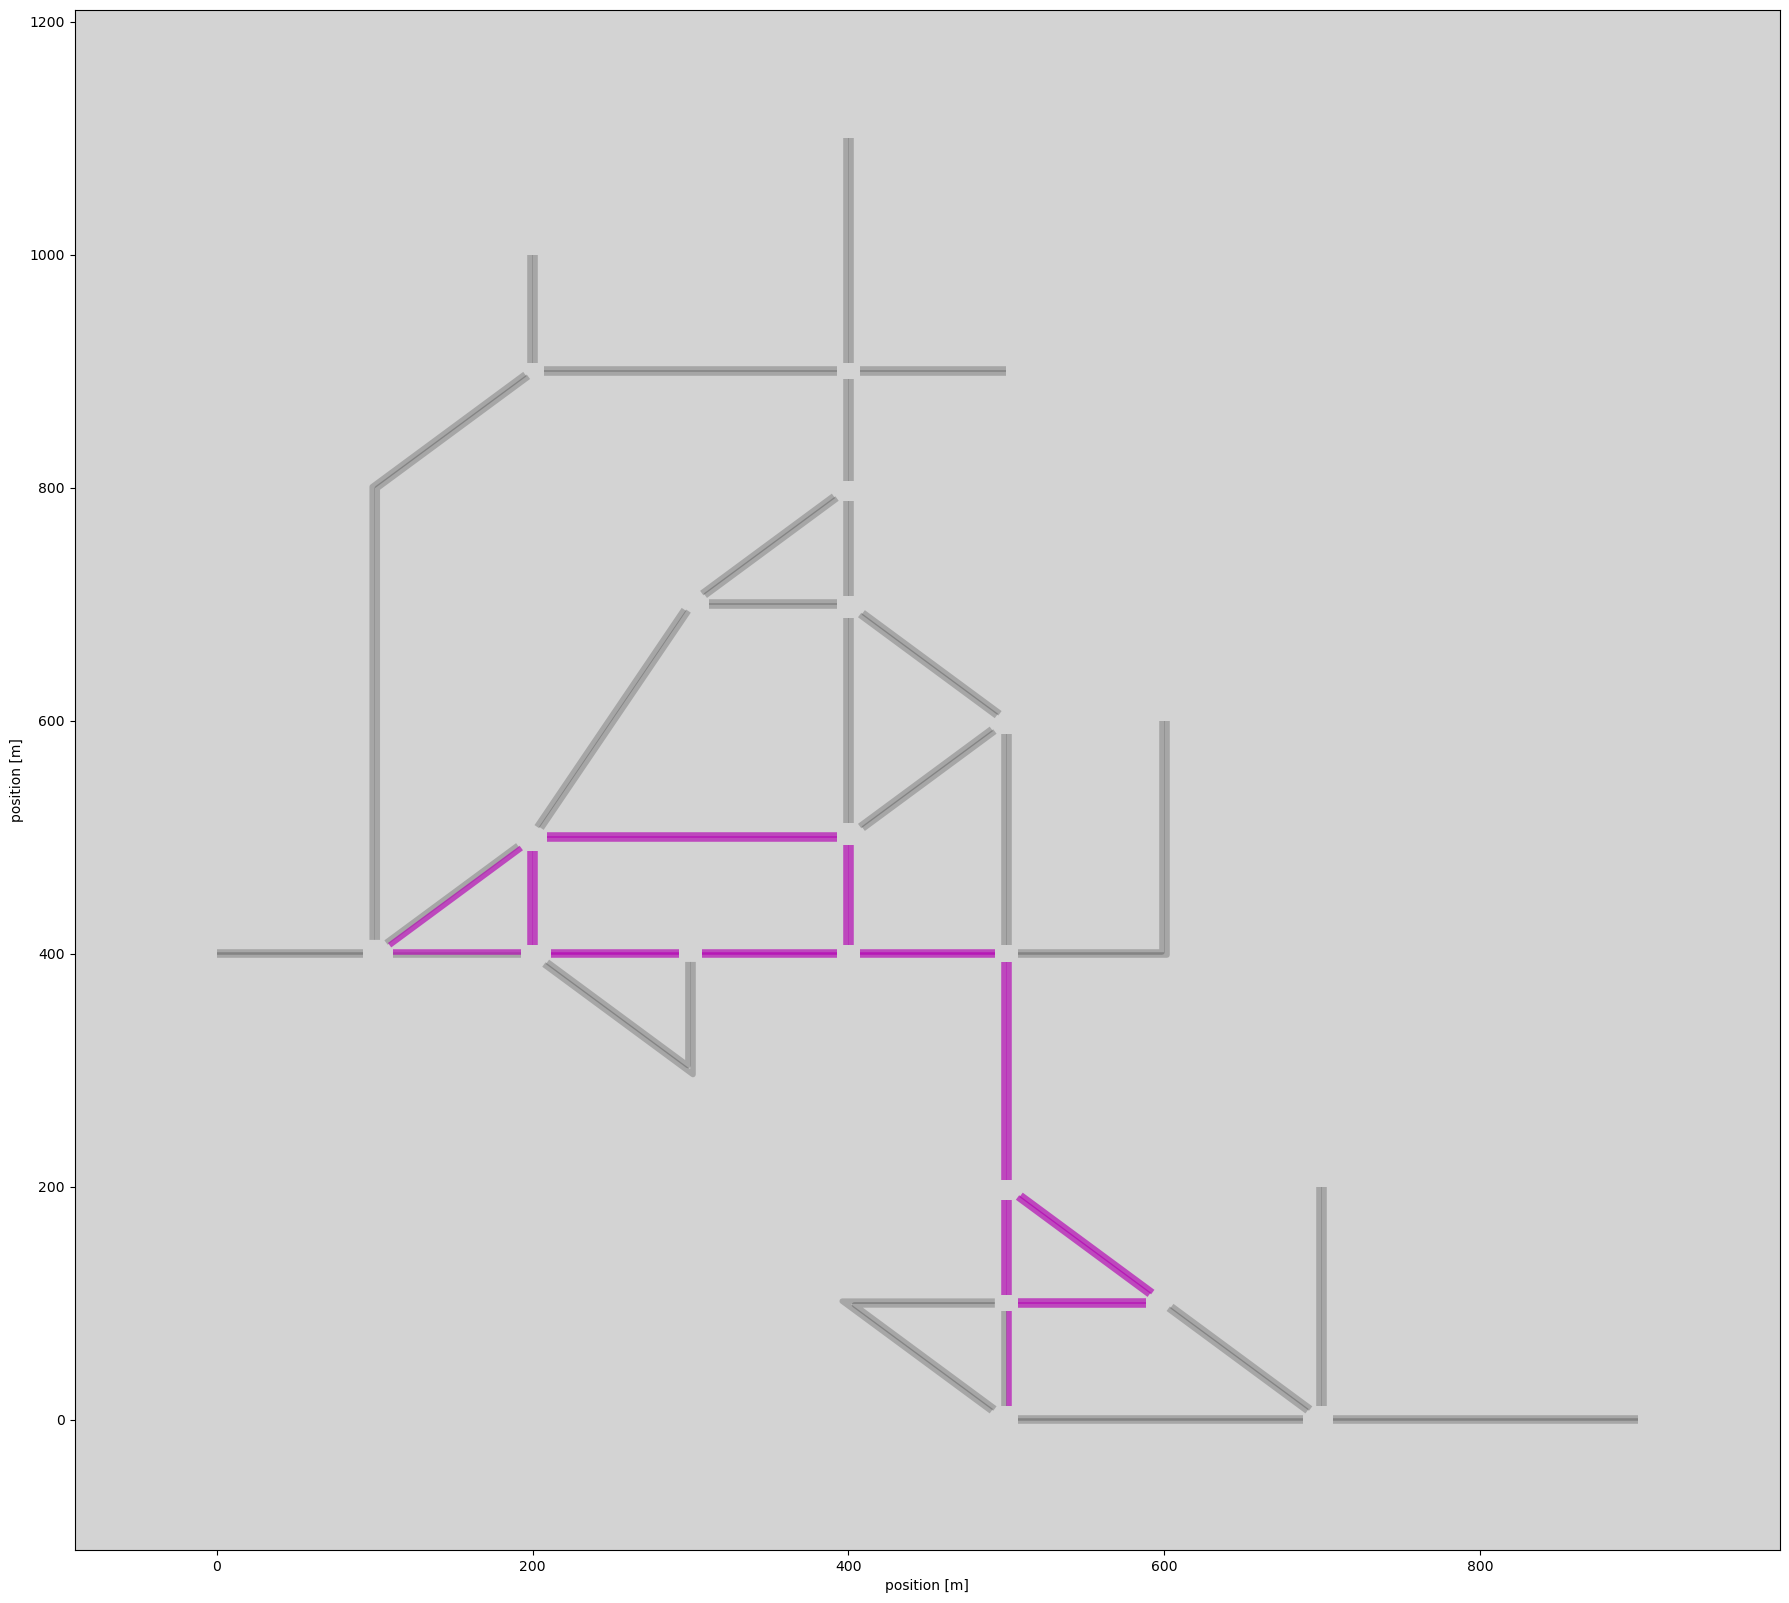

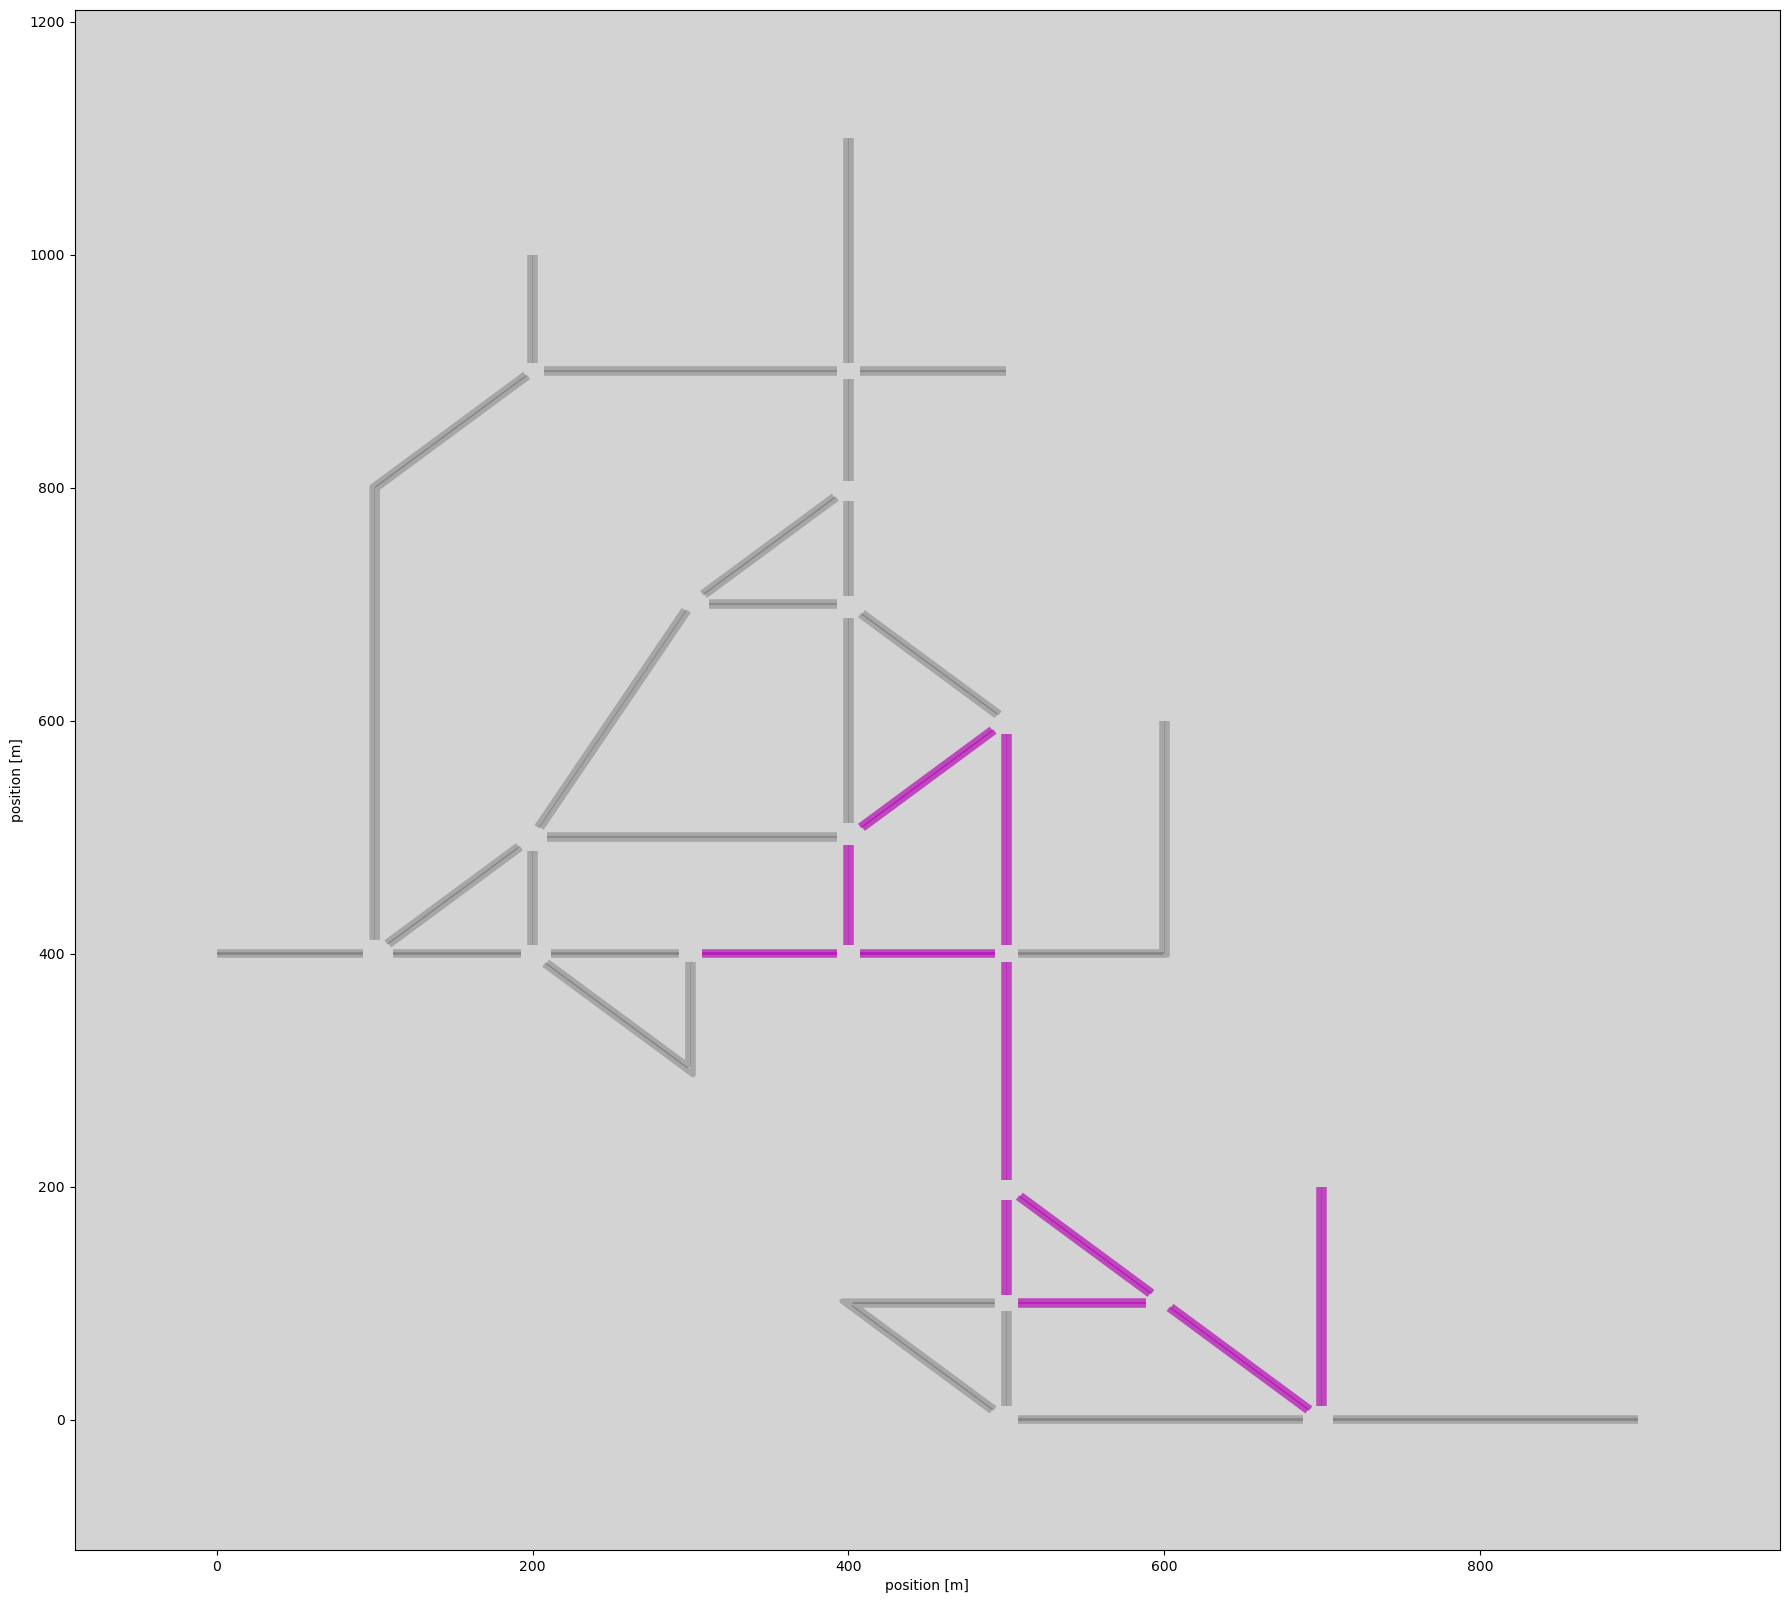

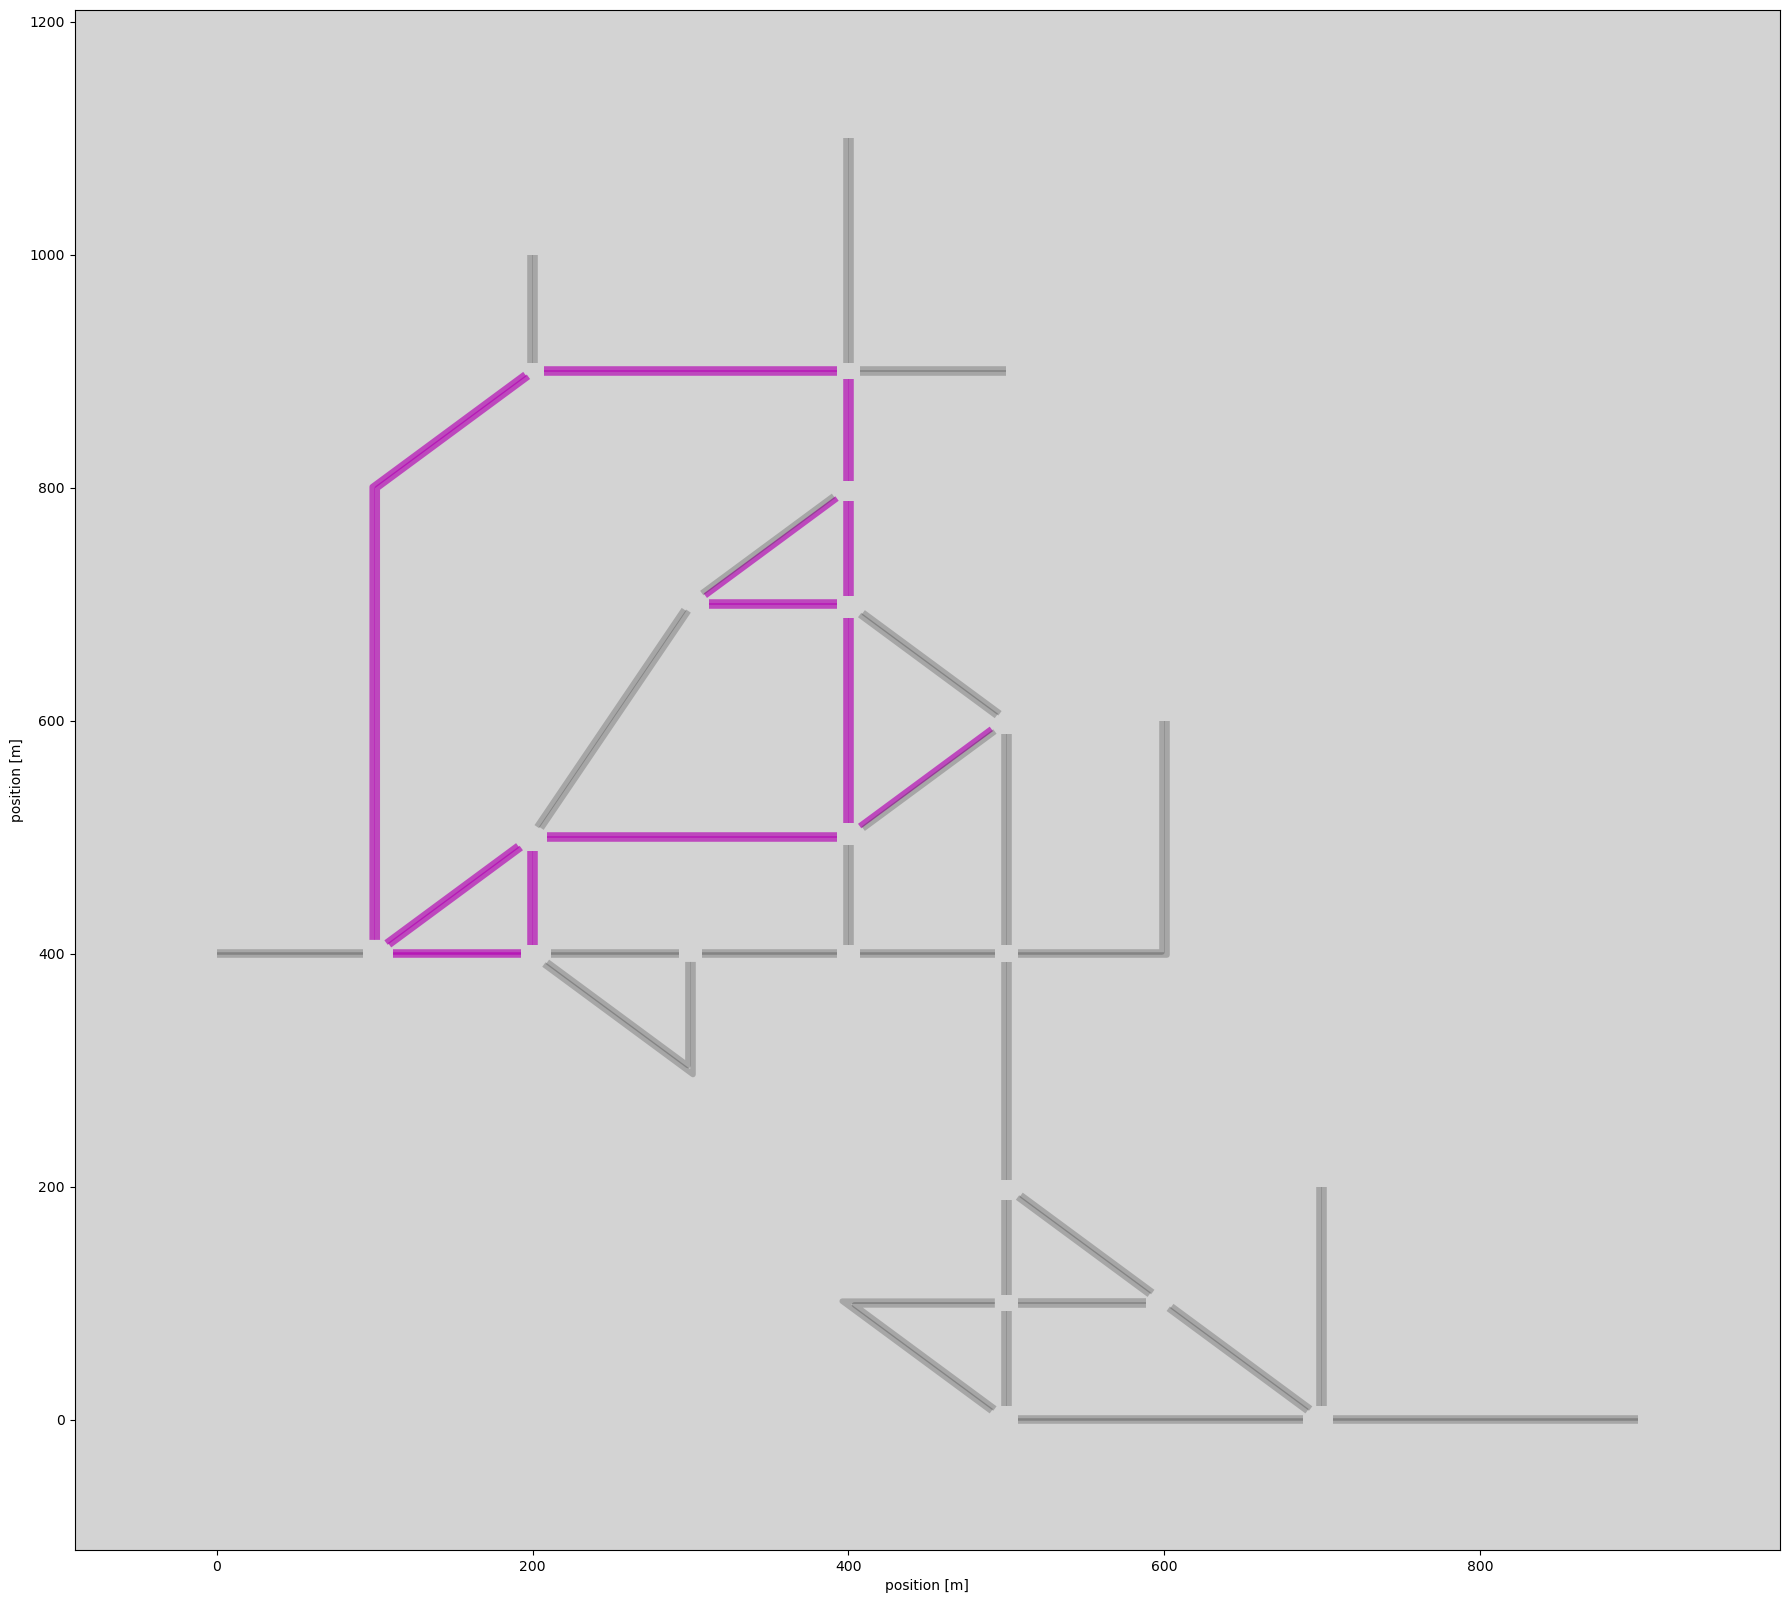

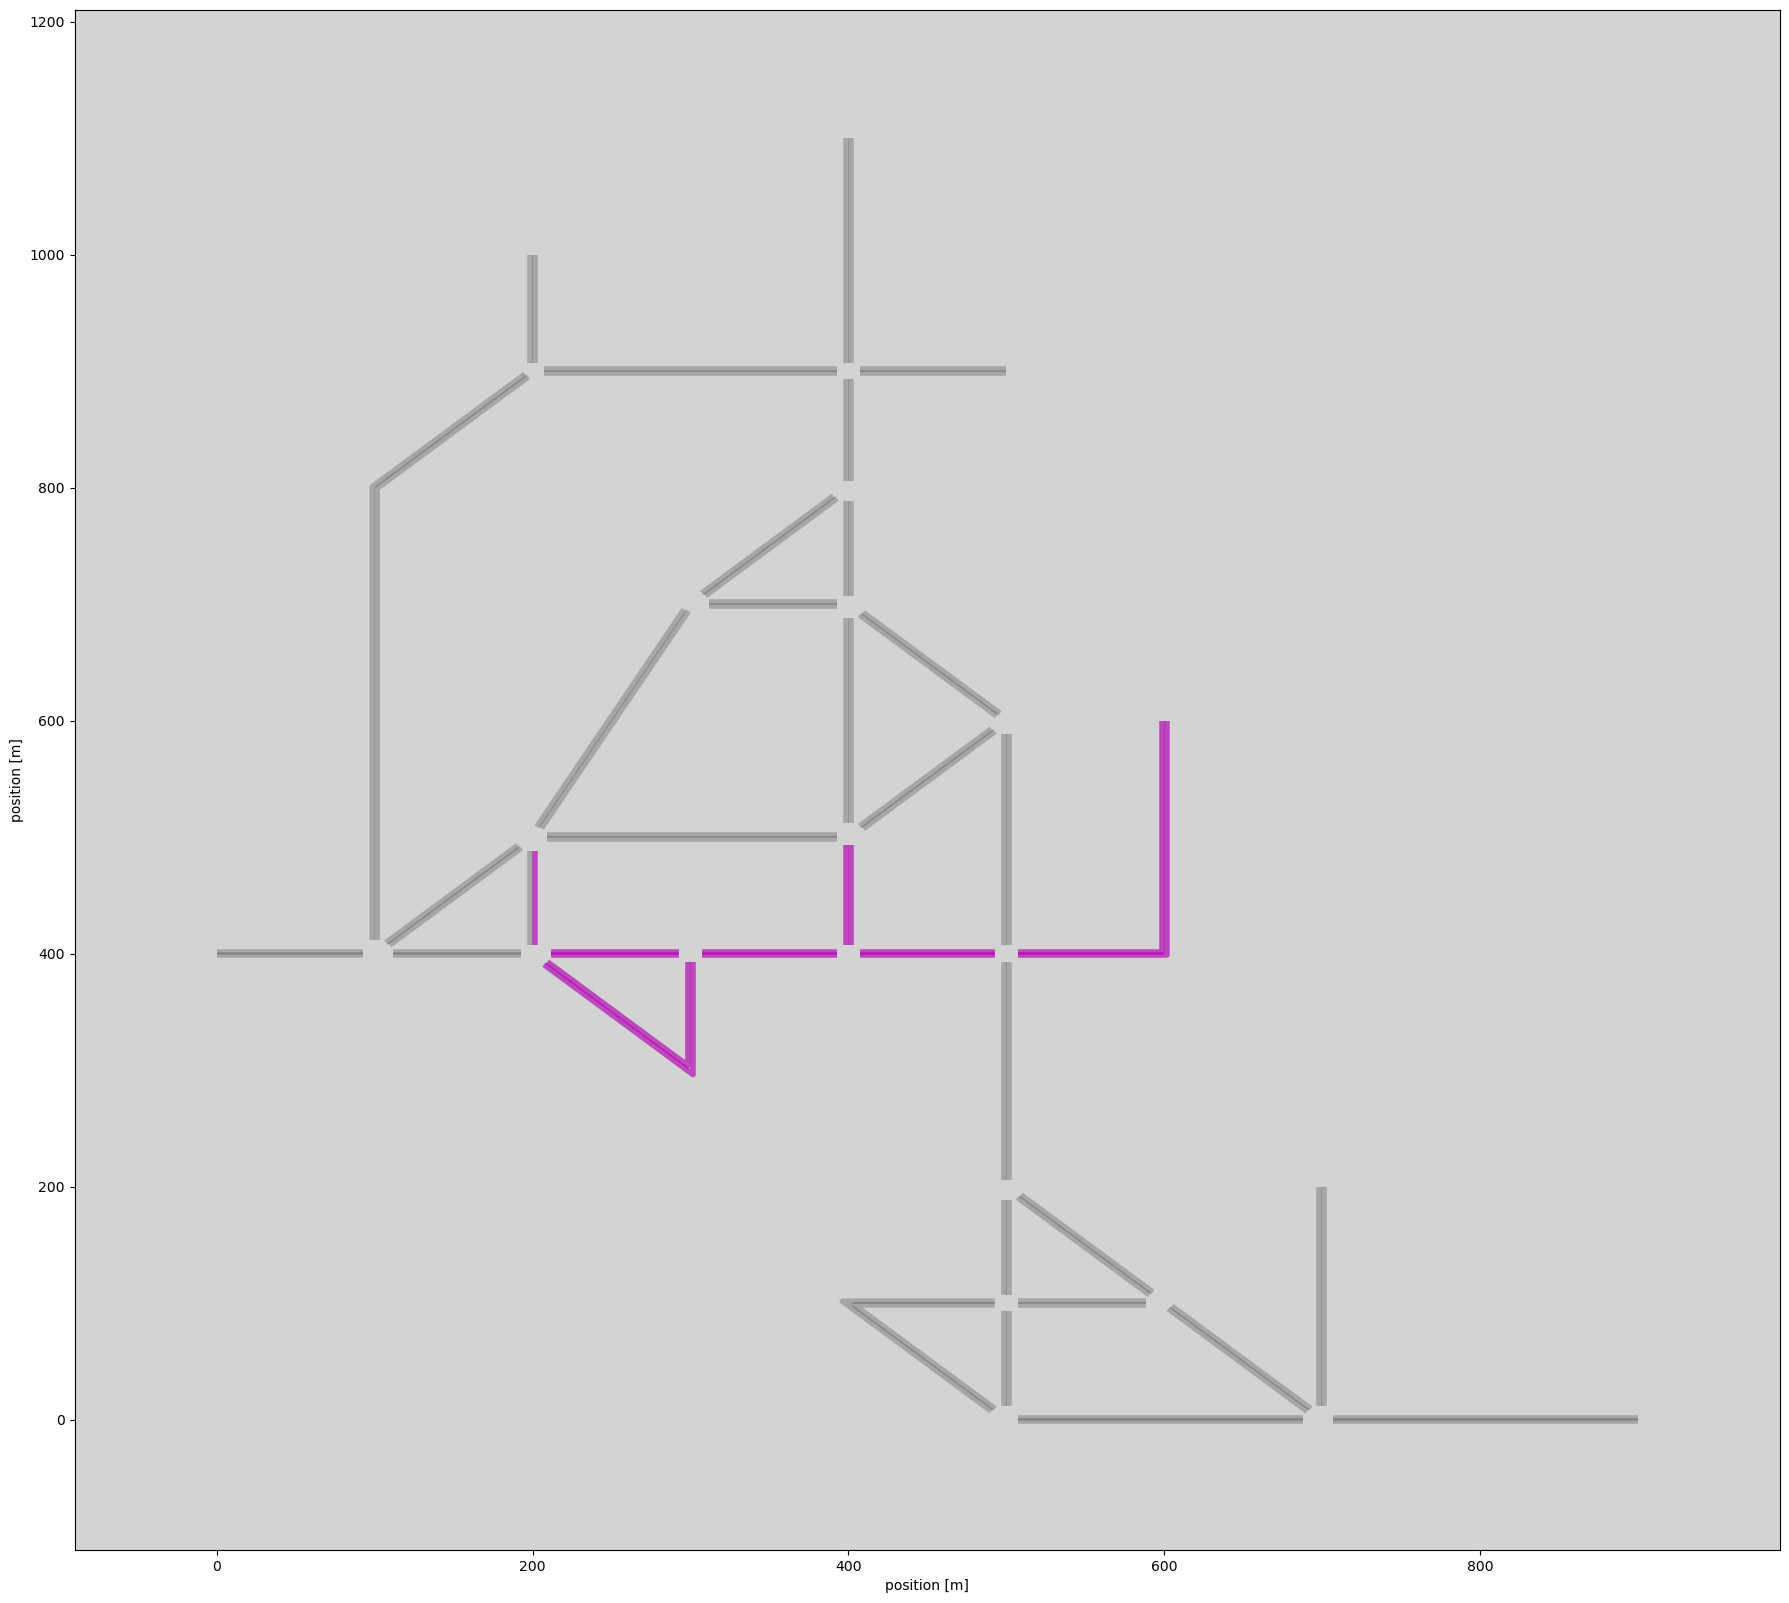

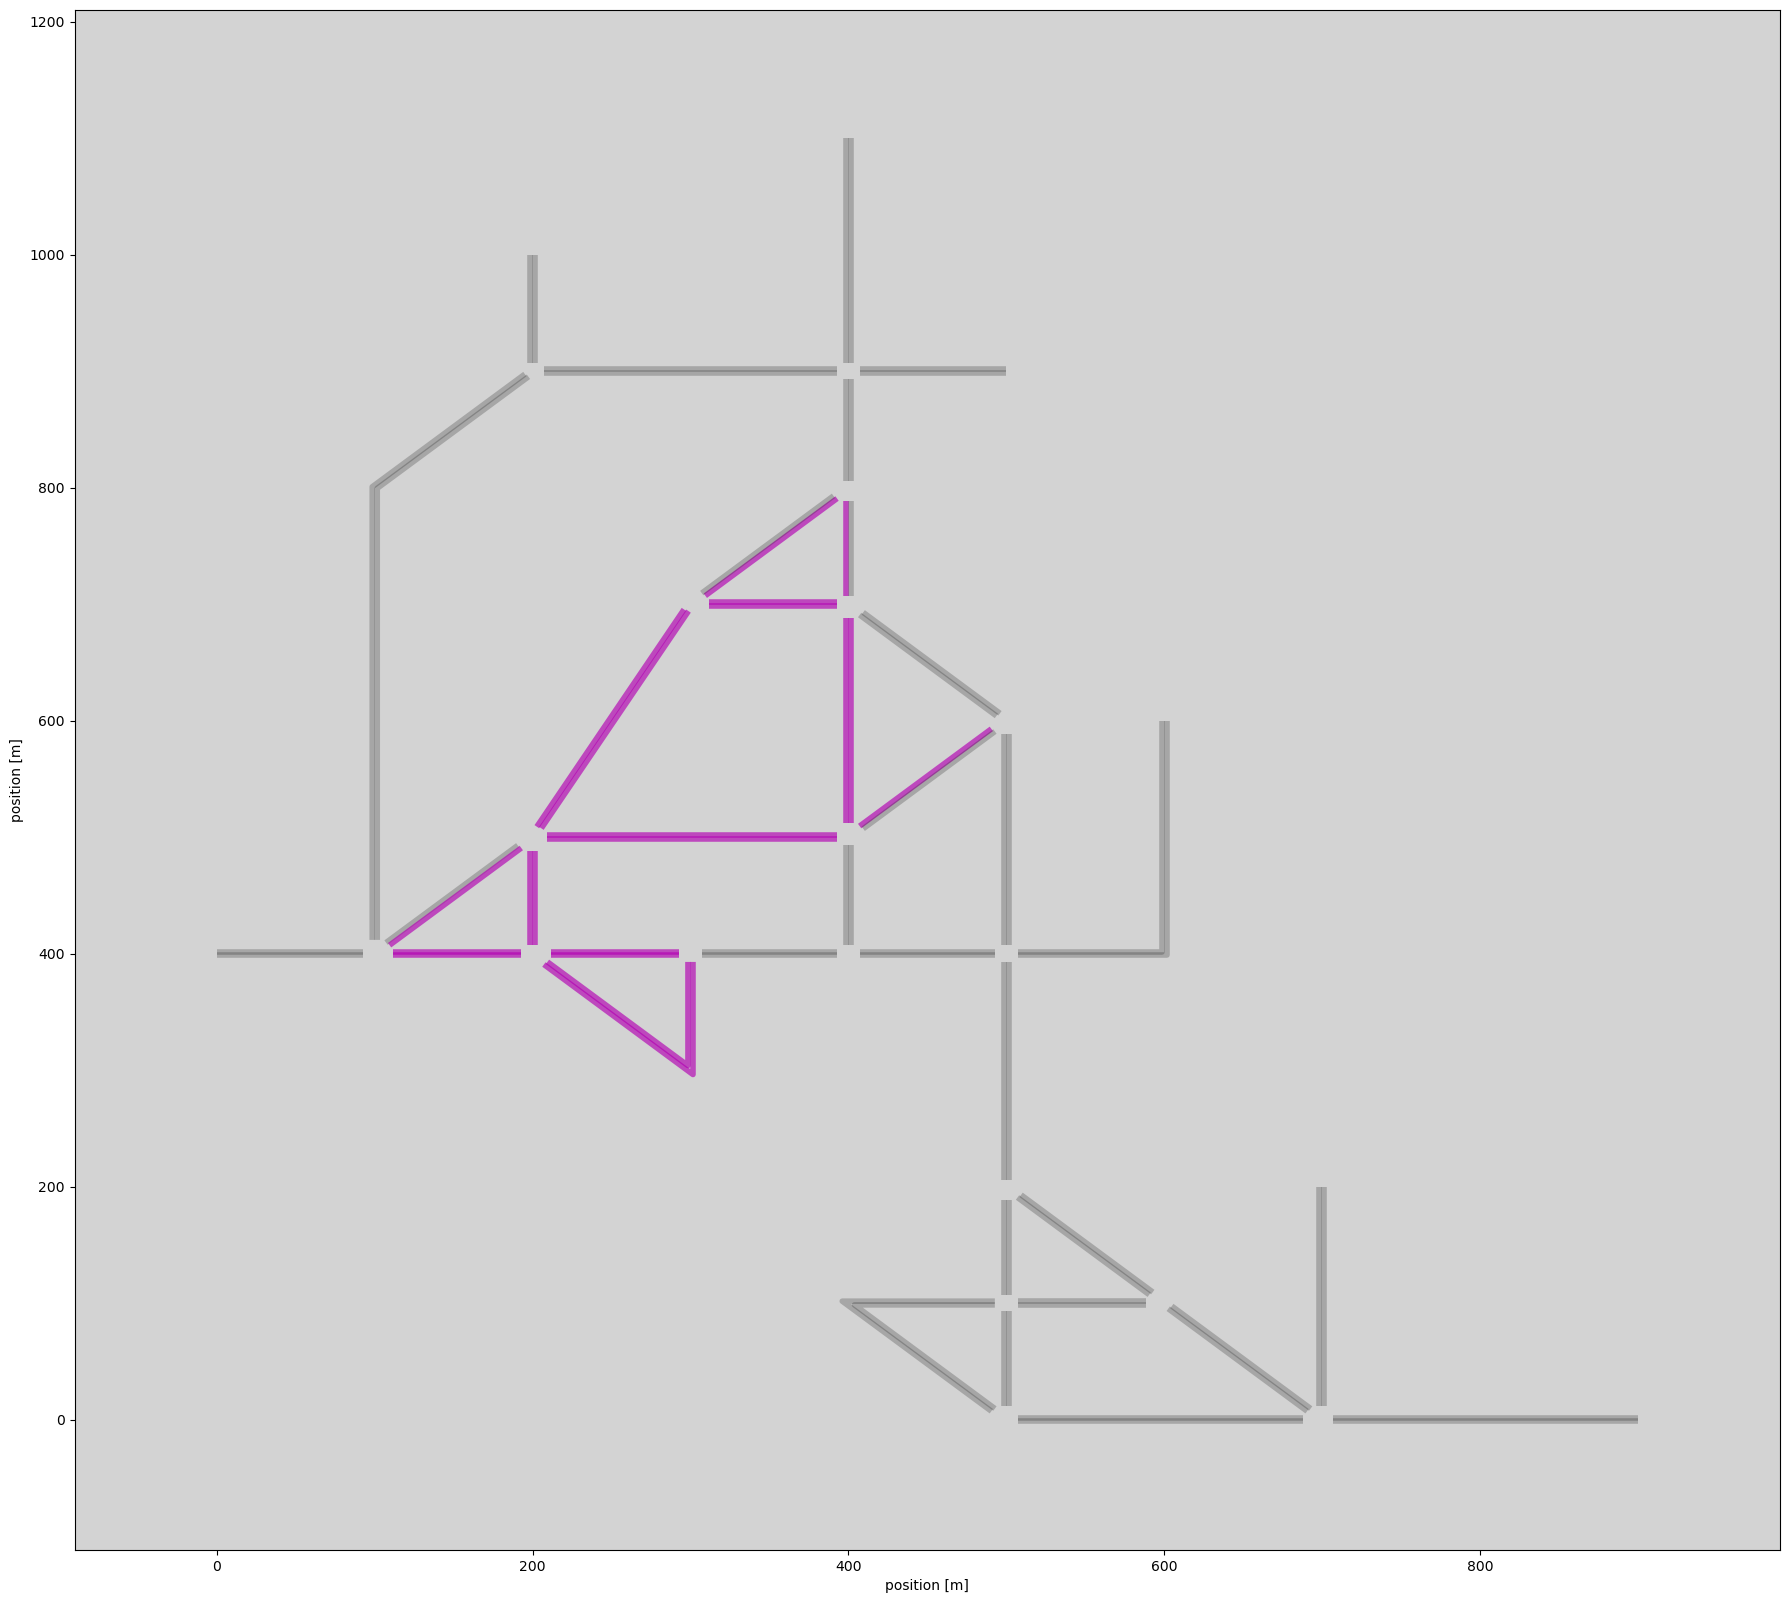

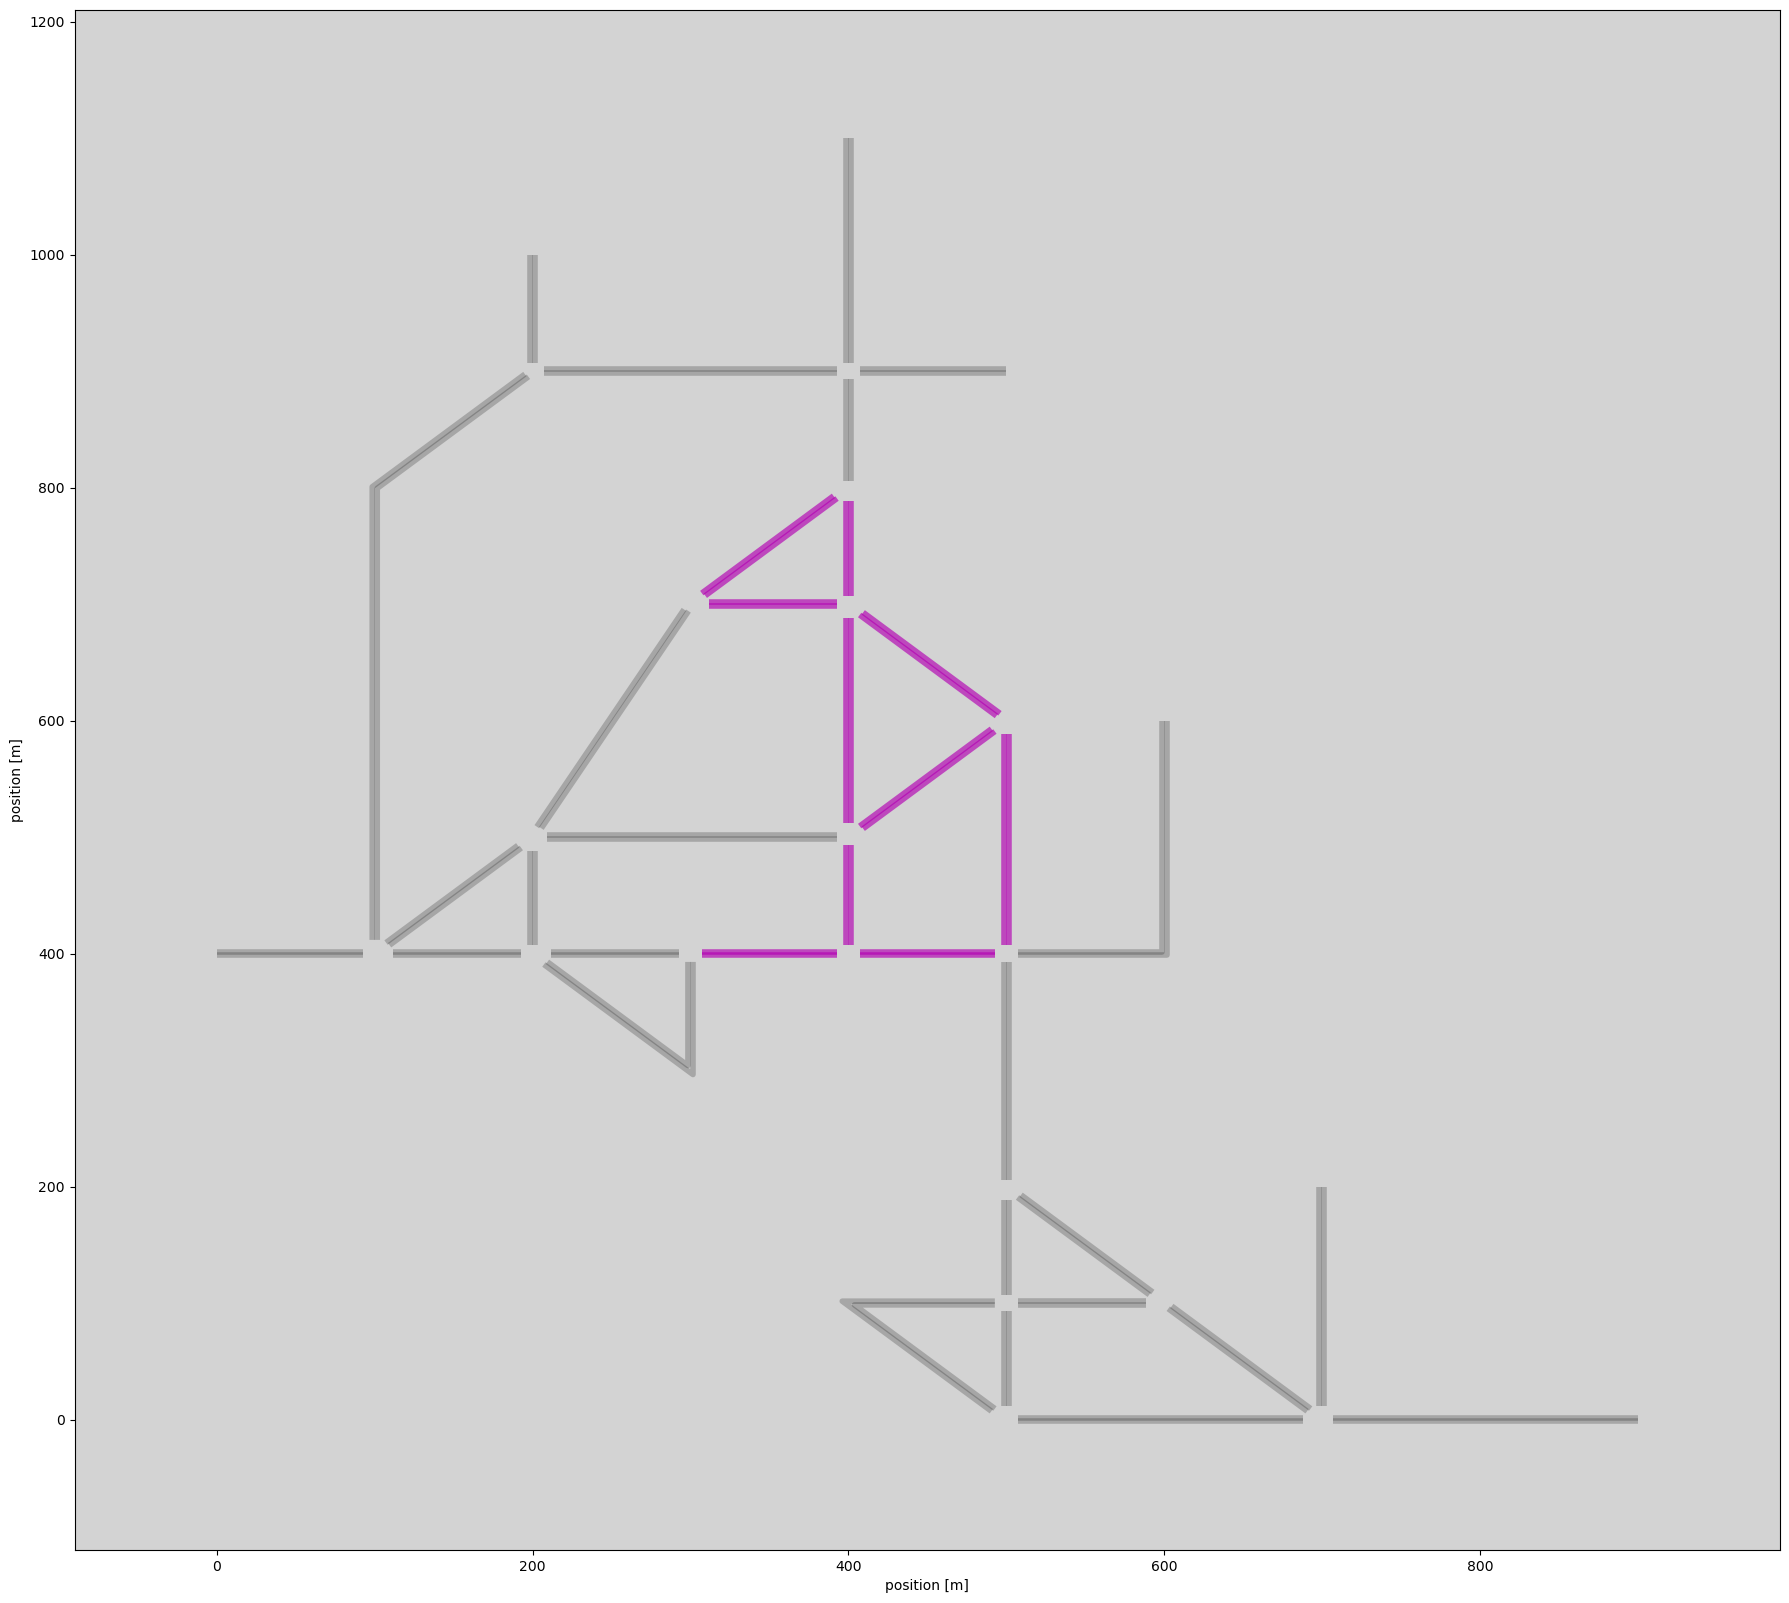

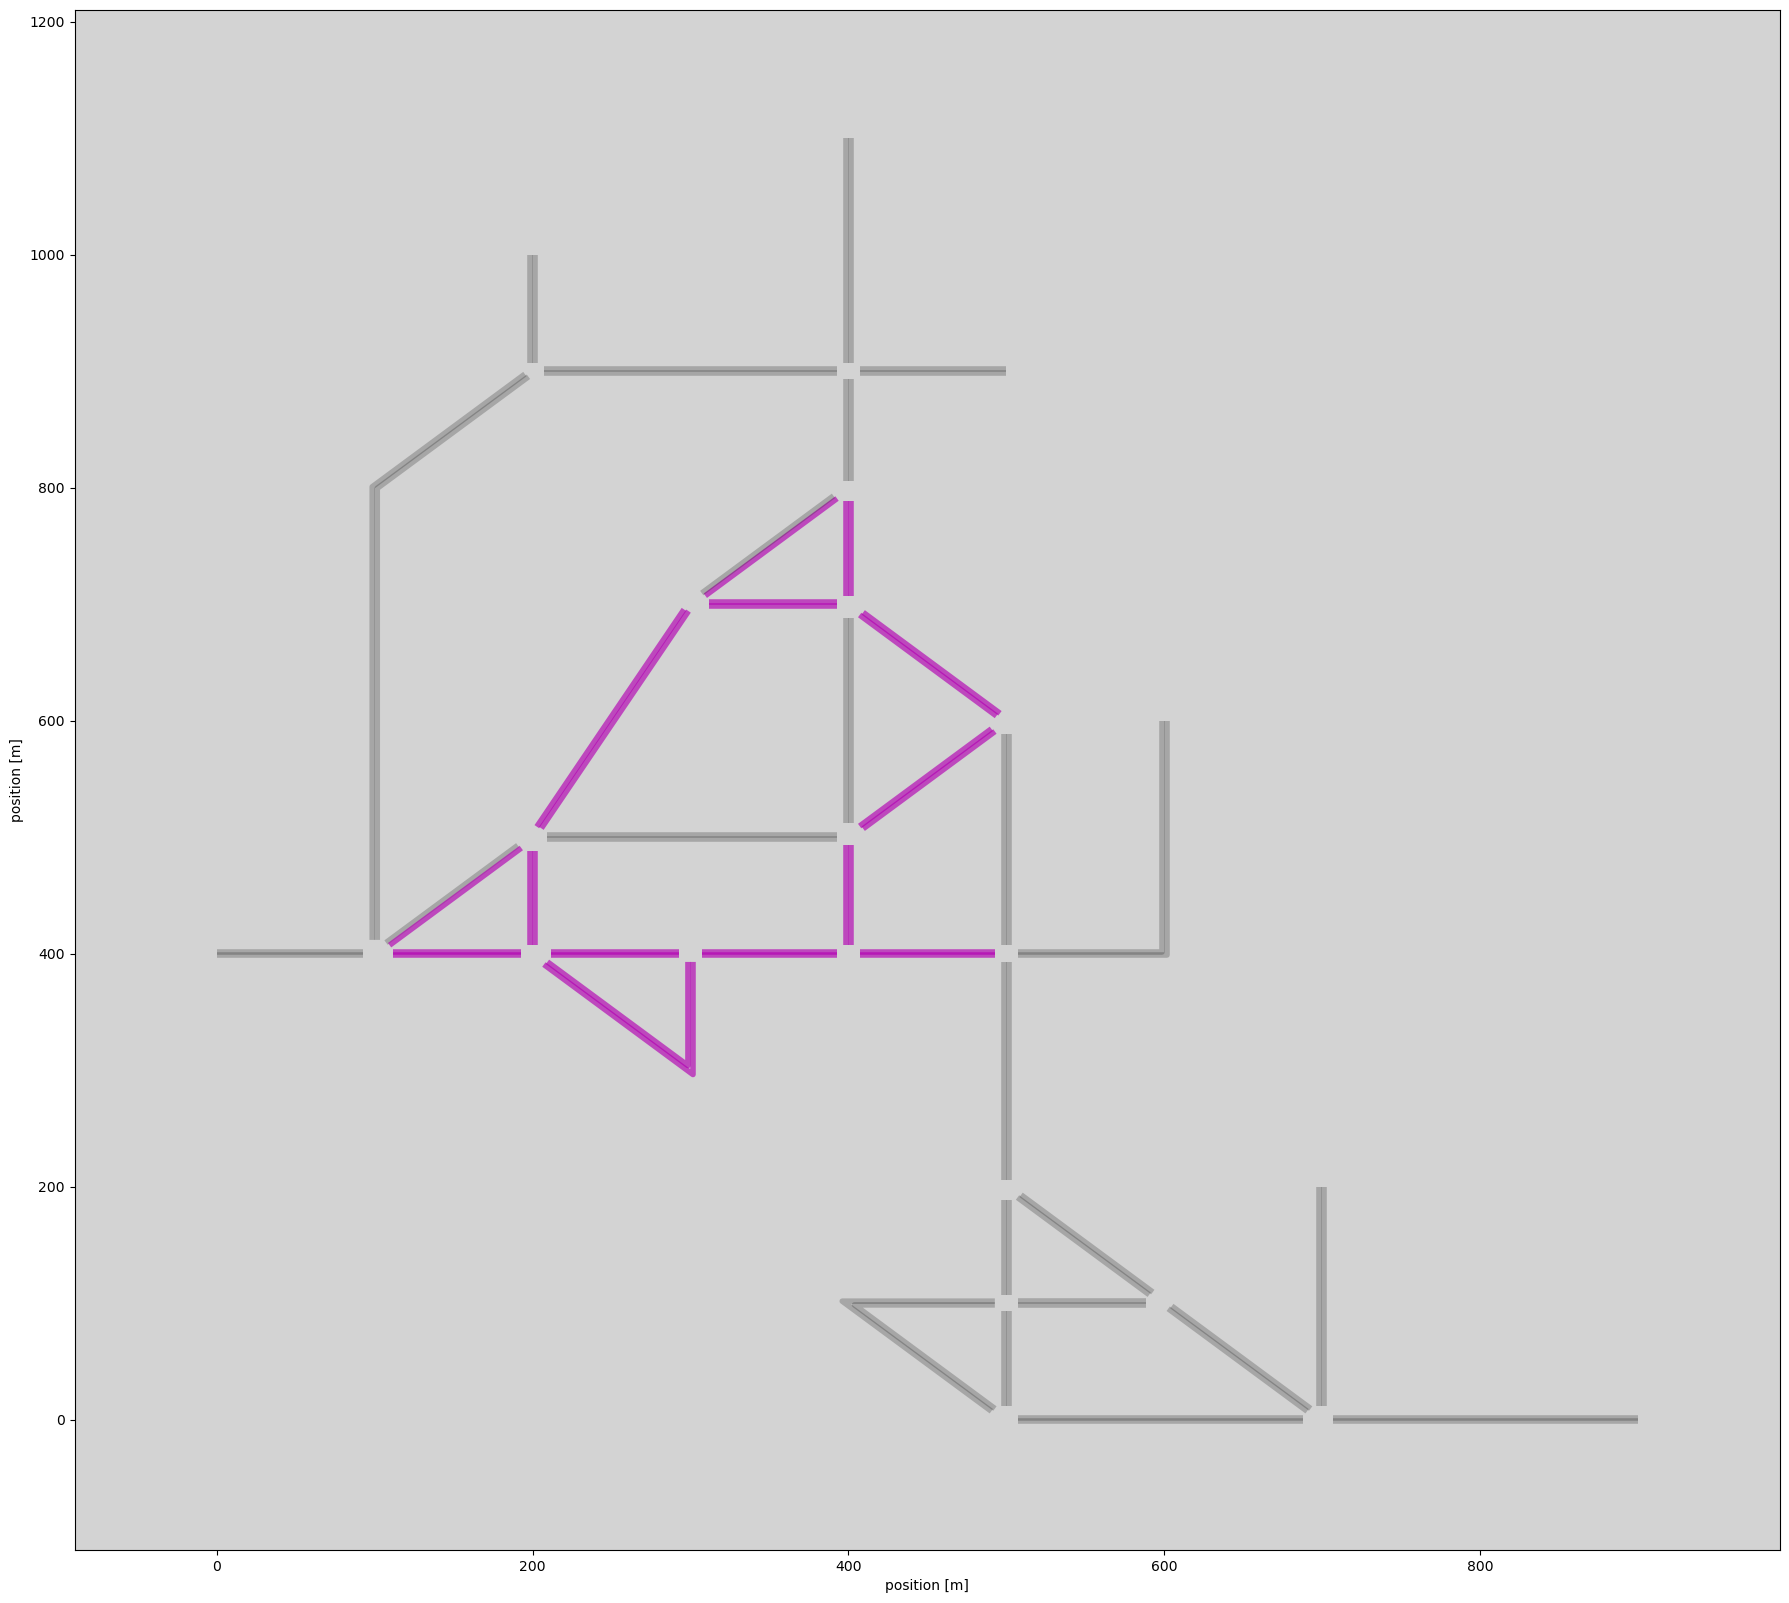

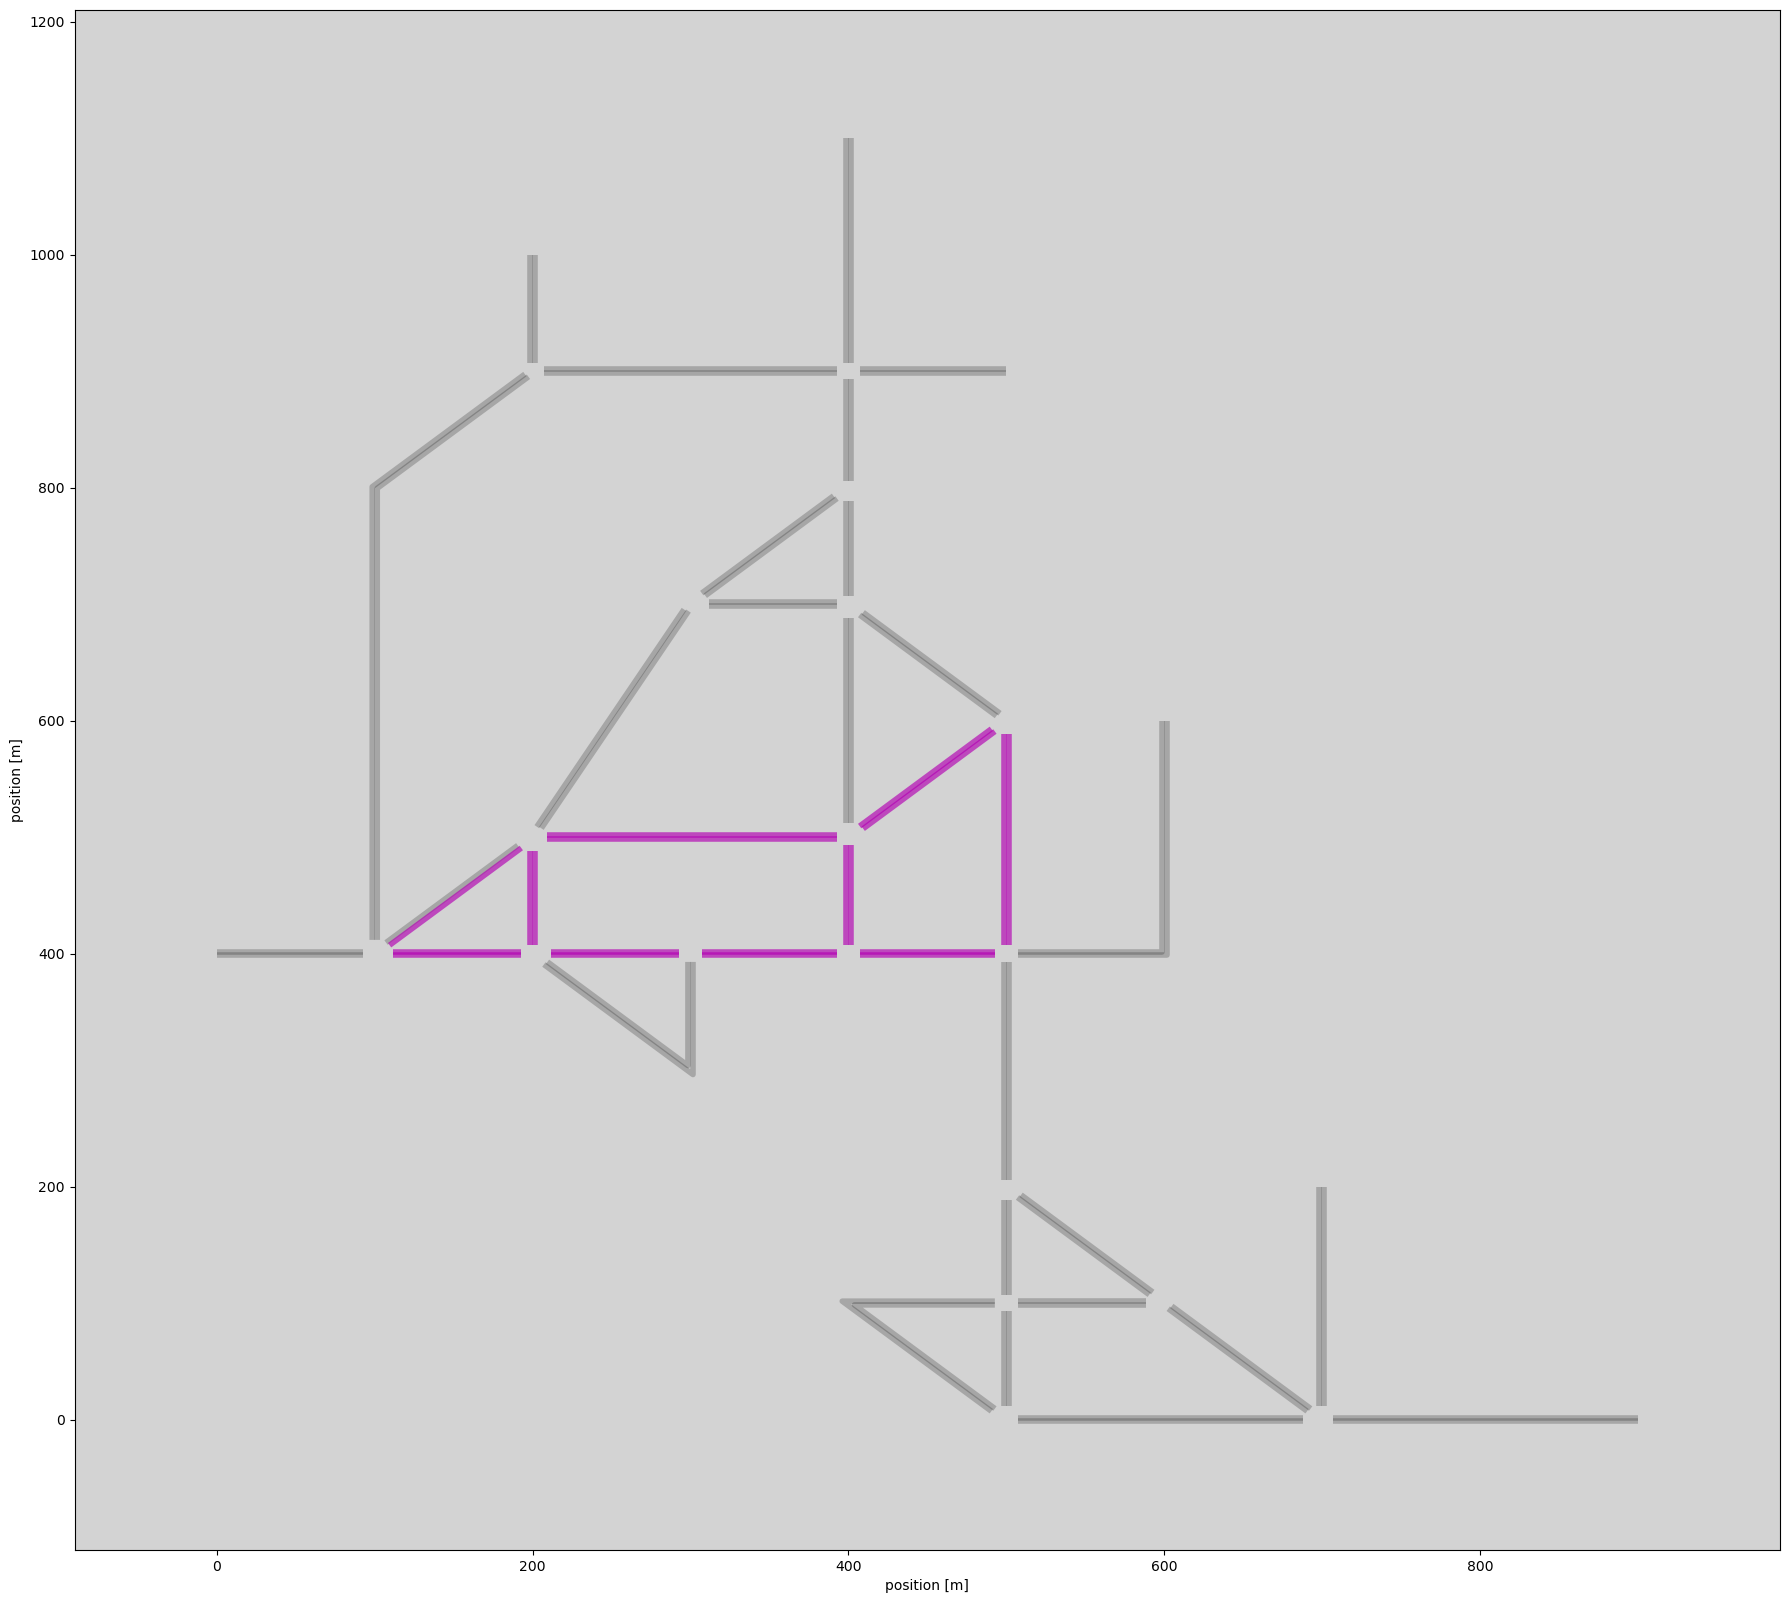

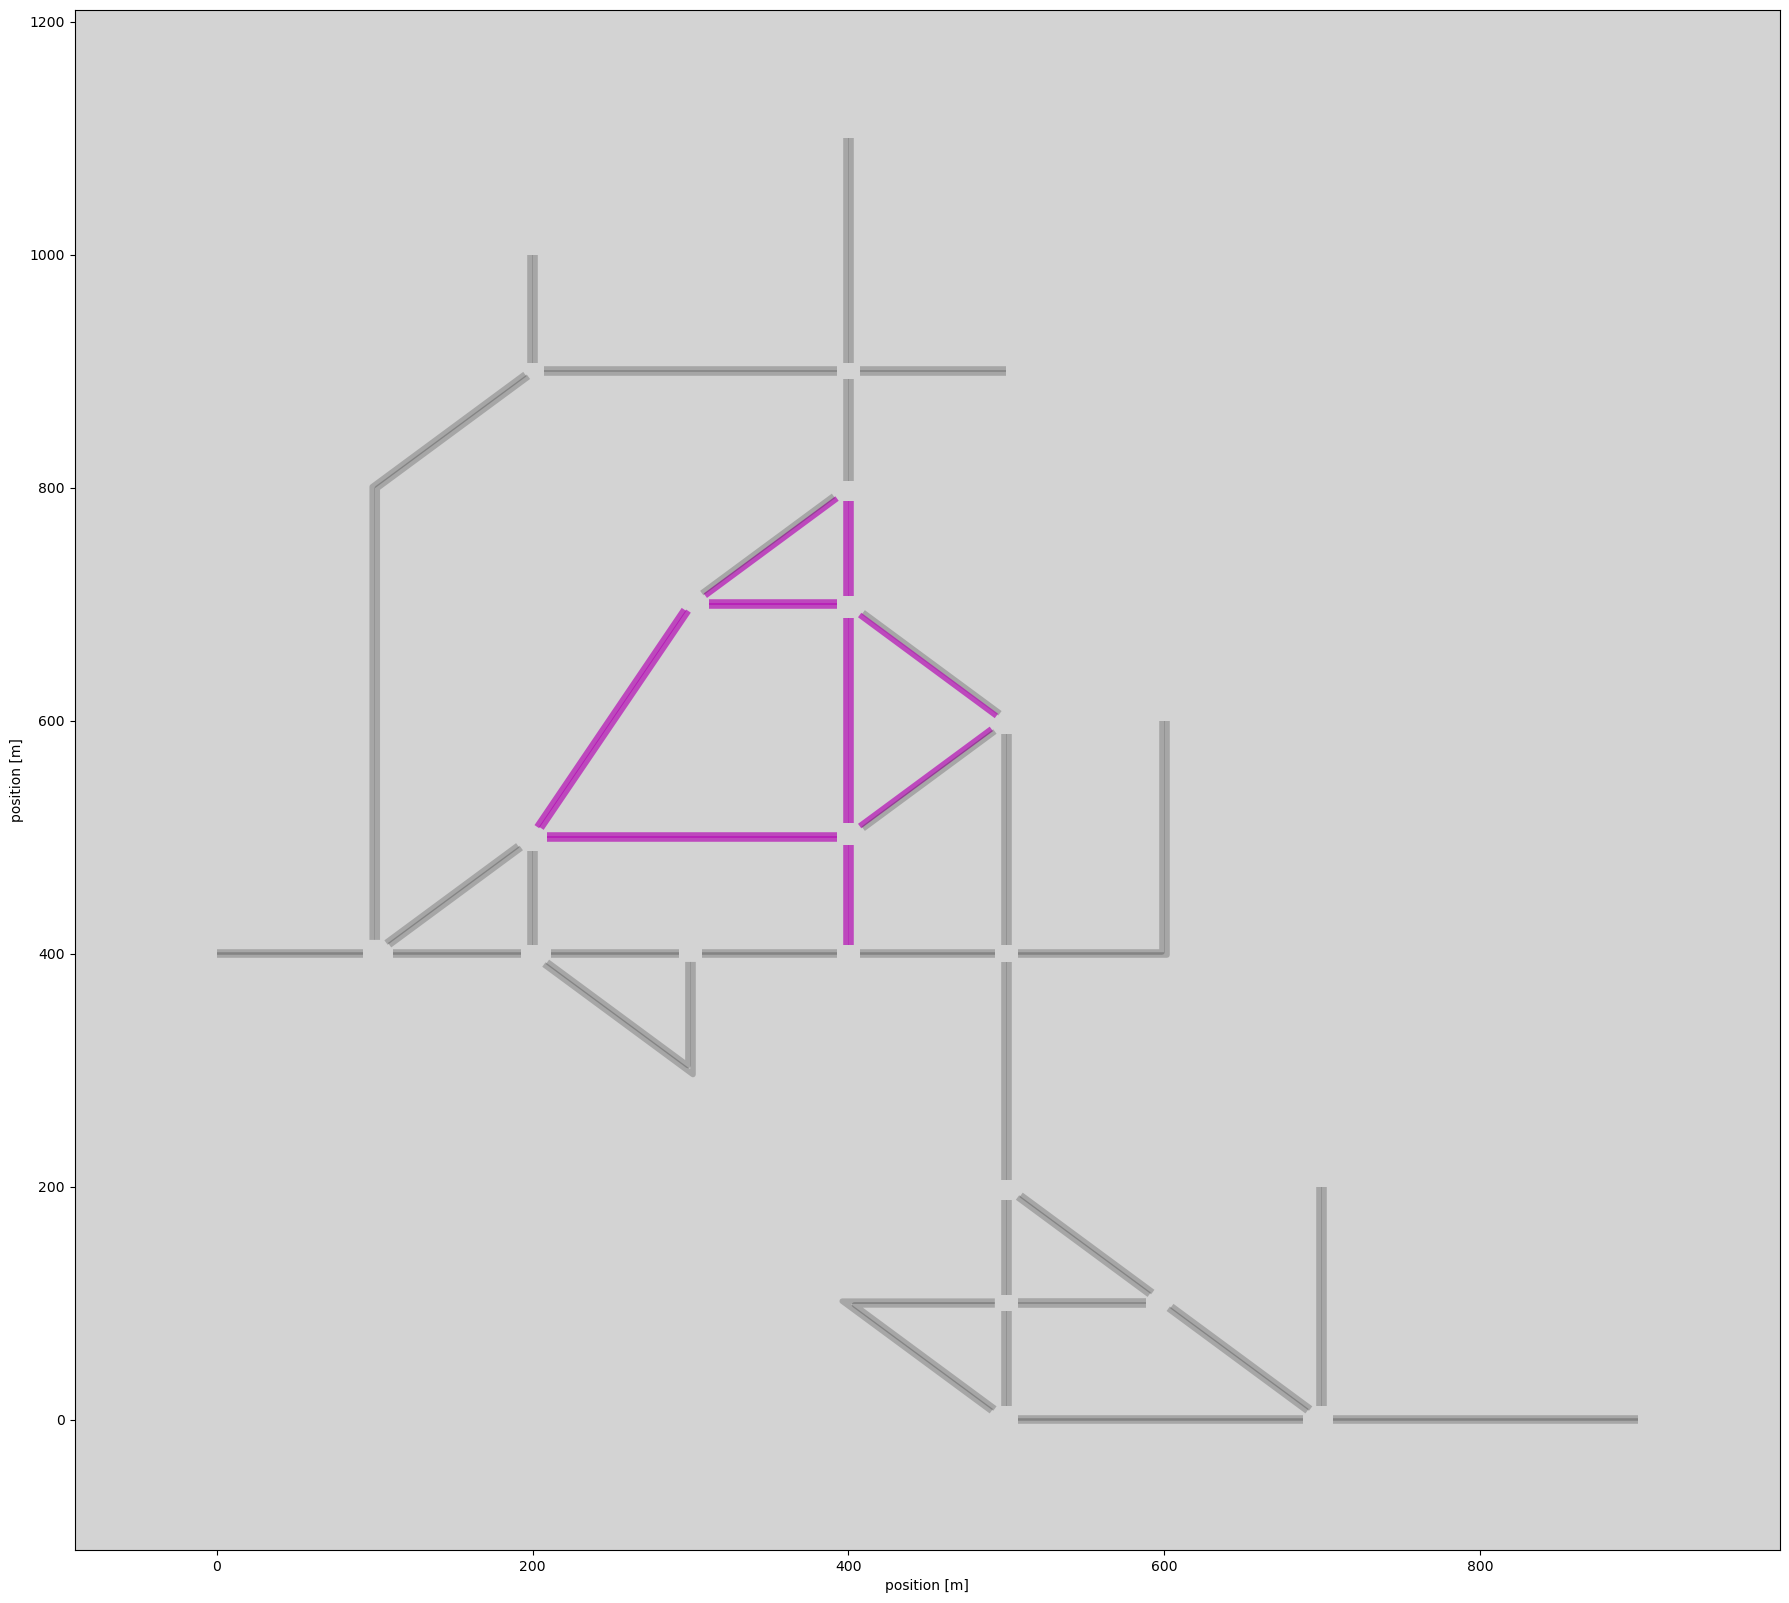

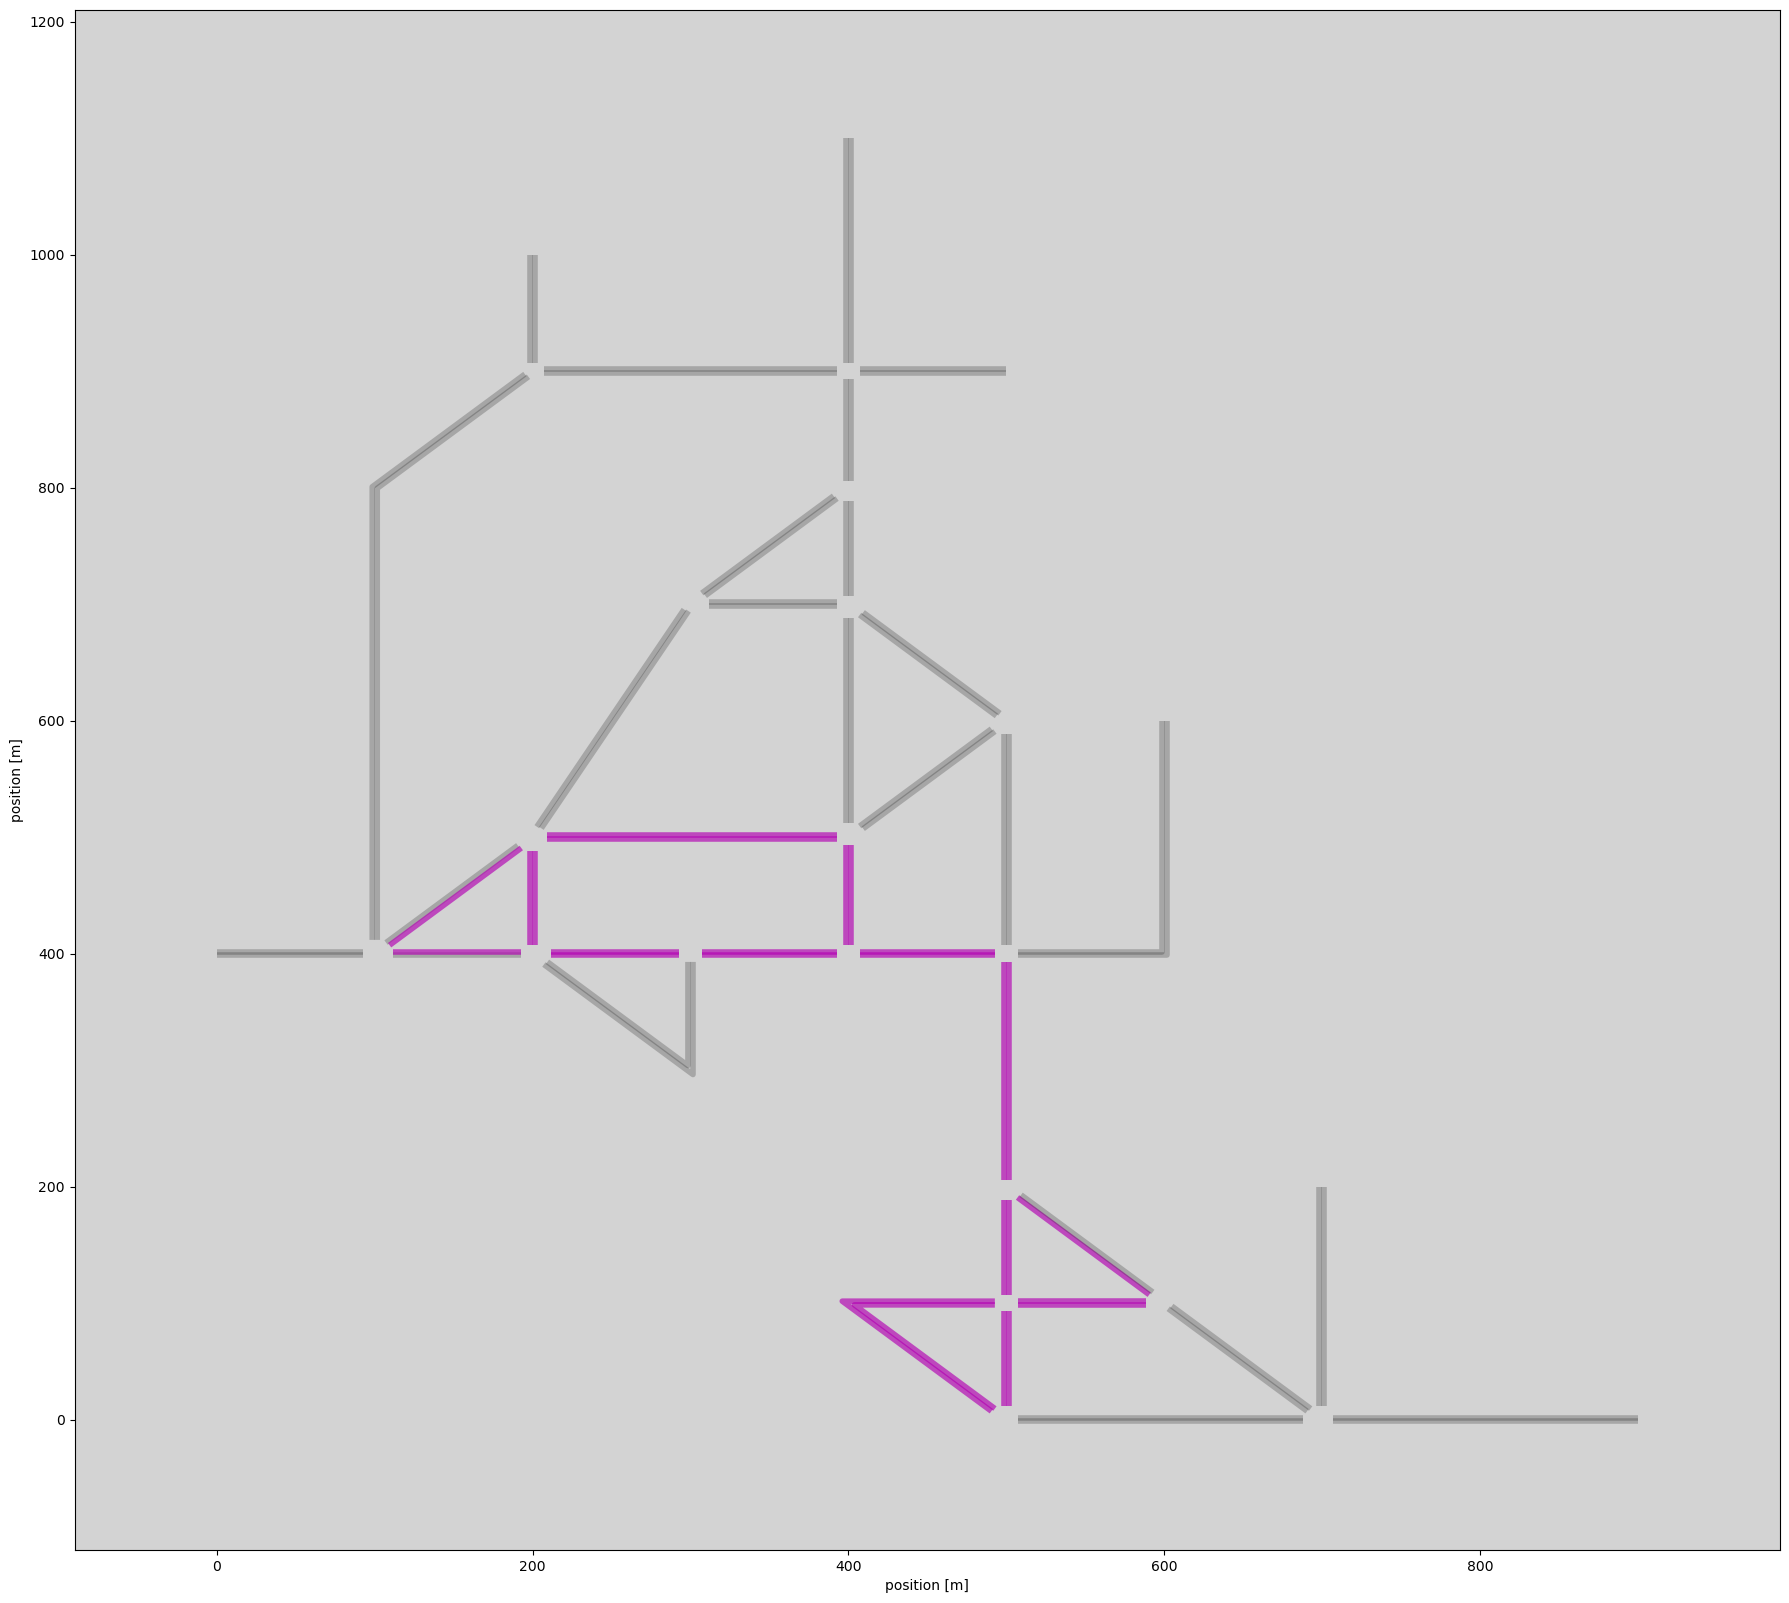

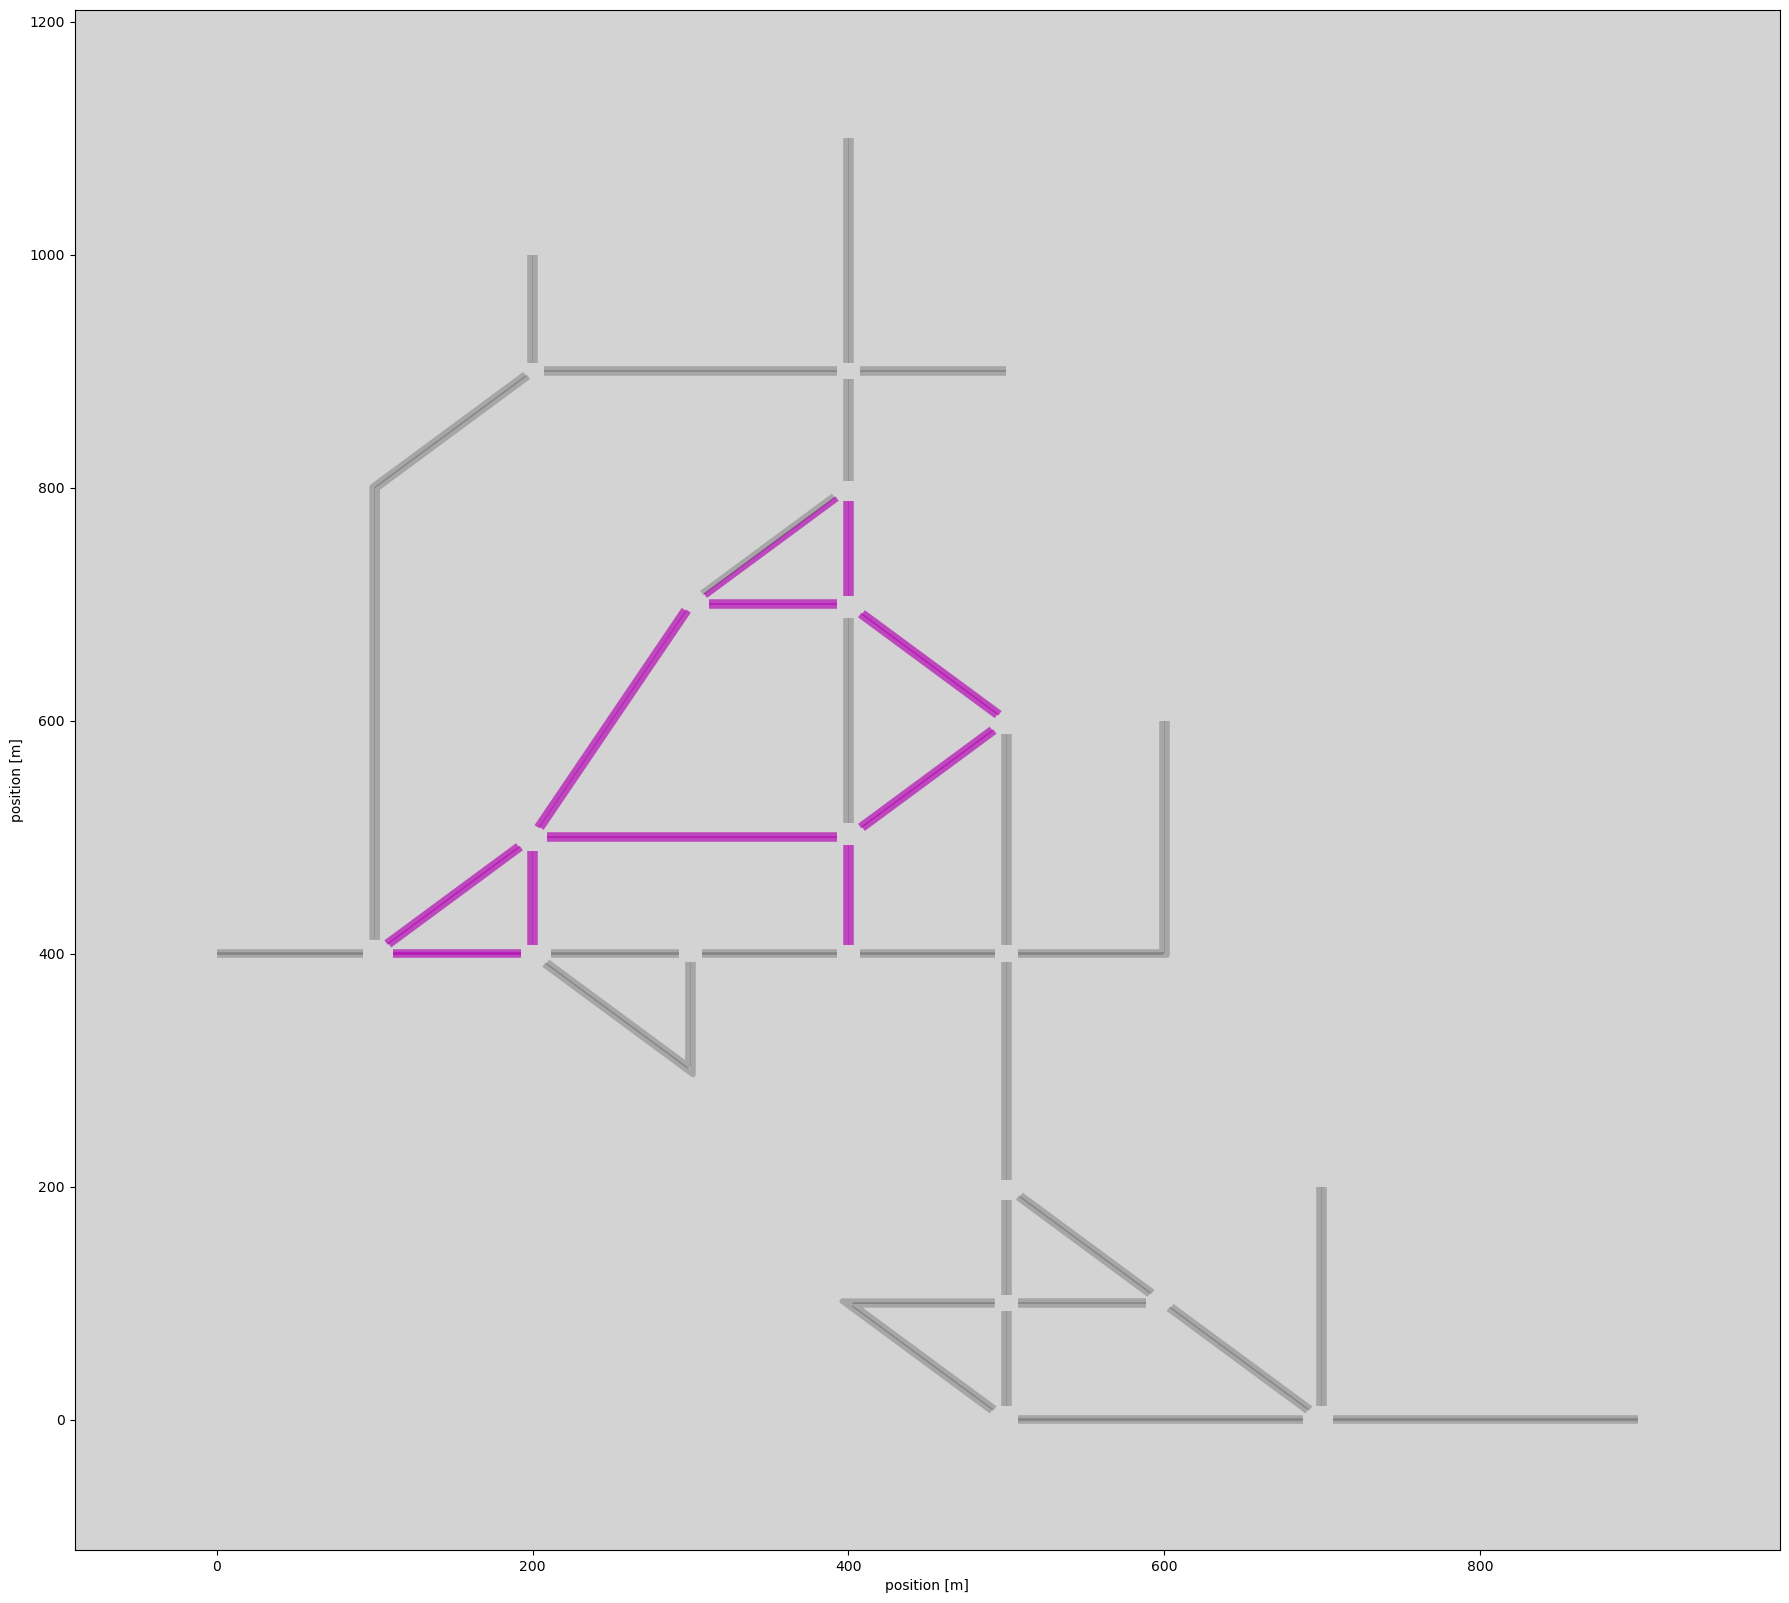

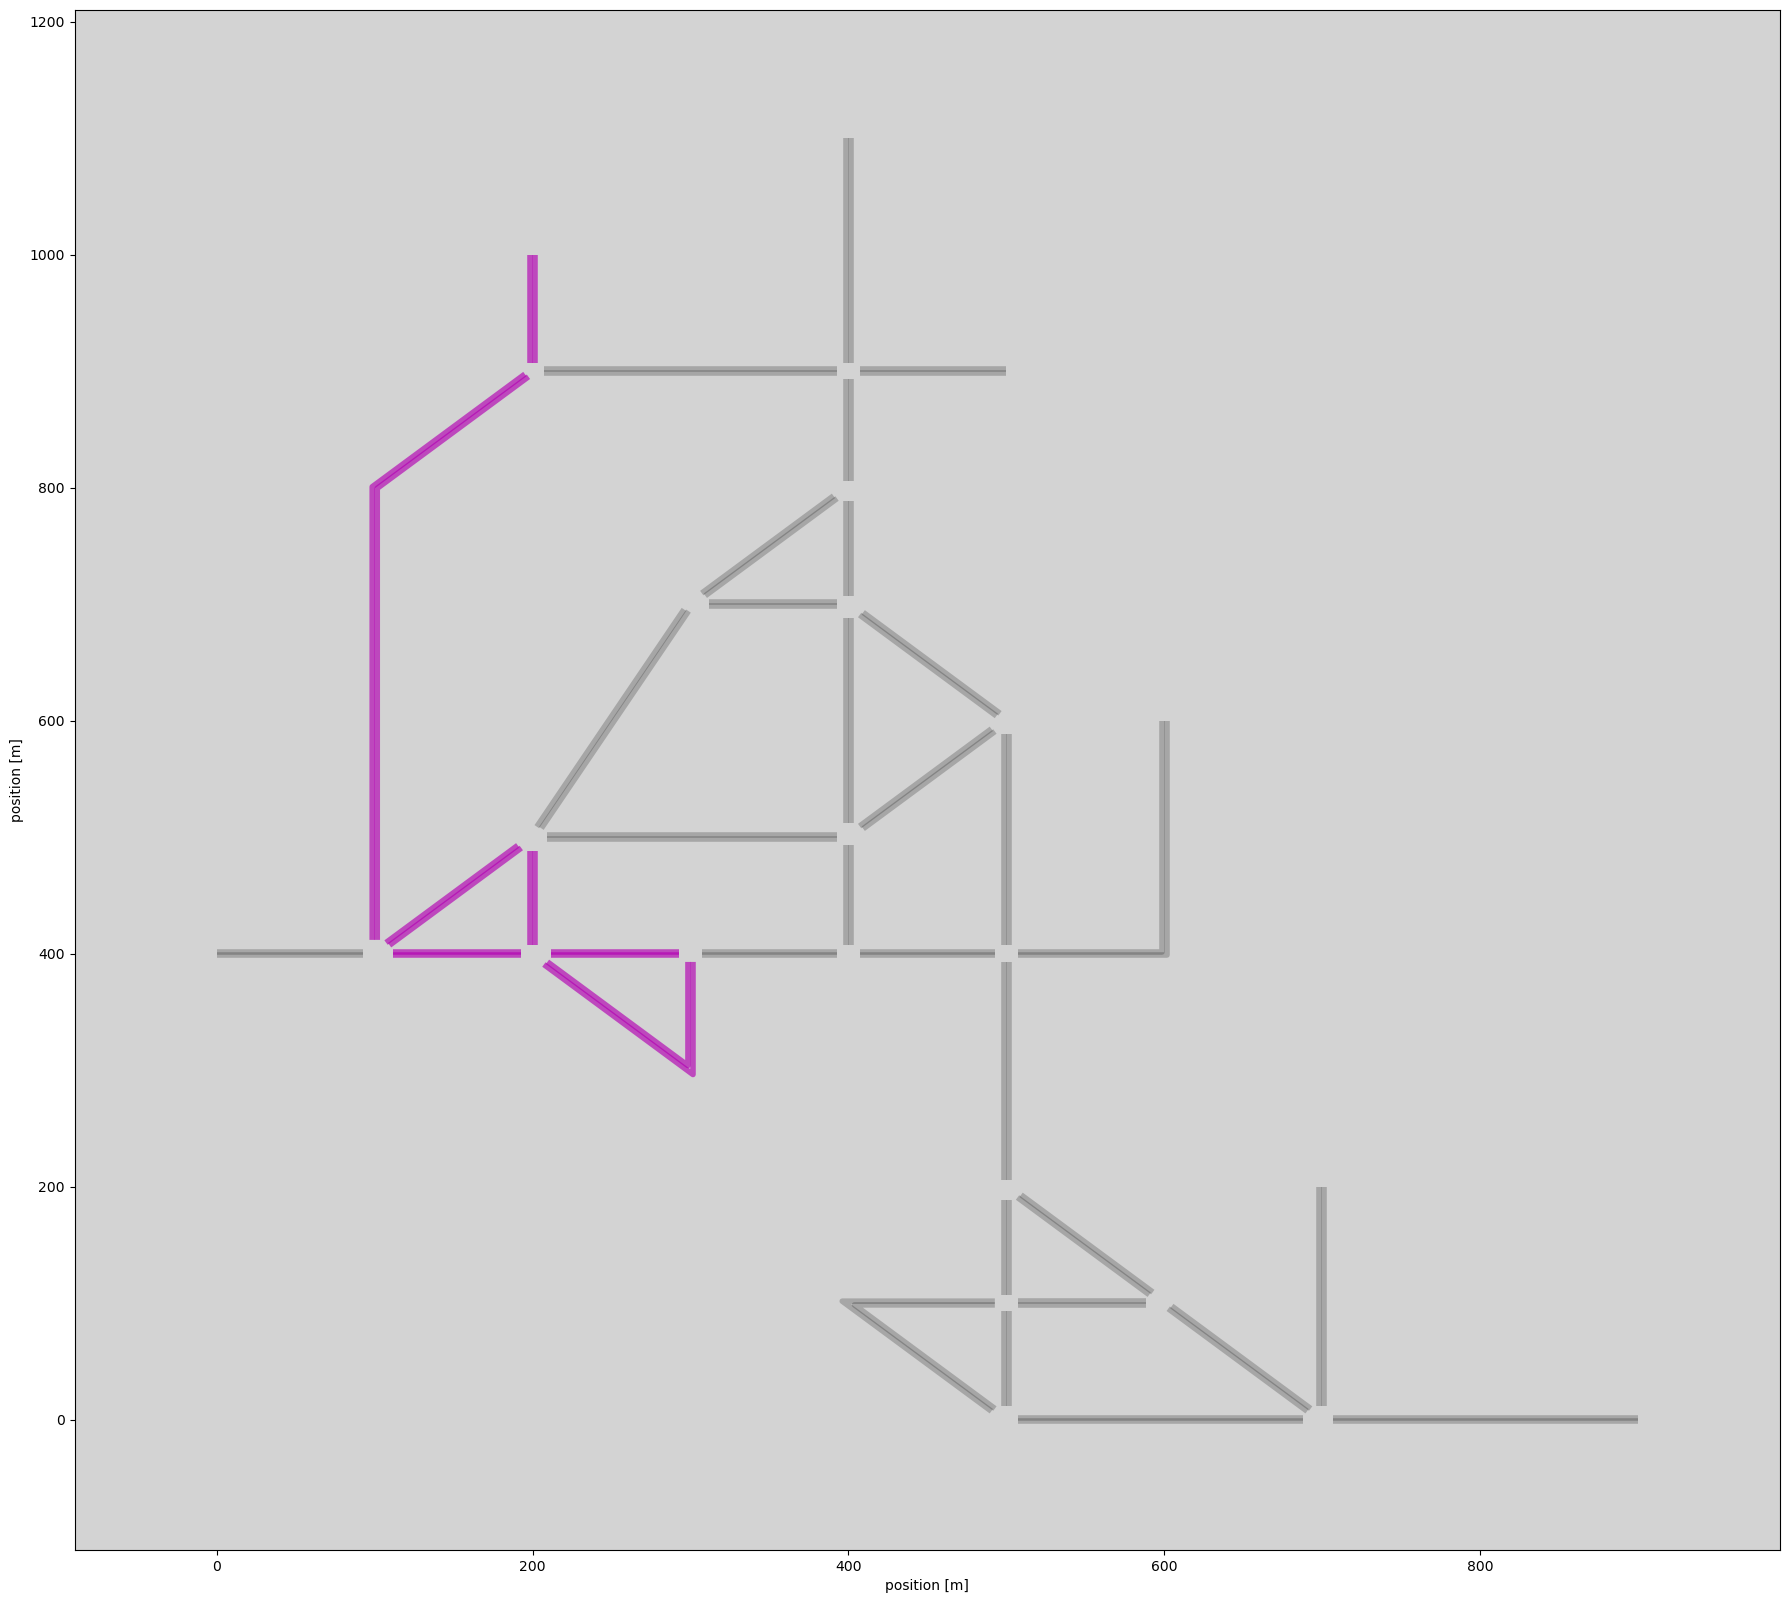

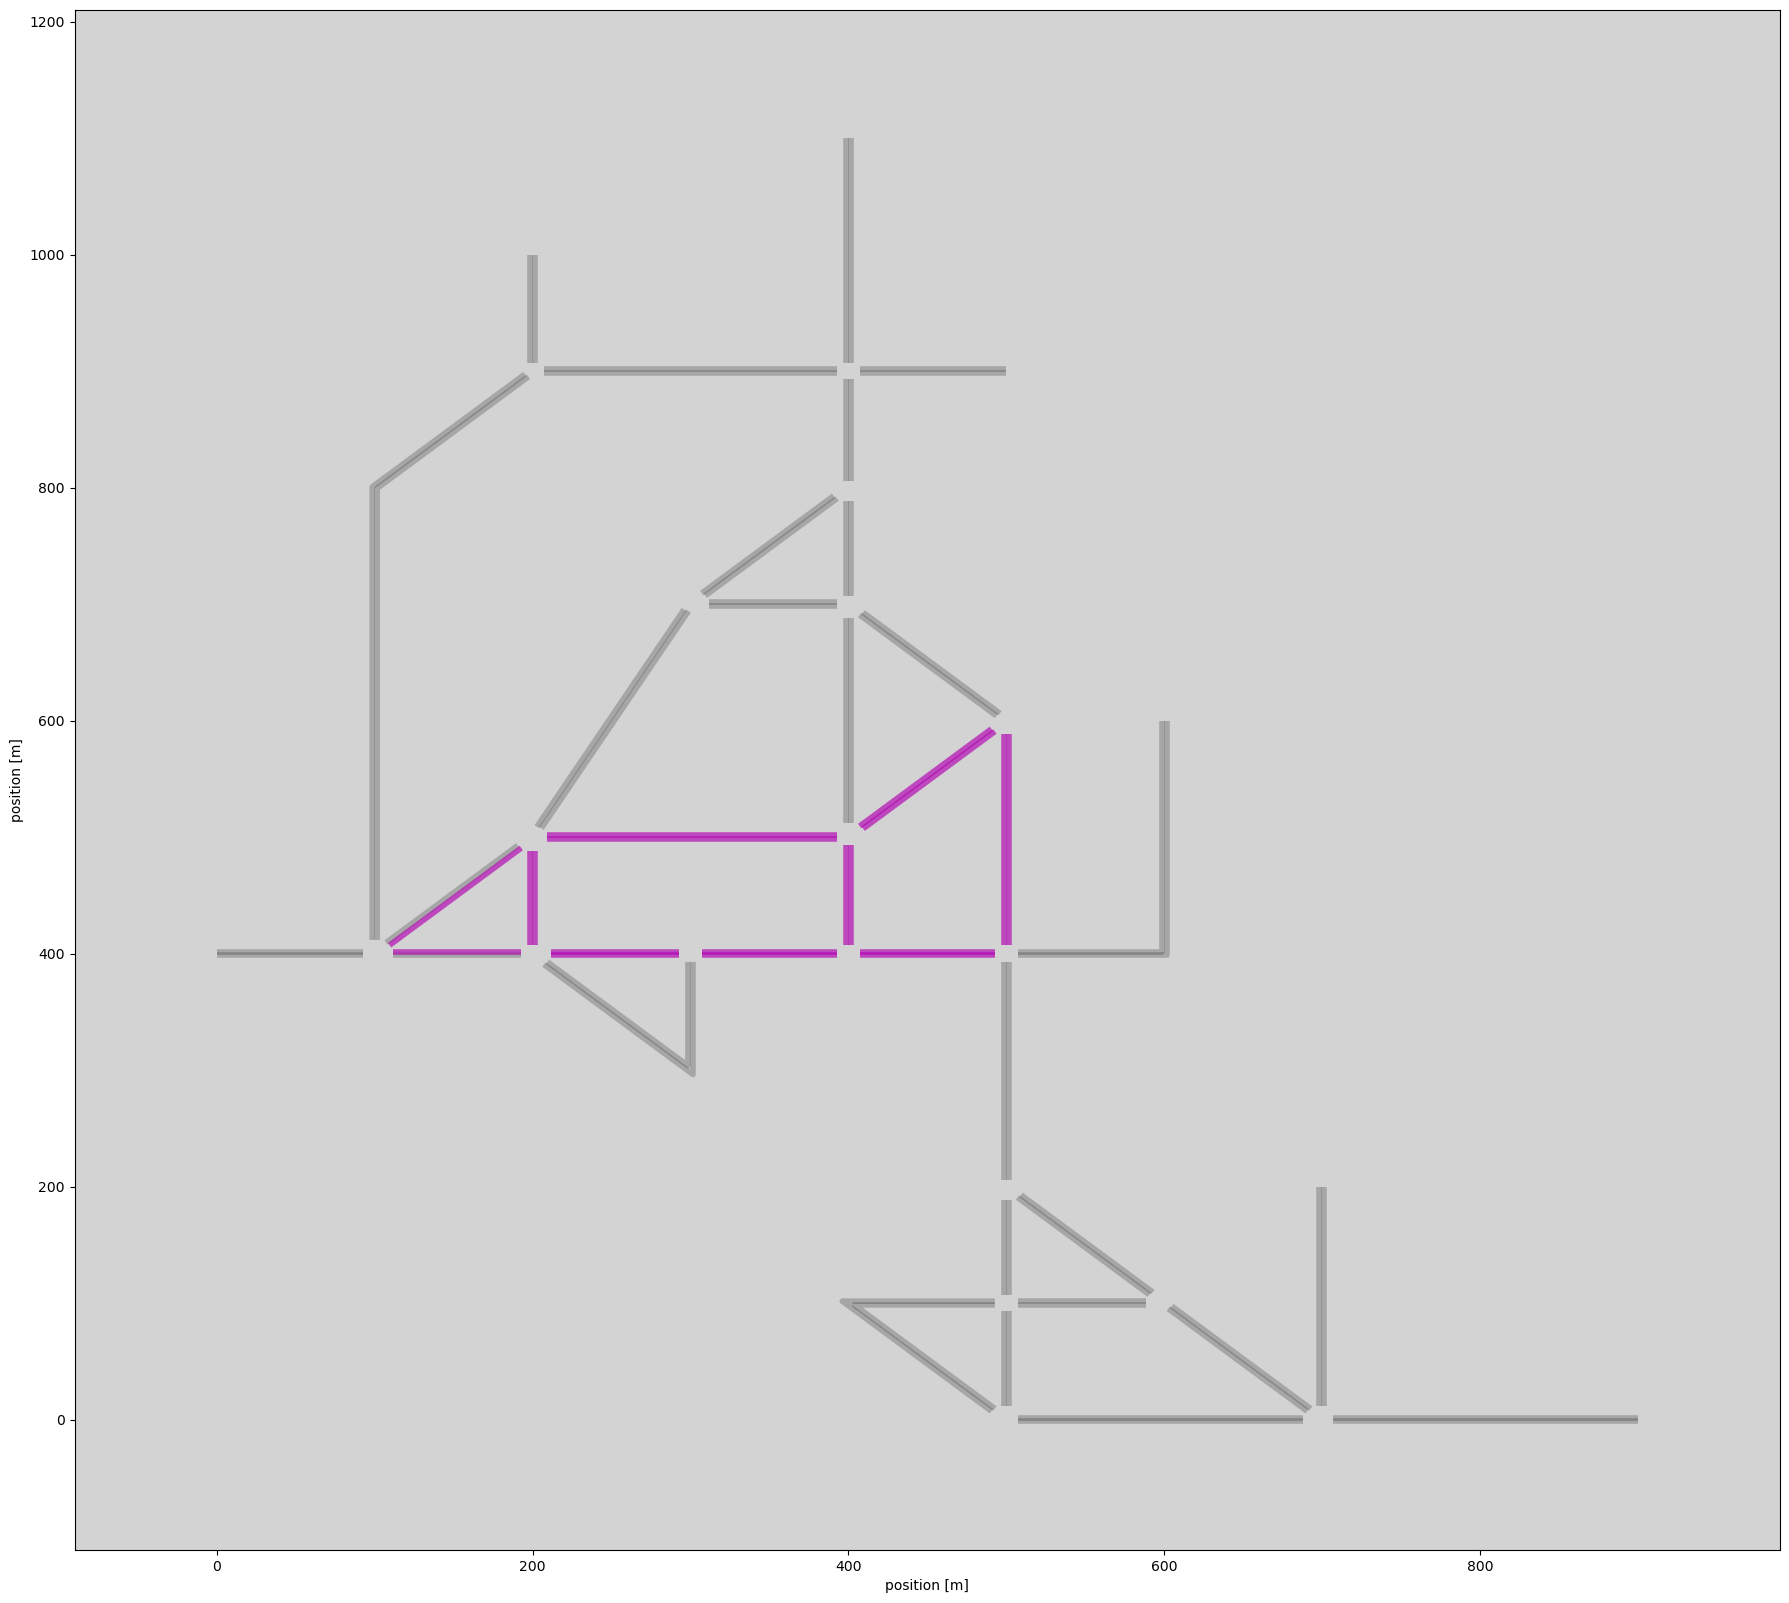

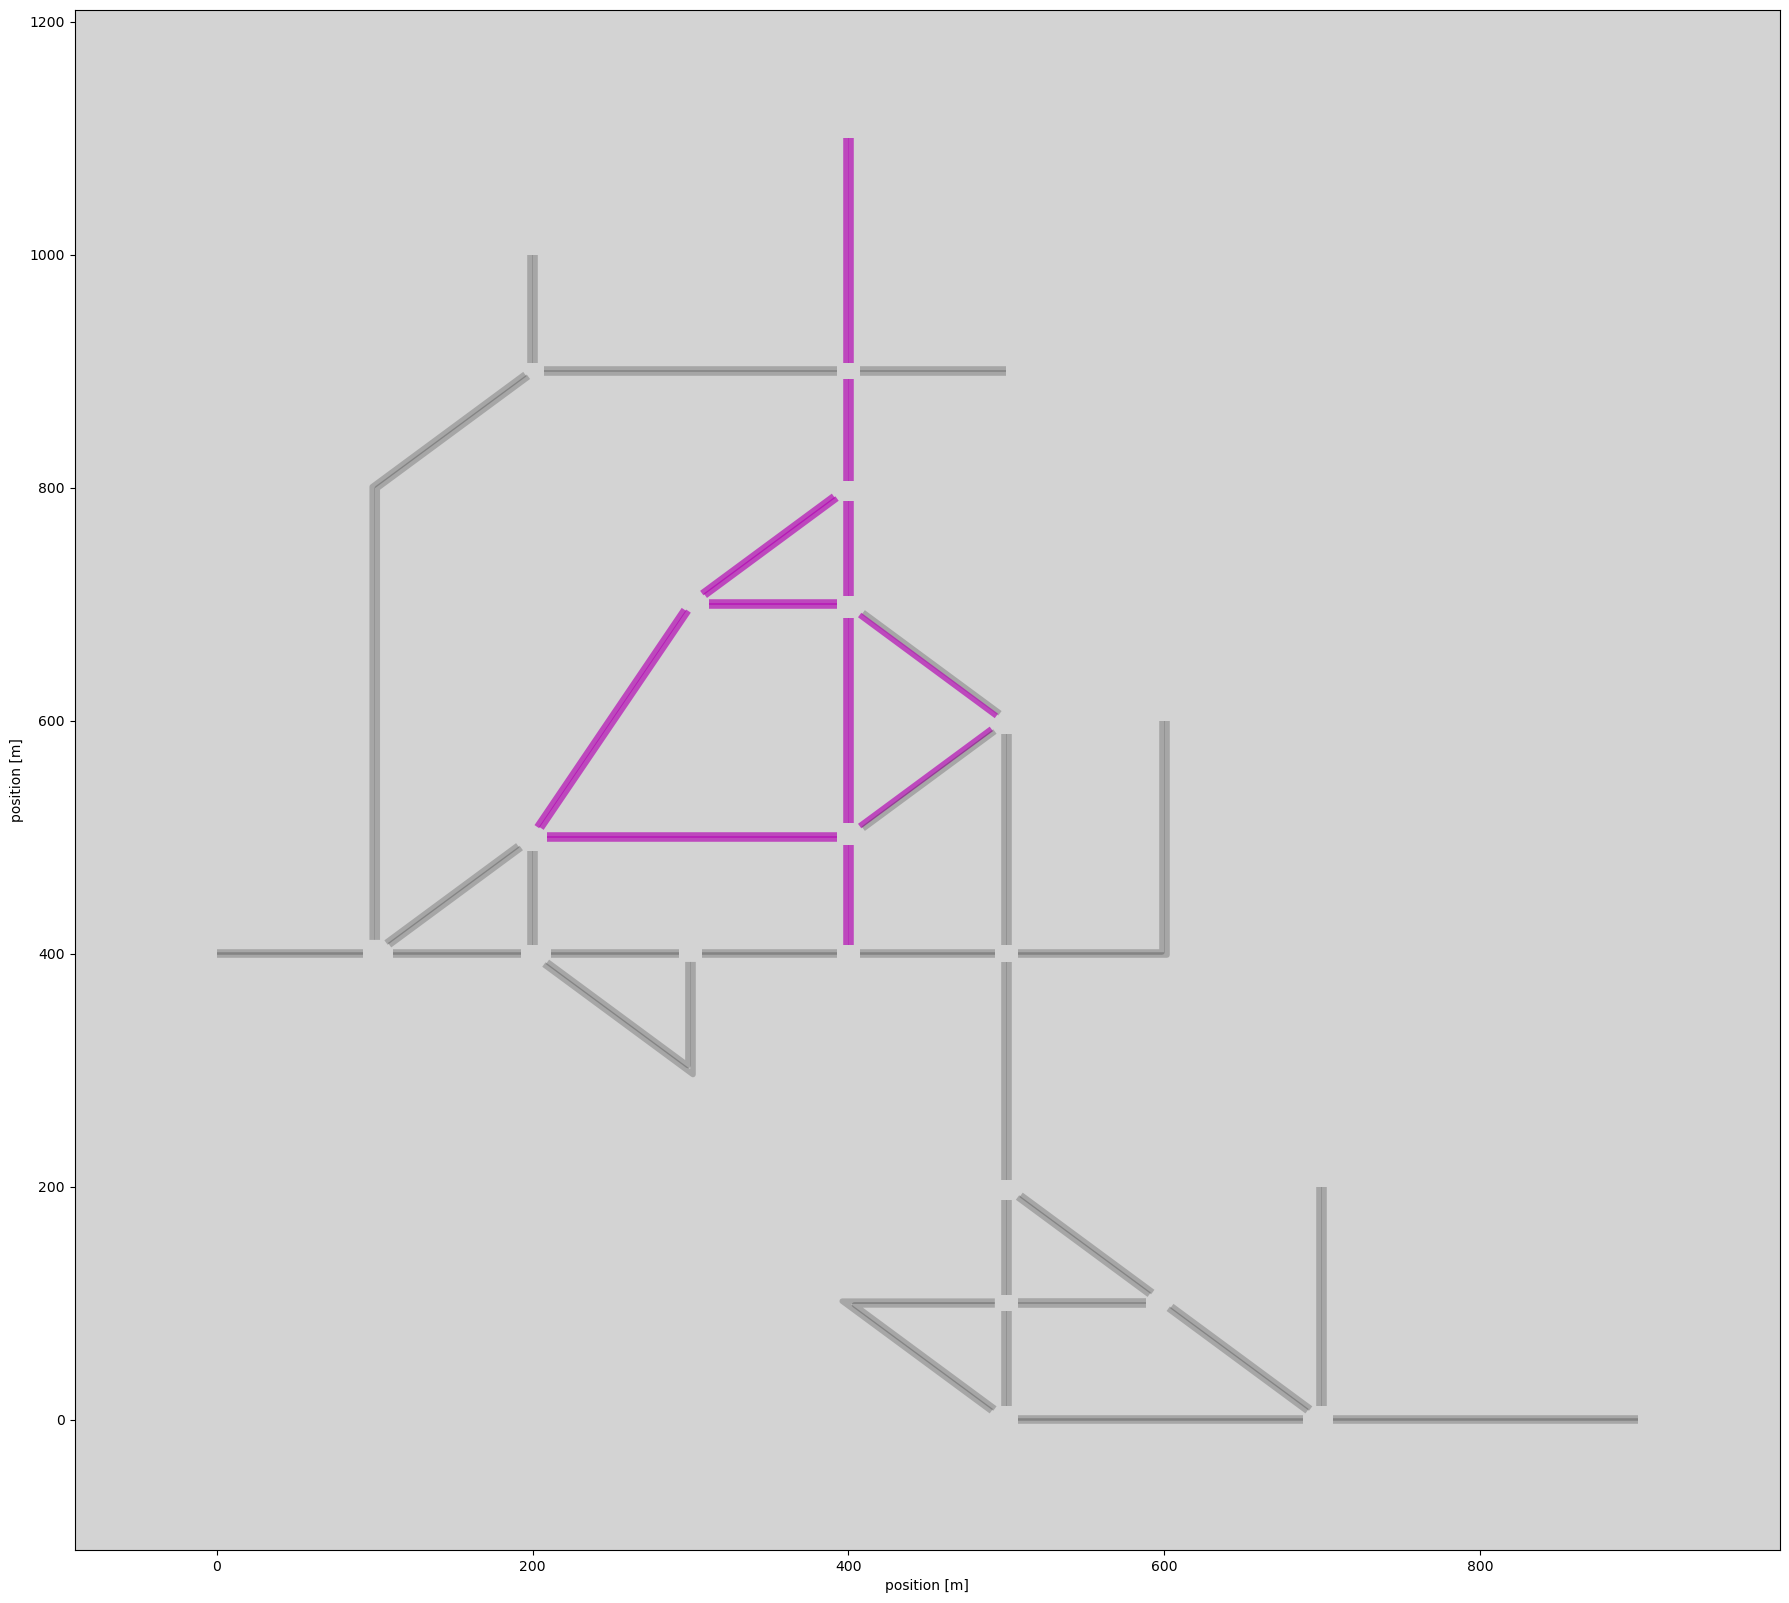

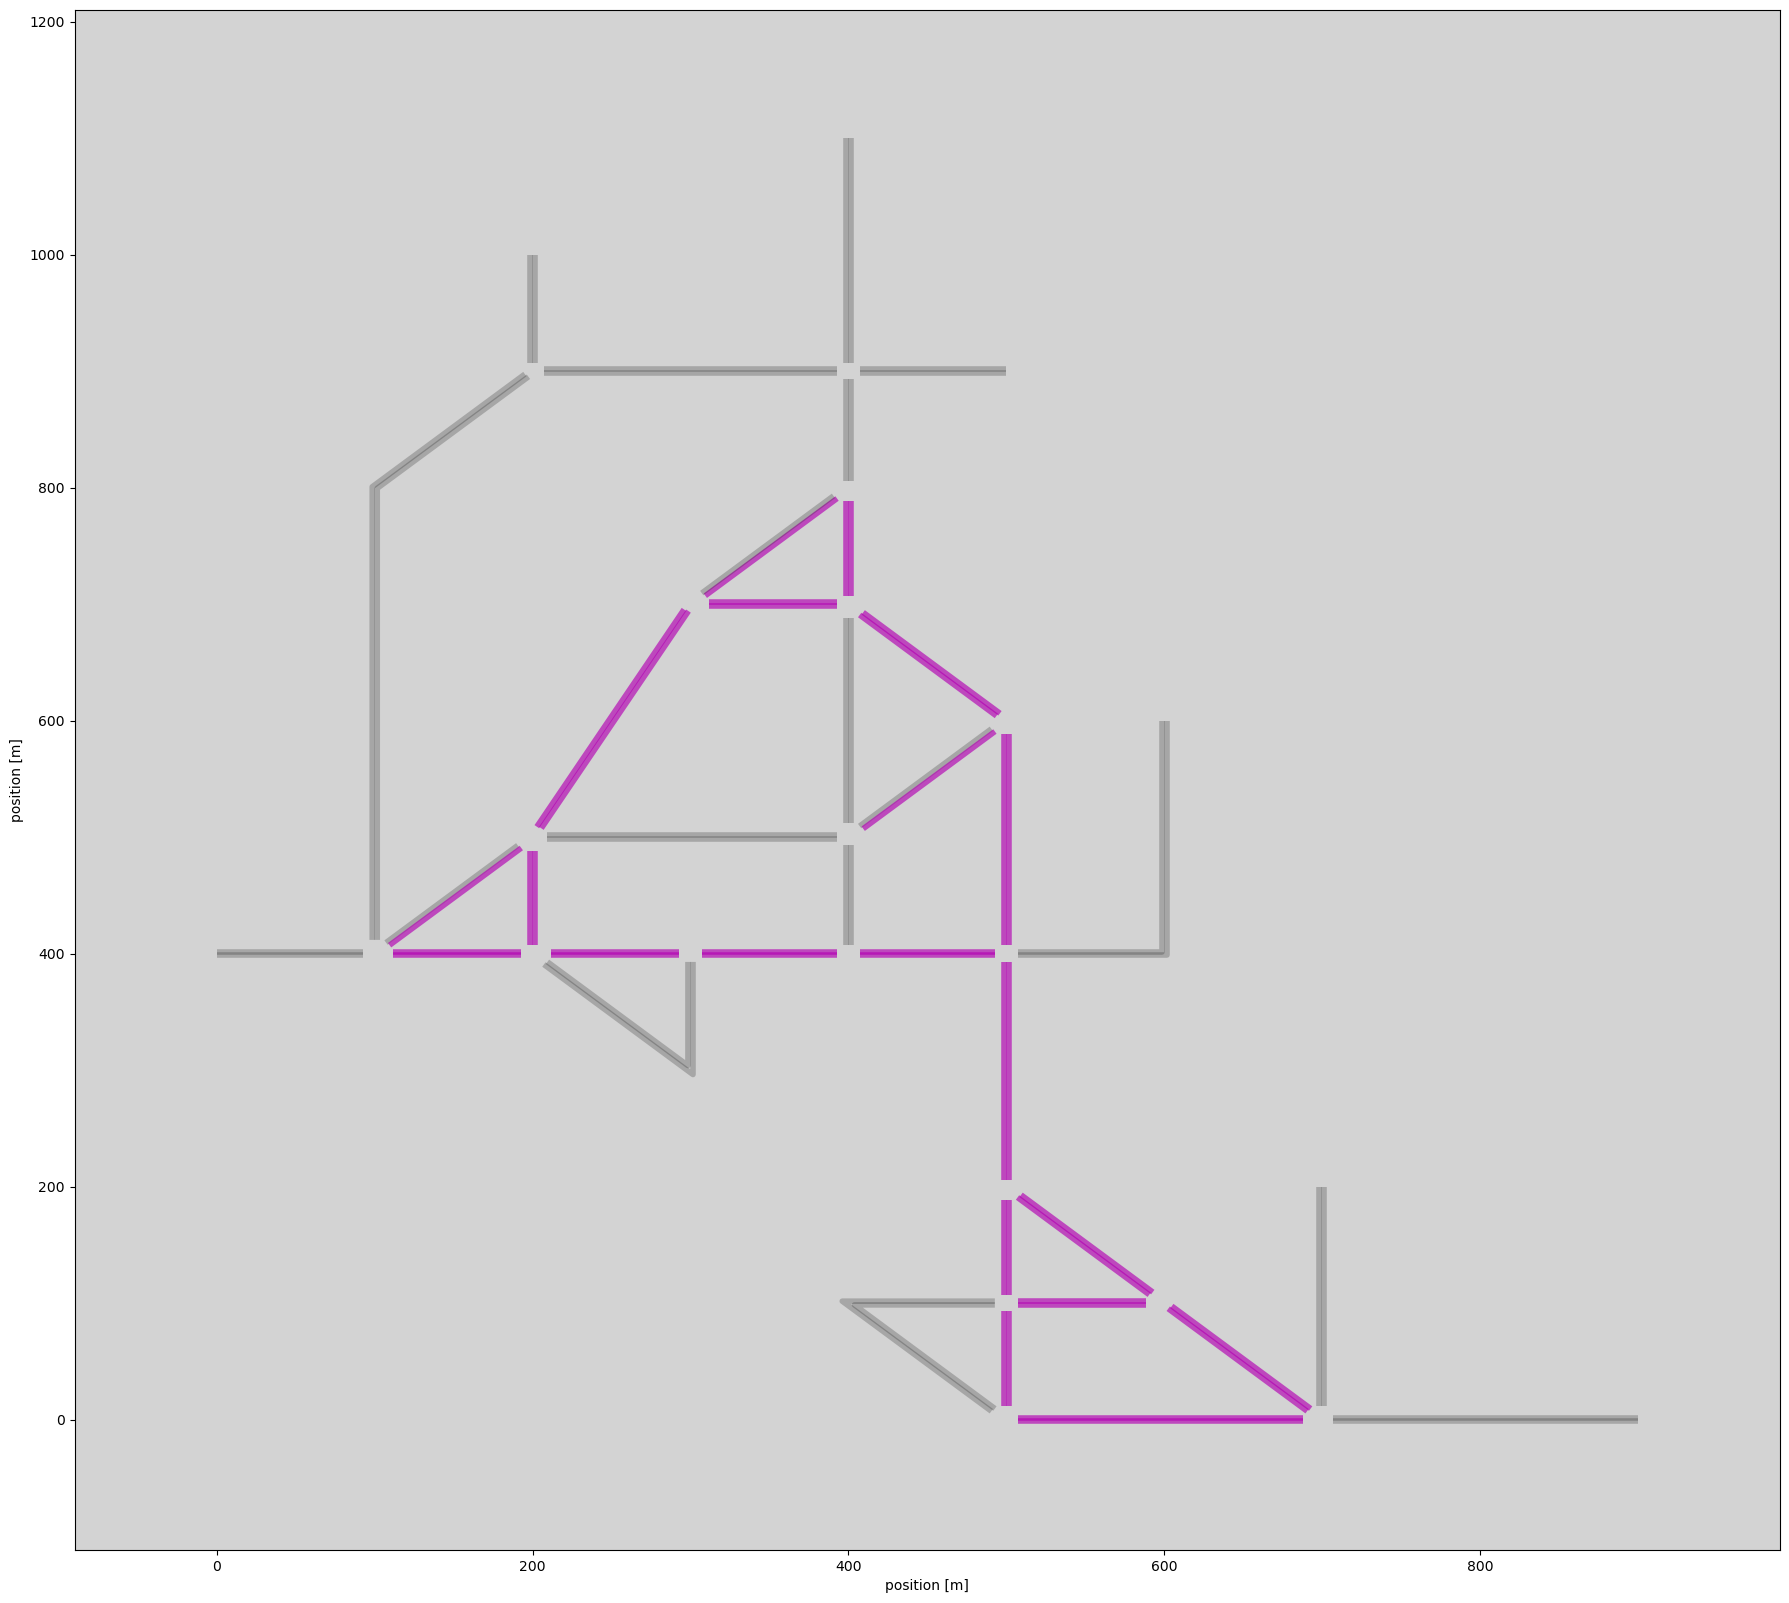

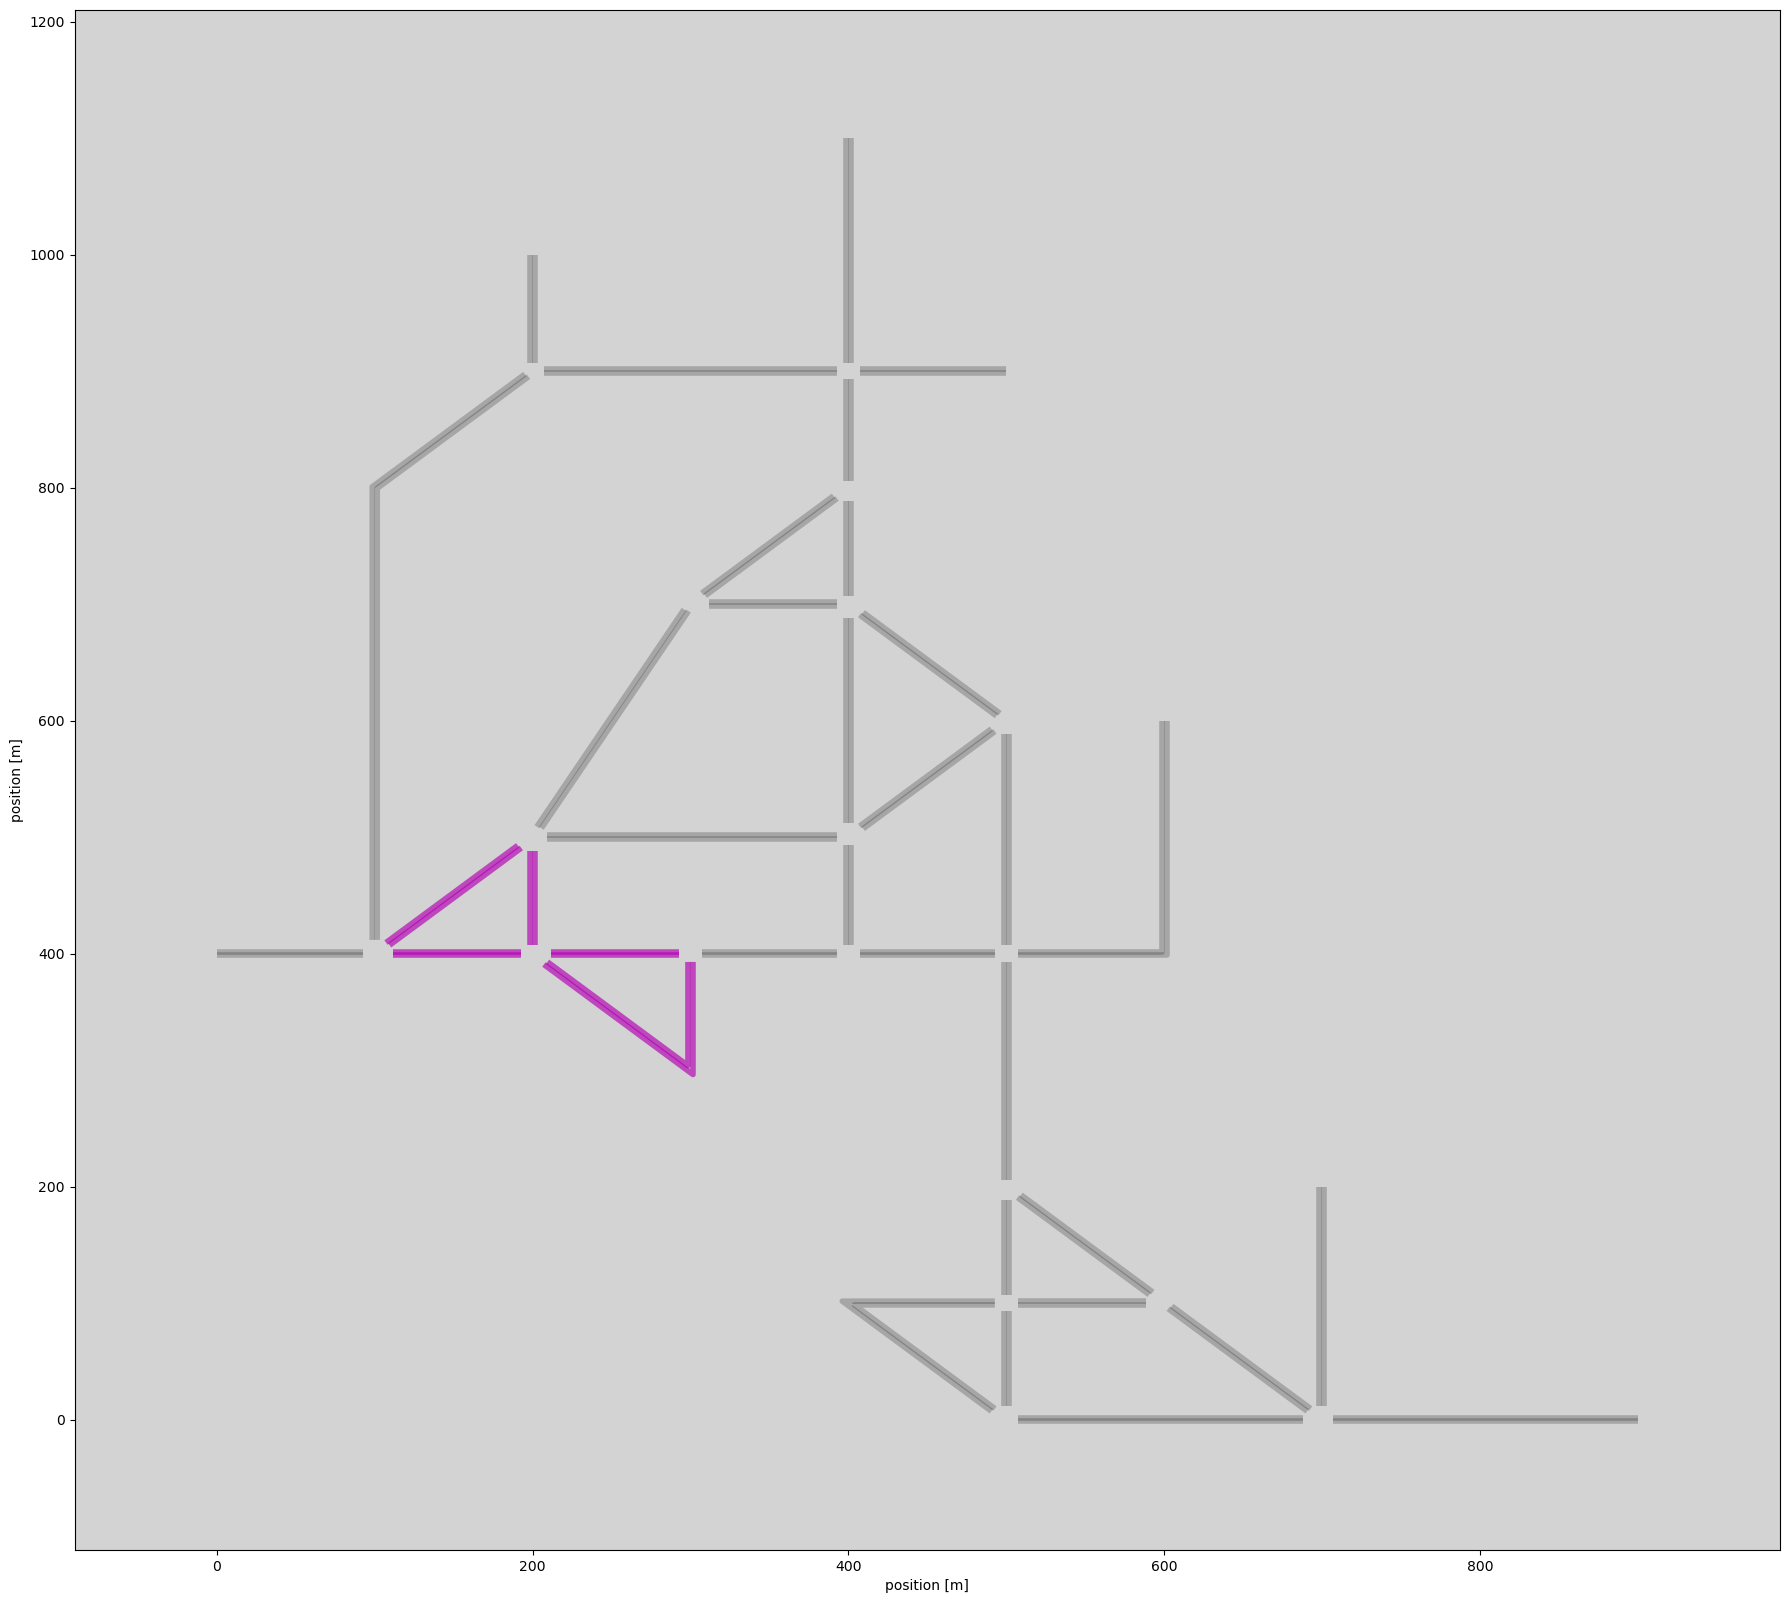

In [25]:
cluster1 = household_gl_df[household_gl_df["cluster"] == 1].index
for veh in cluster1:
    p_veh_data = p_data[p_data["veh_id"] == veh]
    print(len(p_veh_data), "/", len(p_veh_data["parking_id"].unique()))
    veh_lots = p_veh_data["parking_id"]
    visualization.plot_dataset(NET_FILE, veh_lots, parking_positions)

#### Cluster0

9600 / 40
7222 / 21
14212 / 44
1014 / 29
5557 / 35
6908 / 35
5662 / 21
9390 / 42
6654 / 20
5517 / 31


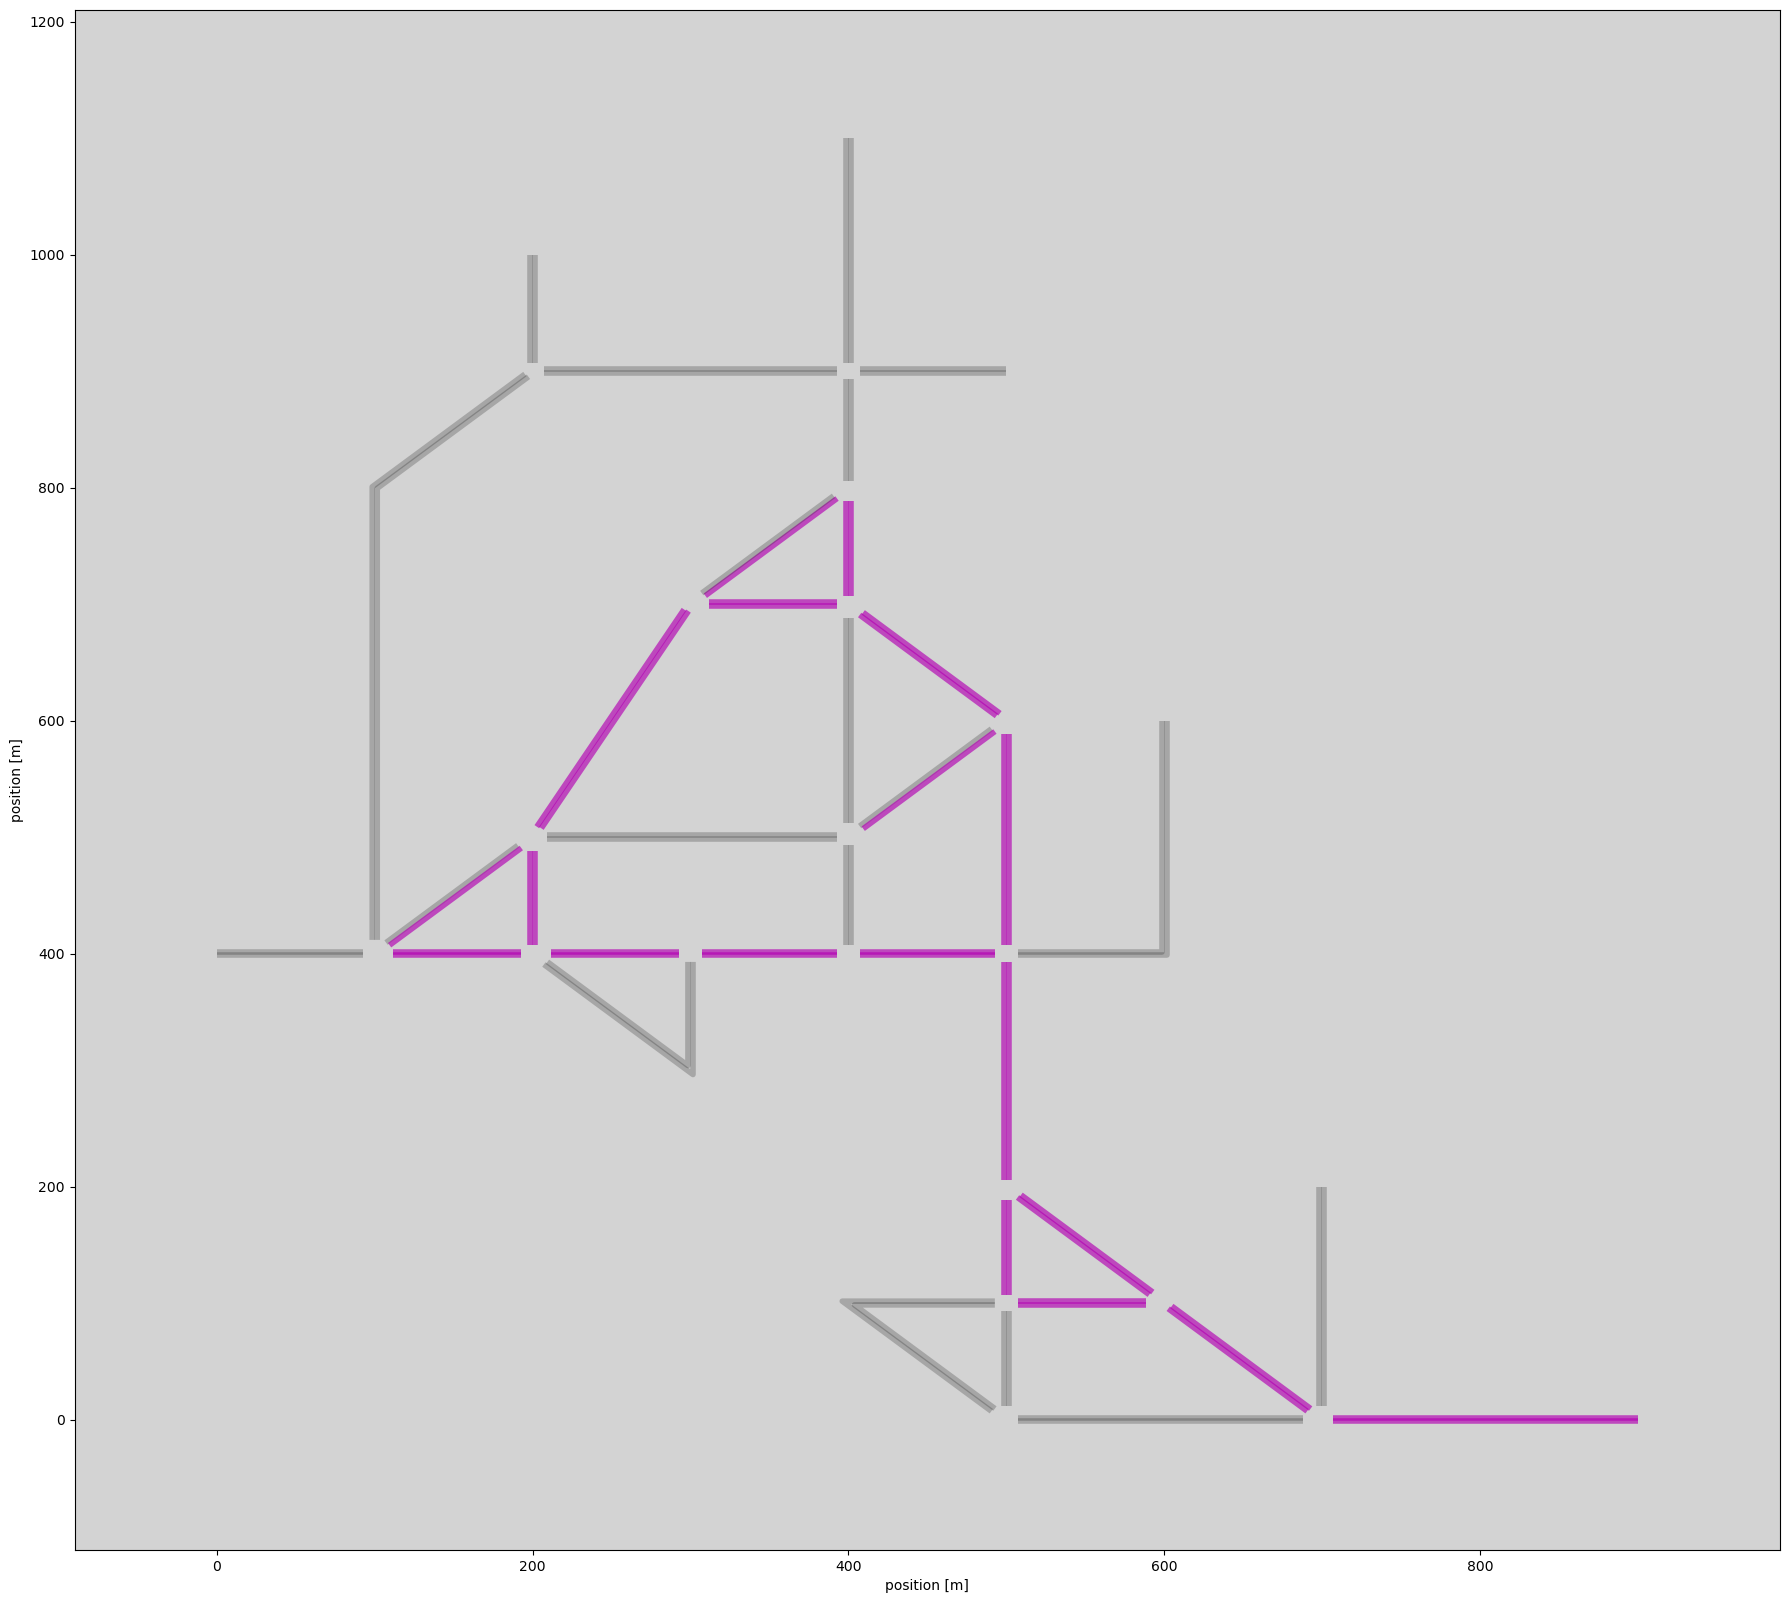

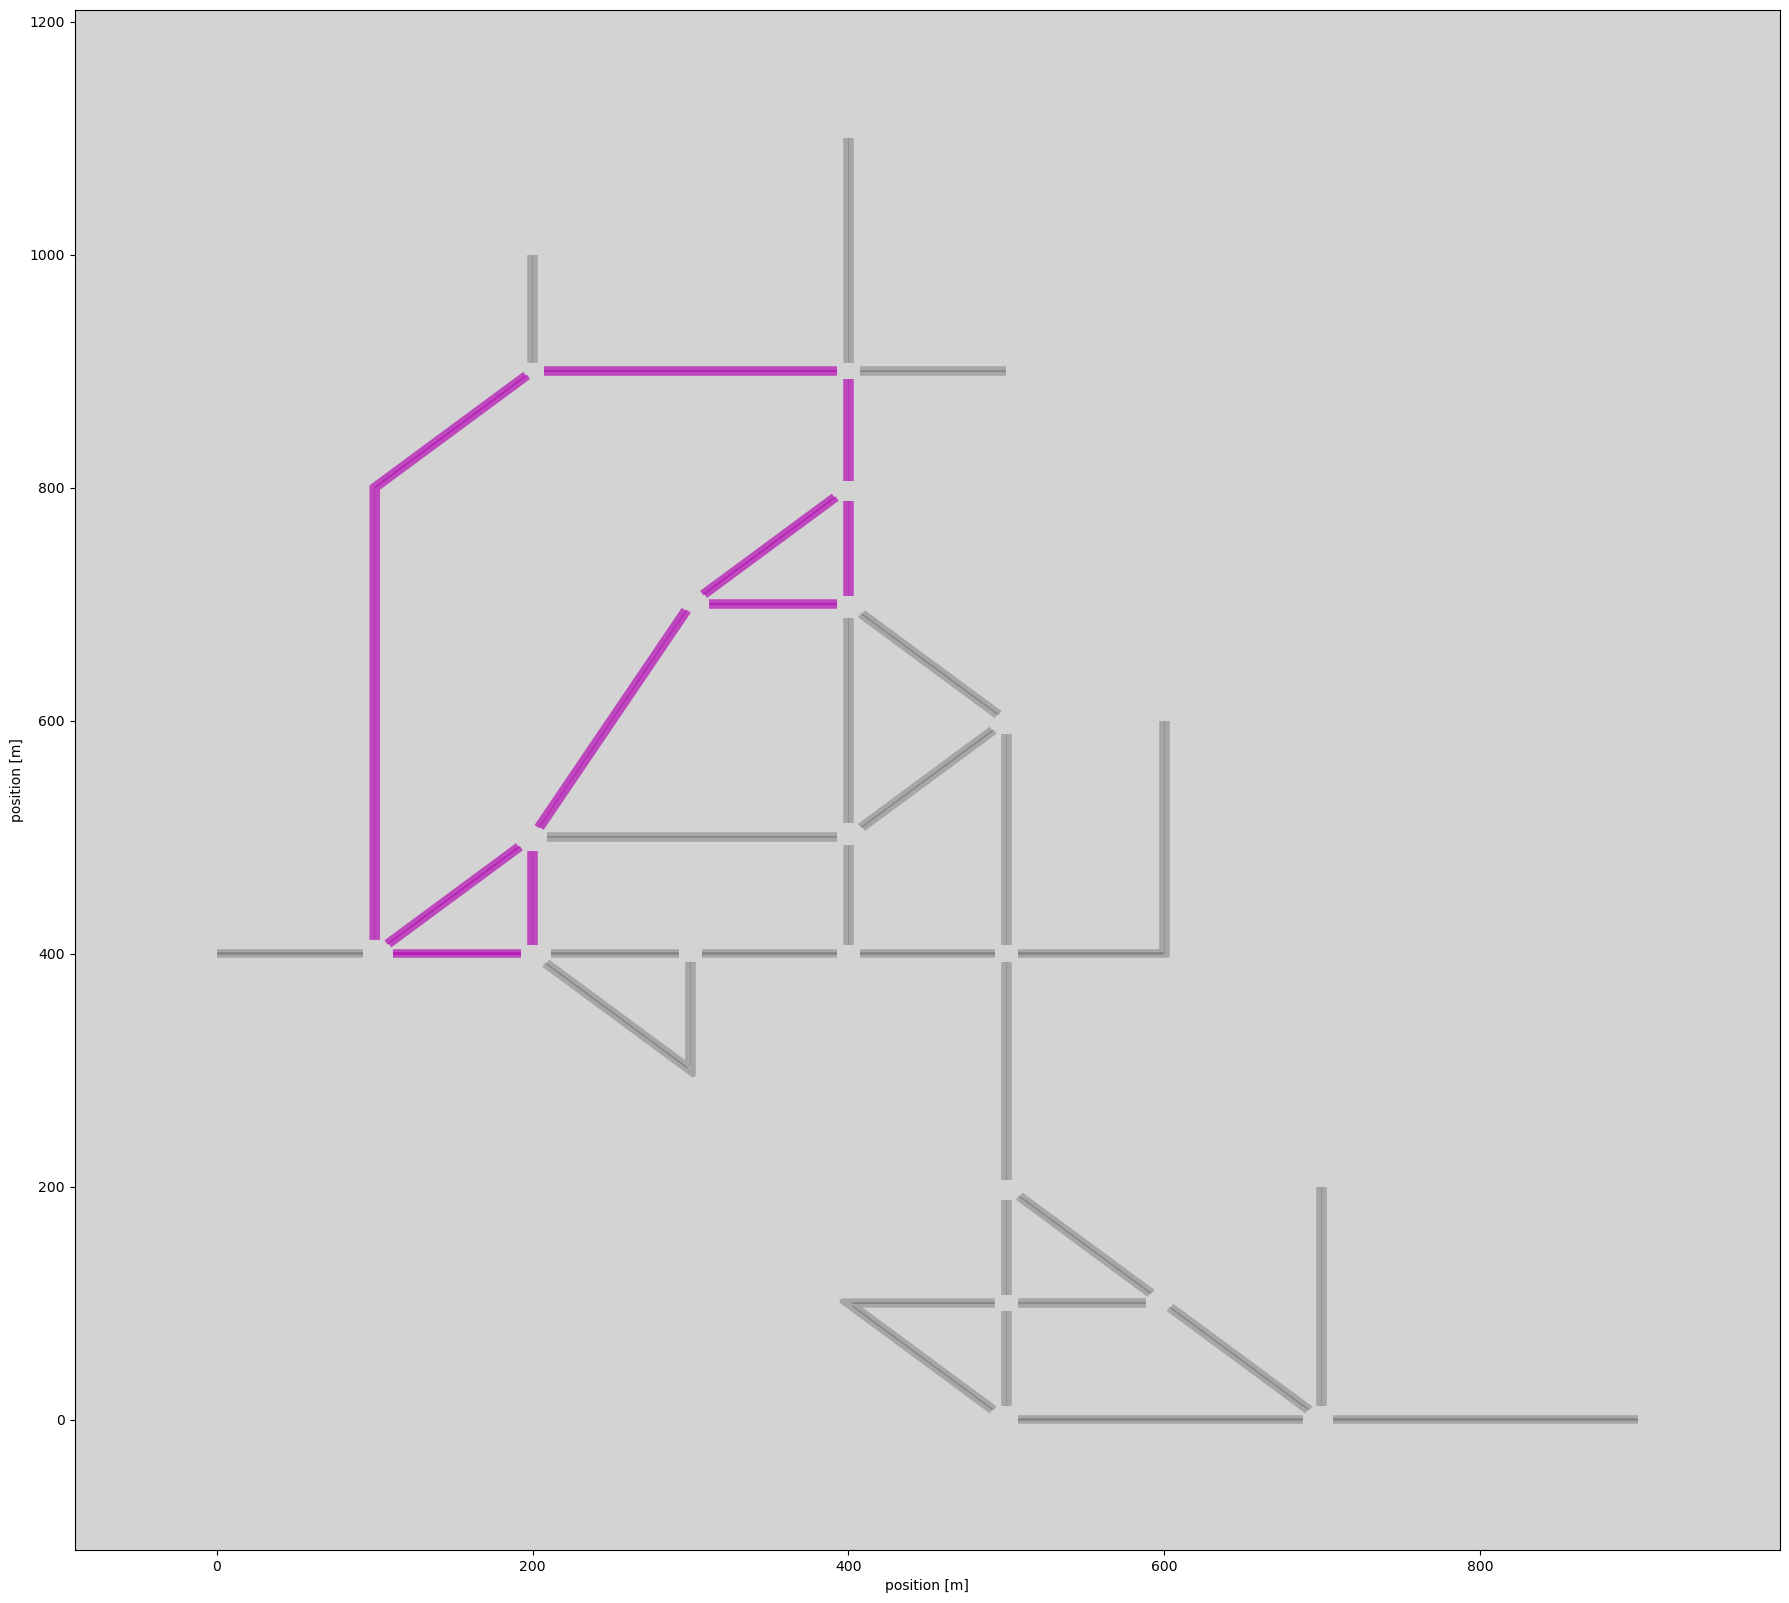

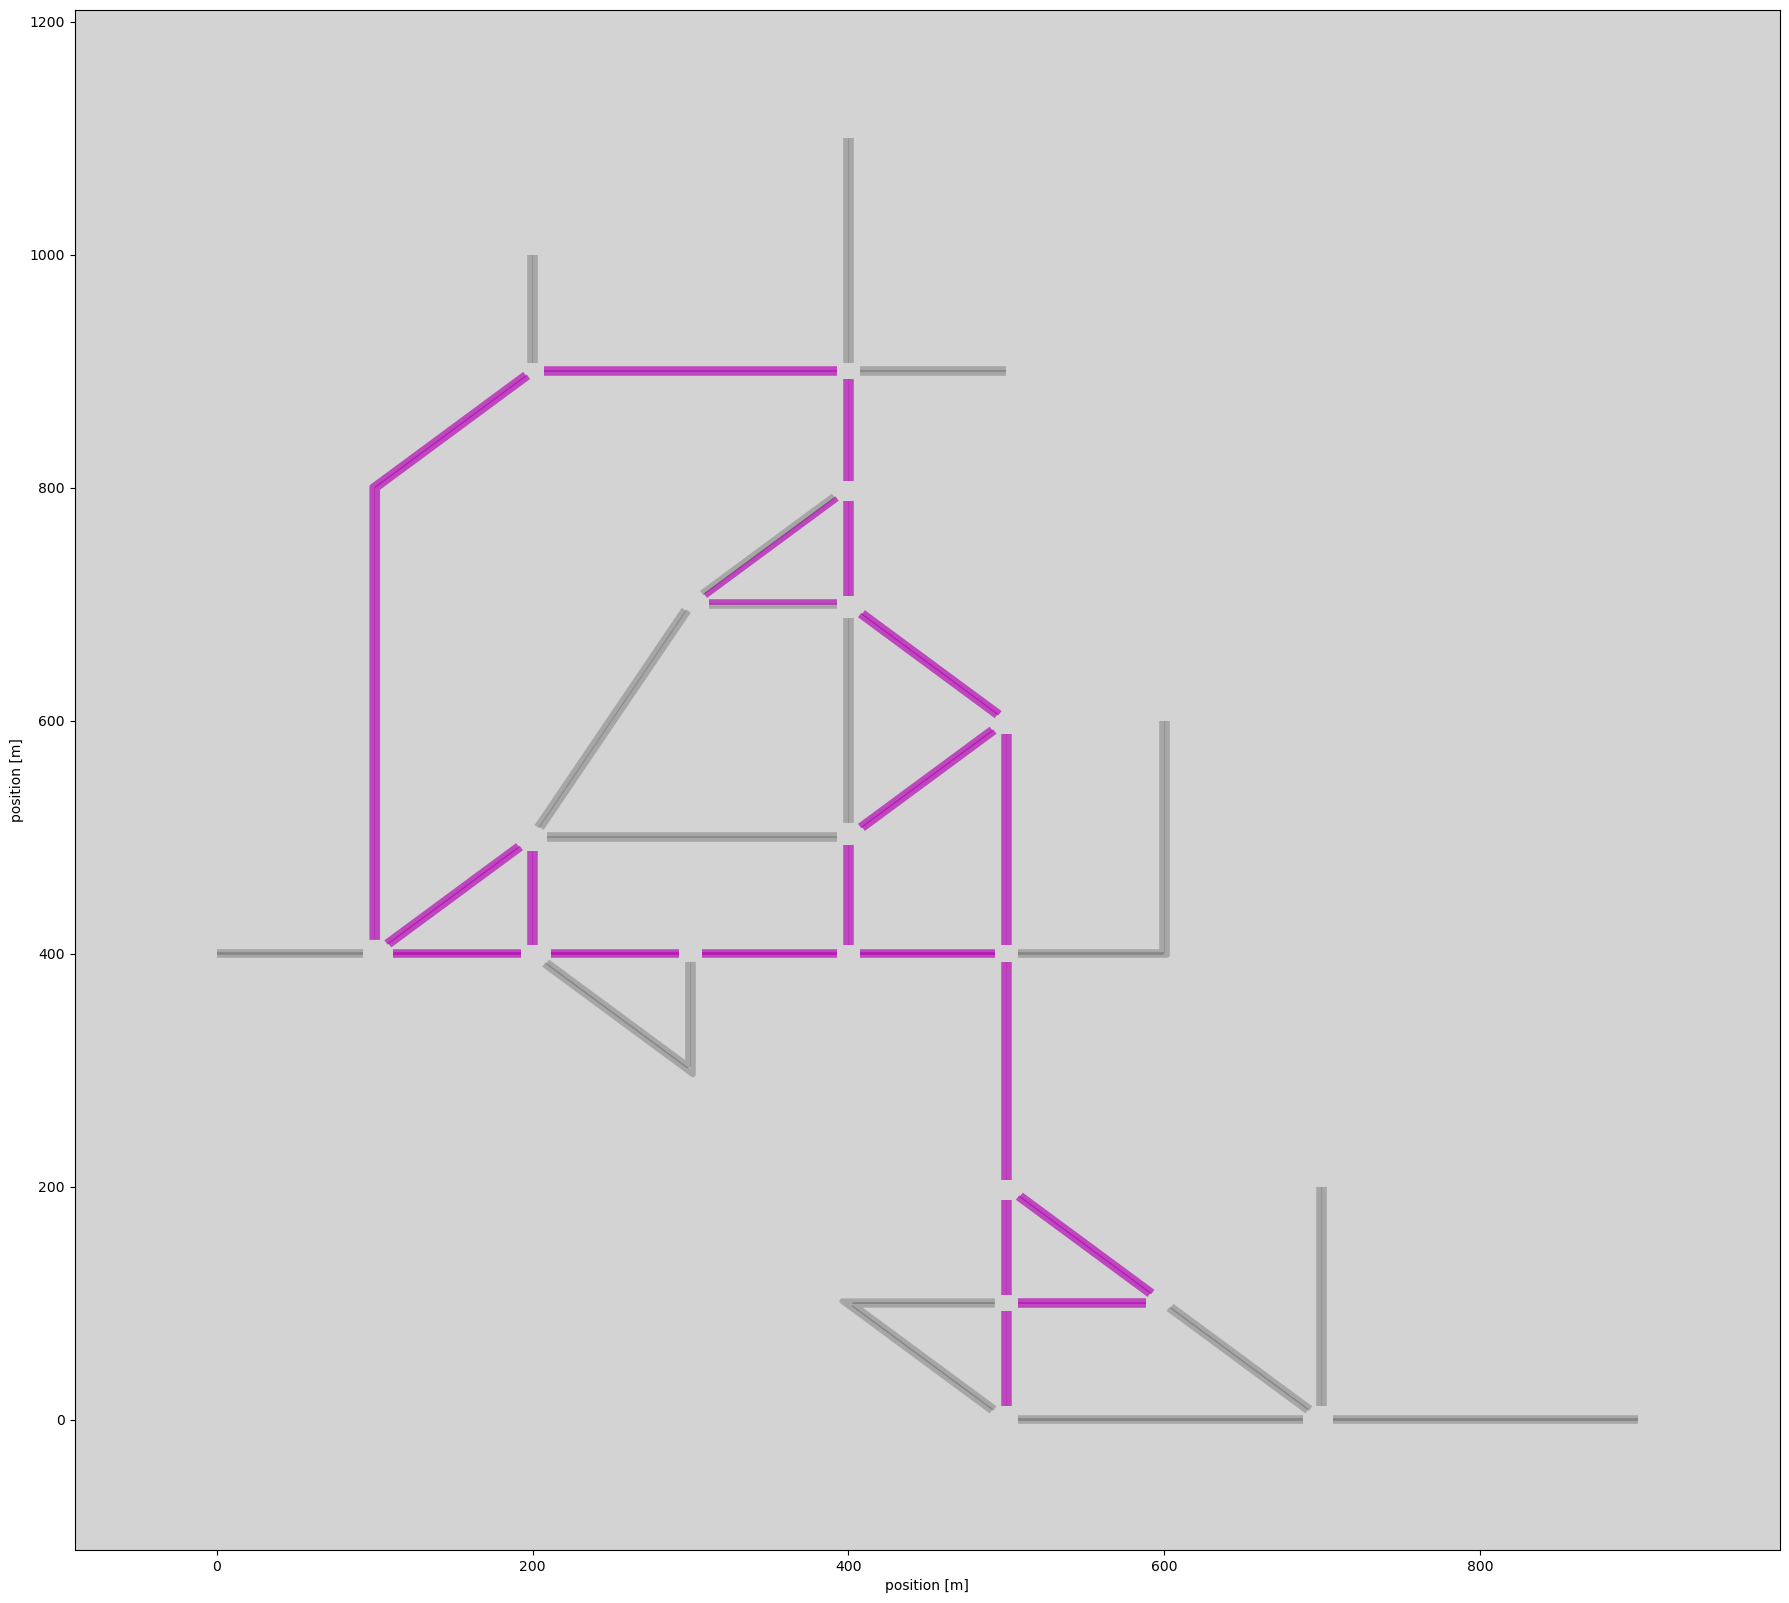

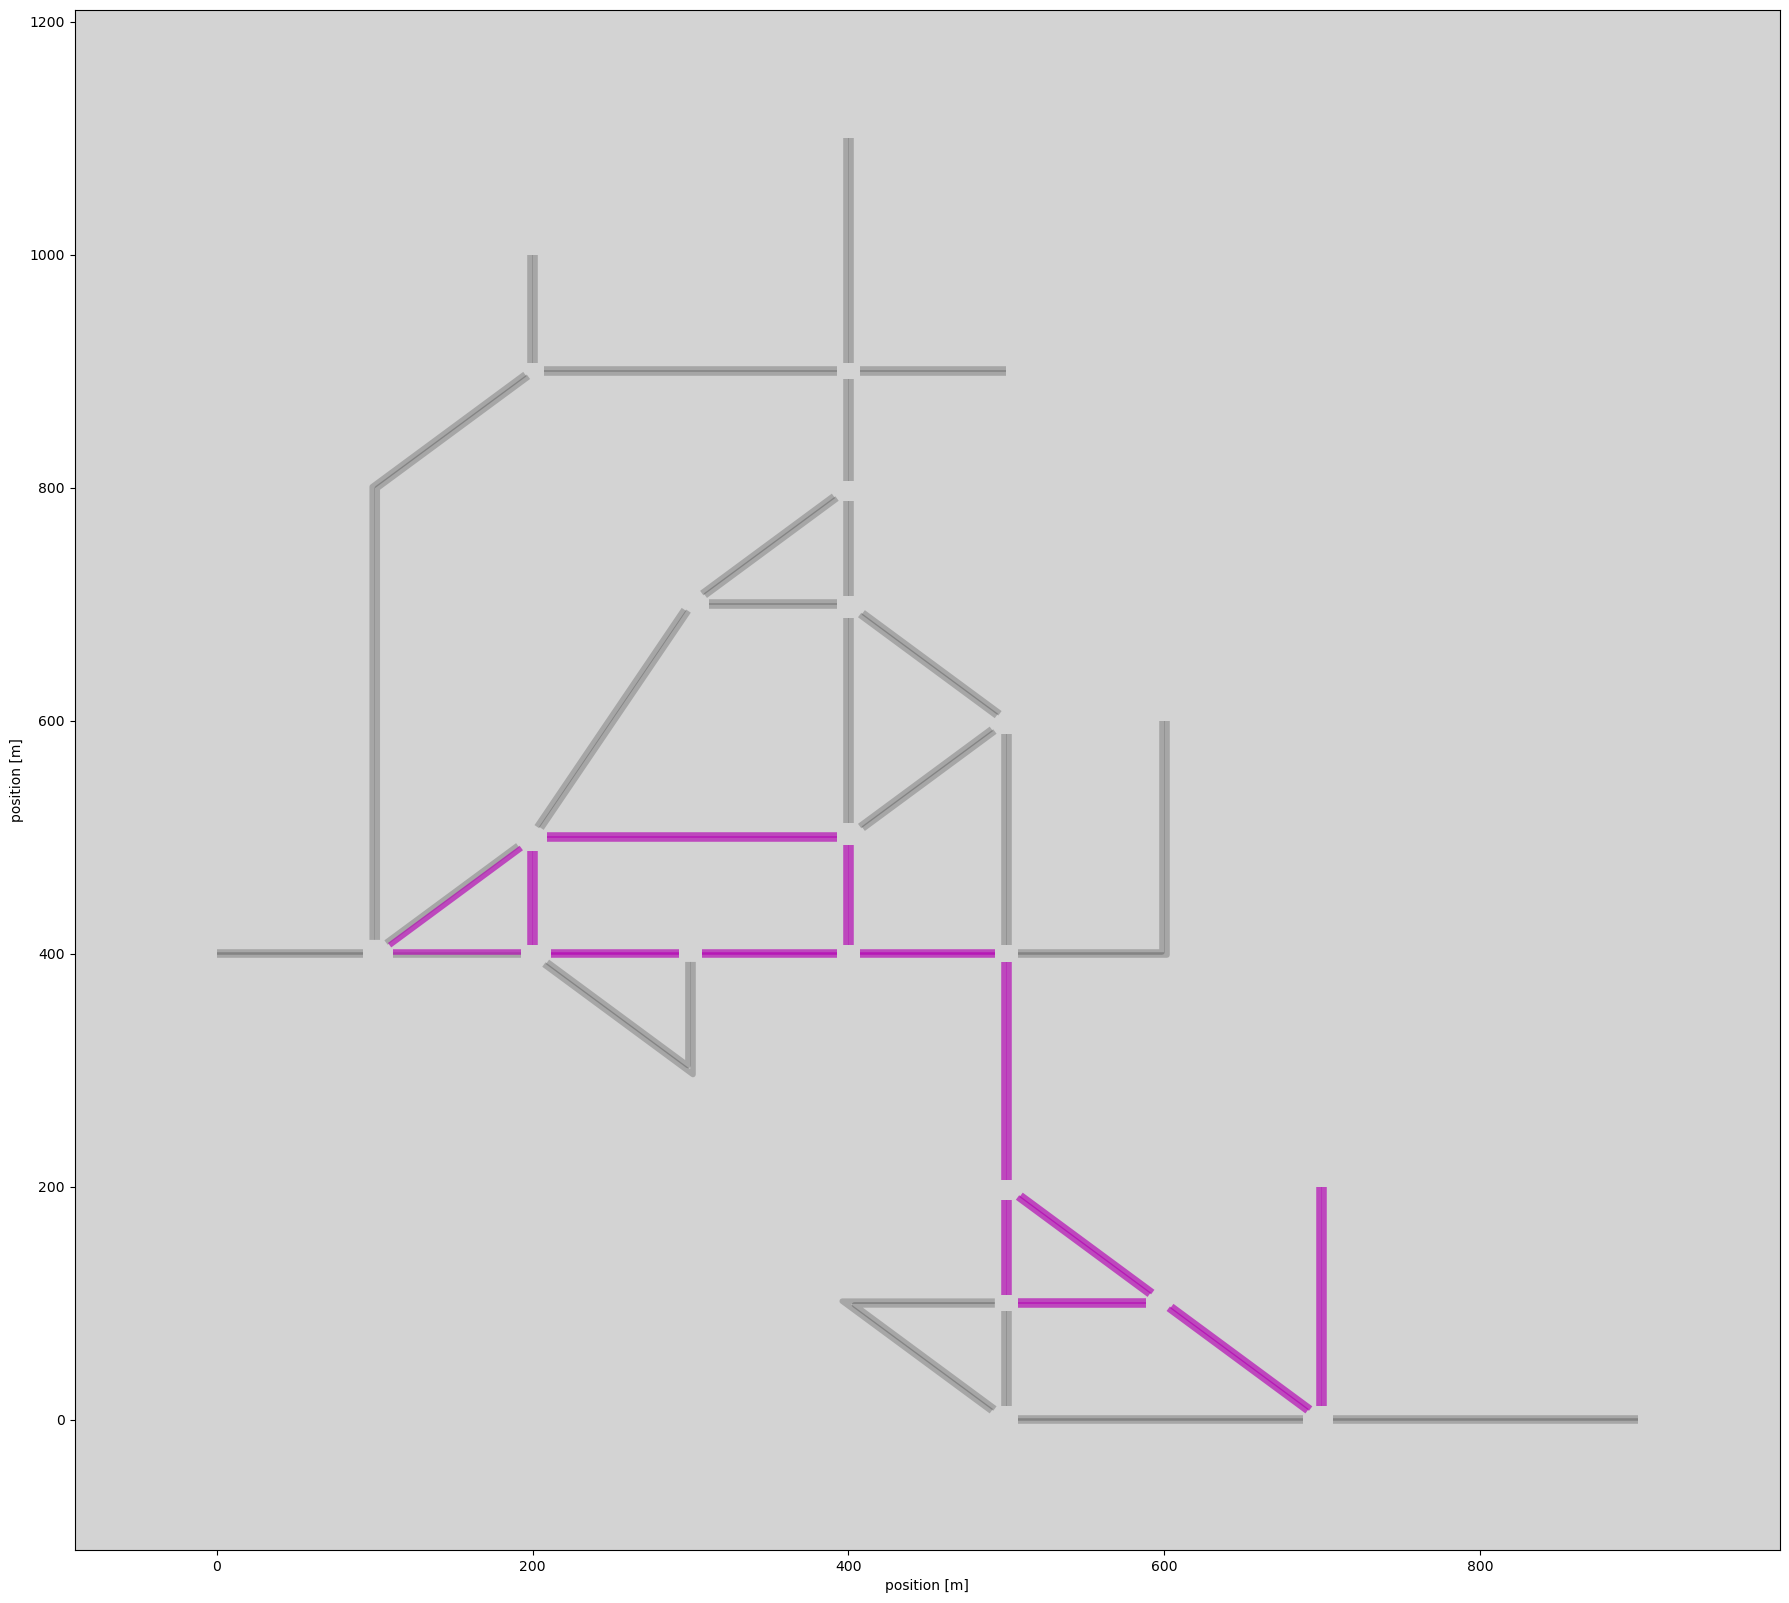

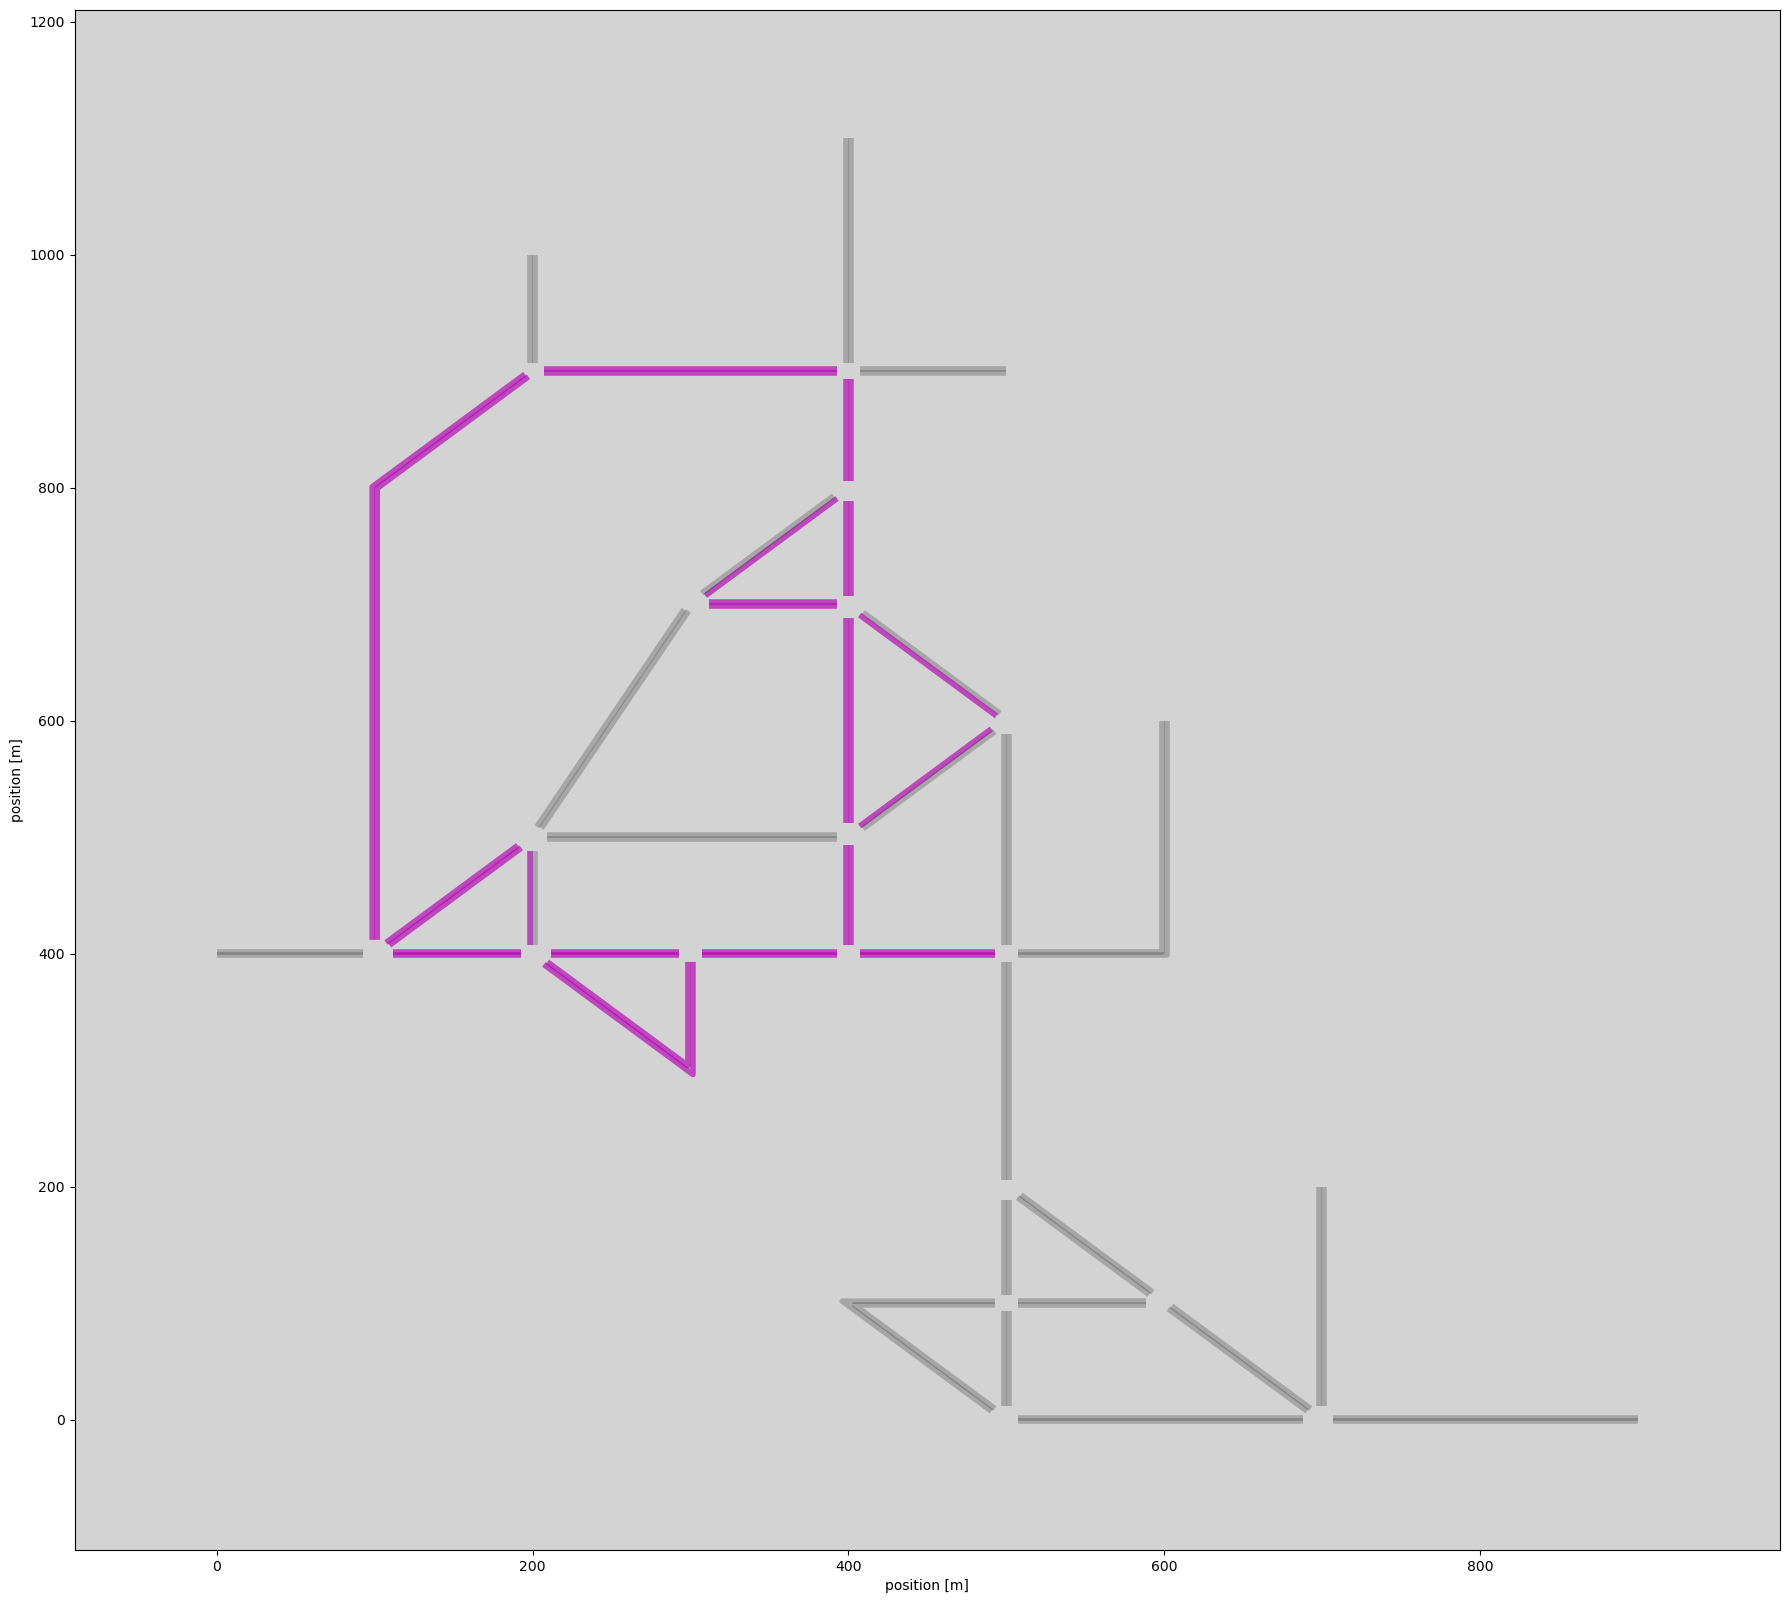

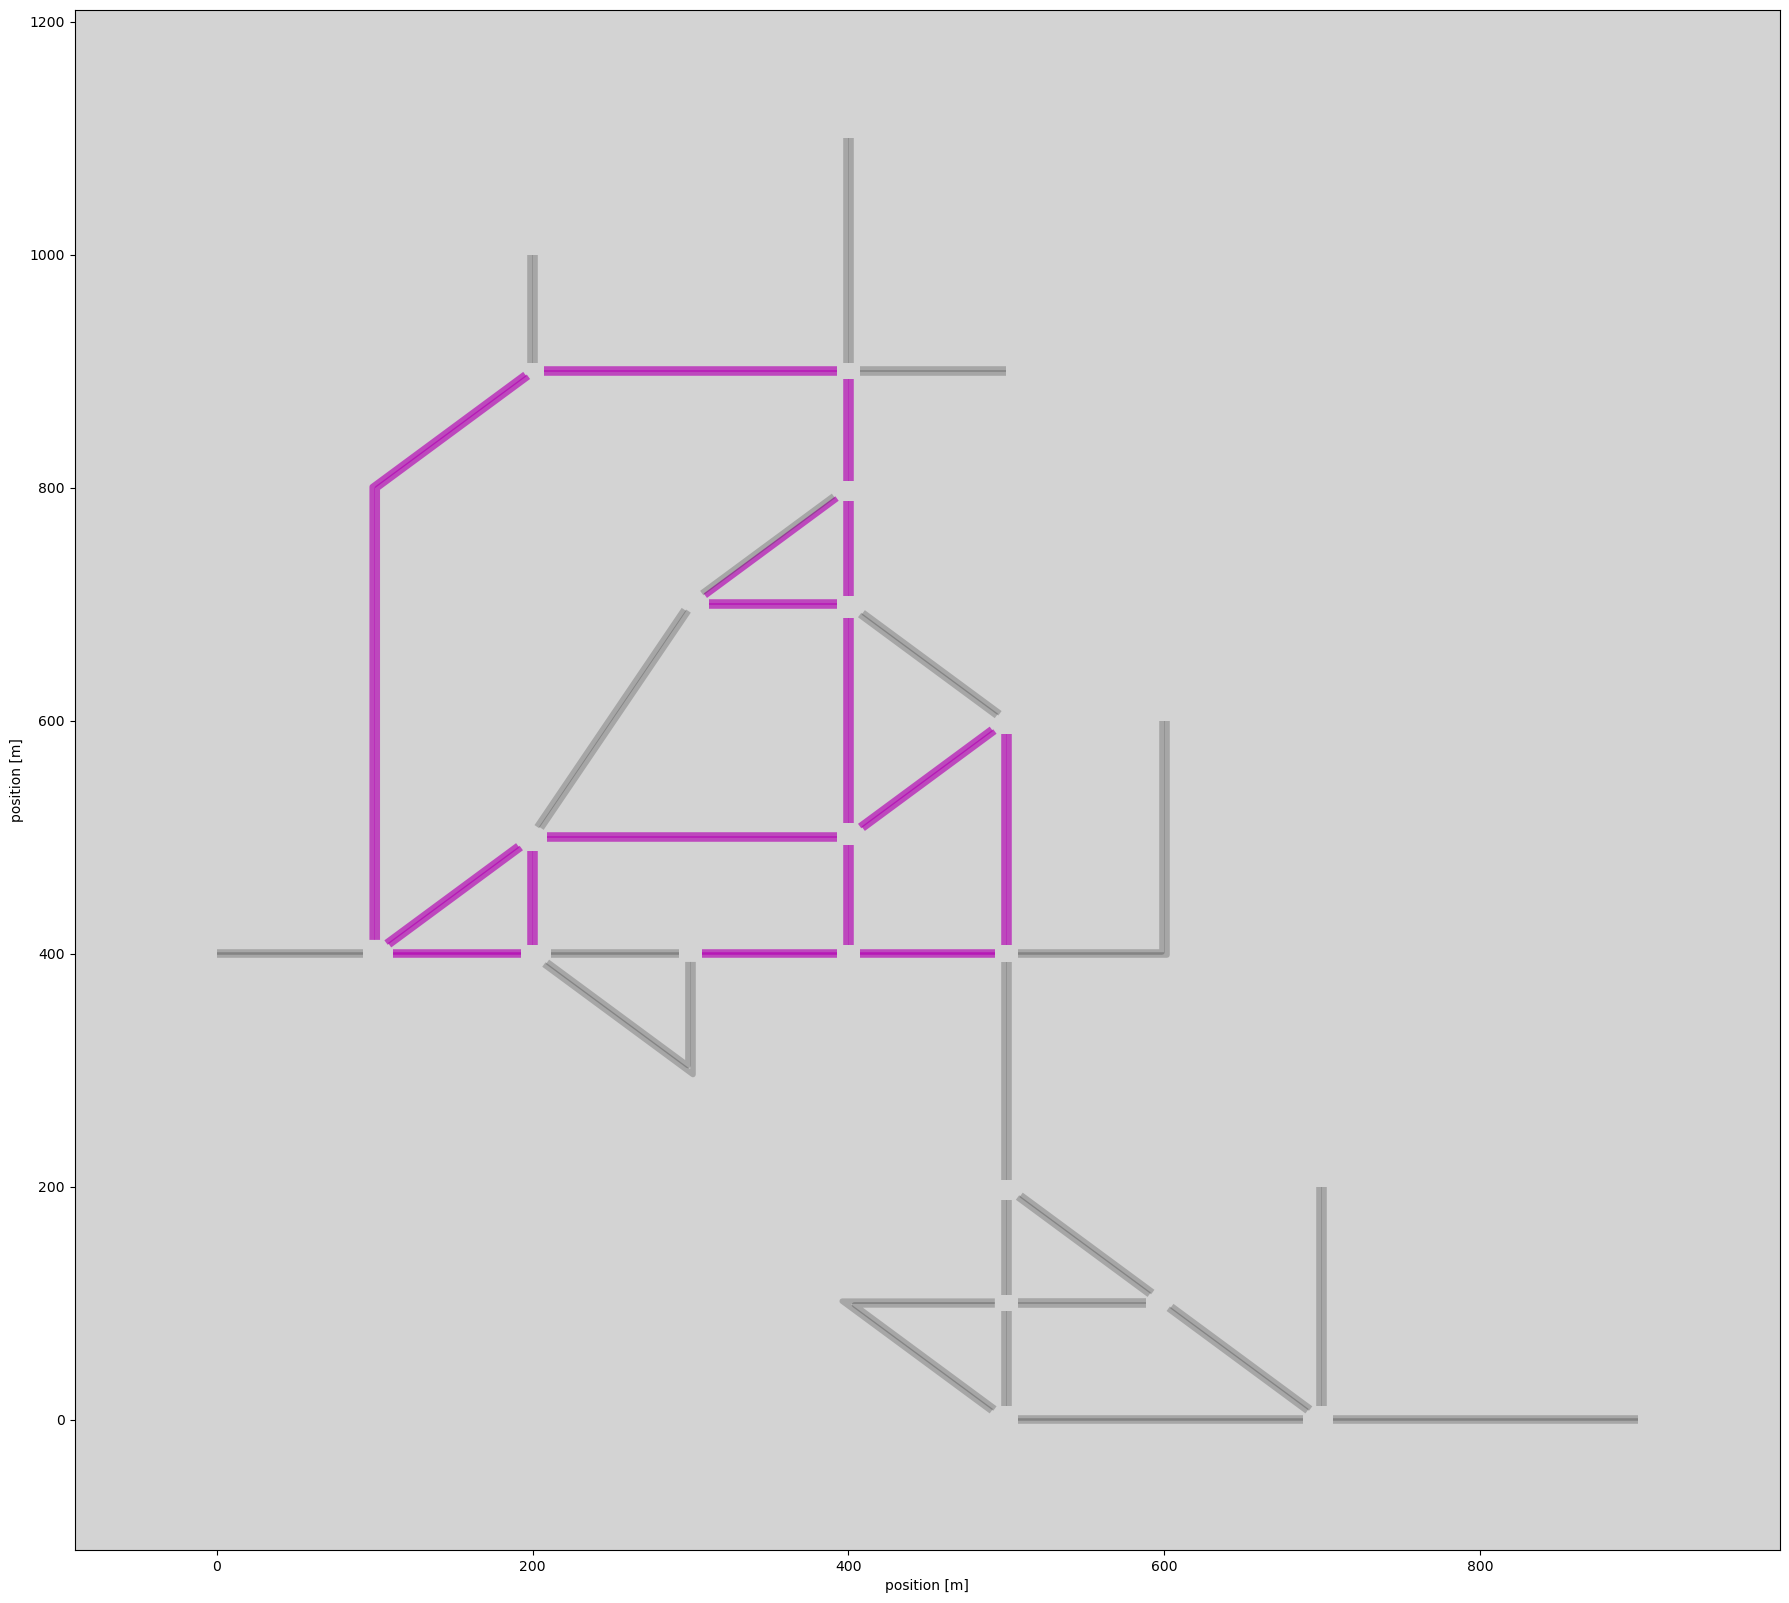

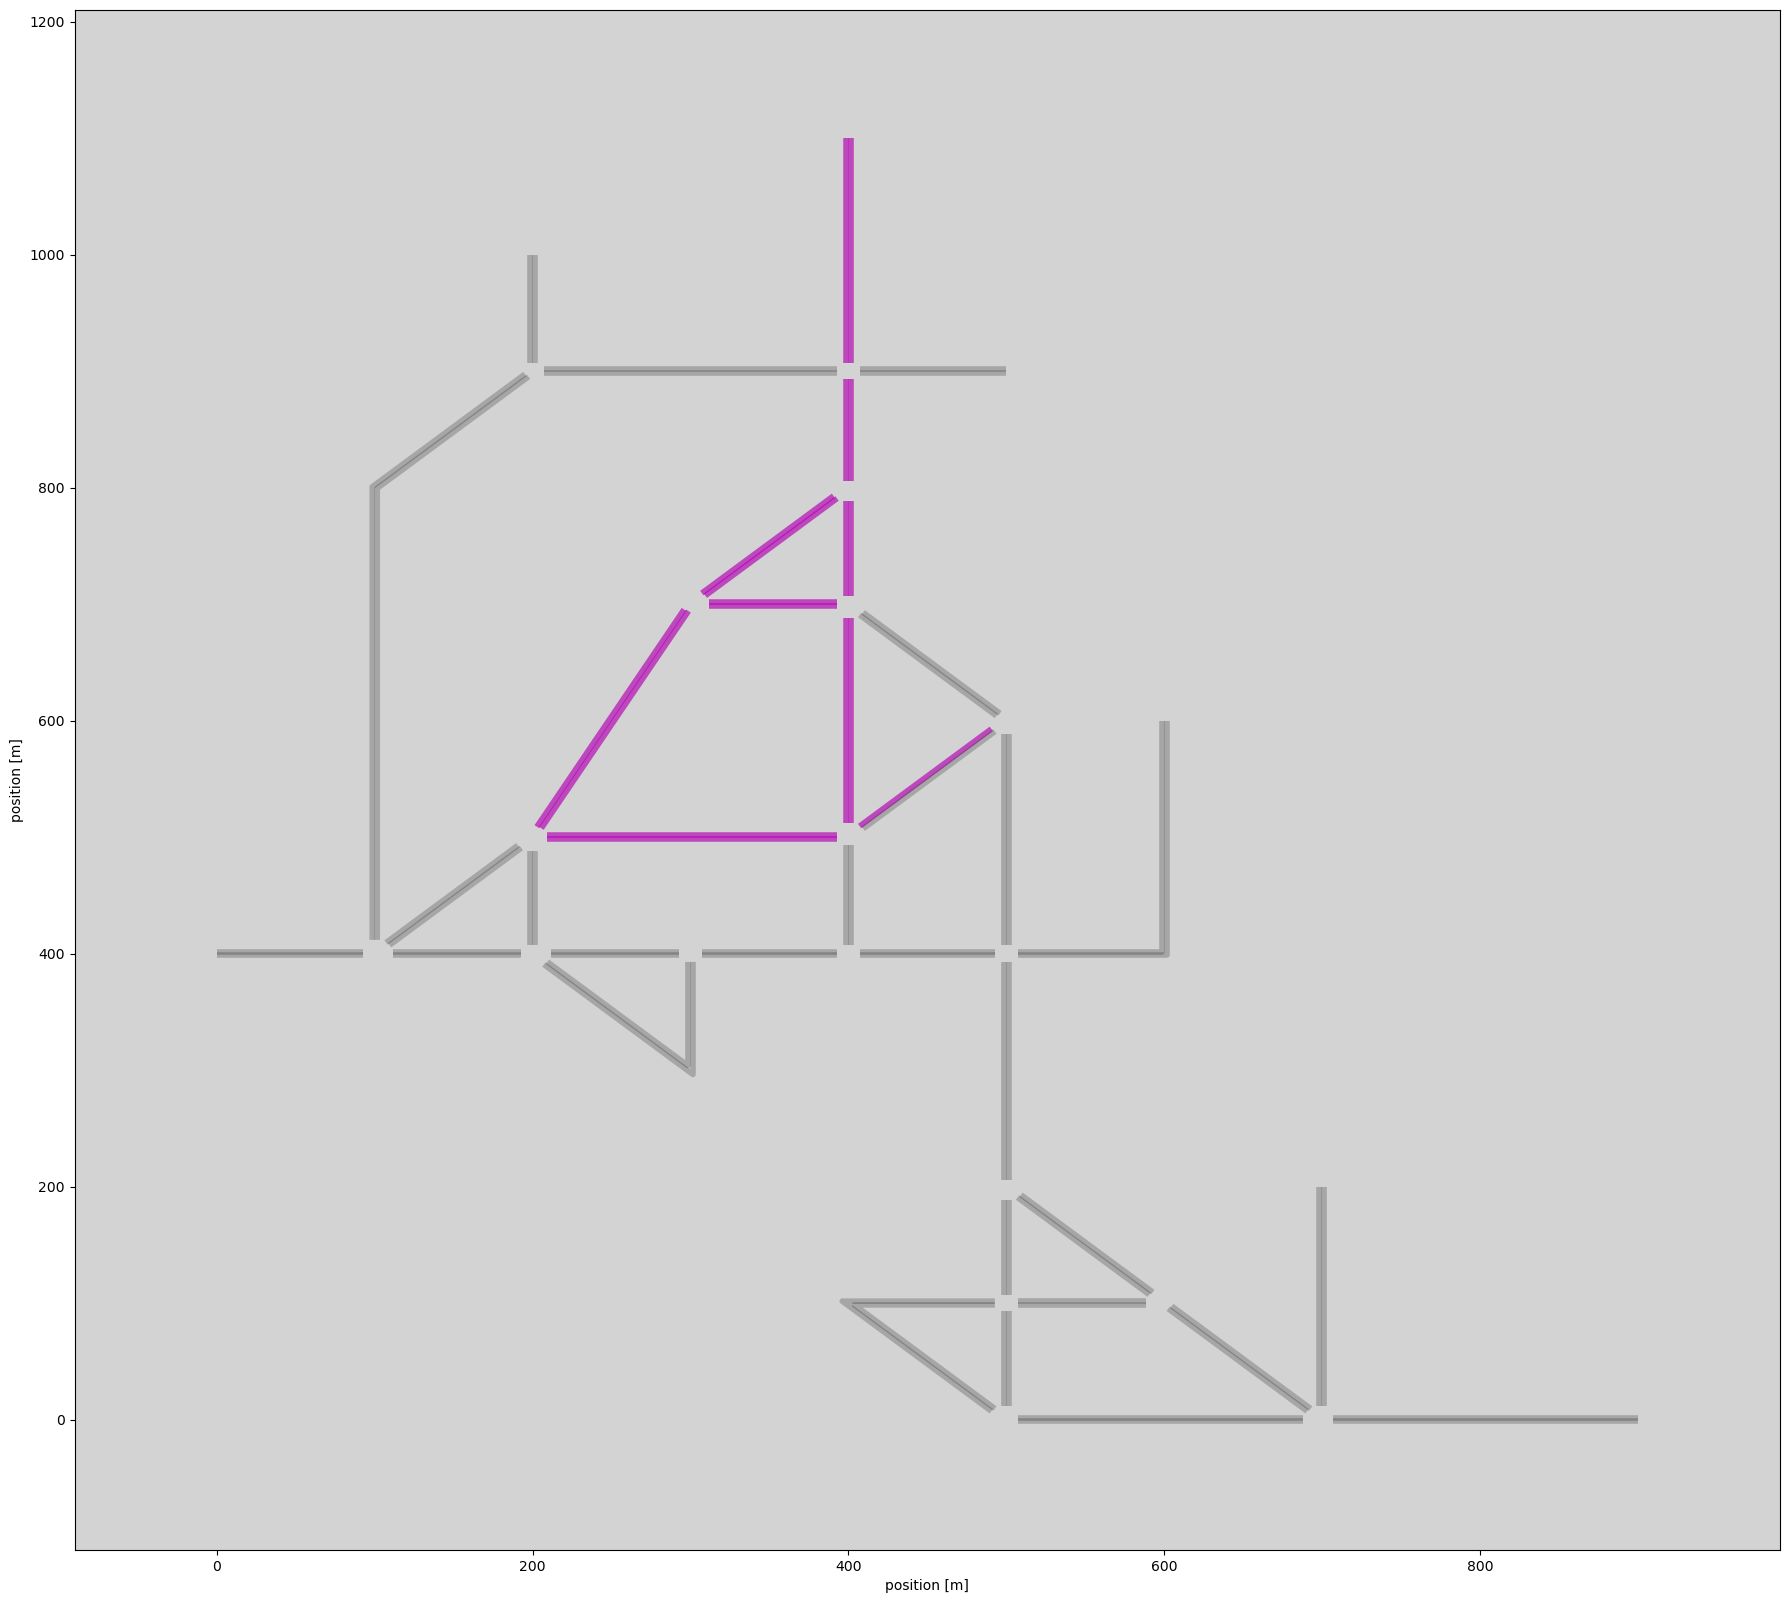

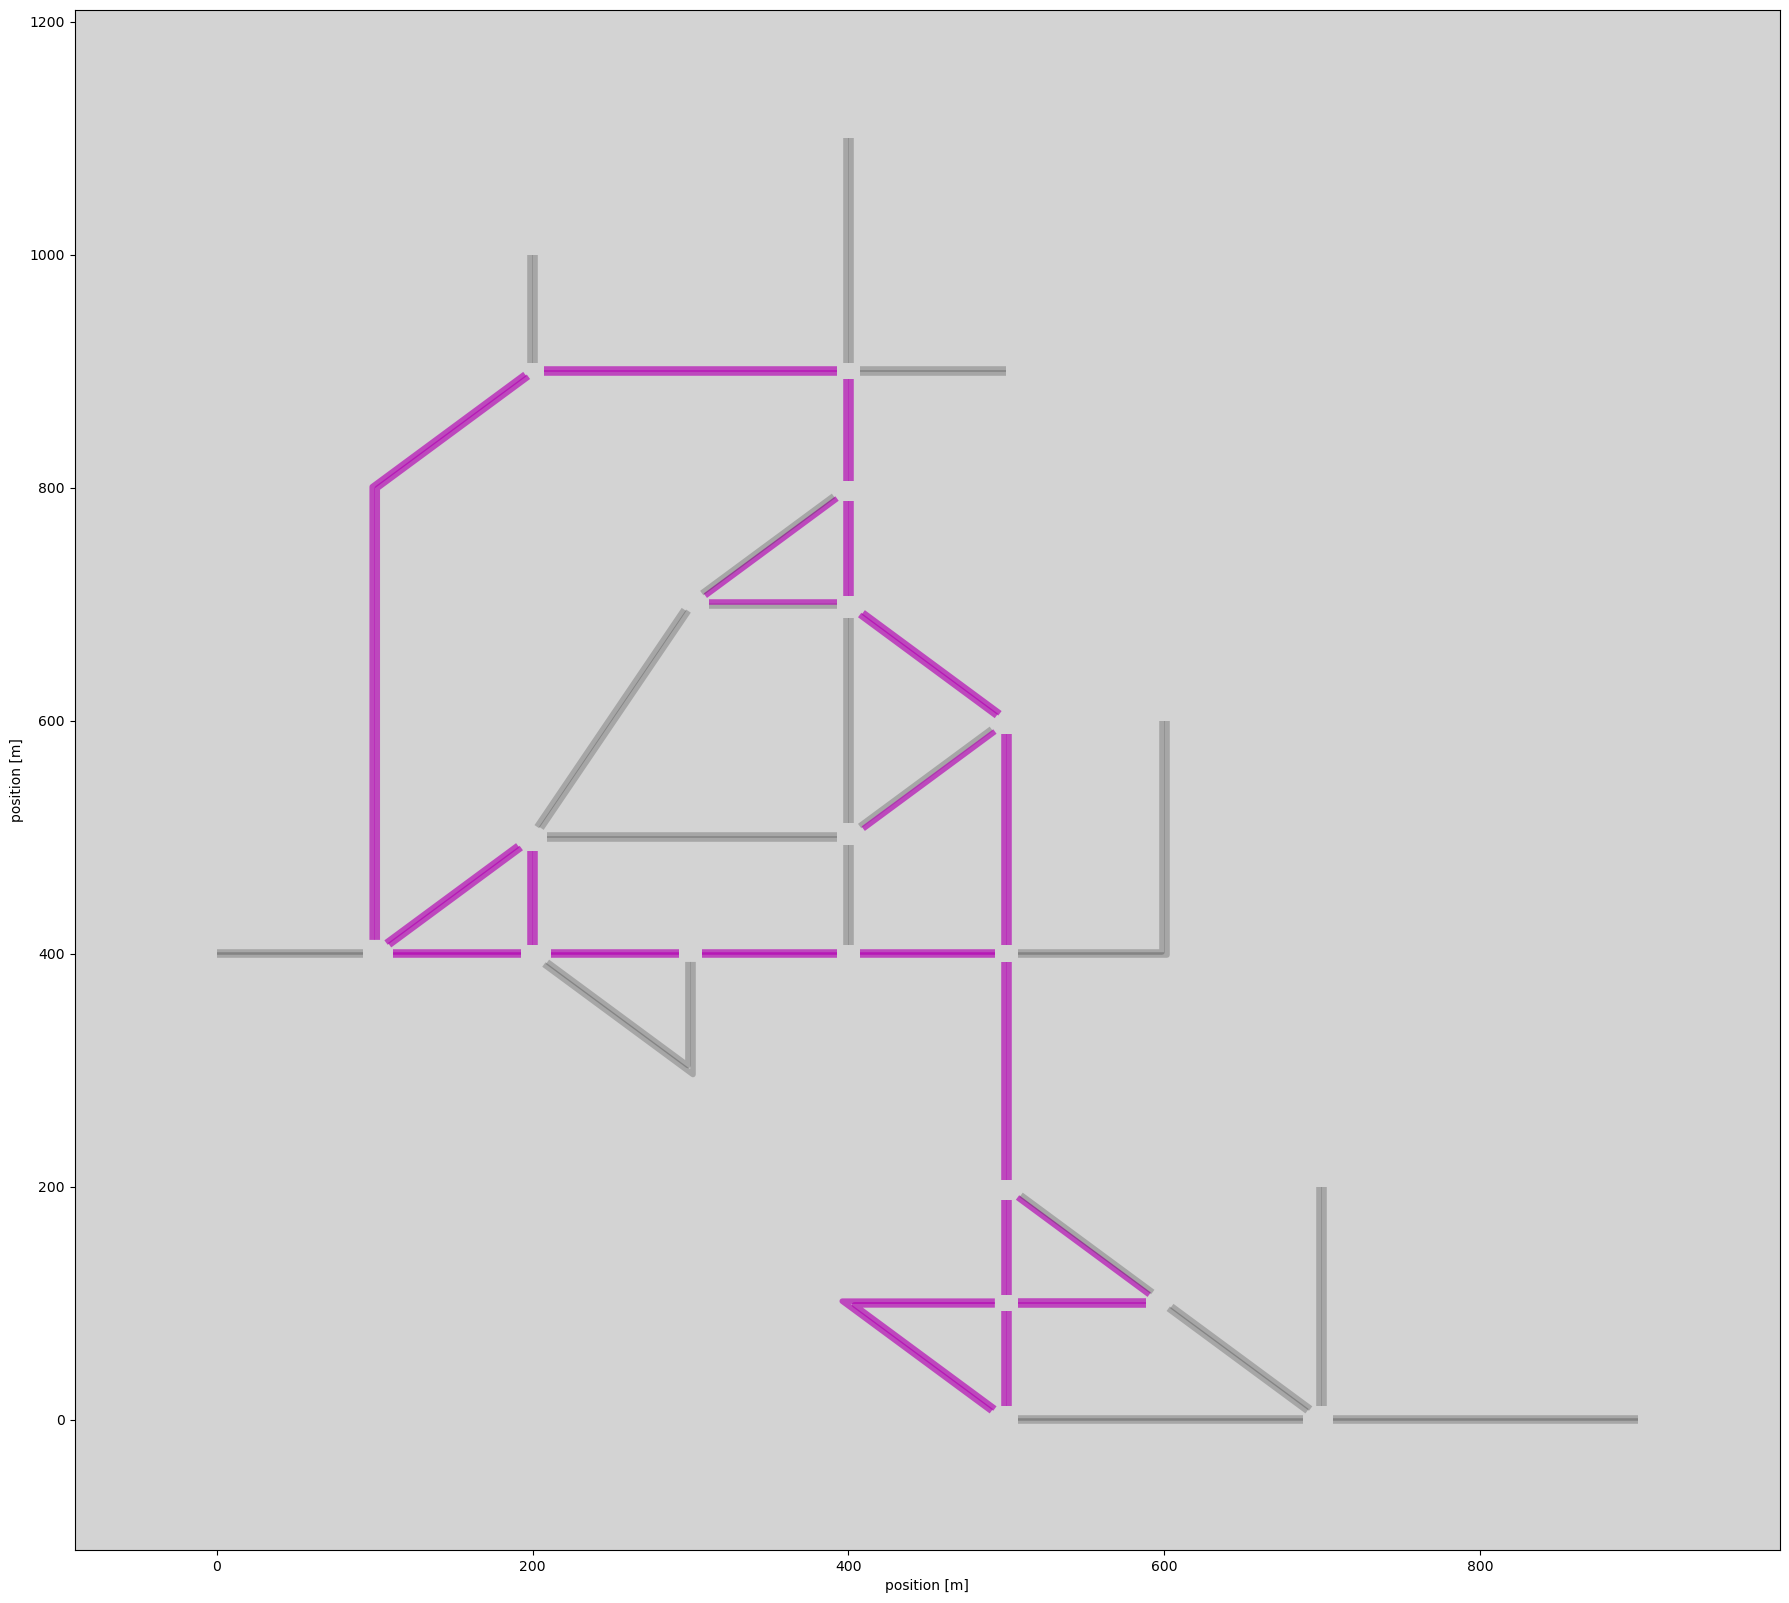

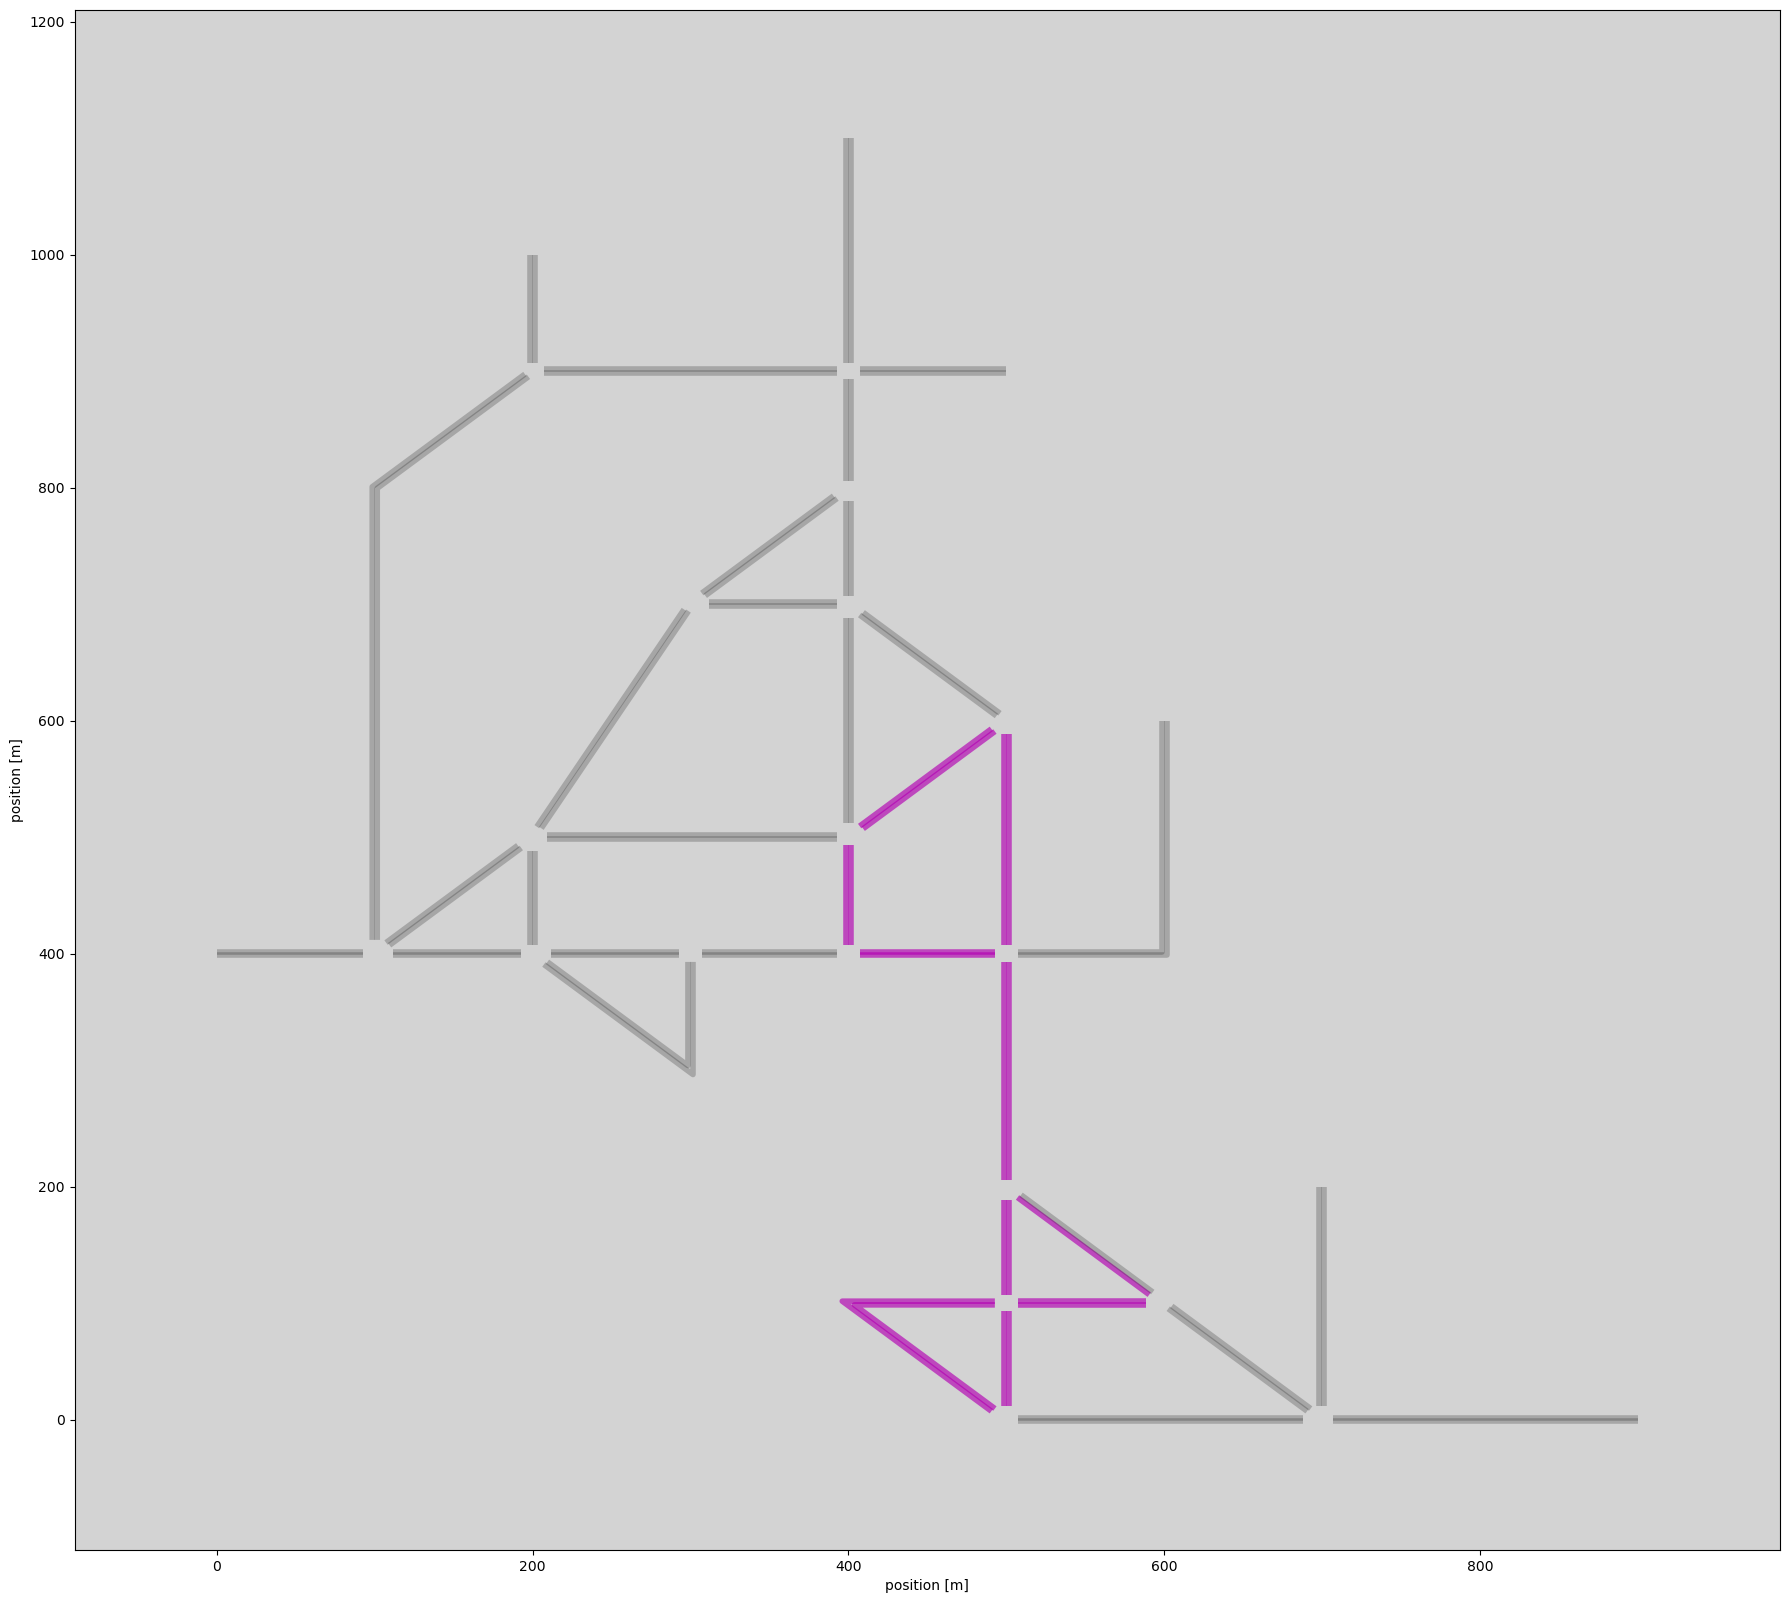

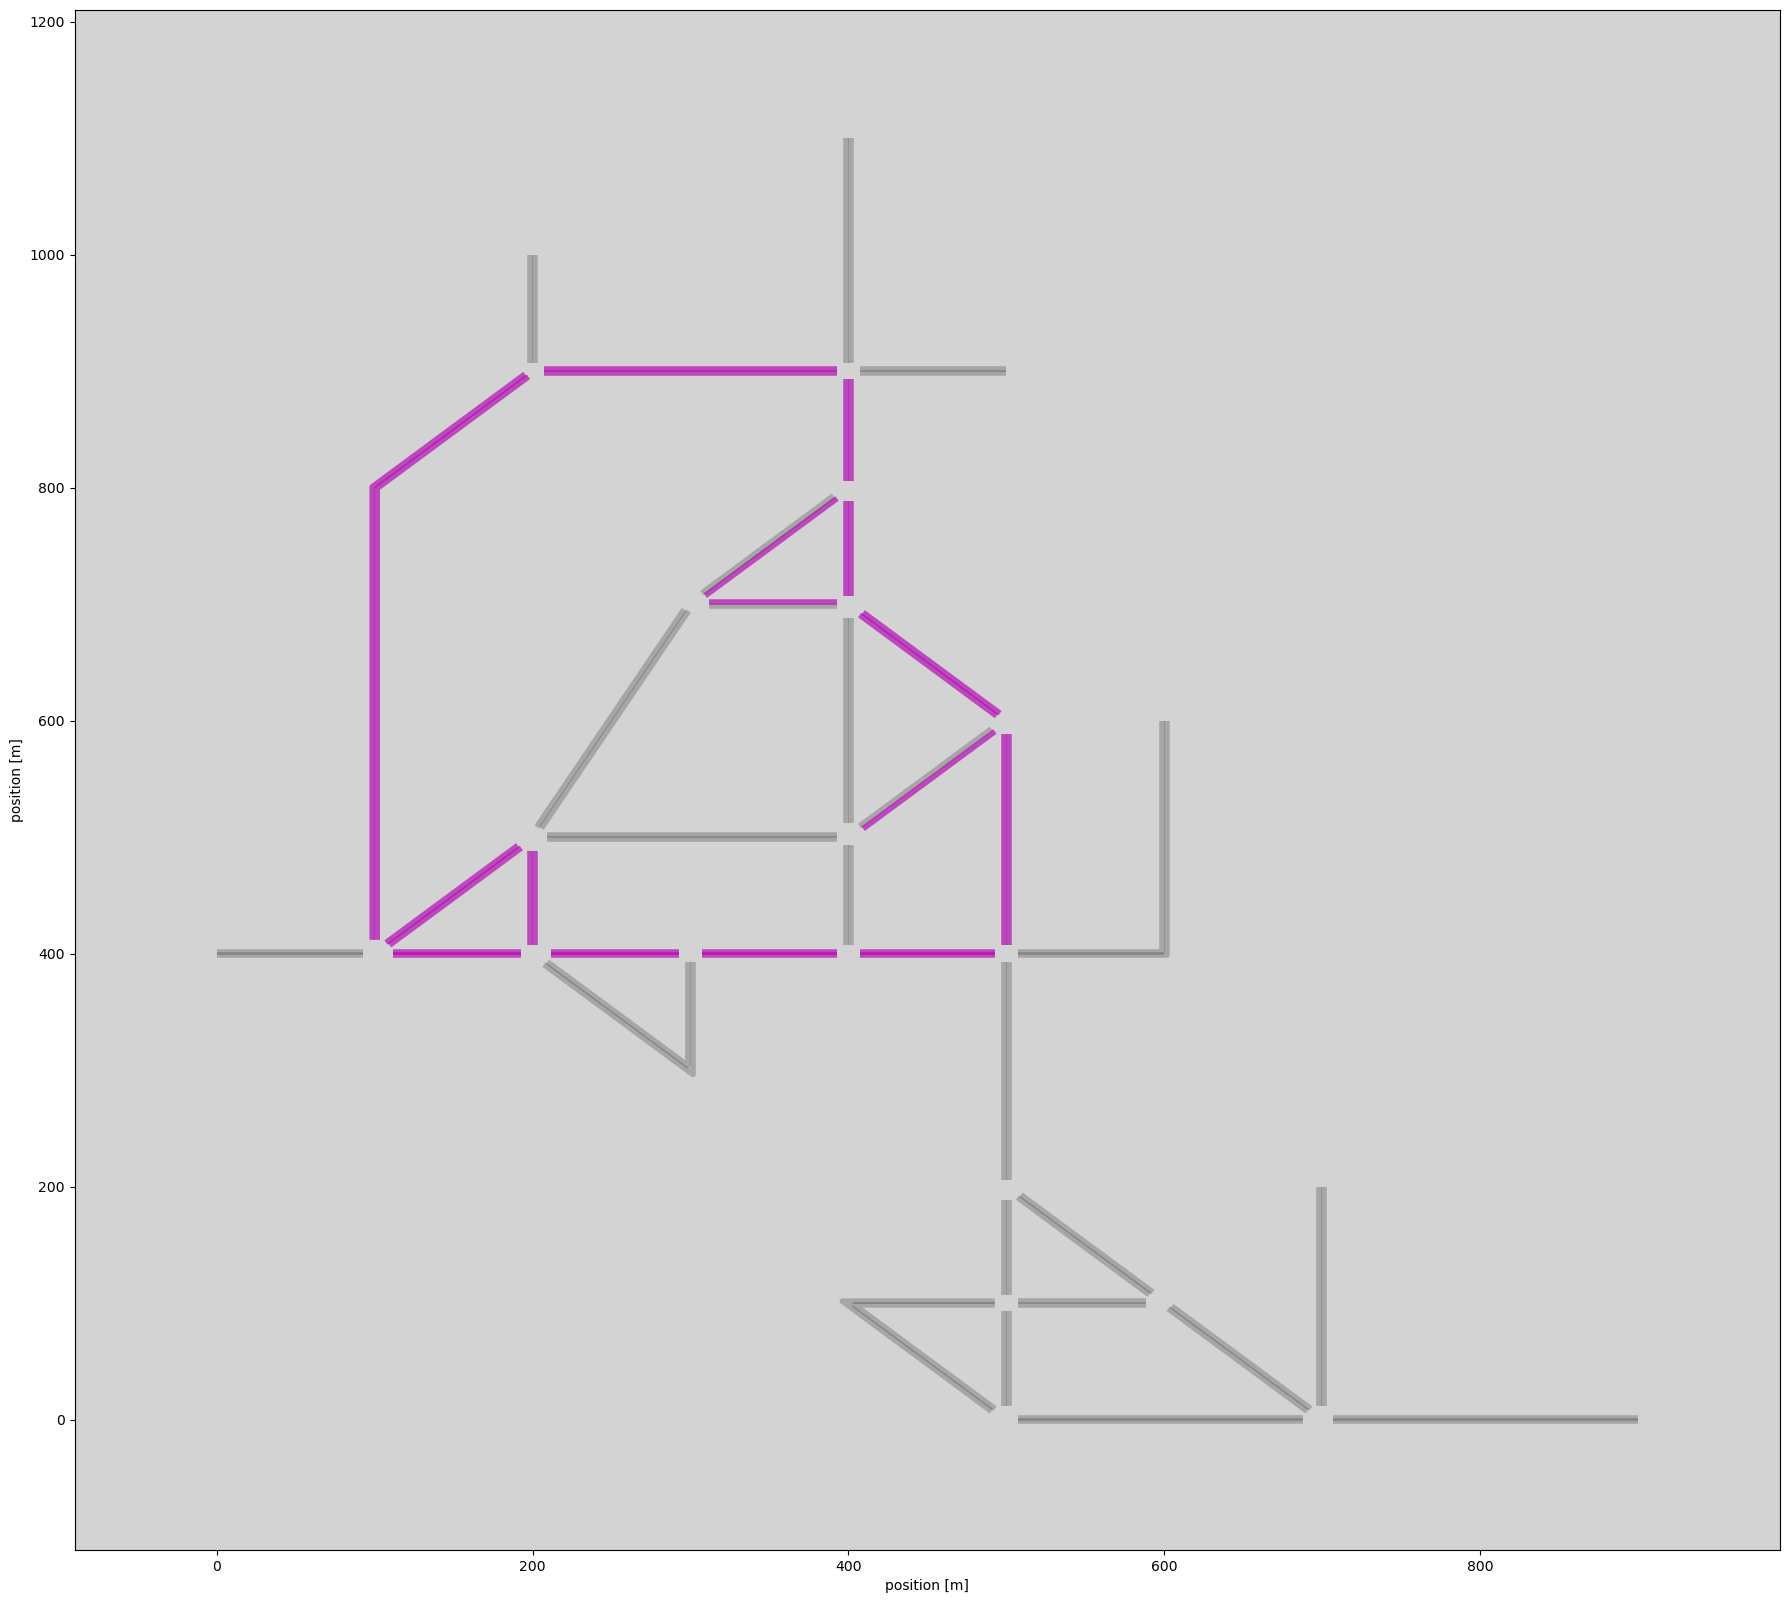

In [26]:
cluster0 = household_gl_df[household_gl_df["cluster"] == 0].index[:10]
for veh in cluster0:
    p_veh_data = p_data[p_data["veh_id"] == veh]
    print(len(p_veh_data), "/", len(p_veh_data["parking_id"].unique()))
    veh_lots = p_veh_data["parking_id"]
    visualization.plot_dataset(NET_FILE, veh_lots, parking_positions)

### 2.3 Moving times

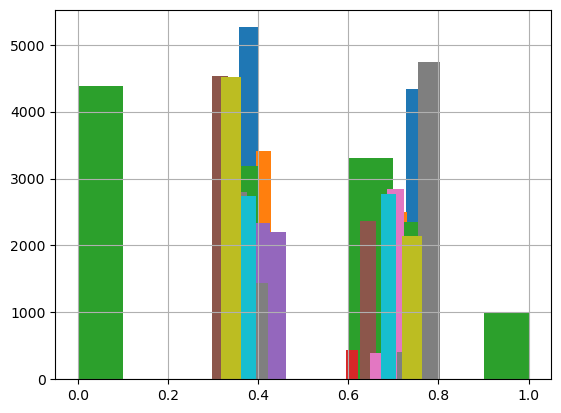

In [27]:
cluster0 = household_gl_df[household_gl_df["cluster"] == 0].index[:10]
for veh in cluster0:
    p_veh_data = p_data[p_data["veh_id"] == veh]
    p_veh_data["time_of_day"].hist()
    #plt.show()

In [28]:
def collect_cluster_data(p_data, cluster_indices):
    cl_data = []
    for ind in cluster_indices:
        p_veh_data = p_data[p_data["veh_id"] == ind]
        for i,r in p_veh_data.iterrows():
            cl_data.append(r.time_of_day)
    return cl_data

In [29]:
cl0_data = collect_cluster_data(p_data, cluster0)
cl0_data = np.array(cl0_data)*24

Text(0.5, 0, 'time [h]')

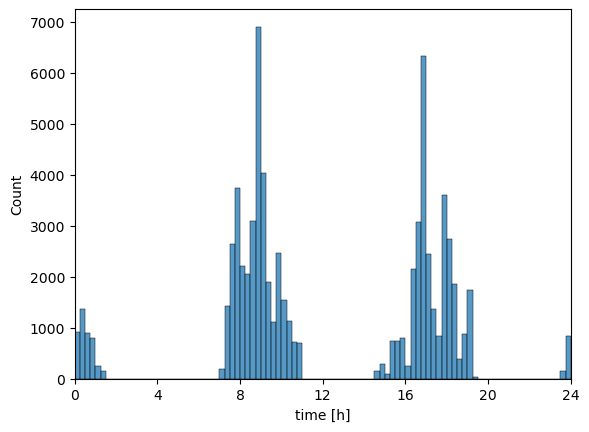

In [30]:
import seaborn as sns
sns.histplot(cl0_data, bins=24*4,)# kde=True)
plt.xlim(0, 24)
plt.xticks(ticks=[0, 4, 8, 12, 16, 20, 24])
plt.xlabel("time [h]")

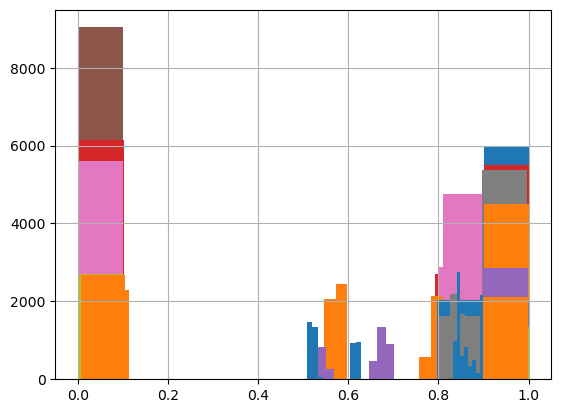

In [31]:
cluster1 = household_gl_df[household_gl_df["cluster"] == 1].index
for veh in cluster1:
    p_veh_data = p_data[p_data["veh_id"] == veh]
    p_veh_data["time_of_day"].hist()
    #plt.show()

In [32]:
cl1_data = collect_cluster_data(p_data, cluster1)
cl1_data = np.array(cl1_data)*24

Text(0.5, 0, 'time [h]')

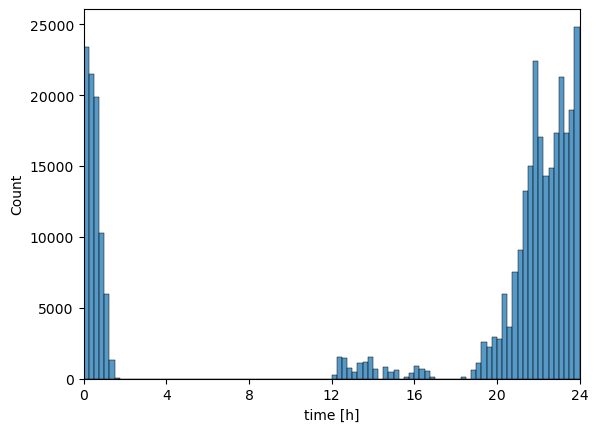

In [33]:
sns.histplot(cl1_data, bins=24*4,)
plt.xlim(0, 24)
plt.xticks(ticks=[0, 4, 8, 12, 16, 20, 24])
plt.xlabel("time [h]")